In [26]:
import pandas as pd
import numpy as np
import os
from glob import glob
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt

In [6]:
from tqdm import tqdm

In [3]:
pd.read_csv('./Data/User Categorization/0.csv')

f_1       f_2       f_3                         time
0   -707.0  0.062623 -0.006041  2020-08-27T16:02:27.269755Z
1   -707.0  0.062630 -0.006035  2020-08-28T00:02:27.196487Z
2   -707.0  0.062636 -0.006028  2020-08-28T08:02:22.248667Z
3   -707.0  0.062642 -0.006022  2020-08-28T16:02:36.996556Z
4   -707.0  0.062648 -0.006016  2020-08-29T00:02:30.992802Z
..     ...       ...       ...                          ...
103 -608.0  0.057112 -0.013372  2020-09-25T08:01:47.760676Z
104 -608.0  0.057118 -0.013366  2020-09-25T16:01:52.732724Z
105 -608.0  0.057124 -0.013361  2020-09-26T00:02:04.665382Z
106 -608.0  0.057128 -0.013357  2020-09-26T08:01:55.145121Z
107 -608.0  0.057133 -0.013351   2020-09-26T16:01:54.83029Z

[108 rows x 4 columns]

In [58]:
files_list = os.listdir('./Data/User Categorization')

In [15]:
files_list[0][:-4]

'13755'

In [59]:
categorization_df = []

In [60]:
for files in files_list:
    csv_file = pd.read_csv('./Data/User Categorization/' + str(files))
    unique_id = files[:-4]
    csv_file['ID'] = unique_id
    categorization_df.append(csv_file)

In [61]:
df = pd.concat(categorization_df,axis=0,ignore_index=True)

In [62]:
#checking for null values
df.isnull().sum()

f_1     1459
f_2     2636
f_3        0
time       0
ID         0
dtype: int64

In [63]:
#filter out null values
filtered_df = df[(~df['f_1'].isnull()) & (~df['f_2'].isnull())]

In [64]:
len(filtered_df)

1645876

In [65]:
filtered_df.isnull().sum()

f_1     0
f_2     0
f_3     0
time    0
ID      0
dtype: int64

In [68]:
df_vis = filtered_df.sort_values(by='ID')

In [73]:
df_vis['ID'] = df_vis['ID'].astype('int')

In [76]:
df_vis = df_vis[df_vis['ID'] <= 499].sort_values(by='ID').reset_index(drop=True)

In [80]:
df_vis_fil = df_vis.groupby('ID')['f_1','f_2','f_3'].mean().reset_index()

/home/ashley/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [82]:
df_vis_fil

ID           f_1       f_2       f_3
0      0   -394.879630  0.059917 -0.009220
1      1     22.000000  0.000708 -0.000086
2      2    -28.750000  0.000388 -0.029210
3      3   -454.545455  0.009426 -0.014019
4      4  15323.939394  0.248242 -1.437182
..   ...           ...       ...       ...
495  495   -562.500000  0.105079  0.000323
496  496    -86.741935  0.002947  0.001440
497  497     50.000000  0.000095 -0.000278
498  498     -9.000000  0.001437  0.000034
499  499  80226.105263  1.771382  1.237984

[500 rows x 4 columns]

In [44]:
len(filtered_df['ID'].unique())

17967

In [3]:
#Use Dynamic Time Warping as a similarity measure

import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

In [46]:
sequence_1_df = pd.read_csv('./Data/User Categorization/0.csv')
sequence_2_df = pd.read_csv('./Data/User Categorization/1.csv')

In [57]:
x = sequence_1_df[['f_1','f_2','f_3']].values
y = sequence_2_df[['f_1','f_2','f_3']].values

In [58]:
distance, path = fastdtw(x, y, dist=euclidean)

In [59]:
distance

74447.00098495395

In [9]:
from tslearn.utils import to_time_series
from tslearn.utils import to_time_series_dataset

In [81]:
my_first_time_series = [1, 3, 4, 2]
my_second_time_series = [1, 2, 4, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series, my_second_time_series])

In [82]:
formatted_dataset

array([[[1.],
        [3.],
        [4.],
        [2.]],

       [[1.],
        [2.],
        [4.],
        [2.]]])

In [92]:
silhouette_scores = []
n_clusters = [2,3,4,5,6]

In [93]:
ts_dataset = []

In [94]:
for i in range(500):
    csv_file = pd.read_csv('./Data/User Categorization/' + str(i) + '.csv')
    time_series_df = csv_file[(~csv_file['f_1'].isnull()) & (~csv_file['f_2'].isnull())]
    time_series_seq = list(time_series_df[['f_1','f_2','f_3']].values)
    ts_dataset.append(time_series_seq)
    

In [95]:
formatted_dataset = to_time_series_dataset(ts_dataset)

In [111]:
from tslearn.clustering import TimeSeriesKMeans , silhouette_score
km = TimeSeriesKMeans(n_clusters=2, metric="dtw",verbose=True,max_iter=5)

In [99]:
for cluster in n_clusters:
    km = TimeSeriesKMeans(n_clusters=cluster, metric="dtw",verbose=True,max_iter=5)
    y_pred = km.fit_predict(formatted_dataset)
    s_score = silhouette_score(formatted_dataset, y_pred, metric="dtw")
    silhouette_scores.append(s_score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.0s finished


397295791842.207 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.9s finished


165231022362.858 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.9s finished


157381485826.209 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.9s finished


157381485826.209 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    6.1s finished


69694116060.925 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    6.0s finished


42384578249.981 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    6.0s finished


42384578249.981 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    8.3s finished


61618951065.677 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    7.3s finished


39206798387.267 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    7.2s finished


38578404201.923 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    7.1s finished


38578404201.923 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Pa

56679554908.208 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:    9.4s finished


31547279994.601 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:    9.8s finished


31042615452.428 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:    9.0s finished


31042615452.428 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:    8.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Pa

69113072124.320 --> 

/home/ashley/anaconda3/lib/python3.7/site-packages/tslearn/barycenters.py:669: ConvergenceWarning: DBA loss is increasing while it should not be. Stopping optimization.
  "Stopping optimization.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   11.1s finished


35206714903.148 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   11.5s finished


34291757594.845 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   11.4s finished


33724452095.105 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   11.9s finished


33724452095.105 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   12.2s finished


In [100]:
silhouette_scores

[0.9767827649912877,
 0.9414969701412405,
 0.8754845667200888,
 0.871729686155809,
 0.8531632143267996]

Text(0.5, 0, 'Number of Cluster')

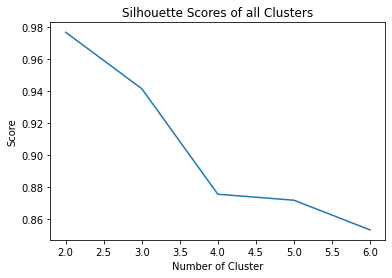

In [133]:
ax = sns.lineplot(x=n_clusters, y=silhouette_scores, sort=False)
ax.set_title('Silhouette Scores of all Clusters')
ax.set_ylabel('Score')
ax.set_xlabel('Number of Cluster')

In [103]:
formatted_dataset.shape

(500, 722, 3)

In [112]:
y_pred = km.fit_predict(formatted_dataset)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.6s finished


162092610541.905 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


146399071980.717 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


146399071980.717 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.8s finished


In [113]:
silhouette_score(formatted_dataset, y_pred, metric="dtw")

0.9859817452235218

In [114]:
sz = formatted_dataset.shape[1]

In [123]:
sz

722

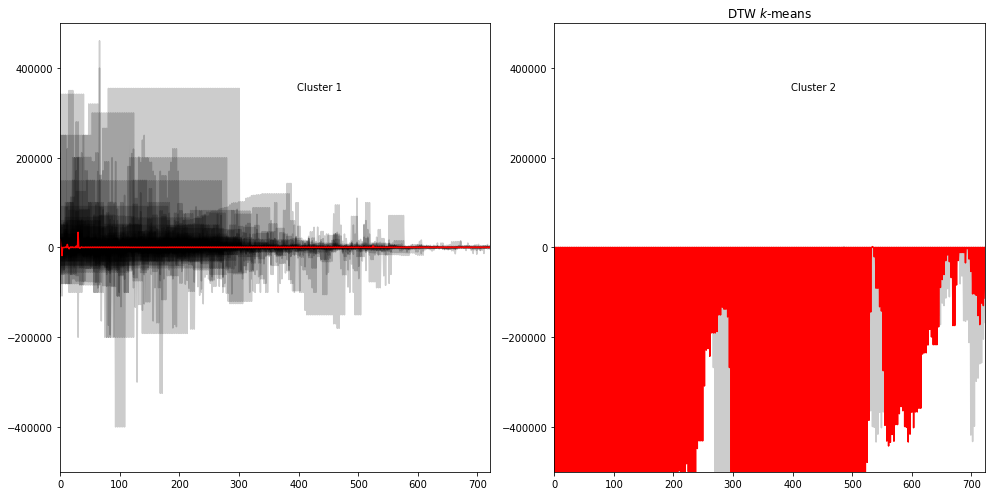

In [129]:
plt.figure(figsize=(20,20))

for yi in range(2):
    plt.subplot(3, 3, 2 + yi)
    for xx in formatted_dataset[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-500000, 500000)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")
plt.tight_layout()
plt.show()

In [31]:
#Build distance matrix

distance_matrix = np.zeros(shape=(500,500))

for i in tqdm(range(500)):
    for j in tqdm(range(500)):
        sequence_1_df = pd.read_csv('./Data/User Categorization/'+ str(i) + '.csv')
        sequence_2_df = pd.read_csv('./Data/User Categorization/' + str(j) + '.csv')
        
        seq_1 = sequence_1_df[(~sequence_1_df['f_1'].isnull()) & (~sequence_1_df['f_2'].isnull())]
        seq_2 = sequence_2_df[(~sequence_2_df['f_1'].isnull()) & (~sequence_2_df['f_2'].isnull())]
        
        x = seq_1[['f_1','f_2','f_3']].values
        y = seq_2[['f_1','f_2','f_3']].values

        distance, path = fastdtw(x, y, dist=euclidean)
        
        if i != j:
            distance_matrix[i,j] = distance






  0%|          | 0/500 [00:00<?, ?it/s]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:19, 25.94it/s]





  1%|▏         | 7/500 [00:00<00:18, 27.33it/s]





  2%|▏         | 12/500 [00:00<00:16, 30.41it/s]





  3%|▎         | 15/500 [00:00<00:17, 28.09it/s]





  4%|▍         | 19/500 [00:00<00:16, 29.29it/s]





  5%|▍         | 24/500 [00:00<00:14, 31.88it/s]





  6%|▌         | 28/500 [00:00<00:14, 32.04it/s]





  6%|▋         | 32/500 [00:00<00:14, 33.23it/s]





  7%|▋         | 36/500 [00:01<00:13, 33.93it/s]





  8%|▊         | 40/500 [00:01<00:13, 34.46it/s]





  9%|▉         | 44/500 [00:01<00:14, 31.88it/s]





 10%|▉         | 48/500 [00:01<00:14, 32.08it/s]





 10%|█         | 52/500 [00:01<00:14, 31.61it/s]





 12%|█▏        | 58/500 [00:01<00:12, 36.42it/s]





 12%|█▏        | 62/500 [00:01<00:12, 36.47it/s]





 13%|█▎        | 66/500 [00:02<00:16, 25.67it/s]





 14%|█▍        | 70/500 [00:02<00:14, 28.70

 91%|█████████ | 454/500 [00:14<00:01, 31.88it/s]





 92%|█████████▏| 458/500 [00:14<00:01, 32.42it/s]





 92%|█████████▏| 462/500 [00:14<00:01, 34.33it/s]





 93%|█████████▎| 466/500 [00:14<00:00, 34.05it/s]





 94%|█████████▍| 470/500 [00:14<00:00, 32.12it/s]





 95%|█████████▌| 475/500 [00:14<00:00, 35.02it/s]





 96%|█████████▌| 479/500 [00:14<00:00, 35.40it/s]





 97%|█████████▋| 483/500 [00:14<00:00, 34.36it/s]





 98%|█████████▊| 488/500 [00:15<00:00, 36.98it/s]





 99%|█████████▊| 493/500 [00:15<00:00, 30.94it/s]





100%|██████████| 500/500 [00:15<00:00, 32.27it/s]





  0%|          | 1/500 [00:15<2:08:53, 15.50s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:11, 44.84it/s]





  2%|▏         | 9/500 [00:00<00:11, 41.06it/s]





  3%|▎         | 13/500 [00:00<00:12, 37.75it/s]





  3%|▎         | 17/500 [00:00<00:12, 37.98it/s]





  4%|▍         | 22/500 [00:00<00:12, 39.64it/s]





  5%|▌         | 26/500 [00

 89%|████████▉ | 444/500 [00:12<00:01, 34.70it/s]





 90%|████████▉ | 448/500 [00:12<00:01, 35.74it/s]





 91%|█████████ | 453/500 [00:12<00:01, 37.41it/s]





 92%|█████████▏| 458/500 [00:12<00:01, 38.02it/s]





 93%|█████████▎| 463/500 [00:12<00:00, 38.89it/s]





 94%|█████████▎| 468/500 [00:13<00:00, 38.23it/s]





 95%|█████████▍| 473/500 [00:13<00:00, 40.36it/s]





 96%|█████████▌| 478/500 [00:13<00:00, 39.16it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 38.71it/s]





 97%|█████████▋| 486/500 [00:13<00:00, 38.44it/s]





 98%|█████████▊| 492/500 [00:13<00:00, 41.71it/s]





100%|██████████| 500/500 [00:13<00:00, 35.91it/s]





  0%|          | 2/500 [00:29<2:04:43, 15.03s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:08, 55.76it/s]





  3%|▎         | 13/500 [00:00<00:08, 55.40it/s]





  4%|▍         | 19/500 [00:00<00:08, 55.63it/s]





  5%|▌         | 26/500 [00:00<00:08, 57.54it/s]





  6%|▋         | 32/500 [

 33%|███▎      | 164/500 [00:03<00:06, 49.57it/s]





 34%|███▍      | 170/500 [00:03<00:07, 46.67it/s]





 35%|███▌      | 177/500 [00:03<00:06, 50.65it/s]





 37%|███▋      | 184/500 [00:03<00:05, 54.76it/s]





 38%|███▊      | 191/500 [00:03<00:05, 58.25it/s]





 40%|███▉      | 198/500 [00:03<00:05, 58.22it/s]





 41%|████      | 205/500 [00:03<00:04, 60.23it/s]





 42%|████▏     | 212/500 [00:03<00:04, 59.73it/s]





 44%|████▍     | 219/500 [00:04<00:04, 56.96it/s]





 45%|████▌     | 225/500 [00:04<00:04, 55.75it/s]





 46%|████▌     | 231/500 [00:04<00:04, 56.31it/s]





 47%|████▋     | 237/500 [00:04<00:04, 54.30it/s]





 49%|████▊     | 243/500 [00:04<00:04, 51.66it/s]





 50%|█████     | 251/500 [00:04<00:04, 57.14it/s]





 52%|█████▏    | 259/500 [00:04<00:04, 60.06it/s]





 53%|█████▎    | 266/500 [00:04<00:04, 56.79it/s]





 55%|█████▍    | 273/500 [00:05<00:03, 57.66it/s]





 56%|█████▌    | 281/500 [00:05<00:03, 59.60it/s]





 58%|█████

 75%|███████▌  | 375/500 [00:07<00:02, 59.57it/s]





 76%|███████▋  | 382/500 [00:07<00:02, 58.96it/s]





 78%|███████▊  | 388/500 [00:07<00:01, 57.83it/s]





 79%|███████▉  | 394/500 [00:07<00:01, 57.48it/s]





 80%|████████  | 400/500 [00:07<00:01, 56.20it/s]





 82%|████████▏ | 408/500 [00:07<00:01, 60.18it/s]





 83%|████████▎ | 415/500 [00:08<00:01, 56.98it/s]





 84%|████████▍ | 421/500 [00:08<00:01, 57.16it/s]





 85%|████████▌ | 427/500 [00:08<00:01, 56.81it/s]





 87%|████████▋ | 433/500 [00:08<00:01, 44.30it/s]





 88%|████████▊ | 439/500 [00:08<00:01, 46.54it/s]





 89%|████████▉ | 446/500 [00:08<00:01, 50.90it/s]





 91%|█████████ | 453/500 [00:08<00:00, 54.64it/s]





 92%|█████████▏| 460/500 [00:08<00:00, 57.62it/s]





 93%|█████████▎| 467/500 [00:09<00:00, 59.09it/s]





 95%|█████████▍| 474/500 [00:09<00:00, 57.09it/s]





 96%|█████████▌| 481/500 [00:09<00:00, 58.56it/s]





 98%|█████████▊| 488/500 [00:09<00:00, 59.18it/s]





100%|█████

 78%|███████▊  | 392/500 [00:11<00:02, 39.56it/s]





 79%|███████▉  | 397/500 [00:11<00:02, 37.52it/s]





 80%|████████  | 401/500 [00:11<00:02, 35.37it/s]





 81%|████████  | 405/500 [00:11<00:02, 36.56it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 36.95it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 35.25it/s]





 84%|████████▎ | 418/500 [00:12<00:02, 35.85it/s]





 85%|████████▍ | 423/500 [00:12<00:02, 36.78it/s]





 85%|████████▌ | 427/500 [00:12<00:02, 36.20it/s]





 86%|████████▌ | 431/500 [00:12<00:02, 26.99it/s]





 87%|████████▋ | 435/500 [00:12<00:02, 29.43it/s]





 88%|████████▊ | 439/500 [00:12<00:02, 29.46it/s]





 89%|████████▉ | 444/500 [00:13<00:01, 32.35it/s]





 90%|████████▉ | 448/500 [00:13<00:01, 33.82it/s]





 90%|█████████ | 452/500 [00:13<00:01, 35.44it/s]





 91%|█████████▏| 457/500 [00:13<00:01, 37.37it/s]





 93%|█████████▎| 463/500 [00:13<00:00, 39.32it/s]





 94%|█████████▎| 468/500 [00:13<00:00, 39.38it/s]





 95%|█████

 53%|█████▎    | 266/500 [00:12<00:10, 22.03it/s]





 54%|█████▍    | 269/500 [00:12<00:10, 22.39it/s]





 54%|█████▍    | 272/500 [00:12<00:10, 22.67it/s]





 55%|█████▌    | 275/500 [00:12<00:09, 23.47it/s]





 56%|█████▌    | 278/500 [00:12<00:08, 25.00it/s]





 56%|█████▌    | 281/500 [00:12<00:09, 22.73it/s]





 57%|█████▋    | 284/500 [00:12<00:08, 24.17it/s]





 57%|█████▋    | 287/500 [00:13<00:08, 24.40it/s]





 58%|█████▊    | 291/500 [00:13<00:07, 26.71it/s]





 59%|█████▉    | 295/500 [00:13<00:07, 27.05it/s]





 60%|█████▉    | 298/500 [00:13<00:08, 22.78it/s]





 60%|██████    | 301/500 [00:13<00:08, 24.11it/s]





 61%|██████    | 304/500 [00:13<00:08, 24.02it/s]





 61%|██████▏   | 307/500 [00:13<00:08, 23.07it/s]





 62%|██████▏   | 310/500 [00:13<00:07, 24.27it/s]





 63%|██████▎   | 313/500 [00:14<00:07, 24.07it/s]





 63%|██████▎   | 316/500 [00:14<00:08, 22.94it/s]





 64%|██████▍   | 319/500 [00:14<00:08, 21.35it/s]





 64%|█████

 44%|████▍     | 219/500 [00:04<00:05, 50.74it/s]





 45%|████▌     | 225/500 [00:04<00:05, 50.56it/s]





 46%|████▌     | 231/500 [00:04<00:05, 51.17it/s]





 47%|████▋     | 237/500 [00:04<00:05, 49.63it/s]





 49%|████▊     | 243/500 [00:04<00:05, 46.67it/s]





 50%|████▉     | 249/500 [00:04<00:05, 49.98it/s]





 51%|█████▏    | 257/500 [00:05<00:04, 54.64it/s]





 53%|█████▎    | 263/500 [00:05<00:04, 53.57it/s]





 54%|█████▍    | 269/500 [00:05<00:04, 52.49it/s]





 55%|█████▌    | 275/500 [00:05<00:04, 52.05it/s]





 56%|█████▌    | 281/500 [00:05<00:04, 51.65it/s]





 57%|█████▋    | 287/500 [00:05<00:03, 53.33it/s]





 59%|█████▉    | 295/500 [00:05<00:03, 58.63it/s]





 60%|██████    | 302/500 [00:05<00:03, 53.43it/s]





 62%|██████▏   | 308/500 [00:06<00:03, 52.35it/s]





 63%|██████▎   | 314/500 [00:06<00:03, 53.68it/s]





 64%|██████▍   | 320/500 [00:06<00:03, 48.20it/s]





 66%|██████▌   | 328/500 [00:06<00:03, 52.24it/s]





 67%|█████

 82%|████████▏ | 408/500 [00:08<00:01, 50.68it/s]





 83%|████████▎ | 414/500 [00:08<00:01, 46.65it/s]





 84%|████████▍ | 419/500 [00:08<00:01, 47.29it/s]





 85%|████████▌ | 425/500 [00:08<00:01, 50.13it/s]





 86%|████████▌ | 431/500 [00:08<00:01, 37.23it/s]





 87%|████████▋ | 437/500 [00:08<00:01, 40.84it/s]





 88%|████████▊ | 442/500 [00:09<00:01, 41.18it/s]





 90%|████████▉ | 448/500 [00:09<00:01, 43.90it/s]





 91%|█████████ | 454/500 [00:09<00:01, 45.85it/s]





 92%|█████████▏| 461/500 [00:09<00:00, 48.86it/s]





 93%|█████████▎| 467/500 [00:09<00:00, 50.64it/s]





 95%|█████████▍| 473/500 [00:09<00:00, 48.06it/s]





 96%|█████████▌| 478/500 [00:09<00:00, 48.01it/s]





 97%|█████████▋| 483/500 [00:09<00:00, 47.97it/s]





 98%|█████████▊| 489/500 [00:09<00:00, 50.49it/s]





100%|██████████| 500/500 [00:10<00:00, 48.82it/s]





  2%|▏         | 9/500 [01:53<1:43:10, 12.61s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/5

 88%|████████▊ | 442/500 [00:12<00:01, 33.20it/s]





 89%|████████▉ | 447/500 [00:12<00:01, 35.98it/s]





 90%|█████████ | 452/500 [00:12<00:01, 37.80it/s]





 91%|█████████▏| 457/500 [00:12<00:01, 40.21it/s]





 92%|█████████▏| 462/500 [00:12<00:00, 42.69it/s]





 93%|█████████▎| 467/500 [00:12<00:00, 43.41it/s]





 94%|█████████▍| 472/500 [00:12<00:00, 42.22it/s]





 95%|█████████▌| 477/500 [00:12<00:00, 41.29it/s]





 96%|█████████▋| 482/500 [00:12<00:00, 42.04it/s]





 97%|█████████▋| 487/500 [00:13<00:00, 44.01it/s]





 98%|█████████▊| 492/500 [00:13<00:00, 45.01it/s]





100%|██████████| 500/500 [00:13<00:00, 37.23it/s]





  2%|▏         | 10/500 [02:07<1:44:59, 12.86s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:09, 50.17it/s]





  3%|▎         | 13/500 [00:00<00:10, 48.05it/s]





  4%|▍         | 19/500 [00:00<00:09, 48.80it/s]





  5%|▌         | 25/500 [00:00<00:09, 50.81it/s]





  6%|▌         | 30/500 

 20%|██        | 101/500 [00:01<00:07, 51.67it/s]





 21%|██▏       | 107/500 [00:02<00:08, 49.00it/s]





 23%|██▎       | 113/500 [00:02<00:07, 50.30it/s]





 24%|██▍       | 119/500 [00:02<00:07, 49.57it/s]





 25%|██▌       | 125/500 [00:02<00:07, 51.66it/s]





 26%|██▌       | 131/500 [00:02<00:07, 47.78it/s]





 27%|██▋       | 136/500 [00:02<00:07, 46.63it/s]





 29%|██▉       | 144/500 [00:02<00:06, 53.17it/s]





 30%|███       | 150/500 [00:02<00:07, 48.36it/s]





 31%|███       | 156/500 [00:03<00:06, 49.56it/s]





 32%|███▏      | 162/500 [00:03<00:07, 48.00it/s]





 33%|███▎      | 167/500 [00:03<00:07, 47.43it/s]





 34%|███▍      | 172/500 [00:03<00:07, 44.95it/s]





 36%|███▌      | 179/500 [00:03<00:06, 49.37it/s]





 37%|███▋      | 186/500 [00:03<00:05, 53.48it/s]





 38%|███▊      | 192/500 [00:03<00:05, 55.22it/s]





 40%|███▉      | 198/500 [00:03<00:05, 55.69it/s]





 41%|████      | 205/500 [00:03<00:05, 57.30it/s]





 42%|████▏

 20%|█▉        | 99/500 [00:07<00:28, 14.13it/s]





 20%|██        | 101/500 [00:07<00:28, 13.89it/s]





 21%|██        | 103/500 [00:07<00:29, 13.42it/s]





 21%|██        | 105/500 [00:07<00:29, 13.32it/s]





 21%|██▏       | 107/500 [00:08<00:30, 13.06it/s]





 22%|██▏       | 109/500 [00:08<00:29, 13.29it/s]





 22%|██▏       | 111/500 [00:08<00:29, 13.19it/s]





 23%|██▎       | 113/500 [00:08<00:28, 13.59it/s]





 23%|██▎       | 115/500 [00:08<00:30, 12.60it/s]





 23%|██▎       | 117/500 [00:08<00:28, 13.63it/s]





 24%|██▍       | 120/500 [00:08<00:25, 15.07it/s]





 24%|██▍       | 122/500 [00:09<00:26, 14.27it/s]





 25%|██▍       | 124/500 [00:09<00:26, 14.39it/s]





 25%|██▌       | 126/500 [00:09<00:25, 14.65it/s]





 26%|██▌       | 128/500 [00:09<00:27, 13.52it/s]





 26%|██▌       | 130/500 [00:09<00:28, 13.16it/s]





 26%|██▋       | 132/500 [00:09<00:29, 12.38it/s]





 27%|██▋       | 134/500 [00:10<00:28, 12.76it/s]





 27%|██▋   

 67%|██████▋   | 335/500 [00:24<00:11, 13.83it/s]





 67%|██████▋   | 337/500 [00:24<00:11, 13.88it/s]





 68%|██████▊   | 339/500 [00:24<00:11, 14.32it/s]





 68%|██████▊   | 341/500 [00:25<00:11, 13.91it/s]





 69%|██████▊   | 343/500 [00:25<00:11, 13.84it/s]





 69%|██████▉   | 345/500 [00:25<00:11, 13.15it/s]





 69%|██████▉   | 347/500 [00:25<00:12, 12.67it/s]





 70%|██████▉   | 349/500 [00:25<00:12, 12.09it/s]





 70%|███████   | 351/500 [00:25<00:11, 12.62it/s]





 71%|███████   | 353/500 [00:26<00:11, 12.42it/s]





 71%|███████   | 355/500 [00:26<00:11, 12.25it/s]





 71%|███████▏  | 357/500 [00:26<00:11, 12.23it/s]





 72%|███████▏  | 359/500 [00:26<00:11, 12.54it/s]





 72%|███████▏  | 361/500 [00:26<00:09, 14.12it/s]





 73%|███████▎  | 363/500 [00:26<00:09, 14.68it/s]





 73%|███████▎  | 365/500 [00:26<00:09, 13.80it/s]





 73%|███████▎  | 367/500 [00:27<00:10, 12.75it/s]





 74%|███████▍  | 369/500 [00:27<00:10, 12.56it/s]





 74%|█████

 50%|█████     | 252/500 [00:03<00:03, 66.64it/s]





 52%|█████▏    | 260/500 [00:04<00:03, 68.74it/s]





 54%|█████▎    | 268/500 [00:04<00:03, 68.44it/s]





 55%|█████▌    | 275/500 [00:04<00:03, 67.17it/s]





 56%|█████▋    | 282/500 [00:04<00:03, 67.14it/s]





 58%|█████▊    | 292/500 [00:04<00:02, 73.69it/s]





 60%|██████    | 300/500 [00:04<00:02, 71.46it/s]





 62%|██████▏   | 308/500 [00:04<00:02, 70.42it/s]





 63%|██████▎   | 316/500 [00:04<00:02, 70.55it/s]





 65%|██████▍   | 324/500 [00:04<00:02, 68.12it/s]





 66%|██████▋   | 332/500 [00:05<00:02, 70.79it/s]





 68%|██████▊   | 340/500 [00:05<00:02, 66.27it/s]





 69%|██████▉   | 347/500 [00:05<00:02, 63.43it/s]





 71%|███████   | 354/500 [00:05<00:02, 63.12it/s]





 73%|███████▎  | 363/500 [00:05<00:01, 68.88it/s]





 74%|███████▍  | 371/500 [00:05<00:01, 69.38it/s]





 76%|███████▌  | 380/500 [00:05<00:01, 73.36it/s]





 78%|███████▊  | 388/500 [00:05<00:01, 70.20it/s]





 79%|█████

 71%|███████▏  | 357/500 [00:09<00:04, 32.88it/s]





 73%|███████▎  | 363/500 [00:09<00:03, 36.14it/s]





 73%|███████▎  | 367/500 [00:09<00:03, 34.31it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 34.98it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 37.04it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 37.67it/s]





 77%|███████▋  | 384/500 [00:10<00:03, 36.36it/s]





 78%|███████▊  | 388/500 [00:10<00:03, 36.28it/s]





 78%|███████▊  | 392/500 [00:10<00:02, 36.22it/s]





 79%|███████▉  | 396/500 [00:10<00:03, 34.47it/s]





 80%|████████  | 400/500 [00:10<00:02, 35.02it/s]





 81%|████████  | 404/500 [00:10<00:02, 34.84it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 36.84it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 35.17it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 35.87it/s]





 85%|████████▍ | 423/500 [00:11<00:02, 37.20it/s]





 85%|████████▌ | 427/500 [00:11<00:01, 37.30it/s]





 86%|████████▌ | 431/500 [00:11<00:02, 27.43it/s]





 87%|█████

 66%|██████▌   | 329/500 [00:10<00:04, 35.87it/s]





 67%|██████▋   | 333/500 [00:10<00:04, 35.29it/s]





 67%|██████▋   | 337/500 [00:10<00:04, 33.35it/s]





 68%|██████▊   | 341/500 [00:10<00:04, 33.12it/s]





 69%|██████▉   | 345/500 [00:10<00:04, 31.33it/s]





 70%|██████▉   | 349/500 [00:10<00:04, 30.81it/s]





 71%|███████   | 353/500 [00:10<00:04, 31.67it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 32.18it/s]





 72%|███████▏  | 362/500 [00:11<00:03, 35.98it/s]





 73%|███████▎  | 366/500 [00:11<00:03, 34.82it/s]





 74%|███████▍  | 370/500 [00:11<00:03, 34.82it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 37.13it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 36.42it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 36.20it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 33.24it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 35.41it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 34.00it/s]





 80%|████████  | 400/500 [00:12<00:02, 34.45it/s]





 81%|█████

 61%|██████    | 305/500 [00:08<00:05, 37.85it/s]





 62%|██████▏   | 310/500 [00:09<00:04, 38.70it/s]





 63%|██████▎   | 315/500 [00:09<00:04, 40.25it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 35.45it/s]





 65%|██████▌   | 326/500 [00:09<00:04, 38.80it/s]





 66%|██████▌   | 331/500 [00:09<00:04, 39.19it/s]





 67%|██████▋   | 336/500 [00:09<00:04, 36.21it/s]





 68%|██████▊   | 340/500 [00:09<00:04, 36.29it/s]





 69%|██████▉   | 344/500 [00:10<00:04, 33.66it/s]





 70%|██████▉   | 348/500 [00:10<00:04, 33.89it/s]





 70%|███████   | 352/500 [00:10<00:04, 34.59it/s]





 71%|███████   | 356/500 [00:10<00:04, 35.12it/s]





 72%|███████▏  | 361/500 [00:10<00:03, 38.15it/s]





 73%|███████▎  | 366/500 [00:10<00:03, 38.33it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 38.00it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 40.66it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 39.58it/s]





 77%|███████▋  | 385/500 [00:11<00:03, 37.13it/s]





 78%|█████

 61%|██████    | 305/500 [00:08<00:05, 36.90it/s]





 62%|██████▏   | 309/500 [00:08<00:05, 37.15it/s]





 63%|██████▎   | 313/500 [00:08<00:05, 36.32it/s]





 63%|██████▎   | 317/500 [00:08<00:05, 32.63it/s]





 64%|██████▍   | 321/500 [00:08<00:05, 32.57it/s]





 65%|██████▌   | 326/500 [00:08<00:04, 35.71it/s]





 66%|██████▌   | 330/500 [00:09<00:04, 35.93it/s]





 67%|██████▋   | 334/500 [00:09<00:04, 34.17it/s]





 68%|██████▊   | 338/500 [00:09<00:04, 33.17it/s]





 68%|██████▊   | 342/500 [00:09<00:04, 31.95it/s]





 69%|██████▉   | 346/500 [00:09<00:05, 30.61it/s]





 70%|███████   | 350/500 [00:09<00:04, 31.52it/s]





 71%|███████   | 354/500 [00:09<00:04, 30.90it/s]





 72%|███████▏  | 358/500 [00:09<00:04, 32.36it/s]





 73%|███████▎  | 363/500 [00:10<00:03, 35.35it/s]





 73%|███████▎  | 367/500 [00:10<00:03, 33.98it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 34.23it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 35.99it/s]





 76%|█████

 61%|██████    | 303/500 [00:08<00:04, 40.77it/s]





 62%|██████▏   | 308/500 [00:08<00:04, 39.35it/s]





 63%|██████▎   | 313/500 [00:08<00:04, 39.42it/s]





 64%|██████▎   | 318/500 [00:08<00:05, 34.98it/s]





 64%|██████▍   | 322/500 [00:08<00:05, 34.73it/s]





 65%|██████▌   | 327/500 [00:08<00:04, 36.56it/s]





 66%|██████▌   | 331/500 [00:08<00:04, 36.78it/s]





 67%|██████▋   | 335/500 [00:08<00:04, 33.60it/s]





 68%|██████▊   | 339/500 [00:09<00:04, 34.05it/s]





 69%|██████▊   | 343/500 [00:09<00:04, 32.63it/s]





 69%|██████▉   | 347/500 [00:09<00:04, 31.71it/s]





 70%|███████   | 351/500 [00:09<00:04, 32.03it/s]





 71%|███████   | 355/500 [00:09<00:04, 31.70it/s]





 72%|███████▏  | 360/500 [00:09<00:04, 34.75it/s]





 73%|███████▎  | 365/500 [00:09<00:03, 36.77it/s]





 74%|███████▍  | 369/500 [00:09<00:03, 35.22it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 38.40it/s]





 76%|███████▌  | 379/500 [00:10<00:03, 38.02it/s]





 77%|█████

 34%|███▍      | 170/500 [00:04<00:10, 32.55it/s]





 35%|███▍      | 174/500 [00:04<00:09, 34.38it/s]





 36%|███▌      | 178/500 [00:04<00:08, 35.85it/s]





 37%|███▋      | 183/500 [00:05<00:08, 37.30it/s]





 38%|███▊      | 188/500 [00:05<00:08, 38.40it/s]





 39%|███▊      | 193/500 [00:05<00:07, 39.41it/s]





 39%|███▉      | 197/500 [00:05<00:07, 38.08it/s]





 41%|████      | 203/500 [00:05<00:07, 40.36it/s]





 42%|████▏     | 208/500 [00:05<00:07, 41.47it/s]





 43%|████▎     | 213/500 [00:05<00:07, 40.45it/s]





 44%|████▎     | 218/500 [00:05<00:07, 37.26it/s]





 45%|████▍     | 223/500 [00:06<00:07, 37.95it/s]





 45%|████▌     | 227/500 [00:06<00:07, 36.00it/s]





 46%|████▌     | 231/500 [00:06<00:07, 37.09it/s]





 47%|████▋     | 235/500 [00:06<00:07, 35.80it/s]





 48%|████▊     | 240/500 [00:06<00:07, 36.26it/s]





 49%|████▉     | 244/500 [00:06<00:07, 33.29it/s]





 50%|████▉     | 248/500 [00:06<00:07, 34.28it/s]





 51%|█████

 36%|███▌      | 180/500 [00:04<00:08, 36.98it/s]





 37%|███▋      | 184/500 [00:05<00:08, 37.80it/s]





 38%|███▊      | 189/500 [00:05<00:07, 39.35it/s]





 39%|███▉      | 194/500 [00:05<00:07, 39.17it/s]





 40%|███▉      | 199/500 [00:05<00:07, 39.86it/s]





 41%|████      | 204/500 [00:05<00:07, 41.88it/s]





 42%|████▏     | 209/500 [00:05<00:07, 41.51it/s]





 43%|████▎     | 214/500 [00:05<00:07, 39.87it/s]





 44%|████▍     | 219/500 [00:05<00:07, 36.89it/s]





 45%|████▍     | 224/500 [00:06<00:07, 38.74it/s]





 46%|████▌     | 228/500 [00:06<00:07, 35.35it/s]





 46%|████▋     | 232/500 [00:06<00:07, 36.26it/s]





 47%|████▋     | 236/500 [00:06<00:07, 35.53it/s]





 48%|████▊     | 240/500 [00:06<00:07, 36.32it/s]





 49%|████▉     | 244/500 [00:06<00:07, 33.42it/s]





 50%|████▉     | 248/500 [00:06<00:07, 34.57it/s]





 51%|█████     | 255/500 [00:06<00:06, 39.78it/s]





 52%|█████▏    | 260/500 [00:06<00:06, 38.93it/s]





 53%|█████

 45%|████▍     | 223/500 [00:05<00:06, 41.28it/s]





 46%|████▌     | 228/500 [00:05<00:06, 39.41it/s]





 47%|████▋     | 233/500 [00:05<00:06, 40.02it/s]





 48%|████▊     | 238/500 [00:05<00:06, 38.54it/s]





 48%|████▊     | 242/500 [00:06<00:07, 36.41it/s]





 49%|████▉     | 247/500 [00:06<00:06, 37.47it/s]





 51%|█████     | 254/500 [00:06<00:05, 43.52it/s]





 52%|█████▏    | 259/500 [00:06<00:05, 42.16it/s]





 53%|█████▎    | 264/500 [00:06<00:05, 40.23it/s]





 54%|█████▍    | 269/500 [00:06<00:05, 40.38it/s]





 55%|█████▍    | 274/500 [00:06<00:05, 40.98it/s]





 56%|█████▌    | 280/500 [00:06<00:05, 43.47it/s]





 57%|█████▋    | 285/500 [00:07<00:05, 39.89it/s]





 58%|█████▊    | 291/500 [00:07<00:04, 43.05it/s]





 59%|█████▉    | 296/500 [00:07<00:05, 38.95it/s]





 60%|██████    | 301/500 [00:07<00:04, 41.69it/s]





 61%|██████    | 306/500 [00:07<00:04, 41.20it/s]





 62%|██████▏   | 311/500 [00:07<00:04, 43.18it/s]





 63%|█████

 54%|█████▍    | 271/500 [00:06<00:05, 39.47it/s]





 55%|█████▌    | 276/500 [00:07<00:05, 41.33it/s]





 56%|█████▌    | 281/500 [00:07<00:05, 39.98it/s]





 57%|█████▋    | 286/500 [00:07<00:05, 41.91it/s]





 58%|█████▊    | 292/500 [00:07<00:04, 44.88it/s]





 59%|█████▉    | 297/500 [00:07<00:05, 39.41it/s]





 61%|██████    | 303/500 [00:07<00:04, 42.76it/s]





 62%|██████▏   | 308/500 [00:07<00:04, 41.83it/s]





 63%|██████▎   | 313/500 [00:07<00:04, 41.62it/s]





 64%|██████▎   | 318/500 [00:08<00:04, 38.23it/s]





 65%|██████▍   | 323/500 [00:08<00:04, 40.93it/s]





 66%|██████▌   | 328/500 [00:08<00:04, 40.97it/s]





 67%|██████▋   | 333/500 [00:08<00:04, 41.56it/s]





 68%|██████▊   | 338/500 [00:08<00:04, 38.92it/s]





 68%|██████▊   | 342/500 [00:08<00:04, 37.43it/s]





 69%|██████▉   | 346/500 [00:08<00:04, 35.89it/s]





 70%|███████   | 350/500 [00:08<00:04, 36.88it/s]





 71%|███████   | 354/500 [00:09<00:04, 36.00it/s]





 72%|█████

 65%|██████▍   | 324/500 [00:07<00:04, 41.02it/s]





 66%|██████▌   | 329/500 [00:08<00:04, 42.38it/s]





 67%|██████▋   | 334/500 [00:08<00:04, 40.24it/s]





 68%|██████▊   | 339/500 [00:08<00:03, 40.25it/s]





 69%|██████▉   | 344/500 [00:08<00:04, 36.86it/s]





 70%|██████▉   | 348/500 [00:08<00:04, 36.64it/s]





 70%|███████   | 352/500 [00:08<00:03, 37.03it/s]





 71%|███████   | 356/500 [00:08<00:03, 37.23it/s]





 72%|███████▏  | 362/500 [00:08<00:03, 41.34it/s]





 73%|███████▎  | 367/500 [00:09<00:03, 39.70it/s]





 74%|███████▍  | 372/500 [00:09<00:03, 40.92it/s]





 75%|███████▌  | 377/500 [00:09<00:02, 42.83it/s]





 76%|███████▋  | 382/500 [00:09<00:02, 42.19it/s]





 77%|███████▋  | 387/500 [00:09<00:02, 39.92it/s]





 78%|███████▊  | 392/500 [00:09<00:02, 42.00it/s]





 79%|███████▉  | 397/500 [00:09<00:02, 41.26it/s]





 80%|████████  | 402/500 [00:09<00:02, 39.85it/s]





 82%|████████▏ | 408/500 [00:10<00:02, 44.30it/s]





 83%|█████

 69%|██████▉   | 346/500 [00:09<00:04, 32.87it/s]





 70%|███████   | 350/500 [00:09<00:04, 34.03it/s]





 71%|███████   | 354/500 [00:09<00:04, 33.57it/s]





 72%|███████▏  | 358/500 [00:09<00:04, 35.14it/s]





 73%|███████▎  | 363/500 [00:09<00:03, 37.99it/s]





 73%|███████▎  | 367/500 [00:09<00:03, 36.36it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 36.66it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 38.52it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 38.84it/s]





 77%|███████▋  | 384/500 [00:10<00:03, 38.03it/s]





 78%|███████▊  | 388/500 [00:10<00:02, 37.57it/s]





 78%|███████▊  | 392/500 [00:10<00:02, 37.04it/s]





 79%|███████▉  | 396/500 [00:10<00:02, 35.49it/s]





 80%|████████  | 400/500 [00:10<00:02, 36.09it/s]





 81%|████████  | 404/500 [00:10<00:02, 35.91it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 38.12it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 37.02it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 38.10it/s]





 85%|█████

 67%|██████▋   | 333/500 [00:09<00:04, 35.19it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 32.77it/s]





 68%|██████▊   | 341/500 [00:09<00:04, 32.51it/s]





 69%|██████▉   | 345/500 [00:09<00:05, 30.68it/s]





 70%|██████▉   | 349/500 [00:10<00:04, 30.29it/s]





 71%|███████   | 353/500 [00:10<00:04, 31.35it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 31.61it/s]





 72%|███████▏  | 362/500 [00:10<00:03, 35.11it/s]





 73%|███████▎  | 366/500 [00:10<00:03, 34.06it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 34.13it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 36.57it/s]





 76%|███████▌  | 379/500 [00:10<00:03, 35.39it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 35.23it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 32.78it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 34.99it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 33.34it/s]





 80%|████████  | 400/500 [00:11<00:02, 33.39it/s]





 81%|████████  | 404/500 [00:11<00:02, 33.09it/s]





 82%|█████

 63%|██████▎   | 317/500 [00:08<00:05, 34.21it/s]





 64%|██████▍   | 321/500 [00:09<00:05, 34.44it/s]





 65%|██████▌   | 327/500 [00:09<00:04, 38.74it/s]





 66%|██████▋   | 332/500 [00:09<00:04, 41.09it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 39.49it/s]





 68%|██████▊   | 342/500 [00:09<00:04, 38.30it/s]





 69%|██████▉   | 346/500 [00:09<00:04, 37.65it/s]





 70%|███████   | 351/500 [00:09<00:03, 38.44it/s]





 71%|███████   | 355/500 [00:09<00:03, 37.53it/s]





 72%|███████▏  | 360/500 [00:09<00:03, 40.51it/s]





 73%|███████▎  | 365/500 [00:10<00:03, 41.96it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 40.80it/s]





 75%|███████▌  | 376/500 [00:10<00:02, 42.35it/s]





 76%|███████▌  | 381/500 [00:10<00:02, 42.77it/s]





 77%|███████▋  | 386/500 [00:10<00:02, 40.83it/s]





 78%|███████▊  | 391/500 [00:10<00:02, 42.37it/s]





 79%|███████▉  | 396/500 [00:10<00:02, 39.58it/s]





 80%|████████  | 401/500 [00:10<00:02, 39.48it/s]





 81%|█████

 63%|██████▎   | 316/500 [00:09<00:05, 34.08it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 31.53it/s]





 65%|██████▌   | 325/500 [00:09<00:05, 34.81it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 35.73it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 35.35it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 33.01it/s]





 68%|██████▊   | 341/500 [00:10<00:04, 32.67it/s]





 69%|██████▉   | 345/500 [00:10<00:05, 30.88it/s]





 70%|██████▉   | 349/500 [00:10<00:04, 30.24it/s]





 71%|███████   | 353/500 [00:10<00:04, 31.24it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 31.80it/s]





 72%|███████▏  | 362/500 [00:10<00:03, 35.56it/s]





 73%|███████▎  | 366/500 [00:10<00:03, 34.37it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 34.37it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 36.74it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 35.57it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 35.35it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 32.80it/s]





 78%|█████

 61%|██████    | 304/500 [00:08<00:05, 37.11it/s]





 62%|██████▏   | 308/500 [00:08<00:05, 37.43it/s]





 62%|██████▏   | 312/500 [00:08<00:04, 38.06it/s]





 63%|██████▎   | 316/500 [00:08<00:05, 35.75it/s]





 64%|██████▍   | 320/500 [00:08<00:05, 33.20it/s]





 65%|██████▌   | 325/500 [00:08<00:04, 36.46it/s]





 66%|██████▌   | 330/500 [00:09<00:04, 37.25it/s]





 67%|██████▋   | 334/500 [00:09<00:04, 35.46it/s]





 68%|██████▊   | 338/500 [00:09<00:04, 34.72it/s]





 68%|██████▊   | 342/500 [00:09<00:04, 33.73it/s]





 69%|██████▉   | 346/500 [00:09<00:04, 32.55it/s]





 70%|███████   | 350/500 [00:09<00:04, 33.70it/s]





 71%|███████   | 354/500 [00:09<00:04, 33.10it/s]





 72%|███████▏  | 358/500 [00:09<00:04, 34.37it/s]





 73%|███████▎  | 363/500 [00:10<00:03, 37.09it/s]





 73%|███████▎  | 367/500 [00:10<00:03, 35.72it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 36.23it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 37.73it/s]





 76%|█████

 82%|████████▏ | 409/500 [00:08<00:01, 47.87it/s]





 83%|████████▎ | 414/500 [00:08<00:01, 46.54it/s]





 84%|████████▍ | 420/500 [00:08<00:01, 48.39it/s]





 85%|████████▌ | 426/500 [00:08<00:01, 49.12it/s]





 86%|████████▌ | 431/500 [00:08<00:01, 37.99it/s]





 87%|████████▋ | 437/500 [00:08<00:01, 41.33it/s]





 88%|████████▊ | 442/500 [00:08<00:01, 41.62it/s]





 90%|████████▉ | 448/500 [00:08<00:01, 44.16it/s]





 91%|█████████ | 454/500 [00:09<00:00, 46.40it/s]





 92%|█████████▏| 461/500 [00:09<00:00, 48.96it/s]





 93%|█████████▎| 467/500 [00:09<00:00, 51.20it/s]





 95%|█████████▍| 473/500 [00:09<00:00, 49.95it/s]





 96%|█████████▌| 479/500 [00:09<00:00, 50.49it/s]





 97%|█████████▋| 485/500 [00:09<00:00, 47.83it/s]





 99%|█████████▊| 493/500 [00:09<00:00, 45.25it/s]





100%|██████████| 500/500 [00:09<00:00, 50.03it/s]





  6%|▌         | 31/500 [06:48<1:38:41, 12.63s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/

 97%|█████████▋| 487/500 [00:11<00:00, 50.54it/s]





 99%|█████████▊| 493/500 [00:12<00:00, 42.00it/s]





100%|██████████| 500/500 [00:12<00:00, 40.88it/s]





  6%|▋         | 32/500 [07:00<1:37:33, 12.51s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:10, 49.14it/s]





  2%|▏         | 11/500 [00:00<00:10, 47.31it/s]





  3%|▎         | 15/500 [00:00<00:11, 42.98it/s]





  4%|▍         | 19/500 [00:00<00:11, 41.99it/s]





  5%|▌         | 25/500 [00:00<00:10, 43.86it/s]





  6%|▌         | 30/500 [00:00<00:10, 43.22it/s]





  7%|▋         | 35/500 [00:00<00:10, 44.41it/s]





  8%|▊         | 40/500 [00:00<00:10, 44.90it/s]





  9%|▉         | 45/500 [00:01<00:10, 45.49it/s]





 10%|█         | 50/500 [00:01<00:09, 45.37it/s]





 11%|█         | 56/500 [00:01<00:09, 48.63it/s]





 12%|█▏        | 62/500 [00:01<00:08, 49.38it/s]





 13%|█▎        | 67/500 [00:01<00:12, 35.92it/s]





 15%|█▍        | 73/500 [00:01<00

 14%|█▎        | 68/500 [00:01<00:10, 39.82it/s]





 15%|█▌        | 75/500 [00:01<00:09, 44.67it/s]





 16%|█▌        | 81/500 [00:01<00:09, 43.45it/s]





 18%|█▊        | 88/500 [00:01<00:08, 48.46it/s]





 19%|█▉        | 94/500 [00:01<00:08, 48.74it/s]





 20%|██        | 100/500 [00:01<00:08, 48.71it/s]





 21%|██        | 106/500 [00:02<00:08, 48.05it/s]





 22%|██▏       | 111/500 [00:02<00:08, 47.59it/s]





 23%|██▎       | 116/500 [00:02<00:08, 43.92it/s]





 25%|██▍       | 123/500 [00:02<00:07, 47.97it/s]





 26%|██▌       | 129/500 [00:02<00:08, 46.28it/s]





 27%|██▋       | 134/500 [00:02<00:08, 42.78it/s]





 28%|██▊       | 142/500 [00:02<00:07, 49.55it/s]





 30%|██▉       | 148/500 [00:02<00:07, 49.01it/s]





 31%|███       | 154/500 [00:03<00:06, 49.89it/s]





 32%|███▏      | 160/500 [00:03<00:06, 50.58it/s]





 33%|███▎      | 166/500 [00:03<00:06, 51.43it/s]





 34%|███▍      | 172/500 [00:03<00:06, 50.16it/s]





 36%|███▌      

 39%|███▉      | 196/500 [00:05<00:08, 34.91it/s]





 40%|████      | 200/500 [00:06<00:08, 36.21it/s]





 41%|████      | 205/500 [00:06<00:07, 38.00it/s]





 42%|████▏     | 209/500 [00:06<00:07, 38.07it/s]





 43%|████▎     | 213/500 [00:06<00:07, 36.23it/s]





 43%|████▎     | 217/500 [00:06<00:08, 33.48it/s]





 44%|████▍     | 221/500 [00:06<00:08, 33.54it/s]





 45%|████▌     | 225/500 [00:06<00:08, 31.91it/s]





 46%|████▌     | 229/500 [00:06<00:08, 31.20it/s]





 47%|████▋     | 233/500 [00:07<00:08, 31.61it/s]





 47%|████▋     | 237/500 [00:07<00:08, 31.01it/s]





 48%|████▊     | 241/500 [00:07<00:08, 29.64it/s]





 49%|████▉     | 244/500 [00:07<00:08, 29.36it/s]





 50%|████▉     | 248/500 [00:07<00:08, 30.56it/s]





 51%|█████     | 255/500 [00:07<00:07, 34.73it/s]





 52%|█████▏    | 259/500 [00:07<00:07, 33.28it/s]





 53%|█████▎    | 263/500 [00:07<00:07, 32.06it/s]





 53%|█████▎    | 267/500 [00:08<00:07, 31.00it/s]





 54%|█████

 38%|███▊      | 191/500 [00:04<00:06, 46.21it/s]





 39%|███▉      | 196/500 [00:04<00:06, 44.21it/s]





 40%|████      | 202/500 [00:04<00:06, 46.13it/s]





 41%|████▏     | 207/500 [00:04<00:06, 46.52it/s]





 42%|████▏     | 212/500 [00:05<00:06, 45.08it/s]





 43%|████▎     | 217/500 [00:05<00:06, 43.98it/s]





 44%|████▍     | 222/500 [00:05<00:06, 43.57it/s]





 45%|████▌     | 227/500 [00:05<00:06, 40.97it/s]





 46%|████▋     | 232/500 [00:05<00:06, 42.21it/s]





 47%|████▋     | 237/500 [00:05<00:06, 41.19it/s]





 48%|████▊     | 242/500 [00:05<00:06, 38.65it/s]





 49%|████▉     | 247/500 [00:05<00:06, 40.14it/s]





 51%|█████     | 255/500 [00:06<00:05, 45.72it/s]





 52%|█████▏    | 260/500 [00:06<00:05, 44.22it/s]





 53%|█████▎    | 265/500 [00:06<00:05, 42.47it/s]





 54%|█████▍    | 270/500 [00:06<00:05, 44.15it/s]





 55%|█████▌    | 275/500 [00:06<00:05, 43.45it/s]





 56%|█████▌    | 281/500 [00:06<00:04, 44.40it/s]





 57%|█████

 79%|███████▊  | 393/500 [00:06<00:01, 59.41it/s]





 80%|████████  | 400/500 [00:06<00:01, 56.92it/s]





 82%|████████▏ | 408/500 [00:06<00:01, 60.90it/s]





 83%|████████▎ | 415/500 [00:06<00:01, 58.06it/s]





 84%|████████▍ | 422/500 [00:06<00:01, 60.15it/s]





 86%|████████▌ | 429/500 [00:07<00:01, 50.42it/s]





 87%|████████▋ | 435/500 [00:07<00:01, 50.25it/s]





 88%|████████▊ | 441/500 [00:07<00:01, 50.09it/s]





 90%|████████▉ | 448/500 [00:07<00:00, 53.88it/s]





 91%|█████████ | 455/500 [00:07<00:00, 55.46it/s]





 93%|█████████▎| 463/500 [00:07<00:00, 58.76it/s]





 94%|█████████▍| 470/500 [00:07<00:00, 56.12it/s]





 95%|█████████▌| 477/500 [00:07<00:00, 58.47it/s]





 97%|█████████▋| 484/500 [00:08<00:00, 59.16it/s]





 99%|█████████▊| 493/500 [00:08<00:00, 55.31it/s]





100%|██████████| 500/500 [00:08<00:00, 60.29it/s]





  7%|▋         | 37/500 [07:56<1:25:25, 11.07s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/

 81%|████████  | 404/500 [00:11<00:02, 33.03it/s]





 82%|████████▏ | 409/500 [00:12<00:02, 35.42it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 34.11it/s]





 84%|████████▎ | 418/500 [00:12<00:02, 34.81it/s]





 84%|████████▍ | 422/500 [00:12<00:02, 36.22it/s]





 85%|████████▌ | 426/500 [00:12<00:02, 35.16it/s]





 86%|████████▌ | 430/500 [00:12<00:02, 25.46it/s]





 87%|████████▋ | 434/500 [00:12<00:02, 27.93it/s]





 88%|████████▊ | 439/500 [00:13<00:02, 29.50it/s]





 89%|████████▊ | 443/500 [00:13<00:01, 31.99it/s]





 90%|████████▉ | 448/500 [00:13<00:01, 33.69it/s]





 90%|█████████ | 452/500 [00:13<00:01, 35.12it/s]





 91%|█████████ | 456/500 [00:13<00:01, 36.36it/s]





 92%|█████████▏| 460/500 [00:13<00:01, 37.33it/s]





 93%|█████████▎| 464/500 [00:13<00:00, 36.11it/s]





 94%|█████████▎| 468/500 [00:13<00:00, 35.01it/s]





 95%|█████████▍| 473/500 [00:13<00:00, 37.30it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 36.30it/s]





 96%|█████

 77%|███████▋  | 383/500 [00:10<00:03, 36.20it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 33.44it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 35.70it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 34.37it/s]





 80%|████████  | 400/500 [00:11<00:02, 34.74it/s]





 81%|████████  | 404/500 [00:11<00:02, 34.31it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 36.97it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 35.90it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 36.72it/s]





 85%|████████▍ | 423/500 [00:12<00:02, 37.53it/s]





 85%|████████▌ | 427/500 [00:12<00:01, 36.97it/s]





 86%|████████▌ | 431/500 [00:12<00:02, 29.22it/s]





 87%|████████▋ | 435/500 [00:12<00:02, 31.40it/s]





 88%|████████▊ | 439/500 [00:12<00:01, 30.99it/s]





 89%|████████▉ | 444/500 [00:12<00:01, 33.55it/s]





 90%|████████▉ | 448/500 [00:12<00:01, 34.89it/s]





 90%|█████████ | 452/500 [00:12<00:01, 35.94it/s]





 91%|█████████▏| 457/500 [00:13<00:01, 37.30it/s]





 92%|█████

 70%|██████▉   | 349/500 [00:10<00:05, 29.00it/s]





 71%|███████   | 353/500 [00:10<00:04, 29.77it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 30.22it/s]





 72%|███████▏  | 362/500 [00:11<00:04, 33.38it/s]





 73%|███████▎  | 366/500 [00:11<00:04, 32.42it/s]





 74%|███████▍  | 370/500 [00:11<00:04, 32.35it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 34.55it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 34.06it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 33.97it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 31.52it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 33.47it/s]





 79%|███████▉  | 396/500 [00:12<00:03, 31.56it/s]





 80%|████████  | 400/500 [00:12<00:03, 32.07it/s]





 81%|████████  | 404/500 [00:12<00:03, 31.89it/s]





 82%|████████▏ | 409/500 [00:12<00:02, 34.18it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 32.96it/s]





 83%|████████▎ | 417/500 [00:12<00:02, 34.74it/s]





 84%|████████▍ | 421/500 [00:12<00:02, 34.64it/s]





 85%|█████

  4%|▍         | 19/500 [00:00<00:18, 26.03it/s]





  5%|▍         | 23/500 [00:00<00:16, 28.13it/s]





  5%|▌         | 26/500 [00:00<00:16, 27.97it/s]





  6%|▌         | 29/500 [00:01<00:16, 27.74it/s]





  7%|▋         | 33/500 [00:01<00:16, 28.35it/s]





  7%|▋         | 36/500 [00:01<00:16, 28.70it/s]





  8%|▊         | 40/500 [00:01<00:15, 28.98it/s]





  9%|▊         | 43/500 [00:01<00:15, 29.24it/s]





  9%|▉         | 46/500 [00:01<00:15, 29.34it/s]





 10%|█         | 50/500 [00:01<00:15, 29.76it/s]





 11%|█         | 55/500 [00:01<00:13, 32.50it/s]





 12%|█▏        | 60/500 [00:01<00:12, 34.32it/s]





 13%|█▎        | 64/500 [00:02<00:17, 24.80it/s]





 13%|█▎        | 67/500 [00:02<00:19, 22.17it/s]





 14%|█▍        | 71/500 [00:02<00:16, 25.59it/s]





 15%|█▌        | 75/500 [00:02<00:15, 26.80it/s]





 16%|█▌        | 79/500 [00:02<00:15, 26.61it/s]





 16%|█▋        | 82/500 [00:02<00:16, 26.00it/s]





 17%|█▋        | 87/500 [00:

 89%|████████▉ | 445/500 [00:15<00:01, 28.89it/s]





 90%|████████▉ | 449/500 [00:15<00:01, 28.74it/s]





 91%|█████████ | 453/500 [00:15<00:01, 30.67it/s]





 91%|█████████▏| 457/500 [00:15<00:01, 31.66it/s]





 92%|█████████▏| 461/500 [00:15<00:01, 32.05it/s]





 93%|█████████▎| 465/500 [00:15<00:01, 31.43it/s]





 94%|█████████▍| 469/500 [00:15<00:01, 30.27it/s]





 95%|█████████▍| 474/500 [00:16<00:00, 32.48it/s]





 96%|█████████▌| 478/500 [00:16<00:00, 32.09it/s]





 96%|█████████▋| 482/500 [00:16<00:00, 31.22it/s]





 97%|█████████▋| 486/500 [00:16<00:00, 31.11it/s]





 98%|█████████▊| 490/500 [00:16<00:00, 33.25it/s]





 99%|█████████▉| 494/500 [00:16<00:00, 26.65it/s]





100%|██████████| 500/500 [00:16<00:00, 29.56it/s]





  8%|▊         | 42/500 [09:06<1:42:46, 13.46s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 37.86it/s]





  1%|▏         | 7/500 [00:00<00:14, 35.07it/s]





  2%|▏         | 12/500

 84%|████████▎ | 418/500 [00:12<00:02, 35.75it/s]





 84%|████████▍ | 422/500 [00:12<00:02, 36.65it/s]





 85%|████████▌ | 426/500 [00:12<00:02, 35.85it/s]





 86%|████████▌ | 430/500 [00:12<00:02, 25.67it/s]





 87%|████████▋ | 434/500 [00:12<00:02, 28.23it/s]





 88%|████████▊ | 439/500 [00:12<00:02, 29.88it/s]





 89%|████████▉ | 444/500 [00:12<00:01, 32.51it/s]





 90%|████████▉ | 448/500 [00:13<00:01, 33.64it/s]





 90%|█████████ | 452/500 [00:13<00:01, 34.96it/s]





 91%|█████████▏| 457/500 [00:13<00:01, 36.38it/s]





 92%|█████████▏| 461/500 [00:13<00:01, 36.79it/s]





 93%|█████████▎| 465/500 [00:13<00:00, 35.95it/s]





 94%|█████████▍| 469/500 [00:13<00:00, 35.91it/s]





 95%|█████████▍| 474/500 [00:13<00:00, 38.09it/s]





 96%|█████████▌| 478/500 [00:13<00:00, 37.46it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 36.46it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 36.08it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 39.43it/s]





100%|█████

 89%|████████▉ | 446/500 [00:11<00:01, 35.83it/s]





 90%|█████████ | 451/500 [00:11<00:01, 38.73it/s]





 91%|█████████ | 456/500 [00:11<00:01, 40.30it/s]





 92%|█████████▏| 461/500 [00:11<00:00, 41.17it/s]





 93%|█████████▎| 466/500 [00:12<00:00, 42.28it/s]





 94%|█████████▍| 471/500 [00:12<00:00, 41.01it/s]





 95%|█████████▌| 476/500 [00:12<00:00, 41.66it/s]





 96%|█████████▌| 481/500 [00:12<00:00, 42.32it/s]





 97%|█████████▋| 486/500 [00:12<00:00, 40.68it/s]





 98%|█████████▊| 492/500 [00:12<00:00, 44.67it/s]





100%|██████████| 500/500 [00:12<00:00, 38.49it/s]





  9%|▉         | 44/500 [09:33<1:42:56, 13.55s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:09, 54.43it/s]





  2%|▏         | 10/500 [00:00<00:10, 48.88it/s]





  3%|▎         | 15/500 [00:00<00:10, 47.09it/s]





  4%|▍         | 21/500 [00:00<00:09, 49.34it/s]





  5%|▌         | 27/500 [00:00<00:09, 49.64it/s]





  7%|▋         | 33/500 [

 19%|█▊        | 93/500 [00:02<00:10, 37.92it/s]





 20%|█▉        | 98/500 [00:02<00:10, 37.08it/s]





 20%|██        | 102/500 [00:02<00:10, 36.94it/s]





 21%|██        | 106/500 [00:02<00:11, 35.68it/s]





 22%|██▏       | 110/500 [00:02<00:11, 34.68it/s]





 23%|██▎       | 114/500 [00:03<00:10, 35.69it/s]





 24%|██▎       | 118/500 [00:03<00:11, 33.72it/s]





 25%|██▍       | 123/500 [00:03<00:10, 36.42it/s]





 25%|██▌       | 127/500 [00:03<00:10, 34.73it/s]





 26%|██▌       | 131/500 [00:03<00:10, 33.98it/s]





 27%|██▋       | 135/500 [00:03<00:10, 33.51it/s]





 28%|██▊       | 140/500 [00:03<00:09, 36.72it/s]





 29%|██▉       | 145/500 [00:03<00:09, 38.05it/s]





 30%|██▉       | 149/500 [00:04<00:10, 34.05it/s]





 31%|███       | 153/500 [00:04<00:10, 34.23it/s]





 31%|███▏      | 157/500 [00:04<00:10, 31.65it/s]





 32%|███▏      | 162/500 [00:04<00:09, 35.26it/s]





 33%|███▎      | 166/500 [00:04<00:09, 34.11it/s]





 34%|███▍   

 36%|███▌      | 181/500 [00:02<00:05, 61.30it/s]





 38%|███▊      | 190/500 [00:03<00:04, 67.49it/s]





 40%|███▉      | 198/500 [00:03<00:04, 65.63it/s]





 41%|████      | 206/500 [00:03<00:04, 67.33it/s]





 43%|████▎     | 214/500 [00:03<00:04, 68.59it/s]





 44%|████▍     | 222/500 [00:03<00:04, 64.65it/s]





 46%|████▌     | 229/500 [00:03<00:04, 61.19it/s]





 47%|████▋     | 236/500 [00:03<00:04, 62.52it/s]





 49%|████▊     | 243/500 [00:03<00:04, 58.97it/s]





 50%|█████     | 252/500 [00:03<00:03, 65.50it/s]





 52%|█████▏    | 260/500 [00:04<00:03, 66.96it/s]





 53%|█████▎    | 267/500 [00:04<00:03, 64.89it/s]





 55%|█████▍    | 274/500 [00:04<00:03, 66.12it/s]





 56%|█████▌    | 281/500 [00:04<00:03, 66.37it/s]





 58%|█████▊    | 289/500 [00:04<00:03, 68.84it/s]





 59%|█████▉    | 296/500 [00:04<00:03, 66.22it/s]





 61%|██████    | 304/500 [00:04<00:02, 69.80it/s]





 62%|██████▏   | 312/500 [00:04<00:02, 70.85it/s]





 64%|█████

 60%|██████    | 300/500 [00:08<00:05, 36.52it/s]





 61%|██████    | 304/500 [00:08<00:05, 36.11it/s]





 62%|██████▏   | 308/500 [00:08<00:05, 36.09it/s]





 62%|██████▏   | 312/500 [00:09<00:05, 36.71it/s]





 63%|██████▎   | 316/500 [00:09<00:05, 35.41it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 32.89it/s]





 65%|██████▌   | 325/500 [00:09<00:04, 36.21it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 36.90it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 35.93it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 33.66it/s]





 68%|██████▊   | 341/500 [00:09<00:04, 33.40it/s]





 69%|██████▉   | 345/500 [00:09<00:04, 32.15it/s]





 70%|██████▉   | 349/500 [00:10<00:04, 31.52it/s]





 71%|███████   | 353/500 [00:10<00:04, 31.93it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 32.28it/s]





 72%|███████▏  | 362/500 [00:10<00:03, 36.07it/s]





 73%|███████▎  | 366/500 [00:10<00:03, 35.01it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 34.94it/s]





 75%|█████

 58%|█████▊    | 292/500 [00:07<00:04, 45.03it/s]





 59%|█████▉    | 297/500 [00:07<00:05, 40.59it/s]





 61%|██████    | 303/500 [00:08<00:04, 43.65it/s]





 62%|██████▏   | 308/500 [00:08<00:04, 42.35it/s]





 63%|██████▎   | 313/500 [00:08<00:04, 42.34it/s]





 64%|██████▎   | 318/500 [00:08<00:04, 38.97it/s]





 65%|██████▍   | 323/500 [00:08<00:04, 41.15it/s]





 66%|██████▌   | 328/500 [00:08<00:04, 41.07it/s]





 67%|██████▋   | 333/500 [00:08<00:04, 41.13it/s]





 68%|██████▊   | 338/500 [00:08<00:04, 38.50it/s]





 68%|██████▊   | 342/500 [00:09<00:04, 37.55it/s]





 69%|██████▉   | 346/500 [00:09<00:04, 36.49it/s]





 70%|███████   | 350/500 [00:09<00:04, 37.09it/s]





 71%|███████   | 354/500 [00:09<00:04, 36.17it/s]





 72%|███████▏  | 359/500 [00:09<00:03, 37.63it/s]





 73%|███████▎  | 365/500 [00:09<00:03, 40.57it/s]





 74%|███████▍  | 370/500 [00:09<00:03, 39.77it/s]





 75%|███████▌  | 376/500 [00:09<00:03, 41.32it/s]





 76%|█████

 70%|██████▉   | 348/500 [00:08<00:03, 38.05it/s]





 70%|███████   | 352/500 [00:08<00:03, 38.56it/s]





 71%|███████   | 356/500 [00:08<00:03, 38.65it/s]





 72%|███████▏  | 362/500 [00:08<00:03, 42.51it/s]





 73%|███████▎  | 367/500 [00:08<00:03, 40.61it/s]





 74%|███████▍  | 372/500 [00:08<00:03, 41.78it/s]





 75%|███████▌  | 377/500 [00:09<00:02, 43.37it/s]





 76%|███████▋  | 382/500 [00:09<00:02, 43.14it/s]





 77%|███████▋  | 387/500 [00:09<00:02, 41.08it/s]





 78%|███████▊  | 392/500 [00:09<00:02, 43.06it/s]





 79%|███████▉  | 397/500 [00:09<00:02, 41.56it/s]





 80%|████████  | 402/500 [00:09<00:02, 40.12it/s]





 82%|████████▏ | 409/500 [00:09<00:02, 42.78it/s]





 83%|████████▎ | 414/500 [00:09<00:02, 41.96it/s]





 84%|████████▍ | 419/500 [00:10<00:01, 42.89it/s]





 85%|████████▍ | 424/500 [00:10<00:01, 44.22it/s]





 86%|████████▌ | 429/500 [00:10<00:01, 38.22it/s]





 87%|████████▋ | 433/500 [00:10<00:01, 35.13it/s]





 88%|█████

 79%|███████▉  | 396/500 [00:09<00:02, 39.62it/s]





 80%|████████  | 401/500 [00:10<00:02, 39.36it/s]





 81%|████████▏ | 407/500 [00:10<00:02, 43.45it/s]





 82%|████████▏ | 412/500 [00:10<00:02, 41.27it/s]





 83%|████████▎ | 417/500 [00:10<00:02, 41.28it/s]





 84%|████████▍ | 422/500 [00:10<00:01, 41.68it/s]





 85%|████████▌ | 427/500 [00:10<00:01, 41.29it/s]





 86%|████████▋ | 432/500 [00:10<00:02, 33.30it/s]





 87%|████████▋ | 437/500 [00:11<00:01, 36.35it/s]





 88%|████████▊ | 441/500 [00:11<00:01, 36.64it/s]





 89%|████████▉ | 446/500 [00:11<00:01, 38.34it/s]





 90%|█████████ | 451/500 [00:11<00:01, 40.81it/s]





 91%|█████████ | 456/500 [00:11<00:01, 41.43it/s]





 92%|█████████▏| 461/500 [00:11<00:00, 42.26it/s]





 93%|█████████▎| 466/500 [00:11<00:00, 43.03it/s]





 94%|█████████▍| 471/500 [00:11<00:00, 42.76it/s]





 95%|█████████▌| 476/500 [00:11<00:00, 42.76it/s]





 96%|█████████▌| 481/500 [00:12<00:00, 43.31it/s]





 97%|█████

 78%|███████▊  | 388/500 [00:10<00:03, 36.19it/s]





 78%|███████▊  | 392/500 [00:10<00:02, 36.31it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 34.52it/s]





 80%|████████  | 400/500 [00:11<00:02, 35.32it/s]





 81%|████████  | 404/500 [00:11<00:02, 34.64it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 37.38it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 36.07it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 37.10it/s]





 85%|████████▍ | 423/500 [00:11<00:02, 38.16it/s]





 85%|████████▌ | 427/500 [00:11<00:01, 37.93it/s]





 86%|████████▌ | 431/500 [00:12<00:02, 28.11it/s]





 87%|████████▋ | 435/500 [00:12<00:02, 30.67it/s]





 88%|████████▊ | 439/500 [00:12<00:02, 30.41it/s]





 89%|████████▉ | 444/500 [00:12<00:01, 33.29it/s]





 90%|████████▉ | 448/500 [00:12<00:01, 34.37it/s]





 91%|█████████ | 453/500 [00:12<00:01, 36.57it/s]





 91%|█████████▏| 457/500 [00:12<00:01, 37.27it/s]





 92%|█████████▏| 461/500 [00:12<00:01, 37.73it/s]





 93%|█████

 23%|██▎       | 116/500 [00:02<00:08, 47.72it/s]





 25%|██▍       | 124/500 [00:02<00:07, 52.31it/s]





 26%|██▌       | 130/500 [00:02<00:07, 48.92it/s]





 27%|██▋       | 136/500 [00:02<00:07, 47.16it/s]





 29%|██▉       | 144/500 [00:02<00:06, 53.59it/s]





 30%|███       | 150/500 [00:02<00:07, 48.14it/s]





 31%|███       | 156/500 [00:03<00:07, 49.12it/s]





 32%|███▏      | 162/500 [00:03<00:07, 48.24it/s]





 34%|███▎      | 168/500 [00:03<00:06, 47.76it/s]





 35%|███▍      | 173/500 [00:03<00:06, 46.80it/s]





 36%|███▌      | 180/500 [00:03<00:06, 51.01it/s]





 37%|███▋      | 187/500 [00:03<00:05, 54.41it/s]





 39%|███▉      | 194/500 [00:03<00:05, 55.76it/s]





 40%|████      | 200/500 [00:03<00:05, 55.65it/s]





 41%|████▏     | 207/500 [00:03<00:05, 58.15it/s]





 43%|████▎     | 214/500 [00:04<00:04, 58.37it/s]





 44%|████▍     | 220/500 [00:04<00:05, 52.55it/s]





 45%|████▌     | 226/500 [00:04<00:05, 52.58it/s]





 46%|████▋

 66%|██████▌   | 329/500 [00:06<00:03, 56.96it/s]





 67%|██████▋   | 335/500 [00:06<00:03, 54.06it/s]





 68%|██████▊   | 341/500 [00:06<00:02, 53.26it/s]





 69%|██████▉   | 347/500 [00:06<00:03, 49.58it/s]





 71%|███████   | 353/500 [00:06<00:02, 49.37it/s]





 72%|███████▏  | 359/500 [00:06<00:02, 51.04it/s]





 73%|███████▎  | 366/500 [00:06<00:02, 54.48it/s]





 74%|███████▍  | 372/500 [00:07<00:02, 55.57it/s]





 76%|███████▌  | 378/500 [00:07<00:02, 56.64it/s]





 77%|███████▋  | 385/500 [00:07<00:02, 56.13it/s]





 78%|███████▊  | 392/500 [00:07<00:01, 56.79it/s]





 80%|███████▉  | 398/500 [00:07<00:01, 56.87it/s]





 81%|████████  | 404/500 [00:07<00:01, 54.68it/s]





 82%|████████▏ | 410/500 [00:07<00:01, 53.31it/s]





 83%|████████▎ | 417/500 [00:07<00:01, 54.93it/s]





 85%|████████▍ | 423/500 [00:07<00:01, 54.92it/s]





 86%|████████▌ | 429/500 [00:08<00:01, 44.15it/s]





 87%|████████▋ | 434/500 [00:08<00:01, 40.51it/s]





 88%|█████

 75%|███████▌  | 376/500 [00:10<00:02, 41.97it/s]





 76%|███████▌  | 381/500 [00:10<00:02, 42.13it/s]





 77%|███████▋  | 386/500 [00:10<00:02, 40.11it/s]





 78%|███████▊  | 391/500 [00:10<00:02, 41.99it/s]





 79%|███████▉  | 396/500 [00:10<00:02, 40.12it/s]





 80%|████████  | 401/500 [00:10<00:02, 39.68it/s]





 81%|████████▏ | 407/500 [00:10<00:02, 43.97it/s]





 82%|████████▏ | 412/500 [00:11<00:02, 41.90it/s]





 83%|████████▎ | 417/500 [00:11<00:01, 42.01it/s]





 84%|████████▍ | 422/500 [00:11<00:01, 42.26it/s]





 85%|████████▌ | 427/500 [00:11<00:01, 41.41it/s]





 86%|████████▋ | 432/500 [00:11<00:02, 33.67it/s]





 87%|████████▋ | 437/500 [00:11<00:01, 36.47it/s]





 88%|████████▊ | 441/500 [00:11<00:01, 36.62it/s]





 89%|████████▉ | 446/500 [00:11<00:01, 38.44it/s]





 90%|█████████ | 451/500 [00:12<00:01, 40.91it/s]





 91%|█████████ | 456/500 [00:12<00:01, 41.99it/s]





 92%|█████████▏| 461/500 [00:12<00:00, 42.83it/s]





 93%|█████

 70%|██████▉   | 349/500 [00:05<00:02, 66.31it/s]





 71%|███████▏  | 357/500 [00:05<00:02, 67.65it/s]





 73%|███████▎  | 366/500 [00:05<00:01, 72.80it/s]





 75%|███████▌  | 375/500 [00:05<00:01, 76.77it/s]





 77%|███████▋  | 383/500 [00:05<00:01, 77.07it/s]





 78%|███████▊  | 391/500 [00:05<00:01, 74.07it/s]





 80%|███████▉  | 399/500 [00:05<00:01, 71.10it/s]





 82%|████████▏ | 408/500 [00:06<00:01, 75.46it/s]





 83%|████████▎ | 416/500 [00:06<00:01, 74.68it/s]





 85%|████████▍ | 424/500 [00:06<00:01, 74.18it/s]





 86%|████████▋ | 432/500 [00:06<00:01, 60.25it/s]





 88%|████████▊ | 439/500 [00:06<00:00, 62.16it/s]





 90%|████████▉ | 448/500 [00:06<00:00, 67.19it/s]





 91%|█████████ | 456/500 [00:06<00:00, 70.01it/s]





 93%|█████████▎| 464/500 [00:06<00:00, 71.83it/s]





 94%|█████████▍| 472/500 [00:06<00:00, 72.99it/s]





 96%|█████████▌| 480/500 [00:07<00:00, 74.78it/s]





 98%|█████████▊| 488/500 [00:07<00:00, 74.50it/s]





100%|█████

 13%|█▎        | 65/500 [00:01<00:13, 32.88it/s]





 14%|█▍        | 69/500 [00:01<00:12, 34.57it/s]





 15%|█▍        | 74/500 [00:01<00:11, 36.80it/s]





 16%|█▌        | 78/500 [00:02<00:11, 37.04it/s]





 16%|█▋        | 82/500 [00:02<00:12, 34.73it/s]





 18%|█▊        | 88/500 [00:02<00:10, 38.75it/s]





 19%|█▊        | 93/500 [00:02<00:10, 38.45it/s]





 20%|█▉        | 98/500 [00:02<00:10, 37.16it/s]





 20%|██        | 102/500 [00:02<00:10, 36.52it/s]





 21%|██        | 106/500 [00:02<00:11, 35.79it/s]





 22%|██▏       | 110/500 [00:02<00:11, 35.25it/s]





 23%|██▎       | 114/500 [00:03<00:10, 35.75it/s]





 24%|██▎       | 118/500 [00:03<00:10, 34.89it/s]





 25%|██▍       | 123/500 [00:03<00:10, 37.23it/s]





 25%|██▌       | 127/500 [00:03<00:10, 35.17it/s]





 26%|██▌       | 131/500 [00:03<00:10, 34.41it/s]





 27%|██▋       | 135/500 [00:03<00:10, 33.81it/s]





 28%|██▊       | 140/500 [00:03<00:09, 37.11it/s]





 29%|██▉       | 1

 10%|▉         | 48/500 [00:01<00:15, 28.35it/s]





 10%|█         | 51/500 [00:01<00:16, 27.84it/s]





 11%|█         | 56/500 [00:01<00:14, 31.14it/s]





 12%|█▏        | 61/500 [00:02<00:13, 32.87it/s]





 13%|█▎        | 65/500 [00:02<00:19, 22.64it/s]





 14%|█▎        | 68/500 [00:02<00:17, 24.10it/s]





 14%|█▍        | 72/500 [00:02<00:16, 26.14it/s]





 15%|█▌        | 75/500 [00:02<00:15, 27.15it/s]





 16%|█▌        | 78/500 [00:02<00:15, 27.57it/s]





 16%|█▌        | 81/500 [00:02<00:16, 25.25it/s]





 17%|█▋        | 84/500 [00:03<00:15, 26.44it/s]





 18%|█▊        | 89/500 [00:03<00:13, 29.72it/s]





 19%|█▊        | 93/500 [00:03<00:13, 29.25it/s]





 19%|█▉        | 97/500 [00:03<00:14, 28.78it/s]





 20%|██        | 100/500 [00:03<00:14, 27.90it/s]





 21%|██        | 103/500 [00:03<00:14, 27.18it/s]





 21%|██        | 106/500 [00:03<00:14, 27.51it/s]





 22%|██▏       | 109/500 [00:03<00:14, 26.71it/s]





 22%|██▏       | 112/500

 97%|█████████▋| 485/500 [00:16<00:00, 32.11it/s]





 98%|█████████▊| 490/500 [00:16<00:00, 34.76it/s]





 99%|█████████▉| 494/500 [00:16<00:00, 27.81it/s]





100%|██████████| 500/500 [00:16<00:00, 29.93it/s]





 12%|█▏        | 62/500 [12:40<1:27:29, 11.99s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  0%|          | 1/500 [00:00<01:03,  7.90it/s]





  0%|          | 2/500 [00:00<01:00,  8.29it/s]





  1%|          | 3/500 [00:00<00:59,  8.33it/s]





  1%|          | 4/500 [00:00<00:58,  8.49it/s]





  1%|          | 6/500 [00:00<00:55,  8.91it/s]





  1%|▏         | 7/500 [00:00<01:00,  8.18it/s]





  2%|▏         | 8/500 [00:00<01:01,  7.96it/s]





  2%|▏         | 9/500 [00:01<01:00,  8.16it/s]





  2%|▏         | 10/500 [00:01<01:01,  7.91it/s]





  2%|▏         | 12/500 [00:01<00:58,  8.38it/s]





  3%|▎         | 13/500 [00:01<01:04,  7.54it/s]





  3%|▎         | 15/500 [00:01<01:00,  8.01it/s]





  3%|▎         | 16/500 [00:01<01:01,  

 32%|███▏      | 159/500 [00:17<00:34,  9.95it/s]





 32%|███▏      | 161/500 [00:17<00:33, 10.21it/s]





 33%|███▎      | 163/500 [00:17<00:32, 10.39it/s]





 33%|███▎      | 165/500 [00:17<00:33,  9.93it/s]





 33%|███▎      | 167/500 [00:17<00:35,  9.30it/s]





 34%|███▍      | 169/500 [00:18<00:36,  9.11it/s]





 34%|███▍      | 170/500 [00:18<00:37,  8.76it/s]





 34%|███▍      | 171/500 [00:18<00:37,  8.66it/s]





 34%|███▍      | 172/500 [00:18<00:37,  8.81it/s]





 35%|███▍      | 173/500 [00:18<00:36,  8.92it/s]





 35%|███▍      | 174/500 [00:18<00:37,  8.67it/s]





 35%|███▌      | 176/500 [00:18<00:35,  9.22it/s]





 35%|███▌      | 177/500 [00:18<00:34,  9.23it/s]





 36%|███▌      | 179/500 [00:19<00:33,  9.57it/s]





 36%|███▌      | 180/500 [00:19<00:34,  9.34it/s]





 36%|███▌      | 181/500 [00:19<00:34,  9.24it/s]





 37%|███▋      | 183/500 [00:19<00:33,  9.60it/s]





 37%|███▋      | 185/500 [00:19<00:31, 10.03it/s]





 37%|███▋ 

 63%|██████▎   | 317/500 [00:34<00:26,  6.93it/s]





 64%|██████▎   | 318/500 [00:34<00:25,  7.05it/s]





 64%|██████▍   | 319/500 [00:35<00:25,  7.03it/s]





 64%|██████▍   | 320/500 [00:35<00:25,  6.99it/s]





 64%|██████▍   | 321/500 [00:35<00:24,  7.35it/s]





 65%|██████▍   | 323/500 [00:35<00:20,  8.81it/s]





 65%|██████▌   | 325/500 [00:35<00:20,  8.63it/s]





 65%|██████▌   | 326/500 [00:35<00:19,  8.89it/s]





 65%|██████▌   | 327/500 [00:35<00:20,  8.34it/s]





 66%|██████▌   | 328/500 [00:36<00:21,  7.82it/s]





 66%|██████▌   | 329/500 [00:36<00:22,  7.63it/s]





 66%|██████▌   | 330/500 [00:36<00:21,  7.80it/s]





 66%|██████▌   | 331/500 [00:36<00:20,  8.20it/s]





 66%|██████▋   | 332/500 [00:36<00:21,  7.90it/s]





 67%|██████▋   | 333/500 [00:36<00:22,  7.56it/s]





 67%|██████▋   | 334/500 [00:36<00:23,  7.11it/s]





 67%|██████▋   | 335/500 [00:37<00:23,  7.07it/s]





 67%|██████▋   | 336/500 [00:37<00:22,  7.38it/s]





 67%|█████

 89%|████████▉ | 445/500 [00:51<00:06,  7.97it/s]





 89%|████████▉ | 446/500 [00:51<00:07,  7.23it/s]





 89%|████████▉ | 447/500 [00:51<00:06,  7.78it/s]





 90%|████████▉ | 448/500 [00:51<00:06,  7.50it/s]





 90%|████████▉ | 449/500 [00:51<00:06,  7.94it/s]





 90%|█████████ | 451/500 [00:51<00:05,  9.02it/s]





 90%|█████████ | 452/500 [00:51<00:05,  8.99it/s]





 91%|█████████ | 453/500 [00:52<00:05,  8.67it/s]





 91%|█████████ | 454/500 [00:52<00:05,  7.80it/s]





 91%|█████████ | 455/500 [00:52<00:05,  7.60it/s]





 91%|█████████▏| 457/500 [00:52<00:05,  8.23it/s]





 92%|█████████▏| 458/500 [00:52<00:05,  7.86it/s]





 92%|█████████▏| 459/500 [00:52<00:05,  8.03it/s]





 92%|█████████▏| 460/500 [00:52<00:04,  8.17it/s]





 92%|█████████▏| 461/500 [00:53<00:04,  8.48it/s]





 93%|█████████▎| 463/500 [00:53<00:04,  8.37it/s]





 93%|█████████▎| 464/500 [00:53<00:04,  8.03it/s]





 93%|█████████▎| 465/500 [00:53<00:04,  7.75it/s]





 93%|█████

 59%|█████▉    | 295/500 [00:08<00:05, 40.33it/s]





 60%|██████    | 300/500 [00:08<00:05, 37.86it/s]





 61%|██████    | 304/500 [00:08<00:05, 37.54it/s]





 62%|██████▏   | 309/500 [00:08<00:04, 38.87it/s]





 63%|██████▎   | 314/500 [00:08<00:04, 39.89it/s]





 64%|██████▍   | 319/500 [00:09<00:05, 36.17it/s]





 65%|██████▍   | 324/500 [00:09<00:04, 39.05it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 39.86it/s]





 67%|██████▋   | 334/500 [00:09<00:04, 38.20it/s]





 68%|██████▊   | 338/500 [00:09<00:04, 37.47it/s]





 68%|██████▊   | 342/500 [00:09<00:04, 36.46it/s]





 69%|██████▉   | 346/500 [00:09<00:04, 34.98it/s]





 70%|███████   | 350/500 [00:09<00:04, 36.13it/s]





 71%|███████   | 354/500 [00:10<00:04, 35.33it/s]





 72%|███████▏  | 359/500 [00:10<00:03, 36.61it/s]





 73%|███████▎  | 365/500 [00:10<00:03, 39.37it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 38.60it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 41.36it/s]





 76%|█████

 29%|██▉       | 145/500 [00:10<00:23, 15.39it/s]





 29%|██▉       | 147/500 [00:10<00:24, 14.70it/s]





 30%|██▉       | 149/500 [00:10<00:26, 13.45it/s]





 30%|███       | 151/500 [00:10<00:24, 14.34it/s]





 31%|███       | 153/500 [00:10<00:24, 13.91it/s]





 31%|███       | 155/500 [00:10<00:24, 14.34it/s]





 31%|███▏      | 157/500 [00:10<00:26, 12.95it/s]





 32%|███▏      | 160/500 [00:11<00:22, 15.07it/s]





 32%|███▏      | 162/500 [00:11<00:21, 15.65it/s]





 33%|███▎      | 164/500 [00:11<00:22, 15.20it/s]





 33%|███▎      | 166/500 [00:11<00:22, 14.60it/s]





 34%|███▎      | 168/500 [00:11<00:22, 14.53it/s]





 34%|███▍      | 170/500 [00:11<00:24, 13.24it/s]





 34%|███▍      | 172/500 [00:11<00:23, 13.67it/s]





 35%|███▍      | 174/500 [00:12<00:22, 14.21it/s]





 35%|███▌      | 176/500 [00:12<00:21, 15.42it/s]





 36%|███▌      | 178/500 [00:12<00:20, 15.65it/s]





 36%|███▌      | 180/500 [00:12<00:19, 16.01it/s]





 36%|███▋ 

 77%|███████▋  | 384/500 [00:25<00:07, 15.79it/s]





 77%|███████▋  | 386/500 [00:25<00:07, 14.92it/s]





 78%|███████▊  | 389/500 [00:26<00:06, 16.54it/s]





 78%|███████▊  | 391/500 [00:26<00:06, 16.17it/s]





 79%|███████▊  | 393/500 [00:26<00:06, 16.07it/s]





 79%|███████▉  | 395/500 [00:26<00:06, 15.98it/s]





 79%|███████▉  | 397/500 [00:26<00:06, 15.64it/s]





 80%|███████▉  | 399/500 [00:26<00:06, 15.19it/s]





 80%|████████  | 401/500 [00:26<00:06, 15.18it/s]





 81%|████████  | 403/500 [00:27<00:06, 14.71it/s]





 81%|████████  | 406/500 [00:27<00:05, 16.85it/s]





 82%|████████▏ | 409/500 [00:27<00:05, 16.82it/s]





 82%|████████▏ | 411/500 [00:27<00:05, 16.20it/s]





 83%|████████▎ | 413/500 [00:27<00:05, 16.58it/s]





 83%|████████▎ | 416/500 [00:27<00:04, 17.76it/s]





 84%|████████▎ | 418/500 [00:27<00:05, 15.99it/s]





 84%|████████▍ | 420/500 [00:27<00:04, 16.74it/s]





 84%|████████▍ | 422/500 [00:28<00:04, 16.46it/s]





 85%|█████

 46%|████▌     | 230/500 [00:07<00:08, 30.87it/s]





 47%|████▋     | 234/500 [00:07<00:08, 30.80it/s]





 48%|████▊     | 238/500 [00:07<00:08, 29.64it/s]





 48%|████▊     | 242/500 [00:07<00:08, 29.24it/s]





 49%|████▉     | 246/500 [00:07<00:08, 29.98it/s]





 50%|█████     | 251/500 [00:07<00:07, 33.28it/s]





 51%|█████     | 256/500 [00:08<00:07, 34.76it/s]





 52%|█████▏    | 260/500 [00:08<00:07, 32.87it/s]





 53%|█████▎    | 264/500 [00:08<00:07, 31.75it/s]





 54%|█████▎    | 268/500 [00:08<00:07, 31.34it/s]





 54%|█████▍    | 272/500 [00:08<00:07, 30.67it/s]





 55%|█████▌    | 276/500 [00:08<00:06, 32.32it/s]





 56%|█████▌    | 281/500 [00:08<00:06, 31.93it/s]





 57%|█████▋    | 285/500 [00:09<00:06, 33.04it/s]





 58%|█████▊    | 290/500 [00:09<00:05, 35.32it/s]





 59%|█████▉    | 295/500 [00:09<00:05, 36.27it/s]





 60%|█████▉    | 299/500 [00:09<00:06, 32.35it/s]





 61%|██████    | 303/500 [00:09<00:05, 34.01it/s]





 61%|█████

 36%|███▌      | 178/500 [00:05<00:10, 31.37it/s]





 36%|███▋      | 182/500 [00:06<00:09, 32.48it/s]





 37%|███▋      | 186/500 [00:06<00:09, 33.57it/s]





 38%|███▊      | 191/500 [00:06<00:08, 34.66it/s]





 39%|███▉      | 195/500 [00:06<00:09, 32.74it/s]





 40%|███▉      | 199/500 [00:06<00:08, 33.87it/s]





 41%|████      | 203/500 [00:06<00:08, 33.74it/s]





 41%|████▏     | 207/500 [00:06<00:08, 32.66it/s]





 42%|████▏     | 211/500 [00:06<00:09, 30.31it/s]





 43%|████▎     | 215/500 [00:07<00:09, 28.87it/s]





 44%|████▎     | 218/500 [00:07<00:09, 28.23it/s]





 44%|████▍     | 222/500 [00:07<00:09, 29.09it/s]





 45%|████▌     | 225/500 [00:07<00:10, 27.19it/s]





 46%|████▌     | 228/500 [00:07<00:10, 26.49it/s]





 46%|████▌     | 231/500 [00:07<00:09, 27.13it/s]





 47%|████▋     | 234/500 [00:07<00:10, 26.57it/s]





 47%|████▋     | 237/500 [00:07<00:10, 26.16it/s]





 48%|████▊     | 241/500 [00:08<00:10, 25.43it/s]





 49%|████▉

 30%|███       | 151/500 [00:02<00:05, 67.44it/s]





 32%|███▏      | 159/500 [00:02<00:05, 64.99it/s]





 33%|███▎      | 166/500 [00:02<00:05, 65.85it/s]





 35%|███▍      | 173/500 [00:02<00:05, 65.23it/s]





 36%|███▋      | 182/500 [00:02<00:04, 70.53it/s]





 38%|███▊      | 192/500 [00:02<00:04, 75.13it/s]





 40%|████      | 200/500 [00:02<00:04, 74.58it/s]





 42%|████▏     | 210/500 [00:02<00:03, 74.34it/s]





 44%|████▎     | 218/500 [00:03<00:03, 75.29it/s]





 45%|████▌     | 226/500 [00:03<00:03, 72.99it/s]





 47%|████▋     | 234/500 [00:03<00:03, 74.17it/s]





 48%|████▊     | 242/500 [00:03<00:03, 69.11it/s]





 50%|█████     | 252/500 [00:03<00:03, 75.26it/s]





 52%|█████▏    | 260/500 [00:03<00:03, 76.12it/s]





 54%|█████▎    | 268/500 [00:03<00:03, 75.81it/s]





 55%|█████▌    | 276/500 [00:03<00:02, 76.05it/s]





 57%|█████▋    | 284/500 [00:03<00:02, 74.19it/s]





 59%|█████▉    | 295/500 [00:04<00:02, 80.97it/s]





 61%|█████

 78%|███████▊  | 390/500 [00:08<00:02, 50.57it/s]





 79%|███████▉  | 396/500 [00:08<00:02, 46.63it/s]





 80%|████████  | 401/500 [00:08<00:02, 46.92it/s]





 82%|████████▏ | 408/500 [00:08<00:01, 51.32it/s]





 83%|████████▎ | 414/500 [00:08<00:01, 46.69it/s]





 84%|████████▍ | 419/500 [00:09<00:01, 47.25it/s]





 85%|████████▌ | 425/500 [00:09<00:01, 49.96it/s]





 86%|████████▌ | 431/500 [00:09<00:01, 37.44it/s]





 87%|████████▋ | 437/500 [00:09<00:01, 40.67it/s]





 88%|████████▊ | 442/500 [00:09<00:01, 42.38it/s]





 90%|████████▉ | 448/500 [00:09<00:01, 45.32it/s]





 91%|█████████ | 454/500 [00:09<00:00, 47.32it/s]





 92%|█████████▏| 461/500 [00:09<00:00, 49.95it/s]





 94%|█████████▎| 468/500 [00:10<00:00, 48.47it/s]





 95%|█████████▍| 474/500 [00:10<00:00, 50.81it/s]





 96%|█████████▌| 481/500 [00:10<00:00, 52.53it/s]





 97%|█████████▋| 487/500 [00:10<00:00, 52.60it/s]





 99%|█████████▊| 493/500 [00:10<00:00, 41.34it/s]





100%|█████

 17%|█▋        | 83/500 [00:01<00:08, 49.11it/s]





 18%|█▊        | 91/500 [00:01<00:07, 53.96it/s]





 19%|█▉        | 97/500 [00:01<00:07, 52.56it/s]





 21%|██        | 103/500 [00:01<00:07, 51.12it/s]





 22%|██▏       | 109/500 [00:02<00:07, 50.30it/s]





 23%|██▎       | 115/500 [00:02<00:08, 45.60it/s]





 25%|██▍       | 123/500 [00:02<00:07, 51.83it/s]





 26%|██▌       | 129/500 [00:02<00:07, 49.44it/s]





 27%|██▋       | 135/500 [00:02<00:07, 46.39it/s]





 29%|██▉       | 144/500 [00:02<00:06, 52.54it/s]





 30%|███       | 150/500 [00:02<00:07, 47.36it/s]





 31%|███       | 156/500 [00:03<00:07, 48.87it/s]





 32%|███▏      | 162/500 [00:03<00:07, 47.55it/s]





 33%|███▎      | 167/500 [00:03<00:07, 46.77it/s]





 34%|███▍      | 172/500 [00:03<00:07, 44.94it/s]





 36%|███▌      | 179/500 [00:03<00:06, 50.03it/s]





 37%|███▋      | 186/500 [00:03<00:05, 54.43it/s]





 39%|███▊      | 193/500 [00:03<00:05, 55.88it/s]





 40%|███▉    

 39%|███▉      | 196/500 [00:05<00:08, 35.21it/s]





 40%|████      | 201/500 [00:05<00:07, 38.14it/s]





 41%|████      | 205/500 [00:06<00:07, 37.82it/s]





 42%|████▏     | 209/500 [00:06<00:07, 38.14it/s]





 43%|████▎     | 213/500 [00:06<00:07, 36.69it/s]





 43%|████▎     | 217/500 [00:06<00:08, 34.70it/s]





 44%|████▍     | 221/500 [00:06<00:07, 35.13it/s]





 45%|████▌     | 225/500 [00:06<00:08, 33.28it/s]





 46%|████▌     | 229/500 [00:06<00:08, 32.88it/s]





 47%|████▋     | 233/500 [00:06<00:07, 33.77it/s]





 47%|████▋     | 237/500 [00:07<00:07, 33.10it/s]





 48%|████▊     | 241/500 [00:07<00:08, 31.71it/s]





 49%|████▉     | 245/500 [00:07<00:08, 31.74it/s]





 50%|█████     | 250/500 [00:07<00:07, 35.18it/s]





 51%|█████     | 255/500 [00:07<00:06, 37.61it/s]





 52%|█████▏    | 259/500 [00:07<00:06, 36.68it/s]





 53%|█████▎    | 263/500 [00:07<00:06, 36.63it/s]





 53%|█████▎    | 267/500 [00:07<00:06, 36.18it/s]





 54%|█████

 51%|█████     | 256/500 [00:05<00:04, 54.24it/s]





 52%|█████▏    | 262/500 [00:05<00:04, 53.37it/s]





 54%|█████▎    | 268/500 [00:05<00:04, 51.96it/s]





 55%|█████▍    | 274/500 [00:05<00:04, 51.13it/s]





 56%|█████▌    | 281/500 [00:05<00:04, 50.40it/s]





 57%|█████▋    | 287/500 [00:05<00:04, 52.09it/s]





 59%|█████▉    | 295/500 [00:05<00:03, 57.12it/s]





 60%|██████    | 301/500 [00:05<00:03, 51.26it/s]





 61%|██████▏   | 307/500 [00:06<00:03, 50.67it/s]





 63%|██████▎   | 313/500 [00:06<00:03, 52.60it/s]





 64%|██████▍   | 319/500 [00:06<00:03, 48.54it/s]





 65%|██████▌   | 326/500 [00:06<00:03, 51.74it/s]





 66%|██████▋   | 332/500 [00:06<00:03, 52.70it/s]





 68%|██████▊   | 338/500 [00:06<00:03, 47.55it/s]





 69%|██████▊   | 343/500 [00:06<00:03, 47.47it/s]





 70%|██████▉   | 348/500 [00:06<00:03, 45.14it/s]





 71%|███████   | 353/500 [00:07<00:03, 45.92it/s]





 72%|███████▏  | 359/500 [00:07<00:02, 47.55it/s]





 73%|█████

 81%|████████  | 403/500 [00:08<00:02, 45.49it/s]





 82%|████████▏ | 409/500 [00:08<00:01, 49.03it/s]





 83%|████████▎ | 415/500 [00:08<00:01, 49.25it/s]





 84%|████████▍ | 421/500 [00:08<00:01, 49.46it/s]





 85%|████████▌ | 427/500 [00:09<00:01, 49.87it/s]





 87%|████████▋ | 433/500 [00:09<00:01, 37.23it/s]





 88%|████████▊ | 439/500 [00:09<00:01, 39.55it/s]





 89%|████████▉ | 446/500 [00:09<00:01, 43.18it/s]





 90%|█████████ | 452/500 [00:09<00:01, 45.29it/s]





 92%|█████████▏| 458/500 [00:09<00:00, 47.97it/s]





 93%|█████████▎| 464/500 [00:09<00:00, 49.31it/s]





 94%|█████████▍| 470/500 [00:10<00:00, 47.73it/s]





 95%|█████████▌| 476/500 [00:10<00:00, 50.78it/s]





 96%|█████████▋| 482/500 [00:10<00:00, 50.58it/s]





 98%|█████████▊| 488/500 [00:10<00:00, 52.13it/s]





 99%|█████████▉| 494/500 [00:10<00:00, 42.66it/s]





100%|██████████| 500/500 [00:10<00:00, 46.71it/s]





 15%|█▍        | 74/500 [16:09<1:22:04, 11.56s/it]





  0%|    

 87%|████████▋ | 433/500 [00:11<00:02, 30.69it/s]





 88%|████████▊ | 438/500 [00:12<00:01, 33.85it/s]





 88%|████████▊ | 442/500 [00:12<00:01, 33.86it/s]





 89%|████████▉ | 446/500 [00:12<00:01, 34.49it/s]





 90%|█████████ | 451/500 [00:12<00:01, 37.37it/s]





 91%|█████████ | 455/500 [00:12<00:01, 37.11it/s]





 92%|█████████▏| 460/500 [00:12<00:01, 39.65it/s]





 93%|█████████▎| 465/500 [00:12<00:00, 37.47it/s]





 94%|█████████▍| 469/500 [00:12<00:00, 35.78it/s]





 95%|█████████▍| 474/500 [00:13<00:00, 37.97it/s]





 96%|█████████▌| 478/500 [00:13<00:00, 37.56it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 36.63it/s]





 97%|█████████▋| 486/500 [00:13<00:00, 36.37it/s]





 98%|█████████▊| 492/500 [00:13<00:00, 39.48it/s]





100%|██████████| 500/500 [00:13<00:00, 36.22it/s]





 15%|█▌        | 75/500 [16:23<1:26:39, 12.23s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:09, 49.76it/s]





  2%|▏         | 9/50

  2%|▏         | 9/500 [00:00<00:11, 42.95it/s]





  3%|▎         | 13/500 [00:00<00:12, 38.26it/s]





  3%|▎         | 17/500 [00:00<00:12, 38.52it/s]





  4%|▍         | 22/500 [00:00<00:11, 40.10it/s]





  5%|▌         | 26/500 [00:00<00:12, 39.43it/s]





  6%|▌         | 30/500 [00:00<00:12, 38.91it/s]





  7%|▋         | 35/500 [00:00<00:11, 40.22it/s]





  8%|▊         | 40/500 [00:01<00:11, 40.43it/s]





  9%|▉         | 44/500 [00:01<00:11, 40.27it/s]





 10%|▉         | 49/500 [00:01<00:11, 40.77it/s]





 11%|█         | 55/500 [00:01<00:10, 43.56it/s]





 12%|█▏        | 61/500 [00:01<00:09, 45.95it/s]





 13%|█▎        | 66/500 [00:01<00:13, 32.44it/s]





 14%|█▍        | 71/500 [00:01<00:11, 35.92it/s]





 15%|█▌        | 76/500 [00:01<00:11, 37.58it/s]





 16%|█▌        | 81/500 [00:02<00:11, 36.25it/s]





 17%|█▋        | 87/500 [00:02<00:10, 40.02it/s]





 18%|█▊        | 92/500 [00:02<00:10, 40.57it/s]





 19%|█▉        | 97/500 [00:0

  8%|▊         | 38/500 [00:01<00:14, 31.16it/s]





  8%|▊         | 42/500 [00:01<00:14, 30.92it/s]





  9%|▉         | 46/500 [00:01<00:14, 31.01it/s]





 10%|█         | 50/500 [00:01<00:14, 31.24it/s]





 11%|█         | 55/500 [00:01<00:13, 34.12it/s]





 12%|█▏        | 60/500 [00:01<00:12, 36.39it/s]





 13%|█▎        | 64/500 [00:02<00:16, 26.11it/s]





 14%|█▎        | 68/500 [00:02<00:17, 24.88it/s]





 14%|█▍        | 72/500 [00:02<00:15, 27.48it/s]





 15%|█▌        | 76/500 [00:02<00:14, 29.00it/s]





 16%|█▌        | 80/500 [00:02<00:15, 27.74it/s]





 17%|█▋        | 84/500 [00:02<00:14, 28.91it/s]





 18%|█▊        | 89/500 [00:02<00:12, 31.94it/s]





 19%|█▊        | 93/500 [00:03<00:13, 31.14it/s]





 19%|█▉        | 97/500 [00:03<00:13, 30.69it/s]





 20%|██        | 101/500 [00:03<00:13, 30.25it/s]





 21%|██        | 105/500 [00:03<00:13, 29.27it/s]





 22%|██▏       | 108/500 [00:03<00:14, 27.78it/s]





 22%|██▏       | 112/500 

100%|██████████| 500/500 [00:16<00:00, 30.92it/s]





 16%|█▌        | 78/500 [17:03<1:34:10, 13.39s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:16, 29.64it/s]





  1%|▏         | 7/500 [00:00<00:16, 29.05it/s]





  2%|▏         | 11/500 [00:00<00:16, 29.98it/s]





  3%|▎         | 13/500 [00:00<00:19, 24.86it/s]





  3%|▎         | 16/500 [00:00<00:18, 25.82it/s]





  4%|▍         | 19/500 [00:00<00:18, 25.91it/s]





  5%|▍         | 23/500 [00:00<00:17, 27.78it/s]





  5%|▌         | 26/500 [00:00<00:17, 27.43it/s]





  6%|▌         | 29/500 [00:01<00:17, 27.03it/s]





  6%|▋         | 32/500 [00:01<00:17, 27.46it/s]





  7%|▋         | 35/500 [00:01<00:16, 27.49it/s]





  8%|▊         | 39/500 [00:01<00:16, 28.23it/s]





  8%|▊         | 42/500 [00:01<00:16, 28.23it/s]





  9%|▉         | 45/500 [00:01<00:16, 28.07it/s]





 10%|▉         | 48/500 [00:01<00:15, 28.33it/s]





 10%|█         | 51/500 [00:01<00:15

 71%|███████   | 354/500 [00:14<00:06, 22.96it/s]





 71%|███████▏  | 357/500 [00:14<00:06, 23.15it/s]





 72%|███████▏  | 361/500 [00:14<00:05, 25.27it/s]





 73%|███████▎  | 364/500 [00:14<00:05, 26.00it/s]





 73%|███████▎  | 367/500 [00:14<00:05, 24.51it/s]





 74%|███████▍  | 370/500 [00:14<00:05, 24.93it/s]





 75%|███████▍  | 374/500 [00:14<00:04, 27.14it/s]





 75%|███████▌  | 377/500 [00:15<00:04, 25.33it/s]





 76%|███████▌  | 380/500 [00:15<00:04, 25.04it/s]





 77%|███████▋  | 383/500 [00:15<00:04, 25.10it/s]





 77%|███████▋  | 386/500 [00:15<00:04, 23.37it/s]





 78%|███████▊  | 390/500 [00:15<00:04, 25.14it/s]





 79%|███████▊  | 393/500 [00:15<00:04, 24.71it/s]





 79%|███████▉  | 396/500 [00:15<00:04, 23.26it/s]





 80%|███████▉  | 399/500 [00:16<00:04, 23.73it/s]





 80%|████████  | 402/500 [00:16<00:04, 23.20it/s]





 81%|████████  | 405/500 [00:16<00:03, 24.36it/s]





 82%|████████▏ | 409/500 [00:16<00:03, 25.93it/s]





 82%|█████

 43%|████▎     | 214/500 [00:08<00:10, 27.86it/s]





 43%|████▎     | 217/500 [00:08<00:10, 26.45it/s]





 44%|████▍     | 220/500 [00:08<00:11, 25.13it/s]





 45%|████▍     | 224/500 [00:08<00:10, 27.09it/s]





 45%|████▌     | 227/500 [00:08<00:10, 24.82it/s]





 46%|████▌     | 230/500 [00:08<00:10, 25.56it/s]





 47%|████▋     | 233/500 [00:08<00:10, 25.50it/s]





 47%|████▋     | 236/500 [00:09<00:10, 25.11it/s]





 48%|████▊     | 240/500 [00:09<00:09, 26.14it/s]





 49%|████▊     | 243/500 [00:09<00:10, 23.73it/s]





 49%|████▉     | 246/500 [00:09<00:10, 25.05it/s]





 50%|█████     | 251/500 [00:09<00:08, 28.03it/s]





 51%|█████     | 255/500 [00:09<00:08, 29.67it/s]





 52%|█████▏    | 259/500 [00:09<00:08, 28.38it/s]





 52%|█████▏    | 262/500 [00:10<00:08, 27.52it/s]





 53%|█████▎    | 265/500 [00:10<00:09, 25.87it/s]





 54%|█████▎    | 268/500 [00:10<00:08, 26.40it/s]





 54%|█████▍    | 271/500 [00:10<00:08, 25.58it/s]





 55%|█████

 23%|██▎       | 113/500 [00:03<00:11, 34.72it/s]





 23%|██▎       | 117/500 [00:03<00:11, 31.98it/s]





 25%|██▍       | 123/500 [00:03<00:10, 35.64it/s]





 25%|██▌       | 127/500 [00:03<00:11, 33.76it/s]





 26%|██▌       | 131/500 [00:03<00:11, 32.86it/s]





 27%|██▋       | 135/500 [00:03<00:11, 32.40it/s]





 28%|██▊       | 140/500 [00:03<00:09, 36.10it/s]





 29%|██▉       | 145/500 [00:04<00:09, 37.61it/s]





 30%|██▉       | 149/500 [00:04<00:10, 33.02it/s]





 31%|███       | 153/500 [00:04<00:10, 33.09it/s]





 31%|███▏      | 157/500 [00:04<00:11, 30.56it/s]





 32%|███▏      | 162/500 [00:04<00:09, 34.19it/s]





 33%|███▎      | 166/500 [00:04<00:09, 33.41it/s]





 34%|███▍      | 170/500 [00:04<00:10, 31.75it/s]





 35%|███▍      | 174/500 [00:04<00:09, 33.81it/s]





 36%|███▌      | 179/500 [00:05<00:08, 36.16it/s]





 37%|███▋      | 183/500 [00:05<00:08, 36.63it/s]





 38%|███▊      | 188/500 [00:05<00:08, 38.42it/s]





 39%|███▊ 

 23%|██▎       | 114/500 [00:03<00:11, 32.58it/s]





 24%|██▎       | 118/500 [00:03<00:12, 31.33it/s]





 25%|██▍       | 123/500 [00:03<00:11, 33.65it/s]





 25%|██▌       | 127/500 [00:03<00:11, 31.78it/s]





 26%|██▌       | 131/500 [00:03<00:11, 30.93it/s]





 27%|██▋       | 135/500 [00:04<00:12, 30.35it/s]





 28%|██▊       | 139/500 [00:04<00:11, 32.70it/s]





 29%|██▉       | 144/500 [00:04<00:10, 35.21it/s]





 30%|██▉       | 148/500 [00:04<00:10, 32.47it/s]





 30%|███       | 152/500 [00:04<00:11, 30.99it/s]





 31%|███       | 156/500 [00:04<00:10, 32.30it/s]





 32%|███▏      | 160/500 [00:04<00:10, 31.19it/s]





 33%|███▎      | 164/500 [00:04<00:10, 31.94it/s]





 34%|███▎      | 168/500 [00:05<00:10, 31.36it/s]





 34%|███▍      | 172/500 [00:05<00:11, 29.62it/s]





 35%|███▌      | 177/500 [00:05<00:10, 31.89it/s]





 36%|███▌      | 181/500 [00:05<00:09, 33.78it/s]





 37%|███▋      | 185/500 [00:05<00:08, 35.13it/s]





 38%|███▊ 

 33%|███▎      | 166/500 [00:02<00:05, 56.46it/s]





 34%|███▍      | 172/500 [00:02<00:06, 53.03it/s]





 36%|███▌      | 180/500 [00:02<00:05, 58.81it/s]





 38%|███▊      | 188/500 [00:03<00:04, 63.25it/s]





 39%|███▉      | 195/500 [00:03<00:04, 64.56it/s]





 41%|████      | 203/500 [00:03<00:04, 65.93it/s]





 42%|████▏     | 210/500 [00:03<00:04, 64.09it/s]





 43%|████▎     | 217/500 [00:03<00:04, 65.55it/s]





 45%|████▍     | 224/500 [00:03<00:04, 64.38it/s]





 46%|████▌     | 231/500 [00:03<00:04, 62.39it/s]





 48%|████▊     | 238/500 [00:03<00:04, 59.64it/s]





 49%|████▉     | 245/500 [00:03<00:04, 57.22it/s]





 51%|█████     | 255/500 [00:04<00:03, 65.04it/s]





 52%|█████▏    | 262/500 [00:04<00:03, 64.85it/s]





 54%|█████▍    | 269/500 [00:04<00:03, 63.24it/s]





 55%|█████▌    | 276/500 [00:04<00:03, 64.22it/s]





 57%|█████▋    | 283/500 [00:04<00:03, 64.31it/s]





 58%|█████▊    | 291/500 [00:04<00:03, 67.59it/s]





 60%|█████

 60%|██████    | 300/500 [00:08<00:05, 38.81it/s]





 61%|██████    | 305/500 [00:08<00:05, 38.37it/s]





 62%|██████▏   | 310/500 [00:08<00:04, 38.72it/s]





 63%|██████▎   | 315/500 [00:08<00:04, 39.55it/s]





 64%|██████▍   | 320/500 [00:08<00:05, 35.71it/s]





 65%|██████▌   | 326/500 [00:08<00:04, 38.79it/s]





 66%|██████▌   | 331/500 [00:08<00:04, 39.08it/s]





 67%|██████▋   | 336/500 [00:08<00:04, 36.62it/s]





 68%|██████▊   | 340/500 [00:09<00:04, 35.97it/s]





 69%|██████▉   | 344/500 [00:09<00:04, 33.92it/s]





 70%|██████▉   | 348/500 [00:09<00:04, 34.15it/s]





 70%|███████   | 352/500 [00:09<00:04, 34.97it/s]





 71%|███████   | 356/500 [00:09<00:04, 35.16it/s]





 72%|███████▏  | 361/500 [00:09<00:03, 38.40it/s]





 73%|███████▎  | 365/500 [00:09<00:03, 38.73it/s]





 74%|███████▍  | 369/500 [00:09<00:03, 37.08it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 39.51it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 39.62it/s]





 77%|█████

 53%|█████▎    | 263/500 [00:04<00:04, 56.78it/s]





 54%|█████▍    | 269/500 [00:04<00:04, 55.40it/s]





 55%|█████▌    | 275/500 [00:05<00:04, 55.07it/s]





 56%|█████▌    | 281/500 [00:05<00:04, 54.00it/s]





 57%|█████▋    | 287/500 [00:05<00:03, 55.35it/s]





 59%|█████▉    | 296/500 [00:05<00:03, 55.25it/s]





 61%|██████    | 304/500 [00:05<00:03, 60.13it/s]





 62%|██████▏   | 311/500 [00:05<00:03, 60.56it/s]





 64%|██████▎   | 318/500 [00:05<00:03, 56.56it/s]





 65%|██████▌   | 325/500 [00:05<00:02, 59.64it/s]





 66%|██████▋   | 332/500 [00:06<00:02, 61.01it/s]





 68%|██████▊   | 339/500 [00:06<00:02, 57.59it/s]





 69%|██████▉   | 345/500 [00:06<00:02, 53.95it/s]





 70%|███████   | 351/500 [00:06<00:02, 52.94it/s]





 71%|███████▏  | 357/500 [00:06<00:02, 51.38it/s]





 73%|███████▎  | 365/500 [00:06<00:02, 55.42it/s]





 74%|███████▍  | 371/500 [00:06<00:02, 53.13it/s]





 76%|███████▌  | 378/500 [00:06<00:02, 54.75it/s]





 77%|█████

 89%|████████▉ | 446/500 [00:09<00:01, 47.20it/s]





 90%|█████████ | 452/500 [00:09<00:00, 49.49it/s]





 92%|█████████▏| 458/500 [00:09<00:00, 50.98it/s]





 93%|█████████▎| 464/500 [00:09<00:00, 51.73it/s]





 94%|█████████▍| 470/500 [00:09<00:00, 50.88it/s]





 95%|█████████▌| 477/500 [00:09<00:00, 52.70it/s]





 97%|█████████▋| 483/500 [00:09<00:00, 52.41it/s]





 98%|█████████▊| 489/500 [00:09<00:00, 54.33it/s]





100%|██████████| 500/500 [00:10<00:00, 49.07it/s]





 17%|█▋        | 87/500 [18:54<1:07:58,  9.88s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:08, 56.24it/s]





  2%|▏         | 11/500 [00:00<00:09, 53.03it/s]





  3%|▎         | 15/500 [00:00<00:10, 46.90it/s]





  4%|▍         | 21/500 [00:00<00:09, 48.32it/s]





  5%|▌         | 26/500 [00:00<00:09, 47.89it/s]





  6%|▌         | 31/500 [00:00<00:09, 47.87it/s]





  7%|▋         | 37/500 [00:00<00:09, 50.07it/s]





  8%|▊         | 42/500 [00

 23%|██▎       | 114/500 [00:02<00:07, 48.97it/s]





 24%|██▍       | 119/500 [00:02<00:07, 48.53it/s]





 25%|██▌       | 125/500 [00:02<00:07, 50.04it/s]





 26%|██▌       | 131/500 [00:02<00:07, 46.75it/s]





 27%|██▋       | 136/500 [00:02<00:07, 46.17it/s]





 29%|██▉       | 144/500 [00:02<00:06, 51.36it/s]





 30%|███       | 150/500 [00:03<00:07, 46.86it/s]





 31%|███       | 155/500 [00:03<00:07, 47.40it/s]





 32%|███▏      | 160/500 [00:03<00:07, 47.03it/s]





 33%|███▎      | 166/500 [00:03<00:07, 47.28it/s]





 34%|███▍      | 171/500 [00:03<00:07, 45.39it/s]





 35%|███▌      | 177/500 [00:03<00:06, 48.29it/s]





 37%|███▋      | 183/500 [00:03<00:06, 50.42it/s]





 38%|███▊      | 190/500 [00:03<00:05, 54.99it/s]





 39%|███▉      | 196/500 [00:03<00:05, 52.24it/s]





 41%|████      | 203/500 [00:04<00:05, 54.19it/s]





 42%|████▏     | 210/500 [00:04<00:05, 52.97it/s]





 43%|████▎     | 216/500 [00:04<00:05, 54.35it/s]





 44%|████▍

 59%|█████▉    | 295/500 [00:05<00:03, 58.14it/s]





 60%|██████    | 301/500 [00:05<00:03, 52.95it/s]





 61%|██████▏   | 307/500 [00:06<00:03, 51.99it/s]





 63%|██████▎   | 313/500 [00:06<00:03, 53.94it/s]





 64%|██████▍   | 319/500 [00:06<00:03, 50.67it/s]





 65%|██████▌   | 326/500 [00:06<00:03, 53.45it/s]





 66%|██████▋   | 332/500 [00:06<00:03, 53.85it/s]





 68%|██████▊   | 338/500 [00:06<00:03, 49.72it/s]





 69%|██████▉   | 344/500 [00:06<00:03, 47.53it/s]





 70%|██████▉   | 349/500 [00:06<00:03, 47.23it/s]





 71%|███████   | 355/500 [00:06<00:03, 47.94it/s]





 72%|███████▏  | 362/500 [00:07<00:02, 52.87it/s]





 74%|███████▎  | 368/500 [00:07<00:02, 49.71it/s]





 75%|███████▌  | 375/500 [00:07<00:02, 54.19it/s]





 76%|███████▌  | 381/500 [00:07<00:02, 53.49it/s]





 77%|███████▋  | 387/500 [00:07<00:02, 51.36it/s]





 79%|███████▉  | 394/500 [00:07<00:01, 53.14it/s]





 80%|████████  | 400/500 [00:07<00:01, 51.96it/s]





 81%|█████

 68%|██████▊   | 342/500 [00:09<00:04, 35.70it/s]





 69%|██████▉   | 346/500 [00:09<00:04, 34.56it/s]





 70%|███████   | 350/500 [00:09<00:04, 35.51it/s]





 71%|███████   | 354/500 [00:10<00:04, 35.30it/s]





 72%|███████▏  | 359/500 [00:10<00:03, 36.71it/s]





 73%|███████▎  | 365/500 [00:10<00:03, 39.30it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 38.64it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 41.19it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 39.95it/s]





 77%|███████▋  | 385/500 [00:10<00:03, 37.35it/s]





 78%|███████▊  | 390/500 [00:10<00:02, 39.53it/s]





 79%|███████▉  | 395/500 [00:11<00:02, 39.13it/s]





 80%|███████▉  | 399/500 [00:11<00:02, 37.78it/s]





 81%|████████  | 403/500 [00:11<00:02, 36.53it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 39.56it/s]





 83%|████████▎ | 414/500 [00:11<00:02, 38.50it/s]





 84%|████████▍ | 419/500 [00:11<00:02, 39.13it/s]





 85%|████████▍ | 424/500 [00:11<00:01, 39.94it/s]





 86%|█████

 68%|██████▊   | 338/500 [00:09<00:04, 35.49it/s]





 68%|██████▊   | 342/500 [00:09<00:04, 34.88it/s]





 69%|██████▉   | 346/500 [00:09<00:04, 33.81it/s]





 70%|███████   | 350/500 [00:09<00:04, 34.25it/s]





 71%|███████   | 354/500 [00:09<00:04, 33.56it/s]





 72%|███████▏  | 358/500 [00:10<00:04, 34.75it/s]





 73%|███████▎  | 363/500 [00:10<00:03, 37.08it/s]





 73%|███████▎  | 367/500 [00:10<00:03, 34.47it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 34.36it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 35.58it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 36.42it/s]





 77%|███████▋  | 384/500 [00:10<00:03, 35.29it/s]





 78%|███████▊  | 388/500 [00:10<00:03, 34.74it/s]





 78%|███████▊  | 392/500 [00:10<00:03, 34.30it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 32.42it/s]





 80%|████████  | 400/500 [00:11<00:03, 33.02it/s]





 81%|████████  | 404/500 [00:11<00:02, 32.88it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 35.15it/s]





 83%|█████

 68%|██████▊   | 342/500 [00:08<00:04, 37.60it/s]





 69%|██████▉   | 346/500 [00:08<00:04, 36.53it/s]





 70%|███████   | 351/500 [00:09<00:03, 37.32it/s]





 71%|███████   | 355/500 [00:09<00:03, 36.94it/s]





 72%|███████▏  | 360/500 [00:09<00:03, 39.76it/s]





 73%|███████▎  | 365/500 [00:09<00:03, 41.37it/s]





 74%|███████▍  | 370/500 [00:09<00:03, 40.88it/s]





 75%|███████▌  | 376/500 [00:09<00:02, 42.41it/s]





 76%|███████▌  | 381/500 [00:09<00:02, 42.80it/s]





 77%|███████▋  | 386/500 [00:09<00:02, 40.61it/s]





 78%|███████▊  | 391/500 [00:10<00:02, 42.37it/s]





 79%|███████▉  | 396/500 [00:10<00:02, 40.70it/s]





 80%|████████  | 401/500 [00:10<00:02, 40.35it/s]





 81%|████████▏ | 407/500 [00:10<00:02, 44.15it/s]





 82%|████████▏ | 412/500 [00:10<00:02, 42.12it/s]





 83%|████████▎ | 417/500 [00:10<00:01, 42.25it/s]





 84%|████████▍ | 422/500 [00:10<00:01, 42.56it/s]





 85%|████████▌ | 427/500 [00:10<00:01, 42.25it/s]





 86%|█████

 76%|███████▌  | 380/500 [00:09<00:02, 40.49it/s]





 77%|███████▋  | 385/500 [00:09<00:02, 38.45it/s]





 78%|███████▊  | 390/500 [00:10<00:02, 40.56it/s]





 79%|███████▉  | 395/500 [00:10<00:02, 39.94it/s]





 80%|████████  | 400/500 [00:10<00:02, 38.20it/s]





 81%|████████  | 404/500 [00:10<00:02, 37.85it/s]





 82%|████████▏ | 409/500 [00:10<00:02, 40.50it/s]





 83%|████████▎ | 414/500 [00:10<00:02, 39.23it/s]





 84%|████████▍ | 419/500 [00:10<00:02, 40.09it/s]





 85%|████████▍ | 424/500 [00:10<00:01, 41.46it/s]





 86%|████████▌ | 429/500 [00:11<00:02, 34.69it/s]





 87%|████████▋ | 433/500 [00:11<00:02, 32.79it/s]





 88%|████████▊ | 438/500 [00:11<00:01, 35.90it/s]





 88%|████████▊ | 442/500 [00:11<00:01, 35.56it/s]





 89%|████████▉ | 446/500 [00:11<00:01, 36.40it/s]





 90%|█████████ | 451/500 [00:11<00:01, 38.78it/s]





 91%|█████████ | 455/500 [00:11<00:01, 38.23it/s]





 92%|█████████▏| 461/500 [00:11<00:00, 40.72it/s]





 93%|█████

 77%|███████▋  | 384/500 [00:10<00:03, 37.16it/s]





 78%|███████▊  | 388/500 [00:10<00:03, 36.53it/s]





 78%|███████▊  | 392/500 [00:10<00:02, 36.66it/s]





 79%|███████▉  | 396/500 [00:10<00:02, 35.05it/s]





 80%|████████  | 400/500 [00:10<00:02, 35.39it/s]





 81%|████████  | 404/500 [00:11<00:02, 35.05it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 37.05it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 36.02it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 37.03it/s]





 85%|████████▍ | 423/500 [00:11<00:02, 38.08it/s]





 85%|████████▌ | 427/500 [00:11<00:01, 37.84it/s]





 86%|████████▌ | 431/500 [00:11<00:02, 28.08it/s]





 87%|████████▋ | 435/500 [00:11<00:02, 30.48it/s]





 88%|████████▊ | 439/500 [00:12<00:02, 30.15it/s]





 89%|████████▉ | 444/500 [00:12<00:01, 33.16it/s]





 90%|████████▉ | 448/500 [00:12<00:01, 34.69it/s]





 91%|█████████ | 453/500 [00:12<00:01, 36.64it/s]





 92%|█████████▏| 458/500 [00:12<00:01, 37.29it/s]





 93%|█████

 74%|███████▍  | 371/500 [00:10<00:03, 34.63it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 36.73it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 37.52it/s]





 77%|███████▋  | 384/500 [00:11<00:03, 36.81it/s]





 78%|███████▊  | 388/500 [00:11<00:03, 36.05it/s]





 78%|███████▊  | 392/500 [00:11<00:02, 36.11it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 34.59it/s]





 80%|████████  | 400/500 [00:11<00:02, 35.06it/s]





 81%|████████  | 404/500 [00:11<00:02, 34.75it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 36.71it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 35.63it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 36.73it/s]





 85%|████████▍ | 423/500 [00:12<00:02, 37.59it/s]





 85%|████████▌ | 427/500 [00:12<00:01, 37.11it/s]





 86%|████████▌ | 431/500 [00:12<00:02, 28.17it/s]





 87%|████████▋ | 435/500 [00:12<00:02, 30.40it/s]





 88%|████████▊ | 439/500 [00:12<00:02, 29.92it/s]





 89%|████████▉ | 444/500 [00:12<00:01, 32.69it/s]





 90%|█████

 70%|██████▉   | 349/500 [00:09<00:04, 31.10it/s]





 71%|███████   | 353/500 [00:10<00:04, 31.94it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 32.55it/s]





 73%|███████▎  | 363/500 [00:10<00:03, 35.89it/s]





 73%|███████▎  | 367/500 [00:10<00:03, 34.68it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 34.99it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 37.09it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 37.77it/s]





 77%|███████▋  | 384/500 [00:10<00:03, 36.94it/s]





 78%|███████▊  | 388/500 [00:11<00:03, 36.52it/s]





 78%|███████▊  | 392/500 [00:11<00:02, 36.55it/s]





 79%|███████▉  | 396/500 [00:11<00:02, 35.07it/s]





 80%|████████  | 400/500 [00:11<00:02, 35.48it/s]





 81%|████████  | 404/500 [00:11<00:02, 35.21it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 37.26it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 36.16it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 37.17it/s]





 85%|████████▍ | 423/500 [00:11<00:02, 38.00it/s]





 85%|█████

 66%|██████▌   | 331/500 [00:09<00:04, 37.98it/s]





 67%|██████▋   | 336/500 [00:09<00:04, 36.37it/s]





 68%|██████▊   | 340/500 [00:09<00:04, 36.66it/s]





 69%|██████▉   | 344/500 [00:09<00:04, 33.87it/s]





 70%|██████▉   | 348/500 [00:09<00:04, 34.42it/s]





 70%|███████   | 352/500 [00:10<00:04, 34.99it/s]





 71%|███████   | 356/500 [00:10<00:04, 35.49it/s]





 72%|███████▏  | 361/500 [00:10<00:03, 38.41it/s]





 73%|███████▎  | 366/500 [00:10<00:03, 39.03it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 38.73it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 41.47it/s]





 76%|███████▌  | 380/500 [00:10<00:02, 40.88it/s]





 77%|███████▋  | 385/500 [00:10<00:02, 38.71it/s]





 78%|███████▊  | 390/500 [00:10<00:02, 40.93it/s]





 79%|███████▉  | 395/500 [00:11<00:02, 40.07it/s]





 80%|████████  | 400/500 [00:11<00:02, 38.45it/s]





 81%|████████  | 404/500 [00:11<00:02, 38.19it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 40.46it/s]





 83%|█████

 70%|██████▉   | 349/500 [00:09<00:04, 30.70it/s]





 71%|███████   | 353/500 [00:09<00:04, 31.85it/s]





 71%|███████▏  | 357/500 [00:09<00:04, 32.46it/s]





 73%|███████▎  | 363/500 [00:09<00:03, 35.89it/s]





 73%|███████▎  | 367/500 [00:09<00:03, 34.24it/s]





 74%|███████▍  | 371/500 [00:09<00:03, 34.83it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 36.78it/s]





 76%|███████▌  | 381/500 [00:10<00:03, 38.95it/s]





 77%|███████▋  | 385/500 [00:10<00:03, 37.19it/s]





 78%|███████▊  | 390/500 [00:10<00:02, 38.84it/s]





 79%|███████▉  | 394/500 [00:10<00:02, 36.96it/s]





 80%|███████▉  | 398/500 [00:10<00:02, 36.32it/s]





 80%|████████  | 402/500 [00:10<00:02, 34.67it/s]





 82%|████████▏ | 408/500 [00:10<00:02, 38.76it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 35.70it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 36.99it/s]





 85%|████████▍ | 423/500 [00:11<00:02, 37.80it/s]





 85%|████████▌ | 427/500 [00:11<00:01, 37.62it/s]





 86%|█████

 67%|██████▋   | 333/500 [00:09<00:04, 34.53it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 32.61it/s]





 68%|██████▊   | 341/500 [00:10<00:04, 32.11it/s]





 69%|██████▉   | 345/500 [00:10<00:05, 30.25it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 29.50it/s]





 71%|███████   | 353/500 [00:10<00:04, 30.68it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 31.18it/s]





 72%|███████▏  | 362/500 [00:10<00:03, 34.74it/s]





 73%|███████▎  | 366/500 [00:10<00:04, 33.32it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 32.78it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 35.11it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 35.02it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 34.46it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 32.01it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 33.65it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 31.30it/s]





 80%|████████  | 400/500 [00:11<00:03, 32.03it/s]





 81%|████████  | 404/500 [00:11<00:02, 32.03it/s]





 82%|█████

 62%|██████▏   | 308/500 [00:08<00:05, 34.75it/s]





 62%|██████▏   | 312/500 [00:08<00:05, 35.27it/s]





 63%|██████▎   | 316/500 [00:08<00:05, 33.79it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 31.28it/s]





 65%|██████▌   | 325/500 [00:09<00:05, 34.54it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 35.24it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 34.95it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 32.66it/s]





 68%|██████▊   | 341/500 [00:09<00:04, 32.15it/s]





 69%|██████▉   | 345/500 [00:09<00:05, 30.40it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 29.85it/s]





 71%|███████   | 353/500 [00:10<00:04, 30.87it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 31.25it/s]





 72%|███████▏  | 362/500 [00:10<00:03, 35.03it/s]





 73%|███████▎  | 366/500 [00:10<00:03, 33.94it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 33.85it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 36.10it/s]





 76%|███████▌  | 379/500 [00:10<00:03, 34.96it/s]





 77%|█████

 56%|█████▌    | 280/500 [00:08<00:06, 33.72it/s]





 57%|█████▋    | 284/500 [00:08<00:06, 31.88it/s]





 58%|█████▊    | 289/500 [00:08<00:06, 34.05it/s]





 59%|█████▉    | 295/500 [00:08<00:05, 36.95it/s]





 60%|█████▉    | 299/500 [00:09<00:06, 31.71it/s]





 61%|██████    | 304/500 [00:09<00:05, 33.72it/s]





 62%|██████▏   | 308/500 [00:09<00:05, 34.14it/s]





 62%|██████▏   | 312/500 [00:09<00:05, 35.16it/s]





 63%|██████▎   | 316/500 [00:09<00:05, 33.80it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 31.20it/s]





 65%|██████▌   | 325/500 [00:09<00:05, 34.11it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 34.98it/s]





 67%|██████▋   | 333/500 [00:10<00:04, 34.42it/s]





 67%|██████▋   | 337/500 [00:10<00:05, 32.33it/s]





 68%|██████▊   | 341/500 [00:10<00:04, 31.90it/s]





 69%|██████▉   | 345/500 [00:10<00:05, 30.05it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 29.63it/s]





 71%|███████   | 353/500 [00:10<00:04, 30.36it/s]





 71%|█████

 45%|████▍     | 223/500 [00:07<00:10, 26.08it/s]





 45%|████▌     | 226/500 [00:08<00:11, 23.69it/s]





 46%|████▌     | 229/500 [00:08<00:11, 23.80it/s]





 46%|████▋     | 232/500 [00:08<00:10, 25.21it/s]





 47%|████▋     | 235/500 [00:08<00:10, 25.35it/s]





 48%|████▊     | 238/500 [00:08<00:10, 25.70it/s]





 48%|████▊     | 241/500 [00:08<00:10, 25.40it/s]





 49%|████▉     | 244/500 [00:08<00:09, 26.08it/s]





 50%|████▉     | 248/500 [00:08<00:09, 27.17it/s]





 51%|█████     | 254/500 [00:08<00:07, 31.73it/s]





 52%|█████▏    | 258/500 [00:09<00:08, 29.55it/s]





 52%|█████▏    | 262/500 [00:09<00:08, 27.63it/s]





 53%|█████▎    | 265/500 [00:09<00:09, 25.69it/s]





 54%|█████▎    | 268/500 [00:09<00:08, 25.95it/s]





 54%|█████▍    | 271/500 [00:09<00:09, 25.18it/s]





 55%|█████▌    | 275/500 [00:09<00:08, 26.16it/s]





 56%|█████▌    | 279/500 [00:09<00:07, 28.57it/s]





 56%|█████▋    | 282/500 [00:10<00:08, 24.25it/s]





 57%|█████

 31%|███▏      | 157/500 [00:04<00:11, 30.27it/s]





 32%|███▏      | 162/500 [00:04<00:10, 33.67it/s]





 33%|███▎      | 166/500 [00:04<00:09, 33.58it/s]





 34%|███▍      | 170/500 [00:04<00:10, 32.01it/s]





 35%|███▍      | 174/500 [00:04<00:09, 33.86it/s]





 36%|███▌      | 178/500 [00:04<00:09, 35.48it/s]





 37%|███▋      | 183/500 [00:05<00:08, 37.35it/s]





 38%|███▊      | 188/500 [00:05<00:08, 38.69it/s]





 39%|███▊      | 193/500 [00:05<00:07, 39.83it/s]





 40%|███▉      | 198/500 [00:05<00:07, 40.45it/s]





 41%|████      | 203/500 [00:05<00:07, 40.94it/s]





 42%|████▏     | 208/500 [00:05<00:06, 41.86it/s]





 43%|████▎     | 213/500 [00:05<00:07, 40.67it/s]





 44%|████▎     | 218/500 [00:05<00:07, 37.56it/s]





 45%|████▍     | 223/500 [00:06<00:07, 38.20it/s]





 45%|████▌     | 227/500 [00:06<00:07, 36.23it/s]





 46%|████▋     | 232/500 [00:06<00:07, 36.80it/s]





 47%|████▋     | 236/500 [00:06<00:07, 36.03it/s]





 48%|████▊

 27%|██▋       | 135/500 [00:03<00:11, 32.41it/s]





 28%|██▊       | 140/500 [00:04<00:10, 35.68it/s]





 29%|██▉       | 145/500 [00:04<00:09, 37.30it/s]





 30%|██▉       | 149/500 [00:04<00:10, 33.51it/s]





 31%|███       | 153/500 [00:04<00:10, 33.78it/s]





 31%|███▏      | 157/500 [00:04<00:10, 32.09it/s]





 32%|███▏      | 162/500 [00:04<00:09, 35.59it/s]





 33%|███▎      | 166/500 [00:04<00:09, 34.41it/s]





 34%|███▍      | 170/500 [00:04<00:10, 32.63it/s]





 35%|███▍      | 174/500 [00:05<00:09, 34.22it/s]





 36%|███▌      | 178/500 [00:05<00:09, 35.61it/s]





 37%|███▋      | 183/500 [00:05<00:08, 37.29it/s]





 38%|███▊      | 188/500 [00:05<00:08, 38.44it/s]





 39%|███▊      | 193/500 [00:05<00:07, 39.34it/s]





 39%|███▉      | 197/500 [00:05<00:08, 37.79it/s]





 41%|████      | 203/500 [00:05<00:07, 40.16it/s]





 42%|████▏     | 208/500 [00:05<00:07, 41.18it/s]





 43%|████▎     | 213/500 [00:06<00:07, 40.41it/s]





 44%|████▎

 25%|██▍       | 123/500 [00:03<00:09, 39.04it/s]





 26%|██▌       | 128/500 [00:03<00:09, 37.48it/s]





 26%|██▋       | 132/500 [00:03<00:11, 33.33it/s]





 27%|██▋       | 136/500 [00:03<00:10, 34.42it/s]





 28%|██▊       | 142/500 [00:04<00:09, 39.07it/s]





 29%|██▉       | 147/500 [00:04<00:09, 36.93it/s]





 30%|███       | 151/500 [00:04<00:09, 35.31it/s]





 31%|███       | 155/500 [00:04<00:09, 34.73it/s]





 32%|███▏      | 159/500 [00:04<00:09, 35.49it/s]





 33%|███▎      | 163/500 [00:04<00:09, 36.05it/s]





 33%|███▎      | 167/500 [00:04<00:09, 35.07it/s]





 34%|███▍      | 171/500 [00:04<00:09, 33.60it/s]





 35%|███▌      | 175/500 [00:05<00:09, 35.17it/s]





 36%|███▌      | 180/500 [00:05<00:08, 37.74it/s]





 37%|███▋      | 184/500 [00:05<00:08, 37.67it/s]





 38%|███▊      | 189/500 [00:05<00:07, 39.26it/s]





 39%|███▉      | 194/500 [00:05<00:07, 39.46it/s]





 40%|███▉      | 199/500 [00:05<00:07, 40.17it/s]





 41%|████ 

 17%|█▋        | 84/500 [00:03<00:17, 23.63it/s]





 18%|█▊        | 88/500 [00:03<00:15, 26.87it/s]





 18%|█▊        | 91/500 [00:03<00:15, 26.82it/s]





 19%|█▉        | 94/500 [00:03<00:15, 25.66it/s]





 19%|█▉        | 97/500 [00:03<00:15, 25.99it/s]





 20%|██        | 100/500 [00:04<00:15, 25.82it/s]





 21%|██        | 103/500 [00:04<00:15, 25.18it/s]





 21%|██        | 106/500 [00:04<00:15, 25.70it/s]





 22%|██▏       | 109/500 [00:04<00:15, 25.72it/s]





 22%|██▏       | 112/500 [00:04<00:15, 25.81it/s]





 23%|██▎       | 115/500 [00:04<00:16, 23.80it/s]





 24%|██▍       | 119/500 [00:04<00:14, 26.77it/s]





 25%|██▍       | 123/500 [00:04<00:13, 27.68it/s]





 25%|██▌       | 126/500 [00:05<00:13, 27.12it/s]





 26%|██▌       | 129/500 [00:05<00:14, 25.43it/s]





 26%|██▋       | 132/500 [00:05<00:15, 23.42it/s]





 27%|██▋       | 136/500 [00:05<00:14, 25.23it/s]





 28%|██▊       | 140/500 [00:05<00:12, 28.10it/s]





 29%|██▉       

 95%|█████████▌| 476/500 [00:17<00:00, 30.13it/s]





 96%|█████████▌| 480/500 [00:17<00:00, 30.48it/s]





 97%|█████████▋| 484/500 [00:17<00:00, 28.62it/s]





 98%|█████████▊| 488/500 [00:18<00:00, 30.98it/s]





 98%|█████████▊| 492/500 [00:18<00:00, 32.64it/s]





 99%|█████████▉| 496/500 [00:18<00:00, 24.55it/s]





100%|██████████| 500/500 [00:18<00:00, 26.92it/s]





 21%|██▏       | 107/500 [23:29<1:42:44, 15.69s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:14, 33.98it/s]





  1%|▏         | 7/500 [00:00<00:15, 31.26it/s]





  2%|▏         | 11/500 [00:00<00:14, 32.81it/s]





  3%|▎         | 14/500 [00:00<00:16, 29.17it/s]





  3%|▎         | 17/500 [00:00<00:16, 28.98it/s]





  4%|▍         | 21/500 [00:00<00:15, 31.05it/s]





  5%|▍         | 24/500 [00:00<00:15, 30.66it/s]





  6%|▌         | 28/500 [00:00<00:15, 30.72it/s]





  6%|▋         | 32/500 [00:01<00:14, 31.89it/s]





  7%|▋         | 36/500 [00:0

 82%|████████▏ | 412/500 [00:13<00:02, 29.40it/s]





 83%|████████▎ | 416/500 [00:13<00:02, 30.08it/s]





 84%|████████▍ | 420/500 [00:13<00:02, 28.92it/s]





 85%|████████▍ | 423/500 [00:13<00:02, 29.19it/s]





 85%|████████▌ | 426/500 [00:14<00:02, 28.95it/s]





 86%|████████▌ | 429/500 [00:14<00:03, 22.71it/s]





 86%|████████▋ | 432/500 [00:14<00:03, 21.53it/s]





 87%|████████▋ | 436/500 [00:14<00:02, 24.49it/s]





 88%|████████▊ | 439/500 [00:14<00:02, 23.66it/s]





 89%|████████▊ | 443/500 [00:14<00:02, 25.85it/s]





 89%|████████▉ | 446/500 [00:14<00:02, 26.94it/s]





 90%|████████▉ | 449/500 [00:14<00:01, 27.75it/s]





 91%|█████████ | 453/500 [00:15<00:01, 29.66it/s]





 91%|█████████▏| 457/500 [00:15<00:01, 30.25it/s]





 92%|█████████▏| 461/500 [00:15<00:01, 30.54it/s]





 93%|█████████▎| 465/500 [00:15<00:01, 29.80it/s]





 94%|█████████▍| 469/500 [00:15<00:01, 29.39it/s]





 95%|█████████▍| 474/500 [00:15<00:00, 31.37it/s]





 96%|█████

  1%|          | 5/500 [00:00<00:11, 42.72it/s]





  2%|▏         | 9/500 [00:00<00:12, 39.63it/s]





  3%|▎         | 13/500 [00:00<00:13, 36.41it/s]





  3%|▎         | 17/500 [00:00<00:13, 36.77it/s]





  4%|▍         | 22/500 [00:00<00:12, 38.52it/s]





  5%|▌         | 26/500 [00:00<00:12, 37.79it/s]





  6%|▌         | 30/500 [00:00<00:12, 36.93it/s]





  7%|▋         | 35/500 [00:00<00:12, 38.03it/s]





  8%|▊         | 40/500 [00:01<00:11, 38.42it/s]





  9%|▉         | 44/500 [00:01<00:11, 38.29it/s]





 10%|▉         | 49/500 [00:01<00:11, 38.76it/s]





 11%|█         | 54/500 [00:01<00:10, 41.34it/s]





 12%|█▏        | 60/500 [00:01<00:09, 44.08it/s]





 13%|█▎        | 65/500 [00:01<00:13, 32.59it/s]





 14%|█▍        | 69/500 [00:01<00:12, 34.12it/s]





 15%|█▍        | 74/500 [00:01<00:11, 36.80it/s]





 16%|█▌        | 78/500 [00:02<00:11, 36.76it/s]





 16%|█▋        | 82/500 [00:02<00:11, 34.86it/s]





 18%|█▊        | 88/500 [00:02

 98%|█████████▊| 490/500 [00:13<00:00, 35.05it/s]





 99%|█████████▉| 494/500 [00:14<00:00, 29.67it/s]





100%|██████████| 500/500 [00:14<00:00, 34.90it/s]





 22%|██▏       | 110/500 [24:10<1:33:01, 14.31s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:10, 46.15it/s]





  2%|▏         | 8/500 [00:00<00:12, 38.94it/s]





  3%|▎         | 13/500 [00:00<00:13, 36.27it/s]





  3%|▎         | 17/500 [00:00<00:13, 35.91it/s]





  4%|▍         | 22/500 [00:00<00:12, 37.38it/s]





  5%|▌         | 26/500 [00:00<00:13, 36.27it/s]





  6%|▌         | 30/500 [00:00<00:13, 35.19it/s]





  7%|▋         | 35/500 [00:00<00:12, 36.21it/s]





  8%|▊         | 40/500 [00:01<00:12, 36.92it/s]





  9%|▉         | 44/500 [00:01<00:12, 37.05it/s]





 10%|▉         | 48/500 [00:01<00:12, 37.43it/s]





 10%|█         | 52/500 [00:01<00:12, 36.08it/s]





 12%|█▏        | 59/500 [00:01<00:10, 41.36it/s]





 13%|█▎        | 64/500 [00:01<00

 92%|█████████▏| 460/500 [00:13<00:01, 36.63it/s]





 93%|█████████▎| 464/500 [00:13<00:01, 35.74it/s]





 94%|█████████▎| 468/500 [00:13<00:00, 35.17it/s]





 95%|█████████▍| 473/500 [00:13<00:00, 37.26it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 36.18it/s]





 96%|█████████▋| 482/500 [00:14<00:00, 36.63it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 36.46it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 40.38it/s]





100%|██████████| 500/500 [00:14<00:00, 34.09it/s]





 22%|██▏       | 111/500 [24:25<1:33:29, 14.42s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:12, 38.19it/s]





  1%|▏         | 7/500 [00:00<00:14, 33.28it/s]





  2%|▏         | 11/500 [00:00<00:14, 34.86it/s]





  3%|▎         | 14/500 [00:00<00:16, 29.84it/s]





  3%|▎         | 17/500 [00:00<00:16, 29.46it/s]





  4%|▍         | 21/500 [00:00<00:15, 31.55it/s]





  5%|▌         | 25/500 [00:00<00:14, 32.24it/s]





  6%|▌         | 29/500 [00

 85%|████████▌ | 427/500 [00:12<00:01, 37.57it/s]





 86%|████████▌ | 431/500 [00:12<00:02, 26.71it/s]





 87%|████████▋ | 435/500 [00:12<00:02, 29.31it/s]





 88%|████████▊ | 439/500 [00:13<00:02, 29.59it/s]





 89%|████████▉ | 444/500 [00:13<00:01, 32.51it/s]





 90%|████████▉ | 448/500 [00:13<00:01, 34.13it/s]





 91%|█████████ | 453/500 [00:13<00:01, 36.28it/s]





 92%|█████████▏| 458/500 [00:13<00:01, 37.04it/s]





 93%|█████████▎| 463/500 [00:13<00:00, 38.18it/s]





 94%|█████████▎| 468/500 [00:13<00:00, 37.45it/s]





 95%|█████████▍| 473/500 [00:13<00:00, 39.88it/s]





 96%|█████████▌| 478/500 [00:14<00:00, 39.26it/s]





 96%|█████████▋| 482/500 [00:14<00:00, 38.88it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 38.52it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 41.74it/s]





100%|██████████| 500/500 [00:14<00:00, 34.09it/s]





 22%|██▏       | 112/500 [24:40<1:33:43, 14.49s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6

  1%|          | 5/500 [00:00<00:10, 45.43it/s]





  2%|▏         | 9/500 [00:00<00:11, 41.14it/s]





  3%|▎         | 13/500 [00:00<00:12, 37.77it/s]





  3%|▎         | 17/500 [00:00<00:12, 37.89it/s]





  4%|▍         | 22/500 [00:00<00:12, 39.35it/s]





  5%|▌         | 26/500 [00:00<00:12, 38.03it/s]





  6%|▌         | 30/500 [00:00<00:12, 37.43it/s]





  7%|▋         | 35/500 [00:00<00:12, 38.41it/s]





  8%|▊         | 40/500 [00:01<00:11, 38.91it/s]





  9%|▉         | 44/500 [00:01<00:11, 38.91it/s]





 10%|▉         | 49/500 [00:01<00:11, 39.39it/s]





 11%|█         | 55/500 [00:01<00:10, 42.29it/s]





 12%|█▏        | 61/500 [00:01<00:09, 44.22it/s]





 13%|█▎        | 66/500 [00:01<00:13, 32.80it/s]





 14%|█▍        | 71/500 [00:01<00:11, 35.99it/s]





 15%|█▌        | 76/500 [00:01<00:11, 37.15it/s]





 16%|█▌        | 81/500 [00:02<00:11, 35.05it/s]





 17%|█▋        | 86/500 [00:02<00:10, 38.17it/s]





 18%|█▊        | 91/500 [00:02

100%|██████████| 500/500 [00:13<00:00, 35.78it/s]





 23%|██▎       | 114/500 [25:05<1:27:38, 13.62s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  0%|          | 2/500 [00:00<00:41, 11.90it/s]





  1%|          | 4/500 [00:00<00:39, 12.46it/s]





  1%|          | 6/500 [00:00<00:37, 13.15it/s]





  1%|▏         | 7/500 [00:00<00:42, 11.65it/s]





  2%|▏         | 9/500 [00:00<00:39, 12.30it/s]





  2%|▏         | 11/500 [00:00<00:39, 12.50it/s]





  3%|▎         | 13/500 [00:01<00:41, 11.61it/s]





  3%|▎         | 15/500 [00:01<00:38, 12.48it/s]





  3%|▎         | 17/500 [00:01<00:39, 12.11it/s]





  4%|▍         | 19/500 [00:01<00:37, 12.74it/s]





  4%|▍         | 22/500 [00:01<00:33, 14.23it/s]





  5%|▍         | 24/500 [00:01<00:33, 14.34it/s]





  5%|▌         | 26/500 [00:01<00:33, 14.32it/s]





  6%|▌         | 28/500 [00:02<00:33, 13.89it/s]





  6%|▌         | 30/500 [00:02<00:36, 13.05it/s]





  6%|▋         | 32/500 [00:02<00:35, 

 46%|████▌     | 230/500 [00:16<00:20, 13.07it/s]





 46%|████▋     | 232/500 [00:17<00:21, 12.74it/s]





 47%|████▋     | 234/500 [00:17<00:20, 12.88it/s]





 47%|████▋     | 236/500 [00:17<00:21, 12.43it/s]





 48%|████▊     | 238/500 [00:17<00:20, 12.66it/s]





 48%|████▊     | 240/500 [00:17<00:18, 14.07it/s]





 48%|████▊     | 242/500 [00:17<00:20, 12.67it/s]





 49%|████▉     | 244/500 [00:18<00:19, 13.16it/s]





 49%|████▉     | 246/500 [00:18<00:18, 13.89it/s]





 50%|████▉     | 248/500 [00:18<00:17, 14.11it/s]





 50%|█████     | 251/500 [00:18<00:15, 16.59it/s]





 51%|█████     | 254/500 [00:18<00:13, 17.72it/s]





 51%|█████     | 256/500 [00:18<00:16, 15.21it/s]





 52%|█████▏    | 258/500 [00:18<00:16, 15.00it/s]





 52%|█████▏    | 260/500 [00:19<00:17, 13.60it/s]





 52%|█████▏    | 262/500 [00:19<00:17, 13.57it/s]





 53%|█████▎    | 264/500 [00:19<00:18, 12.77it/s]





 53%|█████▎    | 266/500 [00:19<00:18, 12.41it/s]





 54%|█████

 93%|█████████▎| 464/500 [00:33<00:02, 14.64it/s]





 93%|█████████▎| 466/500 [00:33<00:02, 15.69it/s]





 94%|█████████▎| 468/500 [00:33<00:02, 14.81it/s]





 94%|█████████▍| 470/500 [00:33<00:02, 14.83it/s]





 95%|█████████▍| 473/500 [00:33<00:01, 16.46it/s]





 95%|█████████▌| 475/500 [00:34<00:01, 16.34it/s]





 95%|█████████▌| 477/500 [00:34<00:01, 15.64it/s]





 96%|█████████▌| 479/500 [00:34<00:01, 15.80it/s]





 96%|█████████▌| 481/500 [00:34<00:01, 15.59it/s]





 97%|█████████▋| 483/500 [00:34<00:01, 15.04it/s]





 97%|█████████▋| 485/500 [00:34<00:00, 15.23it/s]





 98%|█████████▊| 488/500 [00:34<00:00, 16.41it/s]





 98%|█████████▊| 490/500 [00:35<00:00, 15.42it/s]





 99%|█████████▊| 493/500 [00:35<00:00, 13.67it/s]





 99%|█████████▉| 495/500 [00:35<00:00, 13.27it/s]





 99%|█████████▉| 497/500 [00:35<00:00, 14.20it/s]





100%|██████████| 500/500 [00:35<00:00, 13.99it/s]





 23%|██▎       | 115/500 [25:40<2:10:00, 20.26s/it]





  0%|   

 33%|███▎      | 166/500 [00:05<00:12, 27.28it/s]





 34%|███▍      | 169/500 [00:05<00:12, 26.20it/s]





 34%|███▍      | 172/500 [00:05<00:12, 26.20it/s]





 35%|███▌      | 176/500 [00:06<00:11, 28.54it/s]





 36%|███▌      | 180/500 [00:06<00:10, 29.91it/s]





 37%|███▋      | 184/500 [00:06<00:10, 30.60it/s]





 38%|███▊      | 188/500 [00:06<00:09, 31.25it/s]





 38%|███▊      | 192/500 [00:06<00:09, 32.43it/s]





 39%|███▉      | 196/500 [00:06<00:09, 31.31it/s]





 40%|████      | 200/500 [00:06<00:09, 32.42it/s]





 41%|████      | 205/500 [00:06<00:08, 34.04it/s]





 42%|████▏     | 209/500 [00:06<00:08, 34.15it/s]





 43%|████▎     | 213/500 [00:07<00:08, 32.74it/s]





 43%|████▎     | 217/500 [00:07<00:09, 30.25it/s]





 44%|████▍     | 221/500 [00:07<00:09, 30.88it/s]





 45%|████▌     | 225/500 [00:07<00:09, 29.58it/s]





 46%|████▌     | 229/500 [00:07<00:09, 29.11it/s]





 47%|████▋     | 233/500 [00:07<00:08, 29.90it/s]





 47%|████▋

 47%|████▋     | 235/500 [00:03<00:04, 63.90it/s]





 48%|████▊     | 242/500 [00:03<00:04, 60.56it/s]





 50%|████▉     | 249/500 [00:03<00:03, 62.80it/s]





 52%|█████▏    | 259/500 [00:03<00:03, 68.19it/s]





 53%|█████▎    | 267/500 [00:03<00:03, 65.92it/s]





 55%|█████▍    | 274/500 [00:04<00:03, 66.52it/s]





 56%|█████▌    | 281/500 [00:04<00:03, 65.18it/s]





 58%|█████▊    | 289/500 [00:04<00:03, 68.15it/s]





 59%|█████▉    | 296/500 [00:04<00:03, 65.59it/s]





 61%|██████    | 304/500 [00:04<00:02, 69.11it/s]





 62%|██████▏   | 312/500 [00:04<00:02, 69.53it/s]





 64%|██████▍   | 320/500 [00:04<00:02, 63.59it/s]





 66%|██████▌   | 328/500 [00:04<00:02, 66.89it/s]





 67%|██████▋   | 335/500 [00:04<00:02, 64.42it/s]





 68%|██████▊   | 342/500 [00:05<00:02, 61.20it/s]





 70%|██████▉   | 349/500 [00:05<00:02, 58.42it/s]





 71%|███████   | 355/500 [00:05<00:02, 58.79it/s]





 73%|███████▎  | 364/500 [00:05<00:02, 64.57it/s]





 74%|█████

 19%|█▊        | 93/500 [00:01<00:05, 68.02it/s]





 20%|██        | 101/500 [00:01<00:05, 69.90it/s]





 22%|██▏       | 109/500 [00:01<00:05, 68.08it/s]





 23%|██▎       | 116/500 [00:01<00:06, 63.42it/s]





 25%|██▌       | 125/500 [00:01<00:05, 69.50it/s]





 27%|██▋       | 133/500 [00:01<00:05, 61.93it/s]





 29%|██▊       | 143/500 [00:02<00:05, 69.40it/s]





 30%|███       | 151/500 [00:02<00:05, 64.44it/s]





 32%|███▏      | 158/500 [00:02<00:05, 59.56it/s]





 33%|███▎      | 166/500 [00:02<00:05, 62.28it/s]





 35%|███▍      | 173/500 [00:02<00:05, 60.34it/s]





 36%|███▋      | 182/500 [00:02<00:04, 65.40it/s]





 38%|███▊      | 191/500 [00:02<00:04, 70.14it/s]





 40%|███▉      | 199/500 [00:02<00:04, 70.45it/s]





 41%|████▏     | 207/500 [00:03<00:04, 72.72it/s]





 43%|████▎     | 215/500 [00:03<00:04, 70.17it/s]





 45%|████▍     | 223/500 [00:03<00:04, 69.22it/s]





 46%|████▌     | 231/500 [00:03<00:03, 68.40it/s]





 48%|████▊ 

 61%|██████    | 304/500 [00:07<00:04, 44.06it/s]





 62%|██████▏   | 309/500 [00:07<00:04, 44.08it/s]





 63%|██████▎   | 314/500 [00:07<00:04, 45.06it/s]





 64%|██████▍   | 319/500 [00:07<00:04, 39.83it/s]





 65%|██████▌   | 325/500 [00:07<00:04, 42.95it/s]





 66%|██████▌   | 330/500 [00:07<00:03, 43.43it/s]





 67%|██████▋   | 335/500 [00:08<00:04, 41.09it/s]





 68%|██████▊   | 340/500 [00:08<00:03, 40.73it/s]





 69%|██████▉   | 345/500 [00:08<00:04, 38.35it/s]





 70%|██████▉   | 349/500 [00:08<00:04, 37.42it/s]





 71%|███████   | 354/500 [00:08<00:03, 38.71it/s]





 72%|███████▏  | 359/500 [00:08<00:03, 40.65it/s]





 73%|███████▎  | 365/500 [00:08<00:03, 43.87it/s]





 74%|███████▍  | 370/500 [00:08<00:03, 43.05it/s]





 75%|███████▌  | 376/500 [00:09<00:02, 45.11it/s]





 76%|███████▌  | 381/500 [00:09<00:02, 45.50it/s]





 77%|███████▋  | 386/500 [00:09<00:02, 42.72it/s]





 78%|███████▊  | 392/500 [00:09<00:02, 44.44it/s]





 79%|█████

 65%|██████▌   | 327/500 [00:09<00:05, 34.14it/s]





 66%|██████▌   | 331/500 [00:09<00:04, 34.01it/s]





 67%|██████▋   | 335/500 [00:09<00:05, 31.75it/s]





 68%|██████▊   | 339/500 [00:09<00:05, 31.94it/s]





 69%|██████▊   | 343/500 [00:09<00:05, 30.61it/s]





 69%|██████▉   | 347/500 [00:10<00:05, 29.14it/s]





 70%|███████   | 351/500 [00:10<00:05, 29.61it/s]





 71%|███████   | 355/500 [00:10<00:04, 29.43it/s]





 72%|███████▏  | 359/500 [00:10<00:04, 31.15it/s]





 73%|███████▎  | 364/500 [00:10<00:03, 34.26it/s]





 74%|███████▎  | 368/500 [00:10<00:04, 31.35it/s]





 75%|███████▍  | 373/500 [00:10<00:03, 34.92it/s]





 75%|███████▌  | 377/500 [00:10<00:03, 33.89it/s]





 76%|███████▌  | 381/500 [00:11<00:03, 33.43it/s]





 77%|███████▋  | 385/500 [00:11<00:03, 31.76it/s]





 78%|███████▊  | 390/500 [00:11<00:03, 33.63it/s]





 79%|███████▉  | 394/500 [00:11<00:03, 32.65it/s]





 80%|███████▉  | 398/500 [00:11<00:03, 31.97it/s]





 80%|█████

 62%|██████▏   | 308/500 [00:08<00:05, 34.21it/s]





 62%|██████▏   | 312/500 [00:09<00:05, 35.16it/s]





 63%|██████▎   | 316/500 [00:09<00:05, 33.88it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 31.46it/s]





 65%|██████▌   | 325/500 [00:09<00:05, 34.87it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 35.70it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 35.45it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 33.13it/s]





 68%|██████▊   | 341/500 [00:09<00:04, 32.80it/s]





 69%|██████▉   | 345/500 [00:10<00:04, 31.26it/s]





 70%|██████▉   | 349/500 [00:10<00:04, 30.44it/s]





 71%|███████   | 353/500 [00:10<00:04, 31.26it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 31.35it/s]





 72%|███████▏  | 362/500 [00:10<00:03, 35.09it/s]





 73%|███████▎  | 366/500 [00:10<00:03, 33.76it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 33.53it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 35.86it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 36.45it/s]





 77%|█████

 57%|█████▋    | 287/500 [00:08<00:06, 32.03it/s]





 58%|█████▊    | 292/500 [00:08<00:06, 34.54it/s]





 59%|█████▉    | 296/500 [00:08<00:06, 30.60it/s]





 60%|██████    | 301/500 [00:08<00:05, 33.19it/s]





 61%|██████    | 305/500 [00:09<00:05, 33.01it/s]





 62%|██████▏   | 309/500 [00:09<00:05, 33.61it/s]





 63%|██████▎   | 313/500 [00:09<00:05, 33.72it/s]





 63%|██████▎   | 317/500 [00:09<00:06, 30.34it/s]





 64%|██████▍   | 321/500 [00:09<00:05, 30.74it/s]





 65%|██████▌   | 326/500 [00:09<00:05, 33.78it/s]





 66%|██████▌   | 330/500 [00:09<00:04, 34.00it/s]





 67%|██████▋   | 334/500 [00:09<00:05, 32.38it/s]





 68%|██████▊   | 338/500 [00:10<00:05, 31.60it/s]





 68%|██████▊   | 342/500 [00:10<00:05, 30.56it/s]





 69%|██████▉   | 346/500 [00:10<00:05, 29.14it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 28.63it/s]





 71%|███████   | 353/500 [00:10<00:04, 29.69it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 30.25it/s]





 72%|█████

 53%|█████▎    | 265/500 [00:07<00:06, 36.57it/s]





 54%|█████▍    | 269/500 [00:07<00:06, 37.18it/s]





 55%|█████▍    | 273/500 [00:07<00:06, 35.83it/s]





 56%|█████▌    | 279/500 [00:07<00:05, 39.66it/s]





 57%|█████▋    | 284/500 [00:08<00:05, 36.86it/s]





 58%|█████▊    | 289/500 [00:08<00:05, 38.79it/s]





 59%|█████▉    | 295/500 [00:08<00:04, 41.63it/s]





 60%|██████    | 300/500 [00:08<00:05, 37.59it/s]





 61%|██████    | 304/500 [00:08<00:05, 37.67it/s]





 62%|██████▏   | 308/500 [00:08<00:05, 37.85it/s]





 62%|██████▏   | 312/500 [00:08<00:04, 38.37it/s]





 63%|██████▎   | 316/500 [00:08<00:05, 36.71it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 34.01it/s]





 65%|██████▌   | 325/500 [00:09<00:04, 37.34it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 37.88it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 36.27it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 33.34it/s]





 68%|██████▊   | 341/500 [00:09<00:04, 32.70it/s]





 69%|█████

 47%|████▋     | 237/500 [00:06<00:07, 35.05it/s]





 48%|████▊     | 241/500 [00:07<00:07, 33.97it/s]





 49%|████▉     | 245/500 [00:07<00:07, 33.73it/s]





 50%|█████     | 251/500 [00:07<00:06, 37.42it/s]





 51%|█████     | 256/500 [00:07<00:06, 39.59it/s]





 52%|█████▏    | 261/500 [00:07<00:06, 38.36it/s]





 53%|█████▎    | 265/500 [00:07<00:06, 36.66it/s]





 54%|█████▍    | 269/500 [00:07<00:06, 37.08it/s]





 55%|█████▍    | 273/500 [00:07<00:06, 35.92it/s]





 56%|█████▌    | 279/500 [00:08<00:05, 39.56it/s]





 57%|█████▋    | 284/500 [00:08<00:05, 37.32it/s]





 58%|█████▊    | 289/500 [00:08<00:05, 38.96it/s]





 59%|█████▉    | 295/500 [00:08<00:04, 41.52it/s]





 60%|██████    | 300/500 [00:08<00:05, 38.76it/s]





 61%|██████    | 304/500 [00:08<00:05, 38.47it/s]





 62%|██████▏   | 308/500 [00:08<00:05, 38.17it/s]





 63%|██████▎   | 313/500 [00:08<00:04, 38.38it/s]





 63%|██████▎   | 317/500 [00:09<00:05, 34.70it/s]





 64%|█████

 31%|███       | 154/500 [00:06<00:14, 23.32it/s]





 31%|███▏      | 157/500 [00:06<00:16, 21.35it/s]





 32%|███▏      | 161/500 [00:06<00:14, 23.96it/s]





 33%|███▎      | 164/500 [00:06<00:14, 23.72it/s]





 33%|███▎      | 167/500 [00:07<00:14, 23.46it/s]





 34%|███▍      | 170/500 [00:07<00:16, 20.56it/s]





 35%|███▍      | 173/500 [00:07<00:14, 22.05it/s]





 35%|███▌      | 176/500 [00:07<00:13, 23.46it/s]





 36%|███▌      | 179/500 [00:07<00:13, 24.56it/s]





 36%|███▋      | 182/500 [00:07<00:12, 24.94it/s]





 37%|███▋      | 185/500 [00:07<00:12, 26.02it/s]





 38%|███▊      | 188/500 [00:07<00:12, 25.65it/s]





 38%|███▊      | 192/500 [00:08<00:11, 26.83it/s]





 39%|███▉      | 195/500 [00:08<00:11, 25.72it/s]





 40%|███▉      | 199/500 [00:08<00:11, 26.66it/s]





 41%|████      | 203/500 [00:08<00:10, 27.60it/s]





 41%|████      | 206/500 [00:08<00:10, 27.96it/s]





 42%|████▏     | 209/500 [00:08<00:10, 27.92it/s]





 42%|████▏

  2%|▏         | 11/500 [00:00<00:16, 29.92it/s]





  3%|▎         | 13/500 [00:00<00:20, 24.16it/s]





  3%|▎         | 17/500 [00:00<00:18, 25.90it/s]





  4%|▍         | 21/500 [00:00<00:16, 28.47it/s]





  5%|▍         | 24/500 [00:00<00:16, 28.58it/s]





  5%|▌         | 27/500 [00:00<00:16, 28.44it/s]





  6%|▌         | 30/500 [00:01<00:16, 28.33it/s]





  7%|▋         | 34/500 [00:01<00:15, 30.38it/s]





  8%|▊         | 38/500 [00:01<00:15, 30.60it/s]





  8%|▊         | 42/500 [00:01<00:14, 30.95it/s]





  9%|▉         | 46/500 [00:01<00:14, 31.00it/s]





 10%|█         | 50/500 [00:01<00:14, 31.33it/s]





 11%|█         | 55/500 [00:01<00:12, 34.40it/s]





 12%|█▏        | 60/500 [00:01<00:12, 36.57it/s]





 13%|█▎        | 64/500 [00:02<00:15, 27.74it/s]





 14%|█▎        | 68/500 [00:02<00:16, 25.82it/s]





 14%|█▍        | 72/500 [00:02<00:15, 28.45it/s]





 15%|█▌        | 76/500 [00:02<00:14, 30.19it/s]





 16%|█▌        | 80/500 [00:

 92%|█████████▏| 460/500 [00:14<00:01, 34.59it/s]





 93%|█████████▎| 464/500 [00:14<00:01, 33.72it/s]





 94%|█████████▎| 468/500 [00:15<00:00, 32.69it/s]





 95%|█████████▍| 473/500 [00:15<00:00, 34.87it/s]





 95%|█████████▌| 477/500 [00:15<00:00, 33.86it/s]





 96%|█████████▌| 481/500 [00:15<00:00, 35.13it/s]





 97%|█████████▋| 485/500 [00:15<00:00, 32.54it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 35.34it/s]





 99%|█████████▉| 494/500 [00:15<00:00, 30.00it/s]





100%|██████████| 500/500 [00:16<00:00, 31.22it/s]





 26%|██▌       | 128/500 [28:25<1:38:27, 15.88s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:12, 39.80it/s]





  1%|▏         | 7/500 [00:00<00:14, 34.90it/s]





  2%|▏         | 11/500 [00:00<00:13, 36.17it/s]





  3%|▎         | 14/500 [00:00<00:15, 31.16it/s]





  3%|▎         | 17/500 [00:00<00:15, 30.61it/s]





  4%|▍         | 21/500 [00:00<00:14, 32.74it/s]





  5%|▌         | 25/500 [0

 88%|████████▊ | 438/500 [00:12<00:02, 30.90it/s]





 88%|████████▊ | 442/500 [00:12<00:01, 30.84it/s]





 89%|████████▉ | 446/500 [00:12<00:01, 31.50it/s]





 90%|█████████ | 451/500 [00:12<00:01, 33.55it/s]





 91%|█████████ | 455/500 [00:12<00:01, 33.27it/s]





 92%|█████████▏| 460/500 [00:13<00:01, 35.75it/s]





 93%|█████████▎| 464/500 [00:13<00:01, 34.70it/s]





 94%|█████████▎| 468/500 [00:13<00:00, 33.42it/s]





 95%|█████████▍| 473/500 [00:13<00:00, 35.77it/s]





 95%|█████████▌| 477/500 [00:13<00:00, 34.24it/s]





 96%|█████████▌| 481/500 [00:13<00:00, 35.27it/s]





 97%|█████████▋| 485/500 [00:13<00:00, 32.98it/s]





 98%|█████████▊| 490/500 [00:13<00:00, 35.99it/s]





 99%|█████████▉| 494/500 [00:14<00:00, 28.34it/s]





100%|██████████| 500/500 [00:14<00:00, 34.92it/s]





 26%|██▌       | 129/500 [28:40<1:35:18, 15.41s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:19, 25.25it/s]





  1%|          | 6/5

 68%|██████▊   | 338/500 [00:12<00:06, 25.14it/s]





 68%|██████▊   | 341/500 [00:12<00:06, 25.07it/s]





 69%|██████▉   | 344/500 [00:12<00:06, 23.15it/s]





 69%|██████▉   | 347/500 [00:12<00:06, 23.73it/s]





 70%|███████   | 350/500 [00:12<00:06, 24.29it/s]





 71%|███████   | 353/500 [00:12<00:06, 24.03it/s]





 71%|███████   | 356/500 [00:12<00:05, 24.24it/s]





 72%|███████▏  | 359/500 [00:13<00:05, 25.37it/s]





 73%|███████▎  | 363/500 [00:13<00:04, 28.01it/s]





 73%|███████▎  | 366/500 [00:13<00:04, 27.92it/s]





 74%|███████▍  | 369/500 [00:13<00:04, 27.34it/s]





 75%|███████▍  | 374/500 [00:13<00:04, 30.25it/s]





 76%|███████▌  | 378/500 [00:13<00:04, 28.51it/s]





 76%|███████▋  | 382/500 [00:13<00:04, 29.03it/s]





 77%|███████▋  | 385/500 [00:13<00:04, 27.73it/s]





 78%|███████▊  | 389/500 [00:14<00:03, 29.93it/s]





 79%|███████▊  | 393/500 [00:14<00:03, 29.14it/s]





 79%|███████▉  | 396/500 [00:14<00:03, 27.39it/s]





 80%|█████

 45%|████▍     | 224/500 [00:08<00:09, 27.86it/s]





 45%|████▌     | 227/500 [00:08<00:10, 26.85it/s]





 46%|████▌     | 231/500 [00:08<00:09, 28.29it/s]





 47%|████▋     | 234/500 [00:08<00:09, 27.39it/s]





 47%|████▋     | 237/500 [00:09<00:09, 26.99it/s]





 48%|████▊     | 241/500 [00:09<00:09, 26.28it/s]





 49%|████▉     | 244/500 [00:09<00:09, 26.27it/s]





 49%|████▉     | 247/500 [00:09<00:09, 27.02it/s]





 50%|█████     | 252/500 [00:09<00:07, 31.25it/s]





 51%|█████     | 256/500 [00:09<00:07, 31.71it/s]





 52%|█████▏    | 260/500 [00:09<00:07, 30.90it/s]





 53%|█████▎    | 264/500 [00:09<00:07, 30.05it/s]





 54%|█████▎    | 268/500 [00:10<00:07, 29.80it/s]





 54%|█████▍    | 272/500 [00:10<00:07, 29.48it/s]





 55%|█████▌    | 276/500 [00:10<00:07, 30.68it/s]





 56%|█████▌    | 280/500 [00:10<00:06, 32.56it/s]





 57%|█████▋    | 284/500 [00:10<00:07, 30.28it/s]





 58%|█████▊    | 288/500 [00:10<00:06, 32.43it/s]





 58%|█████

 17%|█▋        | 86/500 [00:04<00:20, 19.89it/s]





 18%|█▊        | 89/500 [00:04<00:19, 20.97it/s]





 18%|█▊        | 92/500 [00:04<00:20, 20.34it/s]





 19%|█▉        | 95/500 [00:04<00:20, 19.51it/s]





 20%|█▉        | 98/500 [00:05<00:21, 18.99it/s]





 20%|██        | 100/500 [00:05<00:21, 18.47it/s]





 20%|██        | 102/500 [00:05<00:22, 17.74it/s]





 21%|██        | 104/500 [00:05<00:23, 17.12it/s]





 21%|██        | 106/500 [00:05<00:23, 17.11it/s]





 22%|██▏       | 108/500 [00:05<00:23, 16.52it/s]





 22%|██▏       | 111/500 [00:05<00:21, 17.82it/s]





 23%|██▎       | 114/500 [00:05<00:20, 18.87it/s]





 23%|██▎       | 116/500 [00:06<00:21, 17.58it/s]





 24%|██▍       | 119/500 [00:06<00:19, 19.42it/s]





 24%|██▍       | 122/500 [00:06<00:18, 20.31it/s]





 25%|██▌       | 125/500 [00:06<00:18, 20.02it/s]





 26%|██▌       | 128/500 [00:06<00:19, 19.49it/s]





 26%|██▌       | 130/500 [00:06<00:19, 18.89it/s]





 26%|██▋       

 83%|████████▎ | 417/500 [00:19<00:03, 22.78it/s]





 84%|████████▍ | 420/500 [00:19<00:03, 22.14it/s]





 85%|████████▍ | 423/500 [00:20<00:03, 22.49it/s]





 85%|████████▌ | 426/500 [00:20<00:03, 21.92it/s]





 86%|████████▌ | 429/500 [00:20<00:03, 18.18it/s]





 86%|████████▌ | 431/500 [00:20<00:03, 17.68it/s]





 87%|████████▋ | 433/500 [00:20<00:03, 18.05it/s]





 87%|████████▋ | 436/500 [00:20<00:03, 20.11it/s]





 88%|████████▊ | 439/500 [00:21<00:03, 19.28it/s]





 88%|████████▊ | 442/500 [00:21<00:02, 20.94it/s]





 89%|████████▉ | 445/500 [00:21<00:02, 21.89it/s]





 90%|████████▉ | 448/500 [00:21<00:02, 21.69it/s]





 90%|█████████ | 451/500 [00:21<00:02, 23.49it/s]





 91%|█████████ | 454/500 [00:21<00:02, 22.65it/s]





 91%|█████████▏| 457/500 [00:21<00:01, 23.35it/s]





 92%|█████████▏| 460/500 [00:21<00:01, 23.70it/s]





 93%|█████████▎| 463/500 [00:22<00:01, 23.47it/s]





 93%|█████████▎| 466/500 [00:22<00:01, 23.96it/s]





 94%|█████

 73%|███████▎  | 367/500 [00:10<00:03, 35.86it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 36.27it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 37.96it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 38.41it/s]





 77%|███████▋  | 384/500 [00:10<00:03, 37.16it/s]





 78%|███████▊  | 388/500 [00:10<00:03, 37.26it/s]





 78%|███████▊  | 392/500 [00:10<00:02, 36.95it/s]





 79%|███████▉  | 396/500 [00:10<00:02, 35.44it/s]





 80%|████████  | 400/500 [00:10<00:02, 35.92it/s]





 81%|████████  | 404/500 [00:11<00:02, 35.34it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 37.62it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 36.71it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 37.80it/s]





 85%|████████▍ | 423/500 [00:11<00:01, 38.75it/s]





 85%|████████▌ | 427/500 [00:11<00:01, 38.35it/s]





 86%|████████▌ | 431/500 [00:11<00:02, 30.59it/s]





 87%|████████▋ | 435/500 [00:11<00:01, 32.77it/s]





 88%|████████▊ | 439/500 [00:12<00:01, 32.15it/s]





 89%|█████

 68%|██████▊   | 342/500 [00:09<00:04, 33.58it/s]





 69%|██████▉   | 346/500 [00:10<00:04, 32.96it/s]





 70%|███████   | 350/500 [00:10<00:04, 33.40it/s]





 71%|███████   | 354/500 [00:10<00:04, 32.75it/s]





 72%|███████▏  | 358/500 [00:10<00:04, 34.08it/s]





 73%|███████▎  | 363/500 [00:10<00:03, 36.60it/s]





 73%|███████▎  | 367/500 [00:10<00:03, 35.23it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 35.62it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 37.75it/s]





 76%|███████▌  | 381/500 [00:10<00:03, 38.14it/s]





 77%|███████▋  | 385/500 [00:11<00:03, 36.34it/s]





 78%|███████▊  | 390/500 [00:11<00:02, 37.85it/s]





 79%|███████▉  | 394/500 [00:11<00:02, 36.34it/s]





 80%|███████▉  | 398/500 [00:11<00:02, 35.42it/s]





 80%|████████  | 402/500 [00:11<00:02, 34.34it/s]





 82%|████████▏ | 408/500 [00:11<00:02, 38.41it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 35.80it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 37.04it/s]





 85%|█████

 95%|█████████▌| 476/500 [00:09<00:00, 59.63it/s]





 97%|█████████▋| 483/500 [00:09<00:00, 58.64it/s]





 98%|█████████▊| 490/500 [00:09<00:00, 61.62it/s]





100%|██████████| 500/500 [00:09<00:00, 52.13it/s]





 27%|██▋       | 135/500 [30:17<1:27:20, 14.36s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:11, 43.43it/s]





  2%|▏         | 8/500 [00:00<00:12, 38.09it/s]





  3%|▎         | 13/500 [00:00<00:13, 35.75it/s]





  3%|▎         | 17/500 [00:00<00:13, 35.94it/s]





  4%|▍         | 22/500 [00:00<00:12, 37.64it/s]





  5%|▌         | 26/500 [00:00<00:12, 36.90it/s]





  6%|▌         | 30/500 [00:00<00:12, 36.40it/s]





  7%|▋         | 35/500 [00:00<00:12, 37.31it/s]





  8%|▊         | 40/500 [00:01<00:12, 37.77it/s]





  9%|▉         | 44/500 [00:01<00:12, 37.86it/s]





 10%|▉         | 48/500 [00:01<00:11, 38.30it/s]





 10%|█         | 52/500 [00:01<00:12, 36.78it/s]





 12%|█▏        | 59/500 [00:01<0

 90%|████████▉ | 448/500 [00:13<00:01, 34.54it/s]





 90%|█████████ | 452/500 [00:13<00:01, 35.94it/s]





 91%|█████████▏| 457/500 [00:13<00:01, 37.85it/s]





 92%|█████████▏| 462/500 [00:13<00:00, 39.85it/s]





 93%|█████████▎| 467/500 [00:13<00:00, 40.81it/s]





 94%|█████████▍| 472/500 [00:14<00:00, 39.86it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 38.76it/s]





 96%|█████████▋| 482/500 [00:14<00:00, 38.65it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 38.55it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 41.95it/s]





100%|██████████| 500/500 [00:14<00:00, 33.48it/s]





 27%|██▋       | 136/500 [30:32<1:28:09, 14.53s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:10, 45.81it/s]





  2%|▏         | 8/500 [00:00<00:12, 38.90it/s]





  3%|▎         | 13/500 [00:00<00:13, 36.96it/s]





  3%|▎         | 17/500 [00:00<00:12, 37.37it/s]





  4%|▍         | 22/500 [00:00<00:12, 38.80it/s]





  5%|▌         | 26/500 [

 27%|██▋       | 137/500 [30:45<1:24:14, 13.92s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:10, 49.21it/s]





  3%|▎         | 13/500 [00:00<00:10, 48.04it/s]





  4%|▎         | 18/500 [00:00<00:10, 48.18it/s]





  5%|▍         | 24/500 [00:00<00:09, 49.40it/s]





  6%|▌         | 29/500 [00:00<00:09, 48.91it/s]





  7%|▋         | 35/500 [00:00<00:09, 49.71it/s]





  8%|▊         | 42/500 [00:00<00:08, 51.50it/s]





 10%|▉         | 48/500 [00:00<00:08, 53.03it/s]





 11%|█         | 54/500 [00:01<00:08, 54.90it/s]





 12%|█▏        | 62/500 [00:01<00:07, 57.81it/s]





 14%|█▎        | 68/500 [00:01<00:10, 42.08it/s]





 15%|█▌        | 75/500 [00:01<00:08, 47.49it/s]





 16%|█▌        | 81/500 [00:01<00:09, 45.86it/s]





 18%|█▊        | 89/500 [00:01<00:08, 51.27it/s]





 19%|█▉        | 95/500 [00:01<00:08, 50.42it/s]





 20%|██        | 101/500 [00:02<00:08, 49.71it/s]





 21%|██▏       | 107/500 [00:02<00

 42%|████▏     | 211/500 [00:04<00:05, 51.92it/s]





 43%|████▎     | 217/500 [00:04<00:05, 51.78it/s]





 45%|████▍     | 223/500 [00:04<00:05, 50.24it/s]





 46%|████▌     | 229/500 [00:04<00:05, 47.73it/s]





 47%|████▋     | 235/500 [00:04<00:05, 49.12it/s]





 48%|████▊     | 240/500 [00:04<00:05, 48.47it/s]





 49%|████▉     | 245/500 [00:04<00:05, 44.30it/s]





 50%|█████     | 252/500 [00:04<00:04, 49.71it/s]





 52%|█████▏    | 259/500 [00:05<00:04, 51.39it/s]





 53%|█████▎    | 265/500 [00:05<00:04, 48.64it/s]





 54%|█████▍    | 271/500 [00:05<00:04, 48.56it/s]





 55%|█████▌    | 277/500 [00:05<00:04, 51.25it/s]





 57%|█████▋    | 283/500 [00:05<00:04, 50.07it/s]





 58%|█████▊    | 289/500 [00:05<00:04, 51.93it/s]





 59%|█████▉    | 296/500 [00:05<00:04, 49.99it/s]





 61%|██████    | 303/500 [00:05<00:03, 54.05it/s]





 62%|██████▏   | 309/500 [00:06<00:03, 52.89it/s]





 63%|██████▎   | 316/500 [00:06<00:03, 52.59it/s]





 64%|█████

  1%|          | 6/500 [00:00<00:08, 58.29it/s]





  2%|▏         | 11/500 [00:00<00:08, 54.92it/s]





  3%|▎         | 15/500 [00:00<00:10, 47.04it/s]





  4%|▍         | 21/500 [00:00<00:09, 48.47it/s]





  5%|▌         | 26/500 [00:00<00:09, 47.76it/s]





  6%|▌         | 31/500 [00:00<00:09, 48.40it/s]





  8%|▊         | 38/500 [00:00<00:09, 51.19it/s]





  9%|▊         | 43/500 [00:00<00:09, 50.27it/s]





 10%|▉         | 49/500 [00:00<00:08, 51.47it/s]





 11%|█         | 56/500 [00:01<00:07, 55.72it/s]





 13%|█▎        | 63/500 [00:01<00:09, 47.03it/s]





 14%|█▎        | 68/500 [00:01<00:10, 42.58it/s]





 15%|█▌        | 75/500 [00:01<00:08, 47.52it/s]





 16%|█▌        | 81/500 [00:01<00:09, 46.26it/s]





 18%|█▊        | 88/500 [00:01<00:08, 51.38it/s]





 19%|█▉        | 94/500 [00:01<00:07, 51.38it/s]





 20%|██        | 100/500 [00:02<00:07, 50.26it/s]





 21%|██        | 106/500 [00:02<00:08, 48.86it/s]





 22%|██▏       | 112/500 [0

 70%|██████▉   | 349/500 [00:02<00:01, 120.03it/s]





 73%|███████▎  | 363/500 [00:02<00:01, 123.66it/s]





 75%|███████▌  | 376/500 [00:03<00:01, 123.73it/s]





 78%|███████▊  | 389/500 [00:03<00:00, 124.80it/s]





 81%|████████  | 403/500 [00:03<00:00, 127.43it/s]





 84%|████████▎ | 418/500 [00:03<00:00, 131.45it/s]





 86%|████████▋ | 432/500 [00:03<00:00, 125.33it/s]





 89%|████████▉ | 447/500 [00:03<00:00, 130.20it/s]





 92%|█████████▏| 462/500 [00:03<00:00, 134.74it/s]





 95%|█████████▌| 477/500 [00:03<00:00, 137.36it/s]





100%|██████████| 500/500 [00:04<00:00, 124.92it/s]





 28%|██▊       | 142/500 [31:26<50:28,  8.46s/it]  





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 36.02it/s]





  1%|▏         | 7/500 [00:00<00:15, 32.43it/s]





  2%|▏         | 11/500 [00:00<00:14, 33.88it/s]





  3%|▎         | 14/500 [00:00<00:16, 29.80it/s]





  3%|▎         | 17/500 [00:00<00:16, 29.66it/s]





  4%|▍        

 81%|████████  | 404/500 [00:12<00:03, 28.30it/s]





 82%|████████▏ | 409/500 [00:12<00:03, 30.20it/s]





 83%|████████▎ | 413/500 [00:13<00:02, 29.41it/s]





 83%|████████▎ | 417/500 [00:13<00:02, 30.99it/s]





 84%|████████▍ | 421/500 [00:13<00:02, 31.04it/s]





 85%|████████▌ | 425/500 [00:13<00:02, 30.45it/s]





 86%|████████▌ | 429/500 [00:13<00:02, 24.69it/s]





 86%|████████▋ | 432/500 [00:13<00:02, 22.79it/s]





 87%|████████▋ | 436/500 [00:13<00:02, 25.58it/s]





 88%|████████▊ | 439/500 [00:14<00:02, 24.54it/s]





 89%|████████▊ | 443/500 [00:14<00:02, 26.58it/s]





 89%|████████▉ | 446/500 [00:14<00:01, 27.44it/s]





 90%|█████████ | 450/500 [00:14<00:01, 29.80it/s]





 91%|█████████ | 454/500 [00:14<00:01, 29.40it/s]





 92%|█████████▏| 458/500 [00:14<00:01, 30.28it/s]





 92%|█████████▏| 462/500 [00:14<00:01, 31.81it/s]





 93%|█████████▎| 466/500 [00:14<00:01, 31.27it/s]





 94%|█████████▍| 470/500 [00:15<00:01, 28.98it/s]





 95%|█████

 71%|███████▏  | 357/500 [00:10<00:04, 30.99it/s]





 72%|███████▏  | 362/500 [00:10<00:03, 34.80it/s]





 73%|███████▎  | 366/500 [00:11<00:03, 33.50it/s]





 74%|███████▍  | 370/500 [00:11<00:03, 32.94it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 35.12it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 34.48it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 34.28it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 31.91it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 33.96it/s]





 79%|███████▉  | 396/500 [00:12<00:03, 32.52it/s]





 80%|████████  | 400/500 [00:12<00:03, 33.01it/s]





 81%|████████  | 404/500 [00:12<00:02, 32.81it/s]





 82%|████████▏ | 409/500 [00:12<00:02, 35.33it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 34.08it/s]





 84%|████████▎ | 418/500 [00:12<00:02, 35.07it/s]





 84%|████████▍ | 422/500 [00:12<00:02, 36.16it/s]





 85%|████████▌ | 426/500 [00:12<00:02, 35.07it/s]





 86%|████████▌ | 430/500 [00:13<00:02, 26.44it/s]





 87%|█████

 63%|██████▎   | 316/500 [00:09<00:05, 34.57it/s]





 64%|██████▍   | 320/500 [00:10<00:05, 31.96it/s]





 65%|██████▌   | 325/500 [00:10<00:04, 35.30it/s]





 66%|██████▌   | 329/500 [00:10<00:04, 35.95it/s]





 67%|██████▋   | 333/500 [00:10<00:04, 35.69it/s]





 67%|██████▋   | 337/500 [00:10<00:04, 33.58it/s]





 68%|██████▊   | 341/500 [00:10<00:04, 33.15it/s]





 69%|██████▉   | 345/500 [00:10<00:04, 31.41it/s]





 70%|██████▉   | 349/500 [00:10<00:04, 30.86it/s]





 71%|███████   | 353/500 [00:11<00:04, 31.49it/s]





 71%|███████▏  | 357/500 [00:11<00:04, 31.71it/s]





 72%|███████▏  | 362/500 [00:11<00:03, 35.34it/s]





 73%|███████▎  | 366/500 [00:11<00:03, 34.42it/s]





 74%|███████▍  | 370/500 [00:11<00:03, 34.60it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 37.08it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 36.04it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 35.77it/s]





 77%|███████▋  | 387/500 [00:12<00:03, 33.53it/s]





 78%|█████

 52%|█████▏    | 258/500 [00:08<00:07, 33.31it/s]





 52%|█████▏    | 262/500 [00:08<00:07, 31.48it/s]





 53%|█████▎    | 266/500 [00:08<00:07, 29.68it/s]





 54%|█████▍    | 270/500 [00:08<00:07, 31.02it/s]





 55%|█████▍    | 274/500 [00:09<00:07, 30.77it/s]





 56%|█████▌    | 278/500 [00:09<00:06, 32.74it/s]





 56%|█████▋    | 282/500 [00:09<00:07, 29.49it/s]





 57%|█████▋    | 286/500 [00:09<00:06, 31.92it/s]





 58%|█████▊    | 291/500 [00:09<00:06, 34.23it/s]





 59%|█████▉    | 295/500 [00:09<00:05, 35.47it/s]





 60%|█████▉    | 299/500 [00:09<00:06, 30.06it/s]





 61%|██████    | 303/500 [00:09<00:06, 32.29it/s]





 61%|██████▏   | 307/500 [00:10<00:06, 31.55it/s]





 62%|██████▏   | 311/500 [00:10<00:05, 33.54it/s]





 63%|██████▎   | 315/500 [00:10<00:05, 33.68it/s]





 64%|██████▍   | 319/500 [00:10<00:06, 28.78it/s]





 65%|██████▍   | 324/500 [00:10<00:05, 32.01it/s]





 66%|██████▌   | 328/500 [00:10<00:05, 32.91it/s]





 66%|█████

 53%|█████▎    | 266/500 [00:06<00:05, 39.89it/s]





 54%|█████▍    | 271/500 [00:06<00:05, 40.20it/s]





 55%|█████▌    | 276/500 [00:06<00:05, 41.41it/s]





 56%|█████▌    | 281/500 [00:07<00:05, 39.97it/s]





 57%|█████▋    | 286/500 [00:07<00:05, 42.09it/s]





 58%|█████▊    | 292/500 [00:07<00:04, 45.55it/s]





 59%|█████▉    | 297/500 [00:07<00:05, 39.08it/s]





 61%|██████    | 303/500 [00:07<00:04, 42.42it/s]





 62%|██████▏   | 308/500 [00:07<00:04, 41.63it/s]





 63%|██████▎   | 313/500 [00:07<00:04, 41.74it/s]





 64%|██████▎   | 318/500 [00:07<00:04, 38.21it/s]





 65%|██████▍   | 323/500 [00:08<00:04, 40.51it/s]





 66%|██████▌   | 328/500 [00:08<00:04, 40.61it/s]





 67%|██████▋   | 333/500 [00:08<00:04, 41.05it/s]





 68%|██████▊   | 338/500 [00:08<00:04, 38.32it/s]





 68%|██████▊   | 342/500 [00:08<00:04, 36.30it/s]





 69%|██████▉   | 346/500 [00:08<00:04, 34.97it/s]





 70%|███████   | 350/500 [00:08<00:04, 35.85it/s]





 71%|█████

 40%|███▉      | 198/500 [00:08<00:11, 25.47it/s]





 40%|████      | 202/500 [00:08<00:11, 26.32it/s]





 41%|████      | 205/500 [00:08<00:11, 26.14it/s]





 42%|████▏     | 208/500 [00:08<00:11, 25.85it/s]





 42%|████▏     | 211/500 [00:09<00:11, 24.33it/s]





 43%|████▎     | 214/500 [00:09<00:11, 25.04it/s]





 43%|████▎     | 217/500 [00:09<00:11, 24.07it/s]





 44%|████▍     | 220/500 [00:09<00:12, 23.22it/s]





 45%|████▍     | 224/500 [00:09<00:11, 24.83it/s]





 45%|████▌     | 227/500 [00:09<00:11, 23.33it/s]





 46%|████▌     | 230/500 [00:09<00:11, 23.71it/s]





 47%|████▋     | 233/500 [00:09<00:11, 23.19it/s]





 47%|████▋     | 236/500 [00:10<00:11, 22.88it/s]





 48%|████▊     | 240/500 [00:10<00:10, 23.95it/s]





 49%|████▊     | 243/500 [00:10<00:11, 21.78it/s]





 49%|████▉     | 246/500 [00:10<00:11, 22.30it/s]





 50%|████▉     | 249/500 [00:10<00:10, 24.09it/s]





 51%|█████     | 254/500 [00:10<00:09, 27.29it/s]





 51%|█████

  8%|▊         | 41/500 [00:01<00:18, 25.20it/s]





  9%|▉         | 44/500 [00:01<00:19, 23.82it/s]





  9%|▉         | 47/500 [00:01<00:18, 24.07it/s]





 10%|█         | 50/500 [00:02<00:18, 23.79it/s]





 11%|█         | 53/500 [00:02<00:17, 25.02it/s]





 11%|█▏        | 57/500 [00:02<00:16, 26.69it/s]





 12%|█▏        | 61/500 [00:02<00:15, 28.69it/s]





 13%|█▎        | 64/500 [00:02<00:20, 21.10it/s]





 13%|█▎        | 67/500 [00:02<00:22, 19.48it/s]





 14%|█▍        | 71/500 [00:02<00:19, 22.05it/s]





 15%|█▍        | 74/500 [00:03<00:18, 22.99it/s]





 15%|█▌        | 77/500 [00:03<00:18, 23.47it/s]





 16%|█▌        | 80/500 [00:03<00:19, 21.63it/s]





 17%|█▋        | 83/500 [00:03<00:18, 22.59it/s]





 17%|█▋        | 87/500 [00:03<00:16, 25.47it/s]





 18%|█▊        | 90/500 [00:03<00:15, 26.64it/s]





 19%|█▊        | 93/500 [00:03<00:15, 25.61it/s]





 19%|█▉        | 96/500 [00:03<00:15, 25.53it/s]





 20%|█▉        | 99/500 [00:

 80%|███████▉  | 398/500 [00:15<00:04, 23.36it/s]





 80%|████████  | 401/500 [00:16<00:04, 23.08it/s]





 81%|████████  | 404/500 [00:16<00:04, 23.08it/s]





 82%|████████▏ | 409/500 [00:16<00:03, 25.31it/s]





 82%|████████▏ | 412/500 [00:16<00:03, 25.74it/s]





 83%|████████▎ | 415/500 [00:16<00:03, 26.07it/s]





 84%|████████▎ | 418/500 [00:16<00:03, 24.71it/s]





 84%|████████▍ | 421/500 [00:16<00:03, 25.53it/s]





 85%|████████▍ | 424/500 [00:16<00:03, 25.33it/s]





 85%|████████▌ | 427/500 [00:17<00:02, 25.13it/s]





 86%|████████▌ | 430/500 [00:17<00:03, 18.59it/s]





 87%|████████▋ | 433/500 [00:17<00:03, 20.36it/s]





 87%|████████▋ | 437/500 [00:17<00:02, 22.25it/s]





 88%|████████▊ | 440/500 [00:17<00:02, 22.68it/s]





 89%|████████▊ | 443/500 [00:17<00:02, 23.43it/s]





 89%|████████▉ | 446/500 [00:17<00:02, 23.84it/s]





 90%|████████▉ | 449/500 [00:18<00:02, 24.32it/s]





 90%|█████████ | 452/500 [00:18<00:01, 25.23it/s]





 91%|█████

 68%|██████▊   | 338/500 [00:10<00:05, 31.74it/s]





 68%|██████▊   | 342/500 [00:10<00:05, 30.57it/s]





 69%|██████▉   | 346/500 [00:10<00:05, 29.22it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 28.86it/s]





 70%|███████   | 352/500 [00:10<00:05, 29.02it/s]





 71%|███████   | 355/500 [00:10<00:04, 29.11it/s]





 72%|███████▏  | 359/500 [00:10<00:04, 31.06it/s]





 73%|███████▎  | 364/500 [00:10<00:04, 33.57it/s]





 74%|███████▎  | 368/500 [00:11<00:04, 31.27it/s]





 74%|███████▍  | 372/500 [00:11<00:03, 32.96it/s]





 75%|███████▌  | 376/500 [00:11<00:03, 33.55it/s]





 76%|███████▌  | 380/500 [00:11<00:03, 34.10it/s]





 77%|███████▋  | 384/500 [00:11<00:03, 33.02it/s]





 78%|███████▊  | 388/500 [00:11<00:03, 32.70it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 32.14it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 30.69it/s]





 80%|████████  | 400/500 [00:12<00:03, 31.25it/s]





 81%|████████  | 404/500 [00:12<00:03, 31.12it/s]





 82%|█████

  2%|▏         | 10/500 [00:00<00:23, 20.58it/s]





  3%|▎         | 13/500 [00:00<00:25, 19.03it/s]





  3%|▎         | 16/500 [00:00<00:24, 19.40it/s]





  4%|▎         | 18/500 [00:00<00:24, 19.33it/s]





  4%|▍         | 21/500 [00:01<00:22, 21.40it/s]





  5%|▍         | 24/500 [00:01<00:22, 21.25it/s]





  5%|▌         | 27/500 [00:01<00:22, 20.91it/s]





  6%|▌         | 30/500 [00:01<00:23, 20.13it/s]





  7%|▋         | 33/500 [00:01<00:22, 20.65it/s]





  7%|▋         | 36/500 [00:01<00:22, 20.47it/s]





  8%|▊         | 39/500 [00:01<00:22, 20.81it/s]





  8%|▊         | 42/500 [00:02<00:22, 20.62it/s]





  9%|▉         | 45/500 [00:02<00:22, 20.66it/s]





 10%|▉         | 48/500 [00:02<00:21, 20.96it/s]





 10%|█         | 51/500 [00:02<00:21, 20.97it/s]





 11%|█         | 55/500 [00:02<00:18, 23.64it/s]





 12%|█▏        | 58/500 [00:02<00:17, 24.93it/s]





 12%|█▏        | 61/500 [00:02<00:18, 24.32it/s]





 13%|█▎        | 64/500 [00:

 70%|██████▉   | 348/500 [00:16<00:08, 18.73it/s]





 70%|███████   | 351/500 [00:16<00:07, 19.32it/s]





 71%|███████   | 353/500 [00:16<00:07, 19.41it/s]





 71%|███████   | 355/500 [00:16<00:07, 19.48it/s]





 72%|███████▏  | 358/500 [00:16<00:06, 20.47it/s]





 72%|███████▏  | 361/500 [00:16<00:06, 21.96it/s]





 73%|███████▎  | 364/500 [00:16<00:06, 22.55it/s]





 73%|███████▎  | 367/500 [00:17<00:06, 21.12it/s]





 74%|███████▍  | 370/500 [00:17<00:06, 21.18it/s]





 75%|███████▍  | 374/500 [00:17<00:05, 23.18it/s]





 75%|███████▌  | 377/500 [00:17<00:05, 22.26it/s]





 76%|███████▌  | 380/500 [00:17<00:05, 22.12it/s]





 77%|███████▋  | 383/500 [00:17<00:05, 21.88it/s]





 77%|███████▋  | 386/500 [00:18<00:05, 20.90it/s]





 78%|███████▊  | 390/500 [00:18<00:04, 22.57it/s]





 79%|███████▊  | 393/500 [00:18<00:04, 22.56it/s]





 79%|███████▉  | 396/500 [00:18<00:04, 21.55it/s]





 80%|███████▉  | 399/500 [00:18<00:04, 21.94it/s]





 80%|█████

 54%|█████▍    | 272/500 [00:07<00:06, 35.64it/s]





 55%|█████▌    | 277/500 [00:07<00:05, 37.60it/s]





 56%|█████▌    | 281/500 [00:07<00:06, 35.97it/s]





 57%|█████▋    | 286/500 [00:07<00:05, 37.80it/s]





 58%|█████▊    | 291/500 [00:08<00:05, 40.21it/s]





 59%|█████▉    | 296/500 [00:08<00:05, 37.15it/s]





 60%|██████    | 301/500 [00:08<00:05, 39.40it/s]





 61%|██████    | 306/500 [00:08<00:05, 38.19it/s]





 62%|██████▏   | 310/500 [00:08<00:05, 37.40it/s]





 63%|██████▎   | 314/500 [00:08<00:04, 37.26it/s]





 64%|██████▎   | 318/500 [00:08<00:05, 33.29it/s]





 64%|██████▍   | 322/500 [00:08<00:05, 33.67it/s]





 65%|██████▌   | 326/500 [00:09<00:04, 35.31it/s]





 66%|██████▌   | 330/500 [00:09<00:04, 34.53it/s]





 67%|██████▋   | 334/500 [00:09<00:05, 32.89it/s]





 68%|██████▊   | 338/500 [00:09<00:05, 32.03it/s]





 68%|██████▊   | 342/500 [00:09<00:05, 31.40it/s]





 69%|██████▉   | 346/500 [00:09<00:05, 30.70it/s]





 70%|█████

 61%|██████▏   | 307/500 [00:07<00:04, 47.09it/s]





 63%|██████▎   | 313/500 [00:07<00:03, 48.88it/s]





 64%|██████▍   | 319/500 [00:07<00:04, 44.78it/s]





 65%|██████▌   | 325/500 [00:07<00:03, 48.21it/s]





 66%|██████▌   | 331/500 [00:07<00:03, 48.91it/s]





 67%|██████▋   | 337/500 [00:07<00:03, 46.44it/s]





 68%|██████▊   | 342/500 [00:07<00:03, 44.19it/s]





 69%|██████▉   | 347/500 [00:08<00:03, 42.45it/s]





 70%|███████   | 352/500 [00:08<00:03, 42.42it/s]





 71%|███████▏  | 357/500 [00:08<00:03, 43.17it/s]





 73%|███████▎  | 364/500 [00:08<00:02, 47.53it/s]





 74%|███████▍  | 369/500 [00:08<00:02, 43.79it/s]





 75%|███████▌  | 375/500 [00:08<00:02, 47.28it/s]





 76%|███████▌  | 380/500 [00:08<00:02, 46.07it/s]





 77%|███████▋  | 385/500 [00:08<00:02, 43.15it/s]





 78%|███████▊  | 390/500 [00:09<00:02, 44.92it/s]





 79%|███████▉  | 395/500 [00:09<00:02, 44.14it/s]





 80%|████████  | 400/500 [00:09<00:02, 41.76it/s]





 81%|█████

 64%|██████▍   | 321/500 [00:09<00:05, 34.26it/s]





 65%|██████▌   | 326/500 [00:09<00:04, 37.44it/s]





 66%|██████▌   | 330/500 [00:09<00:04, 37.46it/s]





 67%|██████▋   | 334/500 [00:09<00:04, 35.47it/s]





 68%|██████▊   | 338/500 [00:09<00:04, 34.55it/s]





 68%|██████▊   | 342/500 [00:09<00:04, 33.79it/s]





 69%|██████▉   | 346/500 [00:09<00:04, 33.15it/s]





 70%|███████   | 350/500 [00:09<00:04, 33.89it/s]





 71%|███████   | 354/500 [00:10<00:04, 33.47it/s]





 72%|███████▏  | 358/500 [00:10<00:04, 34.85it/s]





 73%|███████▎  | 363/500 [00:10<00:03, 37.77it/s]





 73%|███████▎  | 367/500 [00:10<00:03, 36.14it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 36.30it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 38.35it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 38.07it/s]





 77%|███████▋  | 384/500 [00:10<00:03, 36.04it/s]





 78%|███████▊  | 388/500 [00:10<00:03, 35.21it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 34.25it/s]





 79%|█████

 69%|██████▉   | 345/500 [00:08<00:04, 38.25it/s]





 70%|██████▉   | 349/500 [00:08<00:04, 37.01it/s]





 71%|███████   | 353/500 [00:08<00:03, 37.52it/s]





 71%|███████▏  | 357/500 [00:08<00:03, 38.22it/s]





 73%|███████▎  | 363/500 [00:08<00:03, 42.47it/s]





 74%|███████▎  | 368/500 [00:09<00:03, 40.45it/s]





 75%|███████▍  | 374/500 [00:09<00:02, 44.76it/s]





 76%|███████▌  | 379/500 [00:09<00:02, 43.12it/s]





 77%|███████▋  | 384/500 [00:09<00:02, 43.13it/s]





 78%|███████▊  | 389/500 [00:09<00:02, 42.76it/s]





 79%|███████▉  | 394/500 [00:09<00:02, 41.22it/s]





 80%|███████▉  | 399/500 [00:09<00:02, 40.55it/s]





 81%|████████  | 404/500 [00:09<00:02, 40.51it/s]





 82%|████████▏ | 409/500 [00:10<00:02, 42.77it/s]





 83%|████████▎ | 414/500 [00:10<00:02, 41.85it/s]





 84%|████████▍ | 419/500 [00:10<00:01, 42.30it/s]





 85%|████████▍ | 424/500 [00:10<00:01, 44.13it/s]





 86%|████████▌ | 429/500 [00:10<00:01, 36.00it/s]





 87%|█████

 34%|███▎      | 168/500 [00:11<00:22, 14.59it/s]





 34%|███▍      | 170/500 [00:11<00:24, 13.23it/s]





 34%|███▍      | 172/500 [00:12<00:24, 13.20it/s]





 35%|███▍      | 174/500 [00:12<00:23, 13.65it/s]





 35%|███▌      | 176/500 [00:12<00:21, 14.75it/s]





 36%|███▌      | 178/500 [00:12<00:21, 14.93it/s]





 36%|███▌      | 180/500 [00:12<00:21, 15.22it/s]





 36%|███▋      | 182/500 [00:12<00:21, 15.10it/s]





 37%|███▋      | 184/500 [00:12<00:20, 15.25it/s]





 37%|███▋      | 186/500 [00:12<00:20, 15.62it/s]





 38%|███▊      | 188/500 [00:13<00:20, 15.59it/s]





 38%|███▊      | 191/500 [00:13<00:18, 16.47it/s]





 39%|███▊      | 193/500 [00:13<00:20, 15.24it/s]





 39%|███▉      | 195/500 [00:13<00:21, 14.25it/s]





 39%|███▉      | 197/500 [00:13<00:21, 13.85it/s]





 40%|████      | 200/500 [00:13<00:19, 15.18it/s]





 41%|████      | 203/500 [00:14<00:18, 16.00it/s]





 41%|████      | 205/500 [00:14<00:17, 16.42it/s]





 41%|████▏

 81%|████████  | 405/500 [00:28<00:07, 12.79it/s]





 82%|████████▏ | 408/500 [00:28<00:06, 14.96it/s]





 82%|████████▏ | 410/500 [00:29<00:07, 12.83it/s]





 82%|████████▏ | 412/500 [00:29<00:06, 14.23it/s]





 83%|████████▎ | 414/500 [00:29<00:06, 12.91it/s]





 83%|████████▎ | 417/500 [00:29<00:05, 13.90it/s]





 84%|████████▍ | 419/500 [00:29<00:06, 12.98it/s]





 84%|████████▍ | 421/500 [00:29<00:05, 14.11it/s]





 85%|████████▍ | 423/500 [00:29<00:05, 13.73it/s]





 85%|████████▌ | 425/500 [00:30<00:05, 13.45it/s]





 85%|████████▌ | 427/500 [00:30<00:05, 12.98it/s]





 86%|████████▌ | 429/500 [00:30<00:06, 10.51it/s]





 86%|████████▌ | 431/500 [00:30<00:06, 10.75it/s]





 87%|████████▋ | 433/500 [00:30<00:06, 11.09it/s]





 87%|████████▋ | 435/500 [00:31<00:05, 12.42it/s]





 87%|████████▋ | 437/500 [00:31<00:05, 12.27it/s]





 88%|████████▊ | 439/500 [00:31<00:05, 11.40it/s]





 88%|████████▊ | 441/500 [00:31<00:04, 12.80it/s]





 89%|█████

 46%|████▌     | 231/500 [00:04<00:04, 59.87it/s]





 48%|████▊     | 238/500 [00:04<00:04, 57.63it/s]





 49%|████▉     | 244/500 [00:04<00:04, 54.28it/s]





 51%|█████     | 254/500 [00:04<00:03, 62.89it/s]





 52%|█████▏    | 261/500 [00:04<00:03, 60.24it/s]





 54%|█████▎    | 268/500 [00:04<00:03, 60.54it/s]





 55%|█████▌    | 275/500 [00:04<00:03, 60.65it/s]





 56%|█████▋    | 282/500 [00:04<00:03, 60.42it/s]





 58%|█████▊    | 290/500 [00:04<00:03, 64.96it/s]





 59%|█████▉    | 297/500 [00:05<00:03, 60.53it/s]





 61%|██████    | 305/500 [00:05<00:03, 64.25it/s]





 62%|██████▏   | 312/500 [00:05<00:02, 65.20it/s]





 64%|██████▍   | 319/500 [00:05<00:03, 59.56it/s]





 65%|██████▌   | 327/500 [00:05<00:02, 63.98it/s]





 67%|██████▋   | 334/500 [00:05<00:02, 60.75it/s]





 68%|██████▊   | 341/500 [00:05<00:02, 58.29it/s]





 69%|██████▉   | 347/500 [00:05<00:02, 54.47it/s]





 71%|███████   | 353/500 [00:06<00:02, 54.35it/s]





 72%|█████

 66%|██████▌   | 329/500 [00:09<00:05, 34.08it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 33.56it/s]





 67%|██████▋   | 337/500 [00:09<00:05, 31.32it/s]





 68%|██████▊   | 341/500 [00:09<00:05, 30.92it/s]





 69%|██████▉   | 345/500 [00:09<00:05, 29.76it/s]





 70%|██████▉   | 349/500 [00:09<00:05, 29.12it/s]





 71%|███████   | 353/500 [00:09<00:04, 30.19it/s]





 71%|███████▏  | 357/500 [00:09<00:04, 30.37it/s]





 72%|███████▏  | 362/500 [00:10<00:04, 33.92it/s]





 73%|███████▎  | 366/500 [00:10<00:04, 32.84it/s]





 74%|███████▍  | 370/500 [00:10<00:03, 32.53it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 34.76it/s]





 76%|███████▌  | 379/500 [00:10<00:03, 34.24it/s]





 77%|███████▋  | 383/500 [00:10<00:03, 33.83it/s]





 77%|███████▋  | 387/500 [00:10<00:03, 31.92it/s]





 78%|███████▊  | 392/500 [00:10<00:03, 33.58it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 32.14it/s]





 80%|████████  | 400/500 [00:11<00:03, 32.34it/s]





 81%|█████

 74%|███████▍  | 369/500 [00:08<00:03, 41.92it/s]





 75%|███████▌  | 375/500 [00:08<00:02, 45.55it/s]





 76%|███████▌  | 380/500 [00:08<00:02, 45.18it/s]





 77%|███████▋  | 385/500 [00:08<00:02, 42.81it/s]





 78%|███████▊  | 391/500 [00:09<00:02, 46.13it/s]





 79%|███████▉  | 396/500 [00:09<00:02, 45.16it/s]





 80%|████████  | 401/500 [00:09<00:02, 46.42it/s]





 82%|████████▏ | 408/500 [00:09<00:01, 51.14it/s]





 83%|████████▎ | 414/500 [00:09<00:01, 48.32it/s]





 84%|████████▍ | 420/500 [00:09<00:01, 50.49it/s]





 85%|████████▌ | 426/500 [00:09<00:01, 51.50it/s]





 86%|████████▋ | 432/500 [00:09<00:01, 42.74it/s]





 88%|████████▊ | 438/500 [00:09<00:01, 46.11it/s]





 89%|████████▊ | 443/500 [00:10<00:01, 46.49it/s]





 90%|████████▉ | 449/500 [00:10<00:01, 48.94it/s]





 91%|█████████ | 455/500 [00:10<00:00, 50.88it/s]





 92%|█████████▏| 462/500 [00:10<00:00, 54.63it/s]





 94%|█████████▎| 468/500 [00:10<00:00, 52.19it/s]





 95%|█████

 74%|███████▍  | 372/500 [00:11<00:03, 32.73it/s]





 75%|███████▌  | 376/500 [00:11<00:03, 33.95it/s]





 76%|███████▌  | 380/500 [00:11<00:03, 34.31it/s]





 77%|███████▋  | 384/500 [00:11<00:03, 33.27it/s]





 78%|███████▊  | 388/500 [00:11<00:03, 33.06it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 32.62it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 31.20it/s]





 80%|████████  | 400/500 [00:11<00:03, 31.59it/s]





 81%|████████  | 404/500 [00:12<00:03, 31.27it/s]





 82%|████████▏ | 409/500 [00:12<00:02, 33.45it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 32.51it/s]





 83%|████████▎ | 417/500 [00:12<00:02, 34.06it/s]





 84%|████████▍ | 421/500 [00:12<00:02, 34.30it/s]





 85%|████████▌ | 425/500 [00:12<00:02, 33.47it/s]





 86%|████████▌ | 429/500 [00:12<00:02, 28.49it/s]





 86%|████████▋ | 432/500 [00:13<00:02, 26.49it/s]





 87%|████████▋ | 436/500 [00:13<00:02, 29.20it/s]





 88%|████████▊ | 440/500 [00:13<00:02, 29.24it/s]





 89%|█████

 65%|██████▌   | 325/500 [00:09<00:05, 33.97it/s]





 66%|██████▌   | 329/500 [00:10<00:05, 33.97it/s]





 67%|██████▋   | 333/500 [00:10<00:04, 33.67it/s]





 67%|██████▋   | 337/500 [00:10<00:05, 31.53it/s]





 68%|██████▊   | 341/500 [00:10<00:05, 31.31it/s]





 69%|██████▉   | 345/500 [00:10<00:05, 30.10it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 29.52it/s]





 71%|███████   | 353/500 [00:10<00:04, 30.44it/s]





 71%|███████▏  | 357/500 [00:11<00:04, 30.82it/s]





 72%|███████▏  | 362/500 [00:11<00:04, 34.13it/s]





 73%|███████▎  | 366/500 [00:11<00:04, 32.86it/s]





 74%|███████▍  | 370/500 [00:11<00:03, 32.80it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 34.95it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 34.50it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 34.05it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 32.01it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 34.03it/s]





 79%|███████▉  | 396/500 [00:12<00:03, 32.41it/s]





 80%|█████

 53%|█████▎    | 266/500 [00:08<00:08, 29.18it/s]





 54%|█████▍    | 270/500 [00:09<00:07, 30.60it/s]





 55%|█████▍    | 274/500 [00:09<00:07, 30.49it/s]





 56%|█████▌    | 278/500 [00:09<00:06, 32.65it/s]





 56%|█████▋    | 282/500 [00:09<00:07, 29.65it/s]





 57%|█████▋    | 286/500 [00:09<00:06, 31.90it/s]





 58%|█████▊    | 291/500 [00:09<00:06, 34.27it/s]





 59%|█████▉    | 295/500 [00:09<00:05, 35.77it/s]





 60%|█████▉    | 299/500 [00:09<00:06, 30.80it/s]





 61%|██████    | 304/500 [00:10<00:05, 33.26it/s]





 62%|██████▏   | 308/500 [00:10<00:05, 34.58it/s]





 62%|██████▏   | 312/500 [00:10<00:05, 35.97it/s]





 63%|██████▎   | 316/500 [00:10<00:05, 34.57it/s]





 64%|██████▍   | 320/500 [00:10<00:05, 32.49it/s]





 65%|██████▌   | 325/500 [00:10<00:04, 35.82it/s]





 66%|██████▌   | 329/500 [00:10<00:04, 36.60it/s]





 67%|██████▋   | 333/500 [00:10<00:04, 36.35it/s]





 67%|██████▋   | 337/500 [00:10<00:04, 34.19it/s]





 68%|█████

 81%|████████  | 404/500 [00:06<00:01, 59.81it/s]





 82%|████████▏ | 411/500 [00:06<00:01, 61.06it/s]





 84%|████████▎ | 418/500 [00:06<00:01, 61.69it/s]





 85%|████████▌ | 426/500 [00:07<00:01, 63.64it/s]





 87%|████████▋ | 433/500 [00:07<00:01, 48.19it/s]





 88%|████████▊ | 439/500 [00:07<00:01, 51.02it/s]





 89%|████████▉ | 447/500 [00:07<00:00, 56.42it/s]





 91%|█████████ | 454/500 [00:07<00:00, 58.74it/s]





 93%|█████████▎| 463/500 [00:07<00:00, 62.15it/s]





 94%|█████████▍| 470/500 [00:07<00:00, 61.04it/s]





 96%|█████████▌| 478/500 [00:08<00:00, 64.70it/s]





 97%|█████████▋| 485/500 [00:08<00:00, 62.70it/s]





100%|██████████| 500/500 [00:08<00:00, 59.52it/s]





 33%|███▎      | 165/500 [37:07<1:10:36, 12.65s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:19, 25.27it/s]





  1%|          | 6/500 [00:00<00:18, 26.36it/s]





  2%|▏         | 8/500 [00:00<00:20, 23.65it/s]





  2%|▏         | 11/500 

 61%|██████    | 304/500 [00:13<00:08, 23.90it/s]





 61%|██████▏   | 307/500 [00:13<00:08, 22.89it/s]





 62%|██████▏   | 310/500 [00:13<00:07, 24.12it/s]





 63%|██████▎   | 313/500 [00:13<00:07, 24.19it/s]





 63%|██████▎   | 316/500 [00:13<00:08, 22.98it/s]





 64%|██████▍   | 319/500 [00:13<00:08, 21.07it/s]





 64%|██████▍   | 322/500 [00:13<00:08, 21.83it/s]





 65%|██████▌   | 326/500 [00:14<00:07, 23.70it/s]





 66%|██████▌   | 329/500 [00:14<00:07, 23.73it/s]





 66%|██████▋   | 332/500 [00:14<00:07, 23.51it/s]





 67%|██████▋   | 335/500 [00:14<00:07, 22.05it/s]





 68%|██████▊   | 338/500 [00:14<00:07, 21.59it/s]





 68%|██████▊   | 341/500 [00:14<00:07, 21.66it/s]





 69%|██████▉   | 344/500 [00:14<00:07, 20.37it/s]





 69%|██████▉   | 347/500 [00:15<00:07, 20.68it/s]





 70%|███████   | 350/500 [00:15<00:07, 21.21it/s]





 71%|███████   | 353/500 [00:15<00:07, 20.86it/s]





 71%|███████   | 356/500 [00:15<00:06, 20.95it/s]





 72%|█████

 40%|████      | 201/500 [00:05<00:07, 39.59it/s]





 41%|████      | 206/500 [00:05<00:07, 39.19it/s]





 42%|████▏     | 210/500 [00:06<00:07, 37.29it/s]





 43%|████▎     | 215/500 [00:06<00:07, 37.77it/s]





 44%|████▍     | 219/500 [00:06<00:07, 35.29it/s]





 45%|████▍     | 224/500 [00:06<00:07, 37.39it/s]





 46%|████▌     | 228/500 [00:06<00:07, 34.81it/s]





 46%|████▋     | 232/500 [00:06<00:07, 35.67it/s]





 47%|████▋     | 236/500 [00:06<00:07, 35.18it/s]





 48%|████▊     | 240/500 [00:06<00:07, 35.97it/s]





 49%|████▉     | 244/500 [00:07<00:07, 33.60it/s]





 50%|████▉     | 248/500 [00:07<00:07, 34.47it/s]





 51%|█████     | 255/500 [00:07<00:06, 39.56it/s]





 52%|█████▏    | 260/500 [00:07<00:06, 38.61it/s]





 53%|█████▎    | 265/500 [00:07<00:06, 37.07it/s]





 54%|█████▍    | 269/500 [00:07<00:06, 37.46it/s]





 55%|█████▍    | 273/500 [00:07<00:06, 36.18it/s]





 56%|█████▌    | 279/500 [00:07<00:05, 39.95it/s]





 57%|█████

 39%|███▉      | 197/500 [00:05<00:08, 35.88it/s]





 40%|████      | 202/500 [00:05<00:07, 38.93it/s]





 41%|████      | 206/500 [00:05<00:07, 38.36it/s]





 42%|████▏     | 210/500 [00:05<00:07, 36.50it/s]





 43%|████▎     | 215/500 [00:06<00:07, 36.80it/s]





 44%|████▍     | 219/500 [00:06<00:07, 35.88it/s]





 45%|████▍     | 223/500 [00:06<00:07, 36.59it/s]





 45%|████▌     | 227/500 [00:06<00:08, 33.66it/s]





 46%|████▌     | 231/500 [00:06<00:07, 33.63it/s]





 47%|████▋     | 235/500 [00:06<00:08, 32.48it/s]





 48%|████▊     | 239/500 [00:06<00:07, 33.43it/s]





 49%|████▊     | 243/500 [00:06<00:08, 30.28it/s]





 49%|████▉     | 247/500 [00:07<00:08, 30.91it/s]





 51%|█████     | 253/500 [00:07<00:06, 35.71it/s]





 51%|█████▏    | 257/500 [00:07<00:07, 34.66it/s]





 52%|█████▏    | 261/500 [00:07<00:07, 33.60it/s]





 53%|█████▎    | 265/500 [00:07<00:07, 32.23it/s]





 54%|█████▍    | 269/500 [00:07<00:07, 32.53it/s]





 55%|█████

 24%|██▍       | 121/500 [00:05<00:18, 20.87it/s]





 25%|██▍       | 124/500 [00:05<00:17, 20.92it/s]





 25%|██▌       | 127/500 [00:05<00:18, 20.31it/s]





 26%|██▌       | 130/500 [00:05<00:18, 20.16it/s]





 27%|██▋       | 133/500 [00:06<00:18, 19.42it/s]





 27%|██▋       | 136/500 [00:06<00:17, 20.55it/s]





 28%|██▊       | 139/500 [00:06<00:16, 21.90it/s]





 29%|██▊       | 143/500 [00:06<00:14, 23.99it/s]





 29%|██▉       | 146/500 [00:06<00:15, 22.92it/s]





 30%|██▉       | 149/500 [00:06<00:16, 20.96it/s]





 30%|███       | 152/500 [00:06<00:16, 21.01it/s]





 31%|███       | 155/500 [00:07<00:15, 21.71it/s]





 32%|███▏      | 158/500 [00:07<00:16, 21.30it/s]





 32%|███▏      | 161/500 [00:07<00:15, 22.30it/s]





 33%|███▎      | 164/500 [00:07<00:15, 22.07it/s]





 33%|███▎      | 167/500 [00:07<00:15, 21.96it/s]





 34%|███▍      | 170/500 [00:07<00:15, 21.04it/s]





 35%|███▍      | 173/500 [00:07<00:15, 21.69it/s]





 35%|███▌ 

 93%|█████████▎| 466/500 [00:20<00:01, 22.37it/s]





 94%|█████████▍| 469/500 [00:21<00:01, 20.51it/s]





 95%|█████████▍| 473/500 [00:21<00:01, 22.21it/s]





 95%|█████████▌| 476/500 [00:21<00:01, 22.09it/s]





 96%|█████████▌| 479/500 [00:21<00:00, 22.30it/s]





 96%|█████████▋| 482/500 [00:21<00:00, 21.13it/s]





 97%|█████████▋| 485/500 [00:21<00:00, 21.29it/s]





 98%|█████████▊| 489/500 [00:21<00:00, 23.52it/s]





 98%|█████████▊| 492/500 [00:22<00:00, 25.06it/s]





 99%|█████████▉| 495/500 [00:22<00:00, 17.83it/s]





100%|██████████| 500/500 [00:22<00:00, 22.24it/s]





 34%|███▍      | 169/500 [38:19<1:33:43, 16.99s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:16, 29.36it/s]





  1%|▏         | 7/500 [00:00<00:17, 28.36it/s]





  2%|▏         | 11/500 [00:00<00:16, 29.73it/s]





  3%|▎         | 13/500 [00:00<00:20, 23.84it/s]





  3%|▎         | 16/500 [00:00<00:19, 24.98it/s]





  4%|▍         | 19/500 [

 71%|███████   | 356/500 [00:12<00:05, 27.32it/s]





 72%|███████▏  | 360/500 [00:12<00:04, 29.55it/s]





 73%|███████▎  | 364/500 [00:12<00:04, 31.21it/s]





 74%|███████▎  | 368/500 [00:13<00:04, 29.25it/s]





 74%|███████▍  | 372/500 [00:13<00:04, 30.94it/s]





 75%|███████▌  | 376/500 [00:13<00:03, 31.71it/s]





 76%|███████▌  | 380/500 [00:13<00:03, 31.96it/s]





 77%|███████▋  | 384/500 [00:13<00:03, 31.46it/s]





 78%|███████▊  | 388/500 [00:13<00:03, 31.19it/s]





 78%|███████▊  | 392/500 [00:13<00:03, 31.18it/s]





 79%|███████▉  | 396/500 [00:13<00:03, 27.33it/s]





 80%|████████  | 400/500 [00:14<00:03, 28.16it/s]





 81%|████████  | 403/500 [00:14<00:03, 27.07it/s]





 82%|████████▏ | 408/500 [00:14<00:02, 30.90it/s]





 82%|████████▏ | 412/500 [00:14<00:03, 29.03it/s]





 83%|████████▎ | 416/500 [00:14<00:02, 29.67it/s]





 84%|████████▍ | 420/500 [00:14<00:02, 28.53it/s]





 85%|████████▍ | 423/500 [00:14<00:02, 28.90it/s]





 85%|█████

 62%|██████▏   | 308/500 [00:09<00:05, 33.84it/s]





 62%|██████▏   | 312/500 [00:09<00:05, 34.75it/s]





 63%|██████▎   | 316/500 [00:09<00:05, 33.56it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 30.92it/s]





 65%|██████▌   | 325/500 [00:09<00:05, 34.33it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 35.02it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 34.62it/s]





 67%|██████▋   | 337/500 [00:10<00:05, 31.81it/s]





 68%|██████▊   | 341/500 [00:10<00:05, 31.22it/s]





 69%|██████▉   | 345/500 [00:10<00:05, 29.89it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 29.33it/s]





 71%|███████   | 353/500 [00:10<00:04, 30.44it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 31.10it/s]





 72%|███████▏  | 362/500 [00:10<00:03, 34.65it/s]





 73%|███████▎  | 366/500 [00:11<00:04, 33.31it/s]





 74%|███████▍  | 370/500 [00:11<00:03, 33.22it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 35.45it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 34.41it/s]





 77%|█████

 57%|█████▋    | 286/500 [00:08<00:05, 40.89it/s]





 58%|█████▊    | 291/500 [00:08<00:04, 43.15it/s]





 59%|█████▉    | 296/500 [00:08<00:05, 40.09it/s]





 60%|██████    | 301/500 [00:08<00:04, 41.46it/s]





 61%|██████    | 306/500 [00:08<00:04, 40.35it/s]





 62%|██████▏   | 311/500 [00:08<00:04, 41.58it/s]





 63%|██████▎   | 316/500 [00:08<00:04, 39.54it/s]





 64%|██████▍   | 321/500 [00:09<00:04, 36.95it/s]





 65%|██████▌   | 327/500 [00:09<00:04, 40.11it/s]





 66%|██████▋   | 332/500 [00:09<00:04, 40.23it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 37.58it/s]





 68%|██████▊   | 341/500 [00:09<00:04, 37.06it/s]





 69%|██████▉   | 345/500 [00:09<00:04, 34.73it/s]





 70%|██████▉   | 349/500 [00:09<00:04, 34.20it/s]





 71%|███████   | 353/500 [00:09<00:04, 35.25it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 35.58it/s]





 73%|███████▎  | 363/500 [00:10<00:03, 38.92it/s]





 74%|███████▎  | 368/500 [00:10<00:03, 37.39it/s]





 75%|█████

 80%|███████▉  | 398/500 [00:07<00:01, 56.39it/s]





 81%|████████  | 404/500 [00:07<00:01, 55.48it/s]





 82%|████████▏ | 410/500 [00:07<00:01, 56.06it/s]





 83%|████████▎ | 417/500 [00:07<00:01, 57.90it/s]





 85%|████████▍ | 423/500 [00:07<00:01, 57.24it/s]





 86%|████████▌ | 429/500 [00:08<00:01, 46.74it/s]





 87%|████████▋ | 435/500 [00:08<00:01, 45.79it/s]





 88%|████████▊ | 441/500 [00:08<00:01, 47.53it/s]





 90%|████████▉ | 448/500 [00:08<00:01, 51.34it/s]





 91%|█████████ | 455/500 [00:08<00:00, 53.58it/s]





 93%|█████████▎| 463/500 [00:08<00:00, 56.93it/s]





 94%|█████████▍| 469/500 [00:08<00:00, 54.48it/s]





 95%|█████████▌| 477/500 [00:08<00:00, 57.69it/s]





 97%|█████████▋| 483/500 [00:09<00:00, 58.14it/s]





 98%|█████████▊| 490/500 [00:09<00:00, 61.23it/s]





100%|██████████| 500/500 [00:09<00:00, 53.14it/s]





 35%|███▍      | 173/500 [39:16<1:16:03, 13.96s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5

 88%|████████▊ | 438/500 [00:11<00:01, 34.16it/s]





 88%|████████▊ | 442/500 [00:12<00:01, 35.15it/s]





 89%|████████▉ | 447/500 [00:12<00:01, 37.44it/s]





 90%|█████████ | 452/500 [00:12<00:01, 38.77it/s]





 91%|█████████▏| 457/500 [00:12<00:01, 40.53it/s]





 92%|█████████▏| 462/500 [00:12<00:00, 42.93it/s]





 93%|█████████▎| 467/500 [00:12<00:00, 43.43it/s]





 94%|█████████▍| 472/500 [00:12<00:00, 42.08it/s]





 95%|█████████▌| 477/500 [00:12<00:00, 41.24it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 42.41it/s]





 98%|█████████▊| 488/500 [00:13<00:00, 44.86it/s]





 99%|█████████▊| 493/500 [00:13<00:00, 36.66it/s]





100%|██████████| 500/500 [00:13<00:00, 37.10it/s]





 35%|███▍      | 174/500 [39:29<1:15:03, 13.81s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:11, 44.58it/s]





  2%|▏         | 9/500 [00:00<00:11, 41.42it/s]





  3%|▎         | 13/500 [00:00<00:13, 37.40it/s]





  3%|▎         | 17/500

 87%|████████▋ | 433/500 [00:12<00:02, 27.18it/s]





 87%|████████▋ | 437/500 [00:12<00:02, 29.93it/s]





 88%|████████▊ | 441/500 [00:12<00:01, 29.81it/s]





 89%|████████▉ | 445/500 [00:12<00:01, 32.06it/s]





 90%|████████▉ | 449/500 [00:12<00:01, 31.71it/s]





 91%|█████████ | 453/500 [00:12<00:01, 33.42it/s]





 91%|█████████▏| 457/500 [00:12<00:01, 34.09it/s]





 92%|█████████▏| 461/500 [00:13<00:01, 34.19it/s]





 93%|█████████▎| 465/500 [00:13<00:01, 33.52it/s]





 94%|█████████▍| 469/500 [00:13<00:00, 32.77it/s]





 95%|█████████▍| 474/500 [00:13<00:00, 34.53it/s]





 96%|█████████▌| 478/500 [00:13<00:00, 34.08it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 33.92it/s]





 97%|█████████▋| 486/500 [00:13<00:00, 34.31it/s]





 98%|█████████▊| 492/500 [00:13<00:00, 37.54it/s]





100%|██████████| 500/500 [00:14<00:00, 35.17it/s]





 35%|███▌      | 175/500 [39:43<1:15:29, 13.94s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7

 25%|██▍       | 123/500 [00:03<00:10, 35.18it/s]





 25%|██▌       | 127/500 [00:03<00:11, 33.46it/s]





 26%|██▌       | 131/500 [00:03<00:11, 32.67it/s]





 27%|██▋       | 135/500 [00:04<00:11, 32.17it/s]





 28%|██▊       | 140/500 [00:04<00:10, 35.24it/s]





 29%|██▉       | 145/500 [00:04<00:09, 36.53it/s]





 30%|██▉       | 149/500 [00:04<00:10, 33.58it/s]





 31%|███       | 153/500 [00:04<00:10, 33.34it/s]





 31%|███▏      | 157/500 [00:04<00:10, 31.19it/s]





 32%|███▏      | 162/500 [00:04<00:09, 34.57it/s]





 33%|███▎      | 166/500 [00:04<00:09, 33.78it/s]





 34%|███▍      | 170/500 [00:05<00:10, 32.37it/s]





 35%|███▍      | 174/500 [00:05<00:09, 33.90it/s]





 36%|███▌      | 178/500 [00:05<00:09, 34.30it/s]





 37%|███▋      | 183/500 [00:05<00:08, 35.94it/s]





 38%|███▊      | 188/500 [00:05<00:08, 37.13it/s]





 39%|███▊      | 193/500 [00:05<00:08, 38.16it/s]





 39%|███▉      | 197/500 [00:05<00:08, 36.62it/s]





 40%|████ 

 19%|█▉        | 96/500 [00:02<00:11, 34.64it/s]





 20%|██        | 100/500 [00:03<00:11, 34.33it/s]





 21%|██        | 104/500 [00:03<00:11, 33.95it/s]





 22%|██▏       | 108/500 [00:03<00:11, 33.12it/s]





 22%|██▏       | 112/500 [00:03<00:11, 33.79it/s]





 23%|██▎       | 116/500 [00:03<00:11, 32.45it/s]





 24%|██▍       | 121/500 [00:03<00:10, 35.94it/s]





 25%|██▌       | 125/500 [00:03<00:10, 35.51it/s]





 26%|██▌       | 129/500 [00:03<00:11, 33.69it/s]





 27%|██▋       | 133/500 [00:04<00:11, 31.67it/s]





 27%|██▋       | 137/500 [00:04<00:10, 33.36it/s]





 29%|██▊       | 143/500 [00:04<00:09, 37.31it/s]





 29%|██▉       | 147/500 [00:04<00:09, 35.72it/s]





 30%|███       | 151/500 [00:04<00:10, 34.16it/s]





 31%|███       | 155/500 [00:04<00:10, 33.30it/s]





 32%|███▏      | 159/500 [00:04<00:10, 33.59it/s]





 33%|███▎      | 163/500 [00:04<00:09, 34.11it/s]





 33%|███▎      | 167/500 [00:04<00:09, 33.94it/s]





 34%|███▍  

 26%|██▌       | 129/500 [00:02<00:07, 52.42it/s]





 27%|██▋       | 135/500 [00:02<00:07, 49.28it/s]





 29%|██▊       | 143/500 [00:02<00:06, 55.46it/s]





 30%|██▉       | 149/500 [00:02<00:06, 53.67it/s]





 31%|███       | 155/500 [00:02<00:06, 55.09it/s]





 32%|███▏      | 161/500 [00:02<00:06, 55.06it/s]





 33%|███▎      | 167/500 [00:02<00:06, 55.34it/s]





 35%|███▍      | 173/500 [00:03<00:06, 53.56it/s]





 36%|███▌      | 181/500 [00:03<00:05, 58.61it/s]





 38%|███▊      | 188/500 [00:03<00:05, 61.41it/s]





 39%|███▉      | 195/500 [00:03<00:04, 62.35it/s]





 41%|████      | 203/500 [00:03<00:04, 64.18it/s]





 42%|████▏     | 210/500 [00:03<00:04, 62.84it/s]





 43%|████▎     | 217/500 [00:03<00:04, 64.42it/s]





 45%|████▍     | 224/500 [00:03<00:04, 64.53it/s]





 46%|████▌     | 231/500 [00:03<00:04, 62.45it/s]





 48%|████▊     | 238/500 [00:04<00:04, 60.56it/s]





 49%|████▉     | 245/500 [00:04<00:04, 56.87it/s]





 51%|█████

 61%|██████    | 305/500 [00:07<00:04, 42.26it/s]





 62%|██████▏   | 310/500 [00:07<00:04, 43.02it/s]





 63%|██████▎   | 316/500 [00:07<00:04, 43.03it/s]





 64%|██████▍   | 321/500 [00:07<00:04, 39.87it/s]





 65%|██████▌   | 327/500 [00:07<00:03, 43.61it/s]





 66%|██████▋   | 332/500 [00:07<00:03, 44.33it/s]





 67%|██████▋   | 337/500 [00:08<00:03, 40.88it/s]





 68%|██████▊   | 342/500 [00:08<00:04, 39.32it/s]





 69%|██████▉   | 347/500 [00:08<00:03, 38.29it/s]





 70%|███████   | 351/500 [00:08<00:03, 38.55it/s]





 71%|███████   | 355/500 [00:08<00:03, 37.55it/s]





 72%|███████▏  | 361/500 [00:08<00:03, 41.58it/s]





 73%|███████▎  | 366/500 [00:08<00:03, 42.09it/s]





 74%|███████▍  | 371/500 [00:08<00:03, 42.00it/s]





 75%|███████▌  | 377/500 [00:09<00:02, 44.69it/s]





 76%|███████▋  | 382/500 [00:09<00:02, 44.09it/s]





 77%|███████▋  | 387/500 [00:09<00:02, 41.54it/s]





 79%|███████▊  | 393/500 [00:09<00:02, 43.67it/s]





 80%|█████

 78%|███████▊  | 390/500 [00:08<00:02, 45.27it/s]





 79%|███████▉  | 395/500 [00:08<00:02, 44.46it/s]





 80%|████████  | 400/500 [00:09<00:02, 42.19it/s]





 81%|████████  | 405/500 [00:09<00:02, 43.86it/s]





 82%|████████▏ | 410/500 [00:09<00:02, 43.49it/s]





 83%|████████▎ | 416/500 [00:09<00:01, 47.00it/s]





 84%|████████▍ | 421/500 [00:09<00:01, 46.48it/s]





 85%|████████▌ | 426/500 [00:09<00:01, 46.07it/s]





 86%|████████▌ | 431/500 [00:09<00:02, 34.38it/s]





 87%|████████▋ | 436/500 [00:09<00:01, 37.83it/s]





 88%|████████▊ | 441/500 [00:10<00:01, 37.94it/s]





 89%|████████▉ | 446/500 [00:10<00:01, 40.80it/s]





 90%|█████████ | 452/500 [00:10<00:01, 43.23it/s]





 92%|█████████▏| 458/500 [00:10<00:00, 45.30it/s]





 93%|█████████▎| 463/500 [00:10<00:00, 46.47it/s]





 94%|█████████▎| 468/500 [00:10<00:00, 43.77it/s]





 95%|█████████▍| 474/500 [00:10<00:00, 46.28it/s]





 96%|█████████▌| 480/500 [00:10<00:00, 48.51it/s]





 97%|█████

 83%|████████▎ | 414/500 [00:11<00:02, 40.21it/s]





 84%|████████▍ | 419/500 [00:11<00:01, 40.67it/s]





 85%|████████▍ | 424/500 [00:11<00:01, 41.84it/s]





 86%|████████▌ | 429/500 [00:11<00:02, 35.23it/s]





 87%|████████▋ | 433/500 [00:11<00:02, 32.93it/s]





 88%|████████▊ | 438/500 [00:11<00:01, 36.13it/s]





 88%|████████▊ | 442/500 [00:11<00:01, 36.74it/s]





 89%|████████▉ | 446/500 [00:12<00:01, 35.96it/s]





 90%|█████████ | 451/500 [00:12<00:01, 36.96it/s]





 91%|█████████ | 455/500 [00:12<00:01, 35.33it/s]





 92%|█████████▏| 460/500 [00:12<00:01, 37.35it/s]





 93%|█████████▎| 464/500 [00:12<00:01, 35.57it/s]





 94%|█████████▎| 468/500 [00:12<00:00, 34.59it/s]





 95%|█████████▍| 473/500 [00:12<00:00, 36.41it/s]





 95%|█████████▌| 477/500 [00:12<00:00, 34.80it/s]





 96%|█████████▌| 481/500 [00:13<00:00, 36.11it/s]





 97%|█████████▋| 485/500 [00:13<00:00, 33.52it/s]





 98%|█████████▊| 490/500 [00:13<00:00, 36.51it/s]





 99%|█████

 83%|████████▎ | 413/500 [00:11<00:02, 36.31it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 37.02it/s]





 85%|████████▍ | 423/500 [00:11<00:02, 37.84it/s]





 85%|████████▌ | 427/500 [00:11<00:01, 37.12it/s]





 86%|████████▌ | 431/500 [00:11<00:02, 27.21it/s]





 87%|████████▋ | 436/500 [00:11<00:02, 30.42it/s]





 88%|████████▊ | 440/500 [00:11<00:01, 31.47it/s]





 89%|████████▉ | 445/500 [00:12<00:01, 34.46it/s]





 90%|████████▉ | 449/500 [00:12<00:01, 35.13it/s]





 91%|█████████ | 454/500 [00:12<00:01, 37.43it/s]





 92%|█████████▏| 458/500 [00:12<00:01, 37.40it/s]





 93%|█████████▎| 463/500 [00:12<00:01, 36.92it/s]





 94%|█████████▎| 468/500 [00:12<00:00, 35.27it/s]





 95%|█████████▍| 473/500 [00:12<00:00, 36.79it/s]





 95%|█████████▌| 477/500 [00:12<00:00, 34.99it/s]





 96%|█████████▌| 481/500 [00:13<00:00, 35.90it/s]





 97%|█████████▋| 485/500 [00:13<00:00, 33.02it/s]





 98%|█████████▊| 490/500 [00:13<00:00, 35.75it/s]





 99%|█████

  4%|▍         | 19/500 [00:00<00:09, 52.63it/s]





  5%|▌         | 25/500 [00:00<00:08, 53.84it/s]





  6%|▌         | 30/500 [00:00<00:08, 52.37it/s]





  7%|▋         | 37/500 [00:00<00:08, 56.00it/s]





  9%|▊         | 43/500 [00:00<00:08, 54.44it/s]





 10%|█         | 50/500 [00:00<00:08, 56.10it/s]





 12%|█▏        | 58/500 [00:01<00:07, 61.39it/s]





 13%|█▎        | 65/500 [00:01<00:09, 45.85it/s]





 14%|█▍        | 72/500 [00:01<00:08, 49.73it/s]





 16%|█▌        | 79/500 [00:01<00:08, 50.78it/s]





 17%|█▋        | 85/500 [00:01<00:07, 52.39it/s]





 18%|█▊        | 92/500 [00:01<00:07, 56.09it/s]





 20%|█▉        | 98/500 [00:01<00:07, 54.78it/s]





 21%|██        | 104/500 [00:01<00:07, 52.47it/s]





 22%|██▏       | 110/500 [00:02<00:07, 51.30it/s]





 23%|██▎       | 116/500 [00:02<00:08, 47.80it/s]





 25%|██▍       | 124/500 [00:02<00:07, 52.66it/s]





 26%|██▌       | 130/500 [00:02<00:07, 49.54it/s]





 27%|██▋       | 136/50

 38%|███▊      | 189/500 [00:05<00:07, 39.74it/s]





 39%|███▉      | 194/500 [00:05<00:07, 39.64it/s]





 40%|███▉      | 199/500 [00:05<00:07, 40.45it/s]





 41%|████      | 204/500 [00:05<00:06, 42.42it/s]





 42%|████▏     | 209/500 [00:05<00:06, 41.98it/s]





 43%|████▎     | 214/500 [00:05<00:07, 40.38it/s]





 44%|████▍     | 219/500 [00:05<00:07, 37.80it/s]





 45%|████▍     | 224/500 [00:05<00:07, 39.35it/s]





 46%|████▌     | 228/500 [00:06<00:07, 38.35it/s]





 47%|████▋     | 233/500 [00:06<00:06, 40.62it/s]





 48%|████▊     | 238/500 [00:06<00:06, 40.32it/s]





 49%|████▊     | 243/500 [00:06<00:06, 40.27it/s]





 50%|████▉     | 248/500 [00:06<00:06, 41.34it/s]





 51%|█████     | 256/500 [00:06<00:05, 46.69it/s]





 52%|█████▏    | 261/500 [00:06<00:05, 45.88it/s]





 53%|█████▎    | 266/500 [00:06<00:05, 44.10it/s]





 54%|█████▍    | 271/500 [00:07<00:05, 44.77it/s]





 55%|█████▌    | 277/500 [00:07<00:04, 47.06it/s]





 56%|█████

 41%|████▏     | 207/500 [00:05<00:07, 39.76it/s]





 42%|████▏     | 212/500 [00:06<00:07, 38.69it/s]





 43%|████▎     | 216/500 [00:06<00:07, 37.54it/s]





 44%|████▍     | 220/500 [00:06<00:07, 35.04it/s]





 45%|████▌     | 225/500 [00:06<00:07, 35.92it/s]





 46%|████▌     | 229/500 [00:06<00:07, 35.04it/s]





 47%|████▋     | 233/500 [00:06<00:07, 35.82it/s]





 47%|████▋     | 237/500 [00:06<00:07, 34.94it/s]





 48%|████▊     | 241/500 [00:06<00:07, 34.17it/s]





 49%|████▉     | 245/500 [00:07<00:07, 34.02it/s]





 50%|█████     | 251/500 [00:07<00:06, 37.55it/s]





 51%|█████     | 256/500 [00:07<00:06, 39.50it/s]





 52%|█████▏    | 261/500 [00:07<00:06, 38.19it/s]





 53%|█████▎    | 265/500 [00:07<00:06, 36.27it/s]





 54%|█████▍    | 269/500 [00:07<00:06, 36.64it/s]





 55%|█████▍    | 273/500 [00:07<00:06, 35.43it/s]





 56%|█████▌    | 278/500 [00:07<00:05, 38.77it/s]





 57%|█████▋    | 283/500 [00:08<00:05, 37.24it/s]





 57%|█████

 40%|███▉      | 198/500 [00:05<00:07, 40.71it/s]





 41%|████      | 203/500 [00:05<00:07, 41.00it/s]





 42%|████▏     | 208/500 [00:05<00:06, 41.85it/s]





 43%|████▎     | 213/500 [00:05<00:06, 41.38it/s]





 44%|████▎     | 218/500 [00:05<00:07, 38.46it/s]





 45%|████▍     | 223/500 [00:05<00:07, 39.29it/s]





 45%|████▌     | 227/500 [00:06<00:07, 37.23it/s]





 46%|████▋     | 232/500 [00:06<00:07, 37.78it/s]





 47%|████▋     | 236/500 [00:06<00:07, 36.65it/s]





 48%|████▊     | 241/500 [00:06<00:07, 35.92it/s]





 49%|████▉     | 245/500 [00:06<00:07, 35.98it/s]





 50%|█████     | 251/500 [00:06<00:06, 39.76it/s]





 51%|█████     | 256/500 [00:06<00:05, 41.56it/s]





 52%|█████▏    | 261/500 [00:06<00:05, 40.24it/s]





 53%|█████▎    | 266/500 [00:07<00:06, 38.24it/s]





 54%|█████▍    | 271/500 [00:07<00:06, 38.15it/s]





 55%|█████▌    | 276/500 [00:07<00:05, 39.77it/s]





 56%|█████▌    | 281/500 [00:07<00:05, 38.48it/s]





 57%|█████

 61%|██████    | 305/500 [00:05<00:03, 60.00it/s]





 62%|██████▏   | 312/500 [00:05<00:03, 61.33it/s]





 64%|██████▍   | 319/500 [00:05<00:03, 57.95it/s]





 65%|██████▌   | 327/500 [00:05<00:02, 62.70it/s]





 67%|██████▋   | 334/500 [00:05<00:02, 61.51it/s]





 68%|██████▊   | 341/500 [00:05<00:02, 59.97it/s]





 70%|██████▉   | 348/500 [00:05<00:02, 55.88it/s]





 71%|███████   | 354/500 [00:06<00:02, 55.26it/s]





 72%|███████▏  | 361/500 [00:06<00:02, 58.99it/s]





 74%|███████▎  | 368/500 [00:06<00:02, 55.78it/s]





 75%|███████▌  | 376/500 [00:06<00:02, 58.60it/s]





 76%|███████▋  | 382/500 [00:06<00:02, 58.29it/s]





 78%|███████▊  | 388/500 [00:06<00:02, 55.66it/s]





 79%|███████▉  | 394/500 [00:06<00:01, 54.53it/s]





 80%|████████  | 400/500 [00:06<00:01, 53.77it/s]





 82%|████████▏ | 408/500 [00:06<00:01, 59.55it/s]





 83%|████████▎ | 415/500 [00:07<00:01, 57.98it/s]





 84%|████████▍ | 422/500 [00:07<00:01, 59.45it/s]





 86%|█████

 38%|███▊      | 190/500 [00:06<00:09, 31.09it/s]





 39%|███▉      | 194/500 [00:06<00:10, 29.10it/s]





 40%|███▉      | 198/500 [00:06<00:09, 30.21it/s]





 40%|████      | 202/500 [00:06<00:09, 31.62it/s]





 41%|████      | 206/500 [00:07<00:09, 31.74it/s]





 42%|████▏     | 210/500 [00:07<00:09, 29.68it/s]





 43%|████▎     | 214/500 [00:07<00:09, 31.01it/s]





 44%|████▎     | 218/500 [00:07<00:09, 29.01it/s]





 44%|████▍     | 222/500 [00:07<00:09, 29.55it/s]





 45%|████▌     | 226/500 [00:07<00:10, 27.14it/s]





 46%|████▌     | 229/500 [00:07<00:10, 25.53it/s]





 46%|████▋     | 232/500 [00:08<00:10, 25.24it/s]





 47%|████▋     | 235/500 [00:08<00:10, 25.64it/s]





 48%|████▊     | 238/500 [00:08<00:10, 25.54it/s]





 48%|████▊     | 241/500 [00:08<00:10, 25.11it/s]





 49%|████▉     | 244/500 [00:08<00:10, 25.43it/s]





 49%|████▉     | 247/500 [00:08<00:09, 26.22it/s]





 50%|█████     | 252/500 [00:08<00:08, 29.94it/s]





 51%|█████

 23%|██▎       | 117/500 [00:03<00:13, 28.58it/s]





 24%|██▍       | 122/500 [00:03<00:11, 31.70it/s]





 25%|██▌       | 126/500 [00:03<00:11, 31.33it/s]





 26%|██▌       | 130/500 [00:04<00:12, 29.32it/s]





 27%|██▋       | 134/500 [00:04<00:13, 27.87it/s]





 28%|██▊       | 138/500 [00:04<00:11, 30.42it/s]





 29%|██▊       | 143/500 [00:04<00:10, 34.03it/s]





 29%|██▉       | 147/500 [00:04<00:10, 32.67it/s]





 30%|███       | 151/500 [00:04<00:11, 31.45it/s]





 31%|███       | 155/500 [00:04<00:11, 31.09it/s]





 32%|███▏      | 159/500 [00:04<00:11, 30.80it/s]





 33%|███▎      | 163/500 [00:05<00:10, 32.07it/s]





 33%|███▎      | 167/500 [00:05<00:10, 31.69it/s]





 34%|███▍      | 171/500 [00:05<00:11, 28.62it/s]





 35%|███▌      | 175/500 [00:05<00:11, 29.00it/s]





 36%|███▌      | 179/500 [00:05<00:10, 30.71it/s]





 37%|███▋      | 183/500 [00:05<00:10, 30.50it/s]





 37%|███▋      | 187/500 [00:05<00:10, 31.25it/s]





 38%|███▊ 

 12%|█▏        | 62/500 [00:01<00:11, 36.84it/s]





 13%|█▎        | 66/500 [00:02<00:17, 25.45it/s]





 14%|█▍        | 70/500 [00:02<00:15, 28.32it/s]





 15%|█▍        | 74/500 [00:02<00:14, 30.37it/s]





 16%|█▌        | 78/500 [00:02<00:13, 31.00it/s]





 16%|█▋        | 82/500 [00:02<00:14, 29.43it/s]





 17%|█▋        | 87/500 [00:02<00:12, 33.26it/s]





 18%|█▊        | 91/500 [00:02<00:12, 33.79it/s]





 19%|█▉        | 95/500 [00:02<00:12, 32.58it/s]





 20%|█▉        | 99/500 [00:03<00:12, 32.21it/s]





 21%|██        | 103/500 [00:03<00:12, 31.23it/s]





 21%|██▏       | 107/500 [00:03<00:12, 30.59it/s]





 22%|██▏       | 111/500 [00:03<00:12, 30.91it/s]





 23%|██▎       | 115/500 [00:03<00:13, 28.46it/s]





 24%|██▍       | 120/500 [00:03<00:11, 32.54it/s]





 25%|██▍       | 124/500 [00:03<00:11, 32.26it/s]





 26%|██▌       | 128/500 [00:04<00:12, 30.77it/s]





 26%|██▋       | 132/500 [00:04<00:12, 28.64it/s]





 27%|██▋       | 136

 10%|▉         | 48/500 [00:01<00:11, 38.58it/s]





 10%|█         | 52/500 [00:01<00:12, 36.86it/s]





 12%|█▏        | 59/500 [00:01<00:10, 42.33it/s]





 13%|█▎        | 64/500 [00:01<00:12, 33.63it/s]





 14%|█▎        | 68/500 [00:01<00:13, 31.19it/s]





 15%|█▍        | 73/500 [00:02<00:12, 34.19it/s]





 15%|█▌        | 77/500 [00:02<00:11, 35.74it/s]





 16%|█▌        | 81/500 [00:02<00:12, 33.66it/s]





 17%|█▋        | 87/500 [00:02<00:11, 37.47it/s]





 18%|█▊        | 92/500 [00:02<00:10, 38.01it/s]





 19%|█▉        | 96/500 [00:02<00:10, 36.92it/s]





 20%|██        | 100/500 [00:02<00:10, 36.61it/s]





 21%|██        | 104/500 [00:02<00:11, 35.63it/s]





 22%|██▏       | 108/500 [00:02<00:11, 34.29it/s]





 22%|██▏       | 112/500 [00:03<00:11, 35.03it/s]





 23%|██▎       | 116/500 [00:03<00:11, 32.47it/s]





 24%|██▍       | 122/500 [00:03<00:10, 35.89it/s]





 25%|██▌       | 126/500 [00:03<00:10, 35.83it/s]





 26%|██▌       | 130/

 10%|█         | 52/500 [00:01<00:12, 36.05it/s]





 12%|█▏        | 59/500 [00:01<00:10, 41.39it/s]





 13%|█▎        | 64/500 [00:01<00:14, 30.31it/s]





 14%|█▎        | 68/500 [00:01<00:15, 28.03it/s]





 15%|█▍        | 73/500 [00:02<00:13, 31.45it/s]





 15%|█▌        | 77/500 [00:02<00:12, 33.11it/s]





 16%|█▌        | 81/500 [00:02<00:13, 30.96it/s]





 17%|█▋        | 86/500 [00:02<00:11, 34.68it/s]





 18%|█▊        | 91/500 [00:02<00:11, 36.37it/s]





 19%|█▉        | 95/500 [00:02<00:11, 35.29it/s]





 20%|█▉        | 99/500 [00:02<00:11, 34.54it/s]





 21%|██        | 103/500 [00:02<00:11, 33.30it/s]





 21%|██▏       | 107/500 [00:03<00:12, 32.14it/s]





 22%|██▏       | 111/500 [00:03<00:11, 32.60it/s]





 23%|██▎       | 115/500 [00:03<00:13, 29.21it/s]





 24%|██▍       | 121/500 [00:03<00:11, 33.38it/s]





 25%|██▌       | 125/500 [00:03<00:11, 33.38it/s]





 26%|██▌       | 129/500 [00:03<00:11, 31.59it/s]





 27%|██▋       | 133/

 13%|█▎        | 67/500 [00:01<00:14, 30.32it/s]





 14%|█▍        | 72/500 [00:02<00:12, 33.83it/s]





 15%|█▌        | 76/500 [00:02<00:12, 35.27it/s]





 16%|█▌        | 80/500 [00:02<00:12, 33.25it/s]





 17%|█▋        | 84/500 [00:02<00:12, 34.44it/s]





 18%|█▊        | 90/500 [00:02<00:10, 38.18it/s]





 19%|█▉        | 95/500 [00:02<00:10, 36.88it/s]





 20%|█▉        | 99/500 [00:02<00:11, 36.06it/s]





 21%|██        | 103/500 [00:02<00:11, 34.75it/s]





 21%|██▏       | 107/500 [00:02<00:11, 33.89it/s]





 22%|██▏       | 111/500 [00:03<00:11, 34.26it/s]





 23%|██▎       | 115/500 [00:03<00:12, 31.31it/s]





 24%|██▍       | 121/500 [00:03<00:10, 35.79it/s]





 25%|██▌       | 125/500 [00:03<00:10, 35.74it/s]





 26%|██▌       | 129/500 [00:03<00:10, 34.20it/s]





 27%|██▋       | 133/500 [00:03<00:11, 31.97it/s]





 27%|██▋       | 137/500 [00:03<00:10, 33.72it/s]





 29%|██▊       | 143/500 [00:03<00:09, 37.40it/s]





 29%|██▉       | 1

  8%|▊         | 40/500 [00:01<00:12, 36.78it/s]





  9%|▉         | 44/500 [00:01<00:12, 36.82it/s]





 10%|▉         | 48/500 [00:01<00:12, 36.57it/s]





 10%|█         | 52/500 [00:01<00:12, 34.67it/s]





 12%|█▏        | 58/500 [00:01<00:11, 39.24it/s]





 13%|█▎        | 63/500 [00:01<00:13, 31.74it/s]





 13%|█▎        | 67/500 [00:01<00:15, 28.45it/s]





 14%|█▍        | 72/500 [00:02<00:13, 31.50it/s]





 15%|█▌        | 76/500 [00:02<00:12, 32.70it/s]





 16%|█▌        | 80/500 [00:02<00:13, 30.95it/s]





 17%|█▋        | 84/500 [00:02<00:12, 32.06it/s]





 18%|█▊        | 89/500 [00:02<00:11, 35.06it/s]





 19%|█▊        | 93/500 [00:02<00:11, 33.94it/s]





 19%|█▉        | 97/500 [00:02<00:11, 34.16it/s]





 20%|██        | 101/500 [00:02<00:11, 34.50it/s]





 21%|██        | 105/500 [00:03<00:11, 33.86it/s]





 22%|██▏       | 109/500 [00:03<00:11, 33.58it/s]





 23%|██▎       | 113/500 [00:03<00:11, 33.41it/s]





 23%|██▎       | 117/500

  6%|▋         | 32/500 [00:00<00:03, 155.83it/s]





  9%|▉         | 47/500 [00:00<00:02, 153.53it/s]





 12%|█▏        | 61/500 [00:00<00:02, 148.77it/s]





 15%|█▌        | 75/500 [00:00<00:02, 144.44it/s]





 18%|█▊        | 92/500 [00:00<00:02, 149.54it/s]





 22%|██▏       | 108/500 [00:00<00:02, 150.26it/s]





 25%|██▍       | 123/500 [00:00<00:02, 149.46it/s]





 28%|██▊       | 139/500 [00:00<00:02, 152.35it/s]





 31%|███       | 155/500 [00:01<00:02, 152.67it/s]





 34%|███▍      | 170/500 [00:01<00:02, 149.83it/s]





 37%|███▋      | 187/500 [00:01<00:02, 154.56it/s]





 41%|████      | 204/500 [00:01<00:01, 157.57it/s]





 44%|████▍     | 220/500 [00:01<00:01, 157.05it/s]





 47%|████▋     | 236/500 [00:01<00:01, 156.63it/s]





 51%|█████     | 253/500 [00:01<00:01, 158.54it/s]





 54%|█████▍    | 270/500 [00:01<00:01, 159.65it/s]





 57%|█████▋    | 287/500 [00:01<00:01, 161.00it/s]





 61%|██████    | 304/500 [00:01<00:01, 155.03it/s]




 71%|███████   | 353/500 [00:10<00:04, 29.93it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 30.36it/s]





 72%|███████▏  | 362/500 [00:10<00:04, 33.87it/s]





 73%|███████▎  | 366/500 [00:10<00:04, 32.57it/s]





 74%|███████▍  | 370/500 [00:10<00:04, 32.36it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 34.66it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 34.13it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 33.61it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 31.61it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 33.30it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 31.93it/s]





 80%|████████  | 400/500 [00:11<00:03, 32.29it/s]





 81%|████████  | 404/500 [00:11<00:02, 32.02it/s]





 82%|████████▏ | 409/500 [00:12<00:02, 34.47it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 33.67it/s]





 83%|████████▎ | 417/500 [00:12<00:02, 35.30it/s]





 84%|████████▍ | 421/500 [00:12<00:02, 35.38it/s]





 85%|████████▌ | 425/500 [00:12<00:02, 34.66it/s]





 86%|█████

 66%|██████▌   | 330/500 [00:09<00:04, 39.15it/s]





 67%|██████▋   | 335/500 [00:09<00:04, 37.53it/s]





 68%|██████▊   | 339/500 [00:09<00:04, 37.41it/s]





 69%|██████▊   | 343/500 [00:10<00:04, 35.66it/s]





 69%|██████▉   | 347/500 [00:10<00:04, 34.25it/s]





 70%|███████   | 351/500 [00:10<00:04, 34.96it/s]





 71%|███████   | 355/500 [00:10<00:04, 34.60it/s]





 72%|███████▏  | 359/500 [00:10<00:03, 35.91it/s]





 73%|███████▎  | 365/500 [00:10<00:03, 38.72it/s]





 74%|███████▍  | 369/500 [00:10<00:03, 36.93it/s]





 75%|███████▌  | 375/500 [00:10<00:03, 40.12it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 39.82it/s]





 77%|███████▋  | 385/500 [00:11<00:03, 37.80it/s]





 78%|███████▊  | 390/500 [00:11<00:02, 39.84it/s]





 79%|███████▉  | 395/500 [00:11<00:02, 39.29it/s]





 80%|███████▉  | 399/500 [00:11<00:02, 37.36it/s]





 81%|████████  | 403/500 [00:11<00:02, 36.27it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 39.39it/s]





 83%|█████

 44%|████▍     | 222/500 [00:05<00:06, 40.40it/s]





 45%|████▌     | 227/500 [00:05<00:07, 38.47it/s]





 46%|████▋     | 232/500 [00:05<00:06, 39.22it/s]





 47%|████▋     | 236/500 [00:06<00:06, 38.14it/s]





 48%|████▊     | 241/500 [00:06<00:07, 36.87it/s]





 49%|████▉     | 245/500 [00:06<00:06, 37.05it/s]





 50%|█████     | 251/500 [00:06<00:06, 41.03it/s]





 51%|█████     | 256/500 [00:06<00:05, 42.75it/s]





 52%|█████▏    | 261/500 [00:06<00:05, 41.75it/s]





 53%|█████▎    | 266/500 [00:06<00:05, 39.96it/s]





 54%|█████▍    | 271/500 [00:06<00:05, 40.07it/s]





 55%|█████▌    | 276/500 [00:07<00:05, 41.22it/s]





 56%|█████▌    | 281/500 [00:07<00:05, 39.94it/s]





 57%|█████▋    | 286/500 [00:07<00:05, 41.97it/s]





 58%|█████▊    | 292/500 [00:07<00:04, 45.05it/s]





 59%|█████▉    | 297/500 [00:07<00:05, 38.85it/s]





 61%|██████    | 303/500 [00:07<00:04, 42.12it/s]





 62%|██████▏   | 308/500 [00:07<00:04, 41.26it/s]





 63%|█████

 39%|███▉      | 197/500 [00:06<00:08, 35.55it/s]





 40%|████      | 202/500 [00:06<00:07, 38.55it/s]





 41%|████      | 206/500 [00:06<00:07, 38.39it/s]





 42%|████▏     | 210/500 [00:06<00:08, 35.78it/s]





 43%|████▎     | 215/500 [00:06<00:07, 35.83it/s]





 44%|████▍     | 219/500 [00:06<00:08, 34.65it/s]





 45%|████▍     | 223/500 [00:06<00:07, 35.79it/s]





 45%|████▌     | 227/500 [00:07<00:08, 33.68it/s]





 46%|████▌     | 231/500 [00:07<00:07, 34.82it/s]





 47%|████▋     | 235/500 [00:07<00:07, 33.94it/s]





 48%|████▊     | 239/500 [00:07<00:07, 35.33it/s]





 49%|████▊     | 243/500 [00:07<00:08, 31.57it/s]





 49%|████▉     | 247/500 [00:07<00:07, 32.31it/s]





 51%|█████     | 254/500 [00:07<00:06, 37.54it/s]





 52%|█████▏    | 259/500 [00:07<00:06, 36.15it/s]





 53%|█████▎    | 263/500 [00:08<00:06, 34.76it/s]





 53%|█████▎    | 267/500 [00:08<00:06, 34.14it/s]





 54%|█████▍    | 271/500 [00:08<00:06, 34.17it/s]





 55%|█████

 74%|███████▎  | 368/500 [00:04<00:01, 77.62it/s]





 76%|███████▌  | 378/500 [00:04<00:01, 82.88it/s]





 77%|███████▋  | 387/500 [00:04<00:01, 82.83it/s]





 79%|███████▉  | 396/500 [00:04<00:01, 82.11it/s]





 81%|████████  | 405/500 [00:05<00:01, 84.19it/s]





 83%|████████▎ | 414/500 [00:05<00:01, 84.14it/s]





 85%|████████▍ | 424/500 [00:05<00:00, 87.28it/s]





 87%|████████▋ | 433/500 [00:05<00:00, 73.42it/s]





 88%|████████▊ | 442/500 [00:05<00:00, 77.05it/s]





 90%|█████████ | 452/500 [00:05<00:00, 80.62it/s]





 92%|█████████▏| 462/500 [00:05<00:00, 84.57it/s]





 94%|█████████▍| 471/500 [00:05<00:00, 83.32it/s]





 96%|█████████▌| 481/500 [00:05<00:00, 86.74it/s]





100%|██████████| 500/500 [00:06<00:00, 80.15it/s]





 41%|████      | 204/500 [45:24<50:54, 10.32s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 37.57it/s]





  1%|▏         | 7/500 [00:00<00:14, 34.26it/s]





  2%|▏         | 12/500 

 82%|████████▏ | 409/500 [00:12<00:02, 35.40it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 34.22it/s]





 84%|████████▎ | 418/500 [00:12<00:02, 34.93it/s]





 84%|████████▍ | 422/500 [00:12<00:02, 36.22it/s]





 85%|████████▌ | 426/500 [00:12<00:02, 35.39it/s]





 86%|████████▌ | 430/500 [00:12<00:02, 25.80it/s]





 87%|████████▋ | 434/500 [00:12<00:02, 28.21it/s]





 88%|████████▊ | 438/500 [00:13<00:02, 30.67it/s]





 88%|████████▊ | 442/500 [00:13<00:01, 31.57it/s]





 89%|████████▉ | 446/500 [00:13<00:01, 32.47it/s]





 90%|█████████ | 451/500 [00:13<00:01, 34.66it/s]





 91%|█████████ | 455/500 [00:13<00:01, 34.41it/s]





 92%|█████████▏| 460/500 [00:13<00:01, 36.99it/s]





 93%|█████████▎| 464/500 [00:13<00:00, 36.33it/s]





 94%|█████████▎| 468/500 [00:13<00:00, 35.24it/s]





 95%|█████████▍| 473/500 [00:14<00:00, 37.65it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 36.57it/s]





 96%|█████████▋| 482/500 [00:14<00:00, 36.68it/s]





 97%|█████

 81%|████████  | 404/500 [00:10<00:02, 36.59it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 38.39it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 37.84it/s]





 84%|████████▎ | 418/500 [00:11<00:02, 39.00it/s]





 85%|████████▍ | 423/500 [00:11<00:01, 40.07it/s]





 86%|████████▌ | 428/500 [00:11<00:01, 40.34it/s]





 87%|████████▋ | 433/500 [00:11<00:02, 30.93it/s]





 88%|████████▊ | 438/500 [00:11<00:01, 33.98it/s]





 88%|████████▊ | 442/500 [00:11<00:01, 34.91it/s]





 89%|████████▉ | 446/500 [00:12<00:01, 36.06it/s]





 90%|█████████ | 451/500 [00:12<00:01, 38.37it/s]





 91%|█████████ | 456/500 [00:12<00:01, 39.21it/s]





 92%|█████████▏| 461/500 [00:12<00:00, 40.01it/s]





 93%|█████████▎| 466/500 [00:12<00:00, 40.99it/s]





 94%|█████████▍| 471/500 [00:12<00:00, 40.42it/s]





 95%|█████████▌| 476/500 [00:12<00:00, 40.58it/s]





 96%|█████████▌| 481/500 [00:12<00:00, 40.99it/s]





 97%|█████████▋| 486/500 [00:13<00:00, 39.35it/s]





 98%|█████

 97%|█████████▋| 485/500 [00:11<00:00, 44.64it/s]





 98%|█████████▊| 492/500 [00:11<00:00, 50.01it/s]





100%|██████████| 500/500 [00:11<00:00, 43.85it/s]





 41%|████▏     | 207/500 [46:03<58:28, 11.97s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:08, 59.22it/s]





  2%|▏         | 12/500 [00:00<00:08, 57.93it/s]





  3%|▎         | 16/500 [00:00<00:09, 48.88it/s]





  4%|▍         | 22/500 [00:00<00:09, 51.14it/s]





  5%|▌         | 27/500 [00:00<00:09, 50.67it/s]





  7%|▋         | 33/500 [00:00<00:09, 51.58it/s]





  8%|▊         | 39/500 [00:00<00:08, 53.04it/s]





  9%|▉         | 45/500 [00:00<00:08, 53.72it/s]





 10%|█         | 51/500 [00:00<00:08, 53.51it/s]





 12%|█▏        | 60/500 [00:01<00:07, 59.94it/s]





 13%|█▎        | 67/500 [00:01<00:10, 42.02it/s]





 15%|█▌        | 75/500 [00:01<00:08, 47.69it/s]





 16%|█▌        | 81/500 [00:01<00:08, 46.78it/s]





 18%|█▊        | 88/500 [00:01<00:

 27%|██▋       | 133/500 [00:03<00:09, 38.01it/s]





 28%|██▊       | 139/500 [00:03<00:08, 42.44it/s]





 29%|██▉       | 145/500 [00:03<00:07, 45.43it/s]





 30%|███       | 150/500 [00:03<00:08, 40.79it/s]





 31%|███       | 155/500 [00:03<00:08, 41.24it/s]





 32%|███▏      | 160/500 [00:03<00:08, 40.18it/s]





 33%|███▎      | 165/500 [00:03<00:07, 42.28it/s]





 34%|███▍      | 170/500 [00:03<00:08, 37.97it/s]





 35%|███▌      | 175/500 [00:04<00:08, 40.20it/s]





 36%|███▌      | 181/500 [00:04<00:07, 44.30it/s]





 37%|███▋      | 187/500 [00:04<00:06, 46.27it/s]





 39%|███▊      | 193/500 [00:04<00:06, 47.51it/s]





 40%|███▉      | 198/500 [00:04<00:06, 47.66it/s]





 41%|████      | 203/500 [00:04<00:06, 48.20it/s]





 42%|████▏     | 209/500 [00:04<00:05, 50.48it/s]





 43%|████▎     | 215/500 [00:04<00:05, 48.06it/s]





 44%|████▍     | 220/500 [00:05<00:06, 46.51it/s]





 45%|████▌     | 225/500 [00:05<00:05, 47.10it/s]





 46%|████▌

 22%|██▏       | 111/500 [00:06<00:23, 16.53it/s]





 23%|██▎       | 113/500 [00:06<00:22, 17.03it/s]





 23%|██▎       | 115/500 [00:06<00:25, 15.08it/s]





 24%|██▎       | 118/500 [00:06<00:22, 16.82it/s]





 24%|██▍       | 121/500 [00:06<00:21, 17.87it/s]





 25%|██▍       | 123/500 [00:06<00:21, 17.28it/s]





 25%|██▌       | 125/500 [00:06<00:22, 16.95it/s]





 25%|██▌       | 127/500 [00:06<00:23, 16.19it/s]





 26%|██▌       | 129/500 [00:07<00:22, 16.65it/s]





 26%|██▌       | 131/500 [00:07<00:22, 16.38it/s]





 27%|██▋       | 133/500 [00:07<00:22, 16.12it/s]





 27%|██▋       | 135/500 [00:07<00:21, 17.01it/s]





 27%|██▋       | 137/500 [00:07<00:20, 17.57it/s]





 28%|██▊       | 140/500 [00:07<00:18, 19.25it/s]





 29%|██▊       | 143/500 [00:07<00:17, 20.90it/s]





 29%|██▉       | 146/500 [00:07<00:17, 20.11it/s]





 30%|██▉       | 149/500 [00:08<00:18, 18.77it/s]





 30%|███       | 152/500 [00:08<00:18, 18.96it/s]





 31%|███  

 84%|████████▎ | 418/500 [00:21<00:04, 19.89it/s]





 84%|████████▍ | 421/500 [00:21<00:03, 20.38it/s]





 85%|████████▍ | 424/500 [00:21<00:03, 20.29it/s]





 85%|████████▌ | 427/500 [00:21<00:03, 20.02it/s]





 86%|████████▌ | 430/500 [00:22<00:04, 15.48it/s]





 87%|████████▋ | 433/500 [00:22<00:03, 16.79it/s]





 87%|████████▋ | 436/500 [00:22<00:03, 18.85it/s]





 88%|████████▊ | 439/500 [00:22<00:03, 18.21it/s]





 88%|████████▊ | 442/500 [00:22<00:02, 19.53it/s]





 89%|████████▉ | 445/500 [00:22<00:02, 19.97it/s]





 90%|████████▉ | 448/500 [00:23<00:02, 19.57it/s]





 90%|█████████ | 451/500 [00:23<00:02, 21.24it/s]





 91%|█████████ | 454/500 [00:23<00:02, 19.98it/s]





 91%|█████████▏| 457/500 [00:23<00:02, 20.71it/s]





 92%|█████████▏| 460/500 [00:23<00:01, 20.12it/s]





 93%|█████████▎| 463/500 [00:23<00:01, 19.57it/s]





 93%|█████████▎| 465/500 [00:24<00:01, 18.32it/s]





 94%|█████████▎| 468/500 [00:24<00:01, 18.74it/s]





 94%|█████

 93%|█████████▎| 466/500 [00:09<00:00, 57.61it/s]





 95%|█████████▍| 473/500 [00:09<00:00, 57.99it/s]





 96%|█████████▌| 480/500 [00:09<00:00, 60.01it/s]





 97%|█████████▋| 487/500 [00:09<00:00, 59.77it/s]





100%|██████████| 500/500 [00:10<00:00, 48.70it/s]





 42%|████▏     | 211/500 [47:01<1:07:49, 14.08s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:08, 55.33it/s]





  3%|▎         | 13/500 [00:00<00:09, 53.40it/s]





  4%|▍         | 19/500 [00:00<00:08, 54.29it/s]





  5%|▌         | 26/500 [00:00<00:08, 56.66it/s]





  6%|▋         | 32/500 [00:00<00:08, 57.37it/s]





  8%|▊         | 39/500 [00:00<00:07, 58.69it/s]





  9%|▉         | 45/500 [00:00<00:07, 58.17it/s]





 10%|█         | 51/500 [00:00<00:07, 57.84it/s]





 12%|█▏        | 61/500 [00:01<00:06, 64.50it/s]





 14%|█▎        | 68/500 [00:01<00:09, 45.64it/s]





 15%|█▌        | 76/500 [00:01<00:08, 51.56it/s]





 16%|█▋        | 82/500 [00:01

 47%|████▋     | 233/500 [00:03<00:03, 77.28it/s]





 48%|████▊     | 241/500 [00:03<00:03, 72.88it/s]





 50%|█████     | 250/500 [00:03<00:03, 77.03it/s]





 52%|█████▏    | 260/500 [00:03<00:02, 80.54it/s]





 54%|█████▍    | 269/500 [00:03<00:02, 79.17it/s]





 56%|█████▌    | 278/500 [00:03<00:02, 80.47it/s]





 57%|█████▋    | 287/500 [00:03<00:02, 73.83it/s]





 59%|█████▉    | 296/500 [00:03<00:02, 71.15it/s]





 61%|██████    | 304/500 [00:04<00:02, 73.01it/s]





 62%|██████▏   | 312/500 [00:04<00:02, 72.38it/s]





 64%|██████▍   | 320/500 [00:04<00:02, 65.65it/s]





 66%|██████▌   | 328/500 [00:04<00:02, 69.36it/s]





 67%|██████▋   | 336/500 [00:04<00:02, 66.82it/s]





 69%|██████▊   | 343/500 [00:04<00:02, 64.33it/s]





 70%|███████   | 350/500 [00:04<00:02, 61.39it/s]





 71%|███████▏  | 357/500 [00:04<00:02, 59.09it/s]





 73%|███████▎  | 366/500 [00:05<00:02, 63.80it/s]





 75%|███████▍  | 374/500 [00:05<00:01, 67.32it/s]





 76%|█████

 65%|██████▌   | 326/500 [00:10<00:05, 33.27it/s]





 66%|██████▌   | 330/500 [00:10<00:05, 33.34it/s]





 67%|██████▋   | 334/500 [00:10<00:05, 31.41it/s]





 68%|██████▊   | 338/500 [00:10<00:05, 30.89it/s]





 68%|██████▊   | 342/500 [00:10<00:05, 29.98it/s]





 69%|██████▉   | 346/500 [00:10<00:05, 29.01it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 28.72it/s]





 71%|███████   | 353/500 [00:11<00:04, 29.61it/s]





 71%|███████▏  | 357/500 [00:11<00:04, 30.09it/s]





 72%|███████▏  | 362/500 [00:11<00:04, 33.61it/s]





 73%|███████▎  | 366/500 [00:11<00:04, 32.40it/s]





 74%|███████▍  | 370/500 [00:11<00:04, 32.08it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 34.37it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 33.38it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 33.28it/s]





 77%|███████▋  | 387/500 [00:12<00:03, 30.97it/s]





 78%|███████▊  | 391/500 [00:12<00:03, 33.19it/s]





 79%|███████▉  | 395/500 [00:12<00:03, 33.14it/s]





 80%|█████

 40%|████      | 200/500 [00:09<00:12, 23.45it/s]





 41%|████      | 203/500 [00:09<00:12, 24.26it/s]





 41%|████      | 206/500 [00:09<00:12, 24.43it/s]





 42%|████▏     | 209/500 [00:09<00:12, 24.09it/s]





 42%|████▏     | 212/500 [00:10<00:12, 22.52it/s]





 43%|████▎     | 215/500 [00:10<00:12, 21.96it/s]





 44%|████▎     | 218/500 [00:10<00:13, 21.61it/s]





 44%|████▍     | 221/500 [00:10<00:12, 22.82it/s]





 45%|████▍     | 224/500 [00:10<00:12, 22.04it/s]





 45%|████▌     | 227/500 [00:10<00:13, 20.57it/s]





 46%|████▌     | 230/500 [00:10<00:12, 21.13it/s]





 47%|████▋     | 233/500 [00:11<00:12, 20.75it/s]





 47%|████▋     | 236/500 [00:11<00:12, 20.35it/s]





 48%|████▊     | 239/500 [00:11<00:11, 22.05it/s]





 48%|████▊     | 242/500 [00:11<00:13, 19.65it/s]





 49%|████▉     | 245/500 [00:11<00:12, 20.18it/s]





 50%|████▉     | 248/500 [00:11<00:12, 20.58it/s]





 50%|█████     | 252/500 [00:11<00:10, 23.73it/s]





 51%|█████

 19%|█▉        | 95/500 [00:01<00:07, 51.12it/s]





 20%|██        | 101/500 [00:01<00:07, 50.80it/s]





 21%|██▏       | 107/500 [00:02<00:08, 48.48it/s]





 23%|██▎       | 113/500 [00:02<00:07, 49.52it/s]





 24%|██▍       | 119/500 [00:02<00:07, 49.04it/s]





 25%|██▌       | 125/500 [00:02<00:07, 50.92it/s]





 26%|██▌       | 131/500 [00:02<00:07, 47.56it/s]





 27%|██▋       | 136/500 [00:02<00:07, 46.32it/s]





 29%|██▉       | 144/500 [00:02<00:06, 52.33it/s]





 30%|███       | 150/500 [00:02<00:07, 48.46it/s]





 31%|███       | 156/500 [00:03<00:07, 48.73it/s]





 32%|███▏      | 162/500 [00:03<00:07, 45.55it/s]





 33%|███▎      | 167/500 [00:03<00:07, 44.30it/s]





 34%|███▍      | 172/500 [00:03<00:07, 42.06it/s]





 36%|███▌      | 178/500 [00:03<00:07, 44.63it/s]





 37%|███▋      | 184/500 [00:03<00:06, 47.34it/s]





 38%|███▊      | 191/500 [00:03<00:06, 50.13it/s]





 39%|███▉      | 197/500 [00:03<00:06, 47.03it/s]





 41%|████  

 35%|███▍      | 174/500 [00:05<00:11, 29.24it/s]





 36%|███▌      | 178/500 [00:05<00:10, 30.95it/s]





 36%|███▋      | 182/500 [00:05<00:09, 32.68it/s]





 37%|███▋      | 186/500 [00:05<00:09, 33.98it/s]





 38%|███▊      | 190/500 [00:05<00:08, 35.01it/s]





 39%|███▉      | 194/500 [00:06<00:09, 32.36it/s]





 40%|███▉      | 198/500 [00:06<00:09, 33.47it/s]





 40%|████      | 202/500 [00:06<00:08, 34.45it/s]





 41%|████      | 206/500 [00:06<00:08, 34.45it/s]





 42%|████▏     | 210/500 [00:06<00:08, 33.04it/s]





 43%|████▎     | 215/500 [00:06<00:08, 33.56it/s]





 44%|████▍     | 219/500 [00:06<00:08, 32.55it/s]





 45%|████▍     | 223/500 [00:06<00:08, 33.29it/s]





 45%|████▌     | 227/500 [00:07<00:08, 31.71it/s]





 46%|████▌     | 231/500 [00:07<00:08, 32.48it/s]





 47%|████▋     | 235/500 [00:07<00:08, 31.71it/s]





 48%|████▊     | 239/500 [00:07<00:07, 32.94it/s]





 49%|████▊     | 243/500 [00:07<00:08, 29.77it/s]





 49%|████▉

 22%|██▏       | 109/500 [00:04<00:14, 26.86it/s]





 22%|██▏       | 112/500 [00:04<00:14, 27.00it/s]





 23%|██▎       | 115/500 [00:04<00:15, 24.71it/s]





 24%|██▍       | 120/500 [00:04<00:13, 28.27it/s]





 25%|██▍       | 124/500 [00:04<00:13, 28.15it/s]





 25%|██▌       | 127/500 [00:04<00:14, 26.51it/s]





 26%|██▌       | 130/500 [00:04<00:14, 26.23it/s]





 27%|██▋       | 133/500 [00:05<00:14, 24.69it/s]





 27%|██▋       | 136/500 [00:05<00:14, 25.94it/s]





 28%|██▊       | 140/500 [00:05<00:12, 28.80it/s]





 29%|██▉       | 144/500 [00:05<00:11, 30.06it/s]





 30%|██▉       | 148/500 [00:05<00:12, 28.12it/s]





 30%|███       | 151/500 [00:05<00:12, 28.02it/s]





 31%|███       | 154/500 [00:05<00:12, 27.06it/s]





 31%|███▏      | 157/500 [00:05<00:14, 24.28it/s]





 32%|███▏      | 162/500 [00:06<00:12, 27.11it/s]





 33%|███▎      | 165/500 [00:06<00:12, 27.80it/s]





 34%|███▎      | 168/500 [00:06<00:12, 26.37it/s]





 34%|███▍ 

  5%|▍         | 24/500 [00:00<00:15, 30.64it/s]





  5%|▌         | 27/500 [00:00<00:15, 30.25it/s]





  6%|▌         | 30/500 [00:00<00:15, 29.82it/s]





  7%|▋         | 34/500 [00:01<00:14, 31.68it/s]





  8%|▊         | 38/500 [00:01<00:14, 32.10it/s]





  8%|▊         | 42/500 [00:01<00:14, 32.08it/s]





  9%|▉         | 46/500 [00:01<00:14, 31.74it/s]





 10%|█         | 50/500 [00:01<00:14, 31.82it/s]





 11%|█         | 55/500 [00:01<00:12, 34.97it/s]





 12%|█▏        | 60/500 [00:01<00:11, 37.18it/s]





 13%|█▎        | 64/500 [00:02<00:16, 26.80it/s]





 14%|█▎        | 68/500 [00:02<00:16, 26.02it/s]





 14%|█▍        | 72/500 [00:02<00:14, 28.58it/s]





 15%|█▌        | 76/500 [00:02<00:14, 30.22it/s]





 16%|█▌        | 80/500 [00:02<00:14, 28.61it/s]





 17%|█▋        | 84/500 [00:02<00:13, 29.81it/s]





 18%|█▊        | 89/500 [00:02<00:12, 33.45it/s]





 19%|█▊        | 93/500 [00:02<00:12, 32.70it/s]





 19%|█▉        | 97/500 [00:

 96%|█████████▌| 481/500 [00:14<00:00, 33.17it/s]





 97%|█████████▋| 485/500 [00:15<00:00, 31.21it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 33.80it/s]





 99%|█████████▉| 494/500 [00:15<00:00, 26.92it/s]





100%|██████████| 500/500 [00:15<00:00, 31.94it/s]





 44%|████▍     | 219/500 [48:54<1:11:55, 15.36s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:14, 33.37it/s]





  1%|▏         | 7/500 [00:00<00:16, 30.22it/s]





  2%|▏         | 11/500 [00:00<00:15, 30.98it/s]





  3%|▎         | 13/500 [00:00<00:19, 25.29it/s]





  3%|▎         | 16/500 [00:00<00:18, 26.34it/s]





  4%|▍         | 19/500 [00:00<00:18, 26.62it/s]





  5%|▍         | 23/500 [00:00<00:16, 28.66it/s]





  5%|▌         | 26/500 [00:00<00:16, 28.31it/s]





  6%|▌         | 29/500 [00:01<00:16, 27.82it/s]





  7%|▋         | 33/500 [00:01<00:16, 28.86it/s]





  7%|▋         | 36/500 [00:01<00:15, 29.08it/s]





  8%|▊         | 40/500 [00:01<

 85%|████████▌ | 425/500 [00:13<00:02, 30.62it/s]





 86%|████████▌ | 429/500 [00:13<00:02, 24.38it/s]





 86%|████████▋ | 432/500 [00:13<00:02, 22.68it/s]





 87%|████████▋ | 436/500 [00:14<00:02, 25.49it/s]





 88%|████████▊ | 439/500 [00:14<00:02, 24.27it/s]





 89%|████████▊ | 443/500 [00:14<00:02, 26.44it/s]





 89%|████████▉ | 446/500 [00:14<00:02, 26.93it/s]





 90%|█████████ | 450/500 [00:14<00:01, 29.57it/s]





 91%|█████████ | 454/500 [00:14<00:01, 29.44it/s]





 92%|█████████▏| 458/500 [00:14<00:01, 30.85it/s]





 92%|█████████▏| 462/500 [00:14<00:01, 32.76it/s]





 93%|█████████▎| 466/500 [00:15<00:01, 32.24it/s]





 94%|█████████▍| 470/500 [00:15<00:00, 30.07it/s]





 95%|█████████▍| 474/500 [00:15<00:00, 32.34it/s]





 96%|█████████▌| 478/500 [00:15<00:00, 32.33it/s]





 96%|█████████▋| 482/500 [00:15<00:00, 31.88it/s]





 97%|█████████▋| 486/500 [00:15<00:00, 31.84it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 33.61it/s]





 99%|█████

 48%|████▊     | 240/500 [00:07<00:07, 36.05it/s]





 49%|████▉     | 244/500 [00:07<00:07, 33.44it/s]





 50%|████▉     | 248/500 [00:07<00:07, 34.65it/s]





 51%|█████     | 255/500 [00:07<00:06, 39.74it/s]





 52%|█████▏    | 260/500 [00:07<00:06, 38.59it/s]





 53%|█████▎    | 265/500 [00:07<00:06, 37.08it/s]





 54%|█████▍    | 269/500 [00:08<00:06, 37.44it/s]





 55%|█████▍    | 273/500 [00:08<00:06, 35.80it/s]





 56%|█████▌    | 279/500 [00:08<00:05, 39.57it/s]





 57%|█████▋    | 284/500 [00:08<00:05, 36.64it/s]





 58%|█████▊    | 289/500 [00:08<00:05, 38.74it/s]





 59%|█████▉    | 295/500 [00:08<00:04, 41.85it/s]





 60%|██████    | 300/500 [00:08<00:05, 37.89it/s]





 61%|██████    | 304/500 [00:08<00:05, 37.74it/s]





 62%|██████▏   | 308/500 [00:09<00:05, 37.77it/s]





 62%|██████▏   | 312/500 [00:09<00:04, 38.39it/s]





 63%|██████▎   | 316/500 [00:09<00:04, 37.18it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 33.99it/s]





 65%|█████

 44%|████▍     | 219/500 [00:06<00:08, 32.03it/s]





 45%|████▍     | 223/500 [00:06<00:08, 32.86it/s]





 45%|████▌     | 227/500 [00:07<00:08, 31.27it/s]





 46%|████▌     | 231/500 [00:07<00:08, 32.24it/s]





 47%|████▋     | 235/500 [00:07<00:08, 31.26it/s]





 48%|████▊     | 239/500 [00:07<00:07, 32.85it/s]





 49%|████▊     | 243/500 [00:07<00:08, 29.66it/s]





 49%|████▉     | 247/500 [00:07<00:08, 30.71it/s]





 51%|█████     | 253/500 [00:07<00:06, 35.91it/s]





 51%|█████▏    | 257/500 [00:07<00:06, 34.80it/s]





 52%|█████▏    | 261/500 [00:08<00:07, 34.01it/s]





 53%|█████▎    | 265/500 [00:08<00:07, 32.55it/s]





 54%|█████▍    | 269/500 [00:08<00:06, 33.06it/s]





 55%|█████▍    | 273/500 [00:08<00:07, 32.19it/s]





 56%|█████▌    | 278/500 [00:08<00:06, 35.23it/s]





 56%|█████▋    | 282/500 [00:08<00:06, 31.58it/s]





 57%|█████▋    | 286/500 [00:08<00:06, 32.91it/s]





 58%|█████▊    | 291/500 [00:08<00:05, 35.05it/s]





 59%|█████

 55%|█████▍    | 274/500 [00:05<00:04, 53.73it/s]





 56%|█████▌    | 280/500 [00:05<00:03, 55.16it/s]





 57%|█████▋    | 286/500 [00:05<00:04, 50.05it/s]





 59%|█████▉    | 294/500 [00:05<00:03, 55.06it/s]





 60%|██████    | 300/500 [00:05<00:04, 48.08it/s]





 61%|██████    | 306/500 [00:05<00:04, 47.54it/s]





 62%|██████▏   | 312/500 [00:06<00:03, 48.99it/s]





 64%|██████▎   | 318/500 [00:06<00:04, 45.03it/s]





 65%|██████▍   | 324/500 [00:06<00:03, 48.13it/s]





 66%|██████▌   | 330/500 [00:06<00:03, 50.57it/s]





 67%|██████▋   | 336/500 [00:06<00:03, 48.77it/s]





 68%|██████▊   | 342/500 [00:06<00:03, 47.26it/s]





 69%|██████▉   | 347/500 [00:06<00:03, 45.74it/s]





 70%|███████   | 352/500 [00:06<00:03, 45.15it/s]





 71%|███████▏  | 357/500 [00:07<00:03, 45.93it/s]





 73%|███████▎  | 365/500 [00:07<00:02, 50.58it/s]





 74%|███████▍  | 371/500 [00:07<00:02, 48.33it/s]





 76%|███████▌  | 378/500 [00:07<00:02, 51.16it/s]





 77%|█████

 44%|████▍     | 220/500 [00:09<00:12, 22.33it/s]





 45%|████▍     | 224/500 [00:10<00:11, 24.33it/s]





 45%|████▌     | 227/500 [00:10<00:11, 22.78it/s]





 46%|████▌     | 230/500 [00:10<00:11, 23.35it/s]





 47%|████▋     | 233/500 [00:10<00:11, 22.86it/s]





 47%|████▋     | 236/500 [00:10<00:11, 22.46it/s]





 48%|████▊     | 240/500 [00:10<00:11, 23.56it/s]





 49%|████▊     | 243/500 [00:10<00:11, 21.45it/s]





 49%|████▉     | 246/500 [00:11<00:11, 22.06it/s]





 50%|█████     | 250/500 [00:11<00:09, 25.13it/s]





 51%|█████     | 254/500 [00:11<00:08, 27.57it/s]





 51%|█████▏    | 257/500 [00:11<00:09, 25.20it/s]





 52%|█████▏    | 260/500 [00:11<00:09, 24.47it/s]





 53%|█████▎    | 263/500 [00:11<00:10, 23.65it/s]





 53%|█████▎    | 266/500 [00:11<00:10, 22.58it/s]





 54%|█████▍    | 269/500 [00:11<00:10, 22.99it/s]





 54%|█████▍    | 272/500 [00:12<00:09, 23.01it/s]





 55%|█████▌    | 275/500 [00:12<00:09, 23.67it/s]





 56%|█████

 17%|█▋        | 86/500 [00:02<00:12, 33.98it/s]





 18%|█▊        | 91/500 [00:02<00:11, 35.16it/s]





 19%|█▉        | 95/500 [00:02<00:11, 33.96it/s]





 20%|█▉        | 99/500 [00:02<00:12, 32.72it/s]





 21%|██        | 103/500 [00:03<00:12, 31.19it/s]





 21%|██▏       | 107/500 [00:03<00:12, 30.28it/s]





 22%|██▏       | 111/500 [00:03<00:13, 29.79it/s]





 23%|██▎       | 115/500 [00:03<00:14, 27.27it/s]





 24%|██▍       | 120/500 [00:03<00:12, 31.27it/s]





 25%|██▍       | 124/500 [00:03<00:12, 31.25it/s]





 26%|██▌       | 128/500 [00:03<00:12, 29.57it/s]





 26%|██▋       | 132/500 [00:04<00:13, 27.51it/s]





 27%|██▋       | 136/500 [00:04<00:12, 28.64it/s]





 28%|██▊       | 141/500 [00:04<00:11, 31.78it/s]





 29%|██▉       | 145/500 [00:04<00:10, 32.36it/s]





 30%|██▉       | 149/500 [00:04<00:11, 29.44it/s]





 31%|███       | 153/500 [00:04<00:11, 30.53it/s]





 31%|███▏      | 157/500 [00:04<00:11, 29.30it/s]





 32%|███▏     

 15%|█▍        | 73/500 [00:02<00:12, 33.89it/s]





 15%|█▌        | 77/500 [00:02<00:11, 35.29it/s]





 16%|█▌        | 81/500 [00:02<00:12, 33.05it/s]





 17%|█▋        | 86/500 [00:02<00:11, 36.73it/s]





 18%|█▊        | 91/500 [00:02<00:10, 38.10it/s]





 19%|█▉        | 96/500 [00:02<00:10, 37.12it/s]





 20%|██        | 100/500 [00:02<00:10, 36.54it/s]





 21%|██        | 104/500 [00:02<00:11, 35.55it/s]





 22%|██▏       | 108/500 [00:02<00:11, 34.12it/s]





 22%|██▏       | 112/500 [00:03<00:11, 34.03it/s]





 23%|██▎       | 116/500 [00:03<00:12, 31.52it/s]





 24%|██▍       | 121/500 [00:03<00:10, 34.62it/s]





 25%|██▌       | 125/500 [00:03<00:11, 34.09it/s]





 26%|██▌       | 129/500 [00:03<00:11, 32.55it/s]





 27%|██▋       | 133/500 [00:03<00:12, 29.77it/s]





 27%|██▋       | 137/500 [00:03<00:11, 31.39it/s]





 29%|██▊       | 143/500 [00:04<00:10, 34.82it/s]





 29%|██▉       | 147/500 [00:04<00:10, 33.70it/s]





 30%|███       |

  7%|▋         | 37/500 [00:01<00:13, 34.12it/s]





  8%|▊         | 41/500 [00:01<00:13, 34.08it/s]





  9%|▉         | 45/500 [00:01<00:13, 33.58it/s]





 10%|▉         | 49/500 [00:01<00:13, 33.60it/s]





 11%|█         | 53/500 [00:01<00:12, 34.84it/s]





 12%|█▏        | 58/500 [00:01<00:11, 38.29it/s]





 12%|█▏        | 62/500 [00:01<00:11, 37.22it/s]





 13%|█▎        | 66/500 [00:02<00:16, 26.93it/s]





 14%|█▍        | 70/500 [00:02<00:14, 29.57it/s]





 15%|█▍        | 74/500 [00:02<00:13, 31.26it/s]





 16%|█▌        | 78/500 [00:02<00:13, 31.70it/s]





 16%|█▋        | 82/500 [00:02<00:13, 30.22it/s]





 17%|█▋        | 87/500 [00:02<00:12, 34.03it/s]





 18%|█▊        | 91/500 [00:02<00:11, 34.75it/s]





 19%|█▉        | 95/500 [00:02<00:12, 33.59it/s]





 20%|█▉        | 99/500 [00:02<00:12, 33.15it/s]





 21%|██        | 103/500 [00:03<00:12, 32.17it/s]





 21%|██▏       | 107/500 [00:03<00:12, 31.17it/s]





 22%|██▏       | 111/500 [

  1%|          | 4/500 [00:00<00:13, 37.99it/s]





  1%|▏         | 7/500 [00:00<00:14, 33.81it/s]





  2%|▏         | 11/500 [00:00<00:14, 34.76it/s]





  3%|▎         | 14/500 [00:00<00:15, 31.78it/s]





  3%|▎         | 17/500 [00:00<00:15, 31.16it/s]





  4%|▍         | 21/500 [00:00<00:14, 33.28it/s]





  5%|▌         | 25/500 [00:00<00:14, 32.95it/s]





  6%|▌         | 29/500 [00:00<00:14, 32.36it/s]





  7%|▋         | 33/500 [00:01<00:14, 33.19it/s]





  7%|▋         | 37/500 [00:01<00:13, 34.77it/s]





  8%|▊         | 41/500 [00:01<00:13, 34.82it/s]





  9%|▉         | 45/500 [00:01<00:13, 34.21it/s]





 10%|▉         | 49/500 [00:01<00:13, 34.14it/s]





 11%|█         | 53/500 [00:01<00:12, 34.93it/s]





 12%|█▏        | 59/500 [00:01<00:11, 38.98it/s]





 13%|█▎        | 64/500 [00:01<00:13, 31.56it/s]





 14%|█▎        | 68/500 [00:02<00:14, 29.86it/s]





 14%|█▍        | 72/500 [00:02<00:13, 32.29it/s]





 15%|█▌        | 76/500 [00:02

 95%|█████████▌| 477/500 [00:14<00:00, 34.65it/s]





 96%|█████████▌| 481/500 [00:14<00:00, 35.89it/s]





 97%|█████████▋| 485/500 [00:14<00:00, 33.19it/s]





 98%|█████████▊| 490/500 [00:14<00:00, 36.06it/s]





 99%|█████████▉| 494/500 [00:14<00:00, 30.07it/s]





100%|██████████| 500/500 [00:14<00:00, 34.00it/s]





 46%|████▌     | 229/500 [51:13<1:07:02, 14.84s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:09, 54.22it/s]





  2%|▏         | 11/500 [00:00<00:09, 51.61it/s]





  3%|▎         | 15/500 [00:00<00:10, 44.86it/s]





  4%|▍         | 19/500 [00:00<00:11, 43.27it/s]





  5%|▌         | 25/500 [00:00<00:10, 45.12it/s]





  6%|▌         | 30/500 [00:00<00:10, 44.35it/s]





  7%|▋         | 36/500 [00:00<00:09, 46.50it/s]





  8%|▊         | 42/500 [00:00<00:09, 47.09it/s]





 10%|▉         | 48/500 [00:01<00:09, 48.28it/s]





 11%|█         | 53/500 [00:01<00:09, 48.04it/s]





 12%|█▏        | 61/500 [00:0

 23%|██▎       | 116/500 [00:02<00:10, 38.25it/s]





 24%|██▍       | 122/500 [00:02<00:08, 42.78it/s]





 25%|██▌       | 127/500 [00:02<00:09, 40.34it/s]





 26%|██▋       | 132/500 [00:03<00:09, 37.19it/s]





 27%|██▋       | 137/500 [00:03<00:09, 39.71it/s]





 29%|██▉       | 144/500 [00:03<00:07, 44.65it/s]





 30%|██▉       | 149/500 [00:03<00:08, 39.68it/s]





 31%|███       | 154/500 [00:03<00:08, 40.22it/s]





 32%|███▏      | 159/500 [00:03<00:08, 37.92it/s]





 33%|███▎      | 164/500 [00:03<00:08, 39.14it/s]





 34%|███▍      | 169/500 [00:04<00:08, 37.27it/s]





 35%|███▍      | 174/500 [00:04<00:08, 38.97it/s]





 36%|███▌      | 179/500 [00:04<00:07, 41.71it/s]





 37%|███▋      | 185/500 [00:04<00:07, 44.86it/s]





 38%|███▊      | 191/500 [00:04<00:06, 46.64it/s]





 39%|███▉      | 196/500 [00:04<00:06, 44.43it/s]





 40%|████      | 202/500 [00:04<00:06, 47.07it/s]





 41%|████▏     | 207/500 [00:04<00:06, 47.25it/s]





 42%|████▏

 32%|███▏      | 162/500 [00:05<00:10, 33.11it/s]





 33%|███▎      | 166/500 [00:05<00:10, 32.33it/s]





 34%|███▍      | 170/500 [00:05<00:10, 30.66it/s]





 35%|███▍      | 174/500 [00:05<00:10, 32.18it/s]





 36%|███▌      | 178/500 [00:05<00:09, 33.43it/s]





 37%|███▋      | 183/500 [00:05<00:09, 35.00it/s]





 38%|███▊      | 188/500 [00:05<00:08, 36.33it/s]





 39%|███▊      | 193/500 [00:05<00:08, 37.38it/s]





 39%|███▉      | 197/500 [00:06<00:08, 35.03it/s]





 40%|████      | 202/500 [00:06<00:07, 38.24it/s]





 41%|████      | 206/500 [00:06<00:07, 37.29it/s]





 42%|████▏     | 210/500 [00:06<00:08, 35.37it/s]





 43%|████▎     | 214/500 [00:06<00:07, 36.61it/s]





 44%|████▎     | 218/500 [00:06<00:08, 34.09it/s]





 44%|████▍     | 222/500 [00:06<00:07, 35.09it/s]





 45%|████▌     | 226/500 [00:06<00:08, 32.69it/s]





 46%|████▌     | 230/500 [00:07<00:08, 33.42it/s]





 47%|████▋     | 234/500 [00:07<00:07, 33.73it/s]





 48%|████▊

 26%|██▌       | 130/500 [00:03<00:11, 31.75it/s]





 27%|██▋       | 134/500 [00:03<00:12, 30.01it/s]





 28%|██▊       | 139/500 [00:04<00:10, 33.30it/s]





 29%|██▉       | 145/500 [00:04<00:09, 36.58it/s]





 30%|██▉       | 149/500 [00:04<00:10, 33.13it/s]





 31%|███       | 153/500 [00:04<00:10, 33.31it/s]





 31%|███▏      | 157/500 [00:04<00:11, 31.13it/s]





 32%|███▏      | 162/500 [00:04<00:09, 35.03it/s]





 33%|███▎      | 166/500 [00:04<00:09, 33.86it/s]





 34%|███▍      | 170/500 [00:05<00:10, 31.96it/s]





 35%|███▍      | 174/500 [00:05<00:09, 33.71it/s]





 36%|███▌      | 179/500 [00:05<00:08, 36.07it/s]





 37%|███▋      | 183/500 [00:05<00:08, 36.65it/s]





 38%|███▊      | 188/500 [00:05<00:08, 38.43it/s]





 39%|███▊      | 193/500 [00:05<00:07, 39.62it/s]





 40%|███▉      | 198/500 [00:05<00:07, 40.01it/s]





 41%|████      | 203/500 [00:05<00:07, 40.33it/s]





 42%|████▏     | 208/500 [00:05<00:07, 41.34it/s]





 43%|████▎

 29%|██▉       | 145/500 [00:04<00:10, 34.62it/s]





 30%|██▉       | 149/500 [00:04<00:11, 31.49it/s]





 31%|███       | 153/500 [00:04<00:10, 32.69it/s]





 31%|███▏      | 157/500 [00:04<00:10, 32.00it/s]





 33%|███▎      | 163/500 [00:04<00:09, 35.54it/s]





 33%|███▎      | 167/500 [00:04<00:09, 35.37it/s]





 34%|███▍      | 171/500 [00:04<00:09, 34.10it/s]





 35%|███▌      | 176/500 [00:05<00:08, 36.64it/s]





 36%|███▌      | 181/500 [00:05<00:08, 38.25it/s]





 37%|███▋      | 186/500 [00:05<00:07, 39.51it/s]





 38%|███▊      | 191/500 [00:05<00:07, 40.92it/s]





 39%|███▉      | 196/500 [00:05<00:07, 39.44it/s]





 40%|████      | 202/500 [00:05<00:07, 41.76it/s]





 41%|████▏     | 207/500 [00:05<00:06, 41.90it/s]





 42%|████▏     | 212/500 [00:05<00:07, 40.98it/s]





 43%|████▎     | 217/500 [00:06<00:07, 40.20it/s]





 44%|████▍     | 222/500 [00:06<00:06, 40.07it/s]





 45%|████▌     | 227/500 [00:06<00:07, 38.11it/s]





 46%|████▌

 26%|██▌       | 131/500 [00:04<00:13, 27.34it/s]





 27%|██▋       | 134/500 [00:04<00:14, 25.49it/s]





 28%|██▊       | 138/500 [00:04<00:13, 27.73it/s]





 29%|██▊       | 143/500 [00:04<00:11, 31.13it/s]





 29%|██▉       | 147/500 [00:05<00:11, 29.92it/s]





 30%|███       | 151/500 [00:05<00:12, 28.65it/s]





 31%|███       | 154/500 [00:05<00:12, 27.43it/s]





 31%|███▏      | 157/500 [00:05<00:13, 24.54it/s]





 32%|███▏      | 162/500 [00:05<00:12, 27.57it/s]





 33%|███▎      | 165/500 [00:05<00:11, 28.05it/s]





 34%|███▎      | 168/500 [00:05<00:12, 26.88it/s]





 34%|███▍      | 171/500 [00:05<00:12, 25.71it/s]





 35%|███▌      | 175/500 [00:06<00:11, 27.22it/s]





 36%|███▌      | 179/500 [00:06<00:10, 29.25it/s]





 37%|███▋      | 183/500 [00:06<00:10, 29.78it/s]





 37%|███▋      | 187/500 [00:06<00:10, 30.84it/s]





 38%|███▊      | 191/500 [00:06<00:09, 32.85it/s]





 39%|███▉      | 195/500 [00:06<00:09, 31.21it/s]





 40%|███▉ 

 14%|█▎        | 68/500 [00:02<00:17, 25.27it/s]





 14%|█▍        | 72/500 [00:02<00:15, 27.53it/s]





 15%|█▌        | 76/500 [00:02<00:14, 29.28it/s]





 16%|█▌        | 80/500 [00:02<00:14, 28.13it/s]





 17%|█▋        | 84/500 [00:02<00:14, 29.50it/s]





 18%|█▊        | 89/500 [00:02<00:12, 33.10it/s]





 19%|█▊        | 93/500 [00:03<00:12, 32.38it/s]





 19%|█▉        | 97/500 [00:03<00:12, 31.40it/s]





 20%|██        | 101/500 [00:03<00:12, 30.86it/s]





 21%|██        | 105/500 [00:03<00:13, 29.82it/s]





 22%|██▏       | 109/500 [00:03<00:13, 29.57it/s]





 23%|██▎       | 113/500 [00:03<00:12, 29.78it/s]





 23%|██▎       | 117/500 [00:03<00:13, 27.47it/s]





 24%|██▍       | 122/500 [00:04<00:12, 30.52it/s]





 25%|██▌       | 126/500 [00:04<00:12, 29.75it/s]





 26%|██▌       | 130/500 [00:04<00:13, 27.69it/s]





 27%|██▋       | 133/500 [00:04<00:14, 25.79it/s]





 27%|██▋       | 137/500 [00:04<00:13, 27.46it/s]





 28%|██▊       | 1

  6%|▌         | 30/500 [00:00<00:13, 36.15it/s]





  7%|▋         | 35/500 [00:00<00:12, 37.26it/s]





  8%|▊         | 40/500 [00:01<00:12, 37.78it/s]





  9%|▉         | 44/500 [00:01<00:12, 37.88it/s]





 10%|▉         | 48/500 [00:01<00:11, 38.34it/s]





 10%|█         | 52/500 [00:01<00:12, 36.80it/s]





 12%|█▏        | 59/500 [00:01<00:10, 41.72it/s]





 13%|█▎        | 64/500 [00:01<00:12, 33.71it/s]





 14%|█▎        | 68/500 [00:01<00:13, 31.94it/s]





 15%|█▍        | 73/500 [00:01<00:12, 34.84it/s]





 15%|█▌        | 77/500 [00:02<00:11, 35.85it/s]





 16%|█▌        | 81/500 [00:02<00:12, 33.42it/s]





 17%|█▋        | 87/500 [00:02<00:11, 37.03it/s]





 18%|█▊        | 92/500 [00:02<00:10, 37.67it/s]





 19%|█▉        | 96/500 [00:02<00:11, 36.31it/s]





 20%|██        | 100/500 [00:02<00:11, 35.72it/s]





 21%|██        | 104/500 [00:02<00:11, 34.82it/s]





 22%|██▏       | 108/500 [00:02<00:11, 33.82it/s]





 22%|██▏       | 112/500 

  3%|▎         | 14/500 [00:00<00:16, 29.51it/s]





  3%|▎         | 17/500 [00:00<00:16, 29.36it/s]





  4%|▍         | 21/500 [00:00<00:15, 31.43it/s]





  5%|▍         | 24/500 [00:00<00:15, 30.69it/s]





  5%|▌         | 27/500 [00:00<00:15, 30.34it/s]





  6%|▌         | 31/500 [00:01<00:15, 31.04it/s]





  7%|▋         | 35/500 [00:01<00:14, 31.71it/s]





  8%|▊         | 39/500 [00:01<00:14, 32.62it/s]





  9%|▊         | 43/500 [00:01<00:13, 32.85it/s]





  9%|▉         | 47/500 [00:01<00:13, 33.39it/s]





 10%|█         | 51/500 [00:01<00:13, 32.55it/s]





 11%|█         | 56/500 [00:01<00:12, 36.15it/s]





 12%|█▏        | 61/500 [00:01<00:11, 37.39it/s]





 13%|█▎        | 65/500 [00:02<00:17, 25.35it/s]





 14%|█▍        | 69/500 [00:02<00:15, 27.52it/s]





 15%|█▍        | 73/500 [00:02<00:14, 30.18it/s]





 15%|█▌        | 77/500 [00:02<00:13, 31.27it/s]





 16%|█▌        | 81/500 [00:02<00:14, 29.62it/s]





 17%|█▋        | 86/500 [00:

 92%|█████████▏| 458/500 [00:14<00:01, 30.78it/s]





 92%|█████████▏| 462/500 [00:14<00:01, 32.82it/s]





 93%|█████████▎| 466/500 [00:15<00:01, 31.99it/s]





 94%|█████████▍| 470/500 [00:15<00:01, 29.74it/s]





 95%|█████████▍| 474/500 [00:15<00:00, 32.09it/s]





 96%|█████████▌| 478/500 [00:15<00:00, 31.88it/s]





 96%|█████████▋| 482/500 [00:15<00:00, 31.74it/s]





 97%|█████████▋| 486/500 [00:15<00:00, 31.76it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 33.59it/s]





 99%|█████████▉| 494/500 [00:16<00:00, 26.60it/s]





100%|██████████| 500/500 [00:16<00:00, 30.74it/s]





 48%|████▊     | 238/500 [53:19<1:05:38, 15.03s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  3%|▎         | 15/500 [00:00<00:03, 148.92it/s]





  6%|▌         | 30/500 [00:00<00:03, 148.84it/s]





  9%|▉         | 46/500 [00:00<00:03, 150.26it/s]





 12%|█▏        | 62/500 [00:00<00:02, 152.92it/s]





 15%|█▌        | 76/500 [00:00<00:02, 146.23it/s]





 18%|█▊        | 9

 48%|████▊     | 240/500 [00:08<00:09, 27.26it/s]





 49%|████▊     | 243/500 [00:08<00:11, 23.17it/s]





 49%|████▉     | 247/500 [00:08<00:10, 25.02it/s]





 51%|█████     | 253/500 [00:08<00:08, 29.90it/s]





 51%|█████▏    | 257/500 [00:08<00:08, 29.94it/s]





 52%|█████▏    | 261/500 [00:09<00:07, 30.52it/s]





 53%|█████▎    | 265/500 [00:09<00:07, 30.03it/s]





 54%|█████▍    | 269/500 [00:09<00:07, 30.76it/s]





 55%|█████▍    | 273/500 [00:09<00:07, 29.69it/s]





 55%|█████▌    | 277/500 [00:09<00:07, 31.71it/s]





 56%|█████▌    | 281/500 [00:09<00:07, 28.95it/s]





 57%|█████▋    | 285/500 [00:09<00:07, 29.89it/s]





 58%|█████▊    | 289/500 [00:09<00:06, 31.72it/s]





 59%|█████▉    | 294/500 [00:10<00:06, 33.69it/s]





 60%|█████▉    | 298/500 [00:10<00:07, 27.99it/s]





 60%|██████    | 302/500 [00:10<00:06, 30.10it/s]





 61%|██████    | 306/500 [00:10<00:06, 28.59it/s]





 62%|██████▏   | 310/500 [00:10<00:06, 29.29it/s]





 63%|█████

 21%|██        | 103/500 [00:05<00:25, 15.56it/s]





 21%|██        | 105/500 [00:05<00:25, 15.62it/s]





 21%|██▏       | 107/500 [00:05<00:25, 15.31it/s]





 22%|██▏       | 109/500 [00:06<00:24, 15.66it/s]





 22%|██▏       | 111/500 [00:06<00:24, 15.63it/s]





 23%|██▎       | 113/500 [00:06<00:24, 15.68it/s]





 23%|██▎       | 115/500 [00:06<00:26, 14.36it/s]





 24%|██▎       | 118/500 [00:06<00:23, 16.13it/s]





 24%|██▍       | 121/500 [00:06<00:22, 17.08it/s]





 25%|██▍       | 123/500 [00:06<00:22, 16.60it/s]





 25%|██▌       | 125/500 [00:07<00:23, 16.30it/s]





 25%|██▌       | 127/500 [00:07<00:24, 15.39it/s]





 26%|██▌       | 129/500 [00:07<00:23, 15.98it/s]





 26%|██▌       | 131/500 [00:07<00:24, 15.34it/s]





 27%|██▋       | 133/500 [00:07<00:24, 14.81it/s]





 27%|██▋       | 135/500 [00:07<00:23, 15.81it/s]





 27%|██▋       | 137/500 [00:07<00:22, 15.95it/s]





 28%|██▊       | 139/500 [00:07<00:21, 16.71it/s]





 28%|██▊  

 72%|███████▏  | 362/500 [00:20<00:07, 18.86it/s]





 73%|███████▎  | 364/500 [00:20<00:07, 18.48it/s]





 73%|███████▎  | 366/500 [00:20<00:07, 17.36it/s]





 74%|███████▎  | 368/500 [00:20<00:08, 16.38it/s]





 74%|███████▍  | 370/500 [00:20<00:07, 17.30it/s]





 74%|███████▍  | 372/500 [00:20<00:07, 17.82it/s]





 75%|███████▌  | 375/500 [00:21<00:06, 19.20it/s]





 75%|███████▌  | 377/500 [00:21<00:06, 18.13it/s]





 76%|███████▌  | 379/500 [00:21<00:06, 17.87it/s]





 76%|███████▌  | 381/500 [00:21<00:06, 17.51it/s]





 77%|███████▋  | 383/500 [00:21<00:06, 17.38it/s]





 77%|███████▋  | 385/500 [00:21<00:07, 16.23it/s]





 77%|███████▋  | 387/500 [00:21<00:06, 16.40it/s]





 78%|███████▊  | 390/500 [00:21<00:06, 18.18it/s]





 78%|███████▊  | 392/500 [00:22<00:05, 18.20it/s]





 79%|███████▉  | 394/500 [00:22<00:06, 17.47it/s]





 79%|███████▉  | 396/500 [00:22<00:06, 16.67it/s]





 80%|███████▉  | 398/500 [00:22<00:05, 17.04it/s]





 80%|█████

 42%|████▏     | 210/500 [00:06<00:08, 35.89it/s]





 43%|████▎     | 215/500 [00:06<00:07, 35.97it/s]





 44%|████▍     | 219/500 [00:06<00:08, 35.03it/s]





 45%|████▍     | 223/500 [00:06<00:07, 35.99it/s]





 45%|████▌     | 227/500 [00:07<00:08, 34.05it/s]





 46%|████▌     | 231/500 [00:07<00:07, 34.84it/s]





 47%|████▋     | 235/500 [00:07<00:07, 33.68it/s]





 48%|████▊     | 239/500 [00:07<00:07, 35.12it/s]





 49%|████▊     | 243/500 [00:07<00:08, 29.25it/s]





 49%|████▉     | 247/500 [00:07<00:08, 30.61it/s]





 51%|█████     | 254/500 [00:07<00:06, 36.04it/s]





 52%|█████▏    | 259/500 [00:08<00:06, 35.31it/s]





 53%|█████▎    | 263/500 [00:08<00:06, 34.31it/s]





 53%|█████▎    | 267/500 [00:08<00:06, 33.46it/s]





 54%|█████▍    | 271/500 [00:08<00:06, 33.79it/s]





 55%|█████▌    | 275/500 [00:08<00:06, 35.06it/s]





 56%|█████▌    | 280/500 [00:08<00:05, 37.65it/s]





 57%|█████▋    | 284/500 [00:08<00:06, 34.98it/s]





 58%|█████

 34%|███▎      | 168/500 [00:05<00:10, 30.87it/s]





 34%|███▍      | 172/500 [00:05<00:11, 29.63it/s]





 35%|███▌      | 176/500 [00:05<00:10, 32.07it/s]





 36%|███▌      | 180/500 [00:05<00:09, 32.92it/s]





 37%|███▋      | 184/500 [00:05<00:09, 33.29it/s]





 38%|███▊      | 188/500 [00:05<00:09, 33.88it/s]





 38%|███▊      | 192/500 [00:05<00:08, 34.84it/s]





 39%|███▉      | 196/500 [00:06<00:09, 33.34it/s]





 40%|████      | 200/500 [00:06<00:08, 34.53it/s]





 41%|████      | 205/500 [00:06<00:08, 36.20it/s]





 42%|████▏     | 209/500 [00:06<00:08, 36.17it/s]





 43%|████▎     | 213/500 [00:06<00:08, 35.19it/s]





 43%|████▎     | 217/500 [00:06<00:08, 33.10it/s]





 44%|████▍     | 221/500 [00:06<00:08, 33.02it/s]





 45%|████▌     | 225/500 [00:06<00:08, 31.78it/s]





 46%|████▌     | 229/500 [00:07<00:08, 31.04it/s]





 47%|████▋     | 233/500 [00:07<00:08, 32.00it/s]





 47%|████▋     | 237/500 [00:07<00:08, 32.20it/s]





 48%|████▊

 29%|██▉       | 147/500 [00:04<00:09, 36.02it/s]





 30%|███       | 151/500 [00:04<00:10, 34.56it/s]





 31%|███       | 155/500 [00:04<00:10, 33.60it/s]





 32%|███▏      | 159/500 [00:04<00:10, 33.77it/s]





 33%|███▎      | 163/500 [00:04<00:09, 34.40it/s]





 33%|███▎      | 167/500 [00:04<00:09, 33.78it/s]





 34%|███▍      | 171/500 [00:04<00:10, 32.49it/s]





 35%|███▌      | 175/500 [00:05<00:09, 33.99it/s]





 36%|███▌      | 180/500 [00:05<00:08, 36.47it/s]





 37%|███▋      | 184/500 [00:05<00:08, 37.15it/s]





 38%|███▊      | 188/500 [00:05<00:08, 37.56it/s]





 39%|███▊      | 193/500 [00:05<00:07, 38.93it/s]





 39%|███▉      | 197/500 [00:05<00:08, 37.40it/s]





 40%|████      | 202/500 [00:05<00:07, 40.30it/s]





 41%|████▏     | 207/500 [00:05<00:07, 40.32it/s]





 42%|████▏     | 212/500 [00:05<00:07, 39.51it/s]





 43%|████▎     | 217/500 [00:06<00:07, 38.27it/s]





 44%|████▍     | 221/500 [00:06<00:07, 38.03it/s]





 45%|████▌

 32%|███▏      | 160/500 [00:03<00:08, 39.91it/s]





 33%|███▎      | 165/500 [00:03<00:08, 41.36it/s]





 34%|███▍      | 170/500 [00:04<00:08, 37.36it/s]





 35%|███▌      | 175/500 [00:04<00:08, 39.45it/s]





 36%|███▌      | 181/500 [00:04<00:07, 42.60it/s]





 37%|███▋      | 186/500 [00:04<00:07, 44.25it/s]





 38%|███▊      | 192/500 [00:04<00:06, 45.66it/s]





 39%|███▉      | 197/500 [00:04<00:06, 43.47it/s]





 41%|████      | 203/500 [00:04<00:06, 45.54it/s]





 42%|████▏     | 208/500 [00:04<00:06, 46.58it/s]





 43%|████▎     | 213/500 [00:05<00:06, 45.80it/s]





 44%|████▎     | 218/500 [00:05<00:06, 42.13it/s]





 45%|████▍     | 223/500 [00:05<00:06, 42.51it/s]





 46%|████▌     | 228/500 [00:05<00:06, 40.72it/s]





 47%|████▋     | 233/500 [00:05<00:06, 41.96it/s]





 48%|████▊     | 238/500 [00:05<00:06, 40.42it/s]





 49%|████▊     | 243/500 [00:05<00:06, 38.35it/s]





 50%|████▉     | 248/500 [00:05<00:06, 39.79it/s]





 51%|█████

 46%|████▌     | 230/500 [00:05<00:05, 45.64it/s]





 47%|████▋     | 235/500 [00:05<00:05, 44.81it/s]





 48%|████▊     | 240/500 [00:05<00:05, 44.23it/s]





 49%|████▉     | 245/500 [00:05<00:06, 40.49it/s]





 50%|█████     | 251/500 [00:05<00:05, 44.57it/s]





 51%|█████▏    | 257/500 [00:05<00:05, 46.51it/s]





 52%|█████▏    | 262/500 [00:05<00:05, 45.58it/s]





 53%|█████▎    | 267/500 [00:06<00:05, 43.38it/s]





 54%|█████▍    | 272/500 [00:06<00:05, 43.39it/s]





 56%|█████▌    | 278/500 [00:06<00:04, 46.66it/s]





 57%|█████▋    | 283/500 [00:06<00:04, 44.80it/s]





 58%|█████▊    | 289/500 [00:06<00:04, 46.15it/s]





 59%|█████▉    | 296/500 [00:06<00:04, 45.49it/s]





 60%|██████    | 302/500 [00:06<00:04, 49.04it/s]





 62%|██████▏   | 308/500 [00:06<00:04, 47.21it/s]





 63%|██████▎   | 313/500 [00:06<00:03, 47.05it/s]





 64%|██████▎   | 318/500 [00:07<00:04, 42.90it/s]





 65%|██████▍   | 324/500 [00:07<00:03, 44.73it/s]





 66%|█████

 48%|████▊     | 239/500 [00:07<00:07, 32.69it/s]





 49%|████▊     | 243/500 [00:07<00:08, 29.64it/s]





 49%|████▉     | 247/500 [00:07<00:08, 30.65it/s]





 51%|█████     | 253/500 [00:07<00:06, 35.54it/s]





 51%|█████▏    | 257/500 [00:07<00:07, 34.04it/s]





 52%|█████▏    | 261/500 [00:08<00:07, 33.48it/s]





 53%|█████▎    | 265/500 [00:08<00:07, 31.92it/s]





 54%|█████▍    | 269/500 [00:08<00:07, 32.43it/s]





 55%|█████▍    | 273/500 [00:08<00:07, 32.02it/s]





 56%|█████▌    | 278/500 [00:08<00:06, 35.13it/s]





 56%|█████▋    | 282/500 [00:08<00:06, 31.42it/s]





 57%|█████▋    | 286/500 [00:08<00:06, 33.30it/s]





 58%|█████▊    | 291/500 [00:08<00:05, 35.72it/s]





 59%|█████▉    | 295/500 [00:09<00:05, 36.86it/s]





 60%|█████▉    | 299/500 [00:09<00:06, 31.89it/s]





 61%|██████    | 304/500 [00:09<00:05, 34.51it/s]





 62%|██████▏   | 308/500 [00:09<00:05, 35.32it/s]





 62%|██████▏   | 312/500 [00:09<00:05, 36.20it/s]





 63%|█████

 43%|████▎     | 217/500 [00:06<00:08, 34.88it/s]





 44%|████▍     | 221/500 [00:06<00:07, 35.07it/s]





 45%|████▌     | 225/500 [00:06<00:08, 33.28it/s]





 46%|████▌     | 229/500 [00:06<00:08, 32.72it/s]





 47%|████▋     | 233/500 [00:06<00:07, 33.42it/s]





 47%|████▋     | 237/500 [00:06<00:08, 32.49it/s]





 48%|████▊     | 241/500 [00:06<00:07, 33.02it/s]





 49%|████▉     | 245/500 [00:07<00:07, 33.71it/s]





 50%|█████     | 251/500 [00:07<00:06, 37.44it/s]





 51%|█████     | 256/500 [00:07<00:06, 39.68it/s]





 52%|█████▏    | 261/500 [00:07<00:06, 38.35it/s]





 53%|█████▎    | 265/500 [00:07<00:06, 36.63it/s]





 54%|█████▍    | 269/500 [00:07<00:06, 37.02it/s]





 55%|█████▍    | 273/500 [00:07<00:06, 35.89it/s]





 56%|█████▌    | 279/500 [00:07<00:05, 39.58it/s]





 57%|█████▋    | 284/500 [00:07<00:05, 37.14it/s]





 58%|█████▊    | 289/500 [00:08<00:05, 38.93it/s]





 59%|█████▉    | 295/500 [00:08<00:04, 41.65it/s]





 60%|█████

 13%|█▎        | 64/500 [00:00<00:03, 120.94it/s]





 15%|█▌        | 77/500 [00:00<00:03, 121.24it/s]





 18%|█▊        | 90/500 [00:00<00:03, 123.20it/s]





 20%|██        | 102/500 [00:00<00:03, 121.83it/s]





 23%|██▎       | 114/500 [00:00<00:03, 119.98it/s]





 25%|██▌       | 127/500 [00:01<00:03, 119.39it/s]





 28%|██▊       | 139/500 [00:01<00:03, 119.21it/s]





 30%|███       | 152/500 [00:01<00:02, 118.71it/s]





 33%|███▎      | 164/500 [00:01<00:02, 118.33it/s]





 35%|███▌      | 176/500 [00:01<00:02, 117.97it/s]





 38%|███▊      | 190/500 [00:01<00:02, 122.63it/s]





 41%|████      | 203/500 [00:01<00:02, 122.83it/s]





 43%|████▎     | 216/500 [00:01<00:02, 123.40it/s]





 46%|████▌     | 229/500 [00:01<00:02, 120.44it/s]





 48%|████▊     | 242/500 [00:02<00:02, 118.26it/s]





 51%|█████     | 256/500 [00:02<00:01, 123.27it/s]





 54%|█████▍    | 269/500 [00:02<00:01, 122.46it/s]





 56%|█████▋    | 282/500 [00:02<00:01, 121.68it/s]


 88%|████████▊ | 438/500 [00:09<00:01, 38.80it/s]





 89%|████████▊ | 443/500 [00:09<00:01, 40.39it/s]





 90%|████████▉ | 449/500 [00:09<00:01, 43.26it/s]





 91%|█████████ | 455/500 [00:09<00:00, 45.40it/s]





 92%|█████████▏| 461/500 [00:09<00:00, 48.93it/s]





 93%|█████████▎| 467/500 [00:10<00:00, 51.42it/s]





 95%|█████████▍| 473/500 [00:10<00:00, 48.73it/s]





 96%|█████████▌| 479/500 [00:10<00:00, 49.96it/s]





 97%|█████████▋| 485/500 [00:10<00:00, 47.35it/s]





 99%|█████████▊| 493/500 [00:10<00:00, 43.50it/s]





100%|██████████| 500/500 [00:10<00:00, 46.37it/s]





 50%|█████     | 251/500 [56:04<39:32,  9.53s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:08, 54.91it/s]





  3%|▎         | 13/500 [00:00<00:09, 52.27it/s]





  4%|▍         | 19/500 [00:00<00:08, 53.68it/s]





  5%|▌         | 26/500 [00:00<00:08, 56.86it/s]





  7%|▋         | 33/500 [00:00<00:08, 58.36it/s]





  8%|▊         | 40/500 [0

 57%|█████▋    | 284/500 [00:02<00:02, 106.66it/s]





 59%|█████▉    | 296/500 [00:02<00:01, 107.07it/s]





 62%|██████▏   | 308/500 [00:03<00:01, 109.83it/s]





 64%|██████▍   | 320/500 [00:03<00:01, 105.47it/s]





 67%|██████▋   | 333/500 [00:03<00:01, 109.31it/s]





 69%|██████▉   | 345/500 [00:03<00:01, 102.33it/s]





 71%|███████   | 356/500 [00:03<00:01, 100.64it/s]





 74%|███████▎  | 368/500 [00:03<00:01, 103.96it/s]





 76%|███████▌  | 381/500 [00:03<00:01, 108.29it/s]





 78%|███████▊  | 392/500 [00:03<00:01, 107.08it/s]





 81%|████████  | 403/500 [00:03<00:00, 103.95it/s]





 83%|████████▎ | 414/500 [00:04<00:00, 105.64it/s]





 85%|████████▌ | 426/500 [00:04<00:00, 108.13it/s]





 87%|████████▋ | 437/500 [00:04<00:00, 96.39it/s] 





 90%|████████▉ | 448/500 [00:04<00:00, 99.36it/s]





 92%|█████████▏| 461/500 [00:04<00:00, 104.69it/s]





 95%|█████████▍| 473/500 [00:04<00:00, 106.70it/s]





 97%|█████████▋| 484/500 [00:04<00:00, 107.48it/s

 14%|█▍        | 71/500 [00:02<00:16, 25.83it/s]





 15%|█▌        | 75/500 [00:02<00:16, 26.37it/s]





 16%|█▌        | 78/500 [00:02<00:15, 26.62it/s]





 16%|█▌        | 81/500 [00:02<00:17, 24.32it/s]





 17%|█▋        | 86/500 [00:02<00:14, 27.86it/s]





 18%|█▊        | 90/500 [00:02<00:13, 29.86it/s]





 19%|█▉        | 94/500 [00:03<00:13, 29.45it/s]





 20%|█▉        | 98/500 [00:03<00:13, 29.73it/s]





 20%|██        | 102/500 [00:03<00:13, 29.71it/s]





 21%|██        | 106/500 [00:03<00:13, 28.96it/s]





 22%|██▏       | 109/500 [00:03<00:13, 28.04it/s]





 22%|██▏       | 112/500 [00:03<00:13, 28.06it/s]





 23%|██▎       | 115/500 [00:03<00:15, 25.40it/s]





 24%|██▍       | 120/500 [00:03<00:13, 29.18it/s]





 25%|██▍       | 124/500 [00:04<00:12, 29.48it/s]





 26%|██▌       | 128/500 [00:04<00:13, 28.40it/s]





 26%|██▌       | 131/500 [00:04<00:13, 27.29it/s]





 27%|██▋       | 134/500 [00:04<00:13, 26.34it/s]





 28%|██▊       | 1

  1%|          | 4/500 [00:00<00:13, 35.75it/s]





  1%|▏         | 7/500 [00:00<00:15, 31.79it/s]





  2%|▏         | 11/500 [00:00<00:14, 33.64it/s]





  3%|▎         | 14/500 [00:00<00:15, 30.90it/s]





  3%|▎         | 17/500 [00:00<00:15, 30.51it/s]





  4%|▍         | 22/500 [00:00<00:14, 32.86it/s]





  5%|▌         | 26/500 [00:00<00:14, 32.66it/s]





  6%|▌         | 30/500 [00:00<00:14, 32.30it/s]





  7%|▋         | 34/500 [00:01<00:13, 33.91it/s]





  8%|▊         | 38/500 [00:01<00:13, 33.22it/s]





  8%|▊         | 42/500 [00:01<00:14, 32.31it/s]





  9%|▉         | 46/500 [00:01<00:14, 31.82it/s]





 10%|█         | 50/500 [00:01<00:14, 32.10it/s]





 11%|█         | 55/500 [00:01<00:12, 34.94it/s]





 12%|█▏        | 60/500 [00:01<00:11, 37.05it/s]





 13%|█▎        | 64/500 [00:02<00:16, 26.32it/s]





 14%|█▎        | 68/500 [00:02<00:17, 24.95it/s]





 14%|█▍        | 72/500 [00:02<00:15, 27.53it/s]





 15%|█▌        | 76/500 [00:02

 92%|█████████▏| 460/500 [00:14<00:01, 33.90it/s]





 93%|█████████▎| 464/500 [00:14<00:01, 33.16it/s]





 94%|█████████▎| 468/500 [00:14<00:00, 32.11it/s]





 95%|█████████▍| 473/500 [00:15<00:00, 34.27it/s]





 95%|█████████▌| 477/500 [00:15<00:00, 33.38it/s]





 96%|█████████▌| 481/500 [00:15<00:00, 34.58it/s]





 97%|█████████▋| 485/500 [00:15<00:00, 32.09it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 35.92it/s]





 99%|█████████▉| 494/500 [00:15<00:00, 29.10it/s]





100%|██████████| 500/500 [00:15<00:00, 31.56it/s]





 51%|█████     | 256/500 [56:59<49:54, 12.27s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:12, 38.78it/s]





  1%|▏         | 7/500 [00:00<00:13, 35.23it/s]





  2%|▏         | 12/500 [00:00<00:13, 37.50it/s]





  3%|▎         | 15/500 [00:00<00:15, 31.92it/s]





  4%|▍         | 19/500 [00:00<00:14, 32.20it/s]





  5%|▍         | 24/500 [00:00<00:13, 34.09it/s]





  6%|▌         | 28/500 [00:

 86%|████████▋ | 432/500 [00:12<00:02, 24.12it/s]





 87%|████████▋ | 437/500 [00:12<00:02, 27.22it/s]





 88%|████████▊ | 441/500 [00:13<00:02, 29.00it/s]





 89%|████████▉ | 446/500 [00:13<00:01, 31.72it/s]





 90%|█████████ | 451/500 [00:13<00:01, 34.89it/s]





 91%|█████████ | 455/500 [00:13<00:01, 35.23it/s]





 92%|█████████▏| 460/500 [00:13<00:01, 38.32it/s]





 93%|█████████▎| 465/500 [00:13<00:00, 37.99it/s]





 94%|█████████▍| 469/500 [00:13<00:00, 36.27it/s]





 95%|█████████▌| 475/500 [00:13<00:00, 39.69it/s]





 96%|█████████▌| 480/500 [00:13<00:00, 41.04it/s]





 97%|█████████▋| 485/500 [00:14<00:00, 36.16it/s]





 98%|█████████▊| 490/500 [00:14<00:00, 38.24it/s]





 99%|█████████▉| 495/500 [00:14<00:00, 30.47it/s]





100%|██████████| 500/500 [00:14<00:00, 34.18it/s]





 51%|█████▏    | 257/500 [57:13<52:34, 12.98s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:07, 68.25it/s]





  3%|▎         | 14/50

 25%|██▍       | 123/500 [00:04<00:11, 32.16it/s]





 25%|██▌       | 127/500 [00:04<00:12, 30.61it/s]





 26%|██▌       | 131/500 [00:04<00:12, 29.64it/s]





 27%|██▋       | 135/500 [00:04<00:12, 29.34it/s]





 28%|██▊       | 139/500 [00:04<00:11, 31.23it/s]





 29%|██▉       | 144/500 [00:04<00:10, 34.00it/s]





 30%|██▉       | 148/500 [00:04<00:11, 31.26it/s]





 30%|███       | 152/500 [00:05<00:12, 28.99it/s]





 31%|███       | 156/500 [00:05<00:11, 29.06it/s]





 32%|███▏      | 159/500 [00:05<00:12, 26.89it/s]





 32%|███▏      | 162/500 [00:05<00:12, 27.15it/s]





 33%|███▎      | 165/500 [00:05<00:12, 27.19it/s]





 34%|███▎      | 168/500 [00:05<00:13, 25.31it/s]





 34%|███▍      | 171/500 [00:05<00:13, 23.92it/s]





 35%|███▍      | 174/500 [00:05<00:12, 25.38it/s]





 36%|███▌      | 178/500 [00:06<00:12, 26.66it/s]





 36%|███▋      | 182/500 [00:06<00:11, 27.78it/s]





 37%|███▋      | 186/500 [00:06<00:10, 29.03it/s]





 38%|███▊ 

  3%|▎         | 17/500 [00:00<00:18, 26.45it/s]





  4%|▍         | 21/500 [00:00<00:16, 28.60it/s]





  5%|▍         | 24/500 [00:00<00:16, 28.08it/s]





  5%|▌         | 27/500 [00:00<00:16, 27.95it/s]





  6%|▌         | 30/500 [00:01<00:17, 27.56it/s]





  7%|▋         | 34/500 [00:01<00:15, 29.33it/s]





  7%|▋         | 37/500 [00:01<00:15, 29.53it/s]





  8%|▊         | 40/500 [00:01<00:16, 28.68it/s]





  9%|▉         | 44/500 [00:01<00:15, 29.31it/s]





 10%|▉         | 48/500 [00:01<00:15, 29.97it/s]





 10%|█         | 51/500 [00:01<00:15, 29.44it/s]





 11%|█         | 56/500 [00:01<00:13, 32.73it/s]





 12%|█▏        | 61/500 [00:02<00:12, 34.19it/s]





 13%|█▎        | 65/500 [00:02<00:18, 22.94it/s]





 14%|█▎        | 68/500 [00:02<00:17, 24.68it/s]





 14%|█▍        | 72/500 [00:02<00:15, 26.85it/s]





 15%|█▌        | 76/500 [00:02<00:14, 28.33it/s]





 16%|█▌        | 80/500 [00:02<00:15, 27.00it/s]





 17%|█▋        | 84/500 [00:

 94%|█████████▎| 468/500 [00:14<00:00, 33.99it/s]





 95%|█████████▍| 473/500 [00:15<00:00, 36.02it/s]





 95%|█████████▌| 477/500 [00:15<00:00, 35.06it/s]





 96%|█████████▌| 481/500 [00:15<00:00, 35.98it/s]





 97%|█████████▋| 485/500 [00:15<00:00, 33.80it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 36.52it/s]





 99%|█████████▉| 494/500 [00:15<00:00, 29.08it/s]





100%|██████████| 500/500 [00:15<00:00, 31.42it/s]





 52%|█████▏    | 260/500 [57:54<56:04, 14.02s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:11, 41.96it/s]





  2%|▏         | 9/500 [00:00<00:12, 38.92it/s]





  3%|▎         | 13/500 [00:00<00:13, 35.61it/s]





  3%|▎         | 17/500 [00:00<00:13, 35.41it/s]





  4%|▍         | 22/500 [00:00<00:12, 36.85it/s]





  5%|▌         | 26/500 [00:00<00:13, 35.82it/s]





  6%|▌         | 30/500 [00:00<00:13, 35.16it/s]





  7%|▋         | 35/500 [00:00<00:12, 36.19it/s]





  8%|▊         | 39/500 [00:01

 90%|█████████ | 451/500 [00:12<00:01, 34.64it/s]





 91%|█████████ | 455/500 [00:12<00:01, 33.77it/s]





 92%|█████████▏| 460/500 [00:12<00:01, 36.35it/s]





 93%|█████████▎| 464/500 [00:13<00:01, 35.47it/s]





 94%|█████████▎| 468/500 [00:13<00:00, 35.10it/s]





 95%|█████████▍| 473/500 [00:13<00:00, 37.10it/s]





 95%|█████████▌| 477/500 [00:13<00:00, 36.95it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 38.04it/s]





 97%|█████████▋| 486/500 [00:13<00:00, 37.95it/s]





 98%|█████████▊| 492/500 [00:13<00:00, 41.22it/s]





100%|██████████| 500/500 [00:13<00:00, 35.77it/s]





 52%|█████▏    | 261/500 [58:08<55:47, 14.01s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:09, 52.39it/s]





  2%|▏         | 11/500 [00:00<00:09, 49.65it/s]





  3%|▎         | 15/500 [00:00<00:10, 45.42it/s]





  4%|▍         | 20/500 [00:00<00:10, 46.05it/s]





  5%|▌         | 25/500 [00:00<00:10, 44.86it/s]





  6%|▌         | 30/500 [0

  6%|▌         | 29/500 [00:01<00:17, 27.03it/s]





  7%|▋         | 33/500 [00:01<00:16, 28.12it/s]





  7%|▋         | 36/500 [00:01<00:16, 28.48it/s]





  8%|▊         | 39/500 [00:01<00:16, 28.60it/s]





  8%|▊         | 42/500 [00:01<00:15, 28.94it/s]





  9%|▉         | 45/500 [00:01<00:15, 29.19it/s]





 10%|▉         | 48/500 [00:01<00:15, 29.39it/s]





 10%|█         | 51/500 [00:01<00:15, 28.93it/s]





 11%|█         | 56/500 [00:01<00:13, 32.39it/s]





 12%|█▏        | 60/500 [00:02<00:12, 34.25it/s]





 13%|█▎        | 64/500 [00:02<00:17, 24.93it/s]





 13%|█▎        | 67/500 [00:02<00:19, 22.14it/s]





 14%|█▍        | 72/500 [00:02<00:17, 25.16it/s]





 15%|█▌        | 76/500 [00:02<00:15, 26.86it/s]





 16%|█▌        | 79/500 [00:02<00:16, 26.24it/s]





 16%|█▋        | 82/500 [00:02<00:16, 25.72it/s]





 17%|█▋        | 87/500 [00:03<00:14, 28.96it/s]





 18%|█▊        | 91/500 [00:03<00:13, 29.81it/s]





 19%|█▉        | 95/500 [00:

 89%|████████▉ | 447/500 [00:15<00:01, 28.14it/s]





 90%|█████████ | 451/500 [00:15<00:01, 29.51it/s]





 91%|█████████ | 455/500 [00:15<00:01, 29.12it/s]





 92%|█████████▏| 459/500 [00:15<00:01, 31.45it/s]





 93%|█████████▎| 463/500 [00:16<00:01, 31.40it/s]





 93%|█████████▎| 467/500 [00:16<00:00, 33.49it/s]





 94%|█████████▍| 471/500 [00:16<00:00, 31.21it/s]





 95%|█████████▌| 475/500 [00:16<00:00, 31.59it/s]





 96%|█████████▌| 479/500 [00:16<00:00, 31.84it/s]





 97%|█████████▋| 483/500 [00:16<00:00, 30.60it/s]





 97%|█████████▋| 487/500 [00:16<00:00, 32.89it/s]





 98%|█████████▊| 491/500 [00:16<00:00, 32.81it/s]





 99%|█████████▉| 495/500 [00:17<00:00, 23.06it/s]





100%|██████████| 500/500 [00:17<00:00, 28.85it/s]





 53%|█████▎    | 263/500 [58:37<56:59, 14.43s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:17, 27.95it/s]





  1%|▏         | 7/500 [00:00<00:17, 27.57it/s]





  2%|▏         | 10/500 

 72%|███████▏  | 359/500 [00:12<00:05, 27.72it/s]





 73%|███████▎  | 363/500 [00:12<00:04, 30.18it/s]





 73%|███████▎  | 367/500 [00:12<00:04, 28.06it/s]





 74%|███████▍  | 370/500 [00:12<00:04, 28.12it/s]





 75%|███████▍  | 374/500 [00:12<00:04, 30.50it/s]





 76%|███████▌  | 378/500 [00:12<00:04, 28.56it/s]





 76%|███████▋  | 382/500 [00:13<00:04, 28.97it/s]





 77%|███████▋  | 385/500 [00:13<00:04, 27.22it/s]





 78%|███████▊  | 389/500 [00:13<00:03, 28.97it/s]





 78%|███████▊  | 392/500 [00:13<00:03, 27.81it/s]





 79%|███████▉  | 395/500 [00:13<00:03, 27.91it/s]





 80%|███████▉  | 398/500 [00:13<00:03, 26.37it/s]





 80%|████████  | 401/500 [00:13<00:03, 26.07it/s]





 81%|████████  | 404/500 [00:13<00:03, 26.41it/s]





 82%|████████▏ | 409/500 [00:13<00:03, 29.21it/s]





 83%|████████▎ | 413/500 [00:14<00:02, 29.71it/s]





 83%|████████▎ | 417/500 [00:14<00:02, 31.87it/s]





 84%|████████▍ | 421/500 [00:14<00:02, 32.77it/s]





 85%|█████

 59%|█████▉    | 295/500 [00:09<00:05, 38.13it/s]





 60%|█████▉    | 299/500 [00:09<00:06, 32.71it/s]





 61%|██████    | 304/500 [00:09<00:05, 34.48it/s]





 62%|██████▏   | 308/500 [00:09<00:05, 34.86it/s]





 62%|██████▏   | 312/500 [00:09<00:05, 35.54it/s]





 63%|██████▎   | 316/500 [00:09<00:05, 33.81it/s]





 64%|██████▍   | 320/500 [00:10<00:05, 31.12it/s]





 65%|██████▌   | 325/500 [00:10<00:05, 34.33it/s]





 66%|██████▌   | 329/500 [00:10<00:04, 34.95it/s]





 67%|██████▋   | 333/500 [00:10<00:04, 34.45it/s]





 67%|██████▋   | 337/500 [00:10<00:05, 32.26it/s]





 68%|██████▊   | 341/500 [00:10<00:04, 32.01it/s]





 69%|██████▉   | 345/500 [00:10<00:05, 30.21it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 29.47it/s]





 71%|███████   | 353/500 [00:11<00:04, 29.82it/s]





 71%|███████▏  | 357/500 [00:11<00:04, 29.48it/s]





 72%|███████▏  | 361/500 [00:11<00:04, 31.95it/s]





 73%|███████▎  | 365/500 [00:11<00:04, 32.23it/s]





 74%|█████

 52%|█████▏    | 259/500 [00:07<00:06, 37.26it/s]





 53%|█████▎    | 263/500 [00:07<00:06, 35.69it/s]





 53%|█████▎    | 267/500 [00:07<00:06, 34.88it/s]





 54%|█████▍    | 271/500 [00:07<00:06, 34.47it/s]





 55%|█████▌    | 275/500 [00:07<00:06, 35.52it/s]





 56%|█████▌    | 280/500 [00:08<00:05, 37.65it/s]





 57%|█████▋    | 284/500 [00:08<00:06, 34.97it/s]





 58%|█████▊    | 289/500 [00:08<00:05, 36.72it/s]





 59%|█████▉    | 295/500 [00:08<00:05, 39.32it/s]





 60%|██████    | 300/500 [00:08<00:05, 36.06it/s]





 61%|██████    | 304/500 [00:08<00:05, 36.05it/s]





 62%|██████▏   | 308/500 [00:08<00:05, 36.17it/s]





 62%|██████▏   | 312/500 [00:08<00:05, 36.55it/s]





 63%|██████▎   | 316/500 [00:09<00:05, 35.06it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 32.50it/s]





 65%|██████▌   | 325/500 [00:09<00:04, 36.01it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 36.07it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 33.62it/s]





 67%|█████

 63%|██████▎   | 315/500 [00:06<00:03, 52.35it/s]





 64%|██████▍   | 321/500 [00:06<00:03, 45.60it/s]





 66%|██████▌   | 328/500 [00:06<00:03, 49.03it/s]





 67%|██████▋   | 334/500 [00:06<00:03, 48.30it/s]





 68%|██████▊   | 339/500 [00:06<00:03, 47.74it/s]





 69%|██████▉   | 344/500 [00:07<00:03, 43.08it/s]





 70%|██████▉   | 349/500 [00:07<00:03, 42.95it/s]





 71%|███████   | 354/500 [00:07<00:03, 43.85it/s]





 72%|███████▏  | 360/500 [00:07<00:02, 47.06it/s]





 73%|███████▎  | 366/500 [00:07<00:02, 48.67it/s]





 74%|███████▍  | 371/500 [00:07<00:02, 47.99it/s]





 76%|███████▌  | 378/500 [00:07<00:02, 50.17it/s]





 77%|███████▋  | 384/500 [00:07<00:02, 51.35it/s]





 78%|███████▊  | 390/500 [00:07<00:02, 50.35it/s]





 79%|███████▉  | 396/500 [00:08<00:02, 48.30it/s]





 80%|████████  | 402/500 [00:08<00:01, 50.02it/s]





 82%|████████▏ | 409/500 [00:08<00:01, 53.88it/s]





 83%|████████▎ | 415/500 [00:08<00:01, 54.99it/s]





 84%|█████

 89%|████████▉ | 446/500 [00:09<00:01, 43.28it/s]





 90%|█████████ | 452/500 [00:10<00:01, 45.63it/s]





 92%|█████████▏| 458/500 [00:10<00:00, 47.36it/s]





 93%|█████████▎| 463/500 [00:10<00:00, 47.93it/s]





 94%|█████████▎| 468/500 [00:10<00:00, 45.10it/s]





 95%|█████████▍| 474/500 [00:10<00:00, 46.95it/s]





 96%|█████████▌| 480/500 [00:10<00:00, 48.50it/s]





 97%|█████████▋| 485/500 [00:10<00:00, 44.11it/s]





 98%|█████████▊| 492/500 [00:10<00:00, 48.89it/s]





100%|██████████| 500/500 [00:11<00:00, 44.84it/s]





 54%|█████▎    | 268/500 [59:46<49:56, 12.91s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 35.84it/s]





  1%|▏         | 7/500 [00:00<00:15, 31.73it/s]





  2%|▏         | 11/500 [00:00<00:15, 32.56it/s]





  3%|▎         | 14/500 [00:00<00:17, 28.10it/s]





  3%|▎         | 17/500 [00:00<00:17, 28.02it/s]





  4%|▍         | 21/500 [00:00<00:16, 29.79it/s]





  5%|▍         | 24/500 [00:

 84%|████████▍ | 421/500 [00:12<00:02, 35.29it/s]





 85%|████████▌ | 425/500 [00:12<00:02, 34.90it/s]





 86%|████████▌ | 429/500 [00:13<00:02, 27.98it/s]





 87%|████████▋ | 433/500 [00:13<00:02, 26.71it/s]





 88%|████████▊ | 438/500 [00:13<00:02, 29.92it/s]





 88%|████████▊ | 442/500 [00:13<00:01, 30.65it/s]





 89%|████████▉ | 446/500 [00:13<00:01, 31.59it/s]





 90%|█████████ | 451/500 [00:13<00:01, 34.02it/s]





 91%|█████████ | 455/500 [00:13<00:01, 33.88it/s]





 92%|█████████▏| 460/500 [00:13<00:01, 36.43it/s]





 93%|█████████▎| 464/500 [00:14<00:01, 35.82it/s]





 94%|█████████▎| 468/500 [00:14<00:00, 34.76it/s]





 95%|█████████▍| 473/500 [00:14<00:00, 36.48it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 35.19it/s]





 96%|█████████▌| 481/500 [00:14<00:00, 35.81it/s]





 97%|█████████▋| 485/500 [00:14<00:00, 33.57it/s]





 98%|█████████▊| 490/500 [00:14<00:00, 36.41it/s]





 99%|█████████▉| 494/500 [00:14<00:00, 29.05it/s]





100%|█████

100%|██████████| 500/500 [00:11<00:00, 44.84it/s]





 54%|█████▍    | 270/500 [1:00:12<49:15, 12.85s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:19, 24.93it/s]





  1%|          | 6/500 [00:00<00:18, 26.22it/s]





  2%|▏         | 8/500 [00:00<00:20, 23.59it/s]





  2%|▏         | 11/500 [00:00<00:19, 24.52it/s]





  3%|▎         | 13/500 [00:00<00:23, 21.02it/s]





  3%|▎         | 16/500 [00:00<00:21, 22.23it/s]





  4%|▍         | 19/500 [00:00<00:21, 22.50it/s]





  5%|▍         | 23/500 [00:00<00:19, 24.01it/s]





  5%|▌         | 26/500 [00:01<00:19, 23.85it/s]





  6%|▌         | 29/500 [00:01<00:19, 23.60it/s]





  6%|▋         | 32/500 [00:01<00:19, 24.26it/s]





  7%|▋         | 35/500 [00:01<00:18, 24.63it/s]





  8%|▊         | 38/500 [00:01<00:18, 25.47it/s]





  8%|▊         | 41/500 [00:01<00:17, 25.59it/s]





  9%|▉         | 44/500 [00:01<00:18, 24.65it/s]





  9%|▉         | 47/500 [00:01<00:17

 70%|██████▉   | 349/500 [00:14<00:07, 21.15it/s]





 70%|███████   | 352/500 [00:14<00:06, 21.95it/s]





 71%|███████   | 355/500 [00:14<00:06, 22.06it/s]





 72%|███████▏  | 358/500 [00:14<00:06, 23.02it/s]





 72%|███████▏  | 362/500 [00:14<00:05, 25.39it/s]





 73%|███████▎  | 365/500 [00:14<00:05, 24.19it/s]





 74%|███████▎  | 368/500 [00:14<00:05, 23.03it/s]





 74%|███████▍  | 371/500 [00:14<00:05, 24.28it/s]





 75%|███████▌  | 375/500 [00:15<00:04, 26.40it/s]





 76%|███████▌  | 378/500 [00:15<00:04, 24.56it/s]





 76%|███████▌  | 381/500 [00:15<00:04, 25.30it/s]





 77%|███████▋  | 384/500 [00:15<00:04, 24.56it/s]





 77%|███████▋  | 387/500 [00:15<00:04, 22.94it/s]





 78%|███████▊  | 391/500 [00:15<00:04, 24.87it/s]





 79%|███████▉  | 394/500 [00:15<00:04, 23.67it/s]





 79%|███████▉  | 397/500 [00:15<00:04, 23.69it/s]





 80%|████████  | 400/500 [00:16<00:04, 24.38it/s]





 81%|████████  | 403/500 [00:16<00:04, 24.11it/s]





 82%|█████

 61%|██████    | 303/500 [00:07<00:04, 40.89it/s]





 62%|██████▏   | 308/500 [00:07<00:04, 39.84it/s]





 63%|██████▎   | 313/500 [00:08<00:04, 39.87it/s]





 64%|██████▎   | 318/500 [00:08<00:04, 36.52it/s]





 64%|██████▍   | 322/500 [00:08<00:04, 37.24it/s]





 65%|██████▌   | 327/500 [00:08<00:04, 39.43it/s]





 66%|██████▋   | 332/500 [00:08<00:04, 39.52it/s]





 67%|██████▋   | 337/500 [00:08<00:04, 36.65it/s]





 68%|██████▊   | 341/500 [00:08<00:04, 37.39it/s]





 69%|██████▉   | 345/500 [00:08<00:04, 36.77it/s]





 70%|██████▉   | 349/500 [00:09<00:04, 36.45it/s]





 71%|███████   | 354/500 [00:09<00:03, 37.53it/s]





 72%|███████▏  | 359/500 [00:09<00:03, 39.10it/s]





 73%|███████▎  | 365/500 [00:09<00:03, 42.17it/s]





 74%|███████▍  | 370/500 [00:09<00:03, 41.52it/s]





 75%|███████▌  | 376/500 [00:09<00:02, 43.35it/s]





 76%|███████▌  | 381/500 [00:09<00:02, 43.77it/s]





 77%|███████▋  | 386/500 [00:09<00:02, 41.24it/s]





 78%|█████

 54%|█████▎    | 268/500 [00:09<00:07, 29.99it/s]





 54%|█████▍    | 272/500 [00:09<00:07, 29.38it/s]





 55%|█████▌    | 276/500 [00:09<00:07, 30.70it/s]





 56%|█████▌    | 280/500 [00:09<00:06, 32.11it/s]





 57%|█████▋    | 284/500 [00:09<00:07, 29.88it/s]





 58%|█████▊    | 288/500 [00:09<00:06, 31.82it/s]





 58%|█████▊    | 292/500 [00:09<00:06, 33.01it/s]





 59%|█████▉    | 296/500 [00:10<00:07, 27.33it/s]





 60%|██████    | 301/500 [00:10<00:06, 29.69it/s]





 61%|██████    | 305/500 [00:10<00:06, 29.91it/s]





 62%|██████▏   | 309/500 [00:10<00:06, 30.71it/s]





 63%|██████▎   | 313/500 [00:10<00:06, 30.75it/s]





 63%|██████▎   | 317/500 [00:10<00:06, 29.04it/s]





 64%|██████▍   | 320/500 [00:10<00:06, 29.08it/s]





 65%|██████▌   | 325/500 [00:10<00:05, 32.11it/s]





 66%|██████▌   | 329/500 [00:11<00:05, 32.89it/s]





 67%|██████▋   | 333/500 [00:11<00:05, 32.40it/s]





 67%|██████▋   | 337/500 [00:11<00:05, 30.29it/s]





 68%|█████

  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:14, 35.21it/s]





  1%|▏         | 7/500 [00:00<00:15, 32.13it/s]





  2%|▏         | 11/500 [00:00<00:14, 34.13it/s]





  3%|▎         | 14/500 [00:00<00:16, 29.98it/s]





  3%|▎         | 17/500 [00:00<00:16, 29.50it/s]





  4%|▍         | 21/500 [00:00<00:15, 31.60it/s]





  5%|▍         | 24/500 [00:00<00:15, 31.03it/s]





  5%|▌         | 27/500 [00:00<00:15, 30.43it/s]





  6%|▌         | 30/500 [00:00<00:15, 30.22it/s]





  7%|▋         | 34/500 [00:01<00:14, 32.44it/s]





  8%|▊         | 38/500 [00:01<00:14, 32.80it/s]





  8%|▊         | 42/500 [00:01<00:14, 32.63it/s]





  9%|▉         | 46/500 [00:01<00:14, 32.33it/s]





 10%|█         | 50/500 [00:01<00:14, 31.79it/s]





 11%|█         | 55/500 [00:01<00:12, 34.24it/s]





 12%|█▏        | 60/500 [00:01<00:12, 36.45it/s]





 13%|█▎        | 64/500 [00:02<00:16, 25.67it/s]





 14%|█▎        | 68/500 [00:02<00:17, 2

 96%|█████████▌| 478/500 [00:13<00:00, 37.77it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 36.79it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 37.35it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 40.61it/s]





100%|██████████| 500/500 [00:14<00:00, 34.35it/s]





 55%|█████▌    | 275/500 [1:01:22<48:37, 12.97s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:09, 53.63it/s]





  3%|▎         | 13/500 [00:00<00:09, 51.79it/s]





  4%|▍         | 19/500 [00:00<00:09, 51.99it/s]





  5%|▌         | 26/500 [00:00<00:08, 54.33it/s]





  6%|▋         | 32/500 [00:00<00:08, 55.27it/s]





  8%|▊         | 39/500 [00:00<00:08, 56.70it/s]





  9%|▉         | 45/500 [00:00<00:08, 55.57it/s]





 10%|█         | 51/500 [00:00<00:07, 56.17it/s]





 12%|█▏        | 61/500 [00:01<00:07, 62.58it/s]





 14%|█▎        | 68/500 [00:01<00:09, 44.75it/s]





 15%|█▌        | 76/500 [00:01<00:08, 50.27it/s]





 16%|█▋        | 82/500 [00:01

 38%|███▊      | 192/500 [00:04<00:06, 47.70it/s]





 39%|███▉      | 197/500 [00:04<00:06, 45.92it/s]





 41%|████      | 203/500 [00:04<00:06, 48.61it/s]





 42%|████▏     | 209/500 [00:04<00:05, 51.00it/s]





 43%|████▎     | 215/500 [00:04<00:06, 47.47it/s]





 44%|████▍     | 220/500 [00:04<00:06, 45.21it/s]





 45%|████▌     | 225/500 [00:04<00:06, 45.49it/s]





 46%|████▌     | 230/500 [00:04<00:06, 44.71it/s]





 47%|████▋     | 235/500 [00:05<00:05, 44.32it/s]





 48%|████▊     | 240/500 [00:05<00:05, 43.97it/s]





 49%|████▉     | 245/500 [00:05<00:06, 40.22it/s]





 50%|█████     | 252/500 [00:05<00:05, 45.68it/s]





 52%|█████▏    | 258/500 [00:05<00:04, 48.54it/s]





 53%|█████▎    | 264/500 [00:05<00:05, 45.14it/s]





 54%|█████▍    | 269/500 [00:05<00:05, 45.70it/s]





 55%|█████▍    | 274/500 [00:05<00:04, 45.31it/s]





 56%|█████▌    | 281/500 [00:06<00:04, 45.05it/s]





 57%|█████▋    | 287/500 [00:06<00:04, 47.06it/s]





 59%|█████

  1%|▏         | 7/500 [00:00<00:08, 55.70it/s]





  3%|▎         | 13/500 [00:00<00:08, 55.42it/s]





  4%|▍         | 19/500 [00:00<00:08, 55.83it/s]





  5%|▌         | 26/500 [00:00<00:08, 57.55it/s]





  7%|▋         | 33/500 [00:00<00:07, 58.88it/s]





  8%|▊         | 40/500 [00:00<00:07, 59.40it/s]





  9%|▉         | 47/500 [00:00<00:07, 62.09it/s]





 11%|█         | 54/500 [00:00<00:07, 63.54it/s]





 12%|█▏        | 62/500 [00:00<00:06, 67.34it/s]





 14%|█▍        | 69/500 [00:01<00:08, 48.70it/s]





 15%|█▌        | 77/500 [00:01<00:07, 54.77it/s]





 17%|█▋        | 84/500 [00:01<00:07, 53.59it/s]





 18%|█▊        | 92/500 [00:01<00:06, 59.21it/s]





 20%|█▉        | 99/500 [00:01<00:06, 57.65it/s]





 21%|██        | 106/500 [00:01<00:07, 55.94it/s]





 22%|██▏       | 112/500 [00:01<00:07, 54.69it/s]





 24%|██▎       | 118/500 [00:02<00:07, 53.56it/s]





 25%|██▌       | 125/500 [00:02<00:06, 57.48it/s]





 26%|██▌       | 131/500 

 34%|███▍      | 172/500 [00:05<00:10, 30.98it/s]





 35%|███▌      | 177/500 [00:05<00:09, 33.43it/s]





 36%|███▋      | 182/500 [00:05<00:09, 35.13it/s]





 37%|███▋      | 187/500 [00:05<00:08, 36.33it/s]





 38%|███▊      | 192/500 [00:05<00:08, 37.71it/s]





 39%|███▉      | 196/500 [00:05<00:08, 36.52it/s]





 40%|████      | 201/500 [00:05<00:07, 39.40it/s]





 41%|████      | 206/500 [00:05<00:07, 38.95it/s]





 42%|████▏     | 210/500 [00:06<00:07, 36.53it/s]





 43%|████▎     | 215/500 [00:06<00:07, 36.39it/s]





 44%|████▍     | 219/500 [00:06<00:07, 35.71it/s]





 45%|████▍     | 223/500 [00:06<00:07, 36.73it/s]





 45%|████▌     | 227/500 [00:06<00:07, 34.94it/s]





 46%|████▌     | 231/500 [00:06<00:07, 35.90it/s]





 47%|████▋     | 235/500 [00:06<00:07, 34.91it/s]





 48%|████▊     | 239/500 [00:06<00:07, 35.81it/s]





 49%|████▊     | 243/500 [00:07<00:07, 32.32it/s]





 49%|████▉     | 247/500 [00:07<00:07, 33.17it/s]





 51%|█████

 16%|█▌        | 81/500 [00:05<00:31, 13.43it/s]





 17%|█▋        | 83/500 [00:05<00:29, 14.18it/s]





 17%|█▋        | 86/500 [00:05<00:25, 15.95it/s]





 18%|█▊        | 88/500 [00:05<00:24, 16.55it/s]





 18%|█▊        | 90/500 [00:05<00:24, 16.72it/s]





 18%|█▊        | 92/500 [00:05<00:26, 15.20it/s]





 19%|█▉        | 94/500 [00:06<00:26, 15.15it/s]





 19%|█▉        | 96/500 [00:06<00:27, 14.90it/s]





 20%|█▉        | 98/500 [00:06<00:27, 14.47it/s]





 20%|██        | 100/500 [00:06<00:28, 14.17it/s]





 20%|██        | 102/500 [00:06<00:28, 14.13it/s]





 21%|██        | 104/500 [00:06<00:28, 13.86it/s]





 21%|██        | 106/500 [00:06<00:28, 14.06it/s]





 22%|██▏       | 108/500 [00:07<00:28, 13.53it/s]





 22%|██▏       | 110/500 [00:07<00:27, 14.19it/s]





 22%|██▏       | 112/500 [00:07<00:27, 14.05it/s]





 23%|██▎       | 114/500 [00:07<00:25, 14.87it/s]





 23%|██▎       | 116/500 [00:07<00:27, 14.06it/s]





 24%|██▎       | 11

 66%|██████▌   | 330/500 [00:20<00:10, 15.89it/s]





 66%|██████▋   | 332/500 [00:20<00:10, 16.20it/s]





 67%|██████▋   | 334/500 [00:20<00:11, 14.84it/s]





 67%|██████▋   | 336/500 [00:20<00:11, 14.90it/s]





 68%|██████▊   | 338/500 [00:20<00:11, 14.56it/s]





 68%|██████▊   | 340/500 [00:20<00:10, 14.95it/s]





 68%|██████▊   | 342/500 [00:20<00:11, 14.23it/s]





 69%|██████▉   | 344/500 [00:21<00:11, 13.60it/s]





 69%|██████▉   | 346/500 [00:21<00:11, 13.59it/s]





 70%|██████▉   | 348/500 [00:21<00:11, 13.56it/s]





 70%|███████   | 350/500 [00:21<00:10, 14.19it/s]





 70%|███████   | 352/500 [00:21<00:10, 13.92it/s]





 71%|███████   | 354/500 [00:21<00:09, 15.04it/s]





 71%|███████   | 356/500 [00:21<00:09, 15.15it/s]





 72%|███████▏  | 358/500 [00:22<00:08, 15.83it/s]





 72%|███████▏  | 360/500 [00:22<00:08, 16.81it/s]





 73%|███████▎  | 363/500 [00:22<00:07, 17.92it/s]





 73%|███████▎  | 365/500 [00:22<00:07, 16.88it/s]





 73%|█████

 29%|██▉       | 147/500 [00:04<00:11, 31.34it/s]





 30%|███       | 151/500 [00:04<00:11, 29.49it/s]





 31%|███       | 155/500 [00:04<00:11, 30.00it/s]





 32%|███▏      | 159/500 [00:04<00:11, 29.02it/s]





 32%|███▏      | 162/500 [00:04<00:12, 28.07it/s]





 33%|███▎      | 166/500 [00:05<00:11, 28.48it/s]





 34%|███▍      | 169/500 [00:05<00:11, 27.61it/s]





 34%|███▍      | 172/500 [00:05<00:11, 27.93it/s]





 35%|███▌      | 176/500 [00:05<00:10, 30.33it/s]





 36%|███▌      | 180/500 [00:05<00:10, 31.63it/s]





 37%|███▋      | 184/500 [00:05<00:09, 32.33it/s]





 38%|███▊      | 188/500 [00:05<00:09, 32.97it/s]





 38%|███▊      | 192/500 [00:05<00:09, 34.14it/s]





 39%|███▉      | 196/500 [00:05<00:09, 33.16it/s]





 40%|████      | 200/500 [00:06<00:08, 34.02it/s]





 41%|████      | 205/500 [00:06<00:08, 35.55it/s]





 42%|████▏     | 209/500 [00:06<00:08, 35.58it/s]





 43%|████▎     | 213/500 [00:06<00:08, 34.38it/s]





 43%|████▎

 72%|███████▏  | 358/500 [00:02<00:00, 143.10it/s]





 75%|███████▍  | 374/500 [00:02<00:00, 146.14it/s]





 78%|███████▊  | 389/500 [00:02<00:00, 145.13it/s]





 81%|████████  | 404/500 [00:02<00:00, 144.18it/s]





 84%|████████▍ | 419/500 [00:02<00:00, 143.87it/s]





 87%|████████▋ | 434/500 [00:03<00:00, 140.16it/s]





 90%|████████▉ | 449/500 [00:03<00:00, 142.27it/s]





 93%|█████████▎| 465/500 [00:03<00:00, 144.88it/s]





 96%|█████████▌| 480/500 [00:03<00:00, 145.83it/s]





100%|██████████| 500/500 [00:03<00:00, 143.56it/s]





 57%|█████▋    | 283/500 [1:03:00<45:11, 12.50s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:12, 39.09it/s]





  1%|▏         | 7/500 [00:00<00:14, 34.16it/s]





  2%|▏         | 11/500 [00:00<00:13, 35.46it/s]





  3%|▎         | 14/500 [00:00<00:15, 30.89it/s]





  3%|▎         | 17/500 [00:00<00:16, 30.07it/s]





  4%|▍         | 21/500 [00:00<00:15, 31.66it/s]





  5%|▍         |

 82%|████████▏ | 409/500 [00:12<00:02, 34.20it/s]





 83%|████████▎ | 413/500 [00:13<00:02, 33.00it/s]





 83%|████████▎ | 417/500 [00:13<00:02, 34.73it/s]





 84%|████████▍ | 421/500 [00:13<00:02, 34.66it/s]





 85%|████████▌ | 425/500 [00:13<00:02, 34.25it/s]





 86%|████████▌ | 429/500 [00:13<00:02, 27.71it/s]





 86%|████████▋ | 432/500 [00:13<00:02, 25.57it/s]





 87%|████████▋ | 437/500 [00:13<00:02, 28.61it/s]





 88%|████████▊ | 441/500 [00:14<00:02, 28.74it/s]





 89%|████████▉ | 445/500 [00:14<00:01, 31.14it/s]





 90%|████████▉ | 449/500 [00:14<00:01, 31.22it/s]





 91%|█████████ | 454/500 [00:14<00:01, 33.06it/s]





 92%|█████████▏| 458/500 [00:14<00:01, 34.36it/s]





 93%|█████████▎| 463/500 [00:14<00:01, 35.00it/s]





 94%|█████████▎| 468/500 [00:14<00:00, 34.07it/s]





 95%|█████████▍| 473/500 [00:14<00:00, 36.22it/s]





 95%|█████████▌| 477/500 [00:15<00:00, 34.89it/s]





 96%|█████████▌| 481/500 [00:15<00:00, 35.52it/s]





 97%|█████

 76%|███████▌  | 380/500 [00:11<00:03, 34.90it/s]





 77%|███████▋  | 384/500 [00:11<00:03, 33.84it/s]





 78%|███████▊  | 388/500 [00:11<00:03, 33.71it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 33.53it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 32.27it/s]





 80%|████████  | 400/500 [00:11<00:03, 32.43it/s]





 81%|████████  | 404/500 [00:12<00:02, 32.11it/s]





 82%|████████▏ | 409/500 [00:12<00:02, 35.70it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 35.78it/s]





 84%|████████▎ | 418/500 [00:12<00:02, 37.28it/s]





 85%|████████▍ | 423/500 [00:12<00:01, 38.74it/s]





 85%|████████▌ | 427/500 [00:12<00:01, 39.01it/s]





 86%|████████▌ | 431/500 [00:12<00:02, 31.53it/s]





 87%|████████▋ | 436/500 [00:12<00:01, 33.97it/s]





 88%|████████▊ | 440/500 [00:13<00:01, 33.90it/s]





 89%|████████▉ | 445/500 [00:13<00:01, 36.42it/s]





 90%|████████▉ | 449/500 [00:13<00:01, 36.54it/s]





 91%|█████████ | 454/500 [00:13<00:01, 38.11it/s]





 92%|█████

  7%|▋         | 33/500 [00:00<00:13, 34.87it/s]





  7%|▋         | 37/500 [00:01<00:12, 36.04it/s]





  8%|▊         | 41/500 [00:01<00:12, 35.81it/s]





  9%|▉         | 45/500 [00:01<00:12, 35.04it/s]





 10%|▉         | 49/500 [00:01<00:12, 35.07it/s]





 11%|█         | 53/500 [00:01<00:12, 36.12it/s]





 12%|█▏        | 59/500 [00:01<00:11, 40.06it/s]





 13%|█▎        | 64/500 [00:01<00:14, 30.83it/s]





 14%|█▎        | 68/500 [00:02<00:14, 29.56it/s]





 14%|█▍        | 72/500 [00:02<00:13, 31.94it/s]





 15%|█▌        | 76/500 [00:02<00:12, 33.15it/s]





 16%|█▌        | 80/500 [00:02<00:13, 31.53it/s]





 17%|█▋        | 84/500 [00:02<00:12, 33.03it/s]





 18%|█▊        | 89/500 [00:02<00:11, 36.65it/s]





 19%|█▊        | 93/500 [00:02<00:11, 36.01it/s]





 19%|█▉        | 97/500 [00:02<00:11, 35.27it/s]





 20%|██        | 101/500 [00:02<00:11, 34.60it/s]





 21%|██        | 105/500 [00:03<00:11, 34.00it/s]





 22%|██▏       | 109/500 [

100%|██████████| 500/500 [00:15<00:00, 33.30it/s]





 57%|█████▋    | 287/500 [1:03:54<46:48, 13.18s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  3%|▎         | 17/500 [00:00<00:02, 168.00it/s]





  7%|▋         | 35/500 [00:00<00:02, 169.58it/s]





 11%|█         | 53/500 [00:00<00:02, 172.53it/s]





 14%|█▍        | 70/500 [00:00<00:02, 169.76it/s]





 18%|█▊        | 89/500 [00:00<00:02, 173.32it/s]





 21%|██        | 105/500 [00:00<00:02, 168.86it/s]





 25%|██▍       | 123/500 [00:00<00:02, 170.04it/s]





 28%|██▊       | 141/500 [00:00<00:02, 170.90it/s]





 32%|███▏      | 158/500 [00:00<00:02, 166.46it/s]





 35%|███▌      | 175/500 [00:01<00:01, 164.32it/s]





 39%|███▊      | 193/500 [00:01<00:01, 167.35it/s]





 42%|████▏     | 210/500 [00:01<00:01, 166.55it/s]





 45%|████▌     | 227/500 [00:01<00:01, 164.78it/s]





 49%|████▉     | 244/500 [00:01<00:01, 162.92it/s]





 52%|█████▏    | 262/500 [00:01<00:01, 165.48it/s]





 56%|███

 69%|██████▉   | 344/500 [00:09<00:05, 29.78it/s]





 70%|██████▉   | 348/500 [00:10<00:05, 30.01it/s]





 70%|███████   | 352/500 [00:10<00:04, 29.88it/s]





 71%|███████   | 356/500 [00:10<00:04, 29.39it/s]





 72%|███████▏  | 359/500 [00:10<00:04, 29.28it/s]





 73%|███████▎  | 364/500 [00:10<00:04, 33.04it/s]





 74%|███████▎  | 368/500 [00:10<00:04, 32.41it/s]





 75%|███████▍  | 373/500 [00:10<00:03, 36.15it/s]





 75%|███████▌  | 377/500 [00:10<00:03, 36.01it/s]





 76%|███████▌  | 381/500 [00:10<00:03, 36.07it/s]





 77%|███████▋  | 385/500 [00:11<00:03, 34.76it/s]





 78%|███████▊  | 390/500 [00:11<00:03, 36.45it/s]





 79%|███████▉  | 394/500 [00:11<00:03, 35.15it/s]





 80%|███████▉  | 398/500 [00:11<00:02, 34.52it/s]





 80%|████████  | 402/500 [00:11<00:02, 33.75it/s]





 82%|████████▏ | 408/500 [00:11<00:02, 37.37it/s]





 82%|████████▏ | 412/500 [00:11<00:02, 36.39it/s]





 83%|████████▎ | 416/500 [00:11<00:02, 37.32it/s]





 84%|█████

 15%|█▌        | 77/500 [00:01<00:10, 40.43it/s]





 16%|█▋        | 82/500 [00:02<00:11, 37.50it/s]





 18%|█▊        | 89/500 [00:02<00:09, 42.41it/s]





 19%|█▉        | 94/500 [00:02<00:09, 41.92it/s]





 20%|█▉        | 99/500 [00:02<00:09, 41.54it/s]





 21%|██        | 104/500 [00:02<00:09, 40.14it/s]





 22%|██▏       | 109/500 [00:02<00:09, 39.35it/s]





 23%|██▎       | 114/500 [00:02<00:09, 39.76it/s]





 24%|██▍       | 119/500 [00:02<00:09, 38.78it/s]





 25%|██▌       | 125/500 [00:03<00:08, 41.69it/s]





 26%|██▌       | 130/500 [00:03<00:09, 39.31it/s]





 27%|██▋       | 135/500 [00:03<00:09, 38.33it/s]





 28%|██▊       | 141/500 [00:03<00:08, 42.11it/s]





 29%|██▉       | 146/500 [00:03<00:08, 41.51it/s]





 30%|███       | 151/500 [00:03<00:08, 40.24it/s]





 31%|███       | 156/500 [00:03<00:08, 40.29it/s]





 32%|███▏      | 161/500 [00:03<00:08, 40.30it/s]





 33%|███▎      | 166/500 [00:04<00:08, 39.84it/s]





 34%|███▍      

 45%|████▍     | 223/500 [00:03<00:05, 54.73it/s]





 46%|████▌     | 229/500 [00:04<00:05, 50.08it/s]





 47%|████▋     | 235/500 [00:04<00:05, 51.68it/s]





 48%|████▊     | 241/500 [00:04<00:05, 49.12it/s]





 49%|████▉     | 247/500 [00:04<00:05, 49.54it/s]





 51%|█████     | 256/500 [00:04<00:04, 56.33it/s]





 53%|█████▎    | 263/500 [00:04<00:04, 54.97it/s]





 54%|█████▍    | 269/500 [00:04<00:04, 55.33it/s]





 55%|█████▌    | 275/500 [00:04<00:04, 54.96it/s]





 56%|█████▌    | 281/500 [00:05<00:03, 56.23it/s]





 58%|█████▊    | 289/500 [00:05<00:03, 61.06it/s]





 59%|█████▉    | 296/500 [00:05<00:03, 59.80it/s]





 61%|██████    | 304/500 [00:05<00:03, 62.76it/s]





 62%|██████▏   | 311/500 [00:05<00:02, 63.76it/s]





 64%|██████▎   | 318/500 [00:05<00:03, 58.07it/s]





 65%|██████▌   | 325/500 [00:05<00:02, 60.11it/s]





 66%|██████▋   | 332/500 [00:05<00:02, 62.07it/s]





 68%|██████▊   | 339/500 [00:05<00:02, 59.63it/s]





 69%|█████

  4%|▍         | 20/500 [00:00<00:10, 44.27it/s]





  5%|▌         | 25/500 [00:00<00:10, 43.87it/s]





  6%|▌         | 30/500 [00:00<00:10, 43.19it/s]





  7%|▋         | 35/500 [00:00<00:10, 44.72it/s]





  8%|▊         | 40/500 [00:00<00:10, 45.21it/s]





  9%|▉         | 45/500 [00:01<00:09, 46.03it/s]





 10%|█         | 50/500 [00:01<00:09, 45.83it/s]





 11%|█▏        | 57/500 [00:01<00:08, 49.71it/s]





 13%|█▎        | 63/500 [00:01<00:10, 40.39it/s]





 14%|█▎        | 68/500 [00:01<00:11, 37.13it/s]





 15%|█▌        | 75/500 [00:01<00:10, 41.70it/s]





 16%|█▌        | 80/500 [00:01<00:10, 39.88it/s]





 17%|█▋        | 86/500 [00:01<00:09, 44.20it/s]





 18%|█▊        | 92/500 [00:02<00:08, 45.96it/s]





 19%|█▉        | 97/500 [00:02<00:09, 44.59it/s]





 20%|██        | 102/500 [00:02<00:09, 43.65it/s]





 21%|██▏       | 107/500 [00:02<00:09, 41.76it/s]





 22%|██▏       | 112/500 [00:02<00:09, 42.38it/s]





 23%|██▎       | 117/500 

 19%|█▉        | 97/500 [00:03<00:12, 33.02it/s]





 20%|██        | 101/500 [00:03<00:12, 32.50it/s]





 21%|██        | 105/500 [00:03<00:12, 31.53it/s]





 22%|██▏       | 109/500 [00:03<00:12, 31.15it/s]





 23%|██▎       | 113/500 [00:03<00:11, 32.31it/s]





 23%|██▎       | 117/500 [00:03<00:12, 30.48it/s]





 24%|██▍       | 122/500 [00:03<00:11, 34.26it/s]





 25%|██▌       | 126/500 [00:03<00:10, 34.26it/s]





 26%|██▌       | 130/500 [00:04<00:11, 32.22it/s]





 27%|██▋       | 134/500 [00:04<00:12, 30.16it/s]





 28%|██▊       | 139/500 [00:04<00:10, 33.26it/s]





 29%|██▉       | 144/500 [00:04<00:09, 36.39it/s]





 30%|██▉       | 148/500 [00:04<00:10, 34.19it/s]





 30%|███       | 152/500 [00:04<00:10, 32.66it/s]





 31%|███       | 156/500 [00:04<00:10, 33.54it/s]





 32%|███▏      | 160/500 [00:04<00:10, 31.76it/s]





 33%|███▎      | 164/500 [00:05<00:10, 30.55it/s]





 34%|███▎      | 168/500 [00:05<00:11, 29.32it/s]





 34%|███▍  

  6%|▌         | 31/500 [00:02<00:37, 12.47it/s]





  7%|▋         | 33/500 [00:02<00:37, 12.51it/s]





  7%|▋         | 35/500 [00:02<00:36, 12.63it/s]





  7%|▋         | 37/500 [00:02<00:37, 12.48it/s]





  8%|▊         | 39/500 [00:03<00:37, 12.24it/s]





  8%|▊         | 41/500 [00:03<00:36, 12.50it/s]





  9%|▊         | 43/500 [00:03<00:38, 12.01it/s]





  9%|▉         | 45/500 [00:03<00:36, 12.30it/s]





  9%|▉         | 47/500 [00:03<00:37, 12.13it/s]





 10%|▉         | 49/500 [00:03<00:35, 12.71it/s]





 10%|█         | 51/500 [00:04<00:34, 12.90it/s]





 11%|█         | 53/500 [00:04<00:32, 13.85it/s]





 11%|█         | 56/500 [00:04<00:29, 15.08it/s]





 12%|█▏        | 58/500 [00:04<00:28, 15.64it/s]





 12%|█▏        | 60/500 [00:04<00:28, 15.61it/s]





 12%|█▏        | 62/500 [00:04<00:30, 14.43it/s]





 13%|█▎        | 64/500 [00:05<00:37, 11.72it/s]





 13%|█▎        | 66/500 [00:05<00:37, 11.42it/s]





 14%|█▎        | 68/500 [00:

 52%|█████▏    | 261/500 [00:20<00:20, 11.80it/s]





 53%|█████▎    | 263/500 [00:20<00:20, 11.85it/s]





 53%|█████▎    | 265/500 [00:20<00:21, 11.18it/s]





 53%|█████▎    | 267/500 [00:21<00:20, 11.27it/s]





 54%|█████▍    | 269/500 [00:21<00:20, 11.15it/s]





 54%|█████▍    | 271/500 [00:21<00:20, 11.12it/s]





 55%|█████▍    | 273/500 [00:21<00:20, 11.17it/s]





 55%|█████▌    | 275/500 [00:21<00:18, 12.04it/s]





 55%|█████▌    | 277/500 [00:21<00:17, 12.44it/s]





 56%|█████▌    | 279/500 [00:22<00:16, 13.16it/s]





 56%|█████▌    | 281/500 [00:22<00:19, 11.47it/s]





 57%|█████▋    | 284/500 [00:22<00:17, 12.54it/s]





 57%|█████▋    | 286/500 [00:22<00:16, 12.65it/s]





 58%|█████▊    | 289/500 [00:22<00:15, 13.87it/s]





 58%|█████▊    | 291/500 [00:22<00:14, 13.98it/s]





 59%|█████▊    | 293/500 [00:23<00:14, 14.62it/s]





 59%|█████▉    | 295/500 [00:23<00:15, 13.34it/s]





 59%|█████▉    | 297/500 [00:23<00:17, 11.41it/s]





 60%|█████

 99%|█████████▉| 494/500 [00:38<00:00, 10.51it/s]





 99%|█████████▉| 496/500 [00:39<00:00, 10.84it/s]





100%|██████████| 500/500 [00:39<00:00, 12.72it/s]





 59%|█████▉    | 296/500 [1:05:52<1:07:05, 19.73s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 36.42it/s]





  1%|▏         | 7/500 [00:00<00:15, 32.13it/s]





  2%|▏         | 11/500 [00:00<00:14, 34.05it/s]





  3%|▎         | 14/500 [00:00<00:16, 29.95it/s]





  3%|▎         | 17/500 [00:00<00:16, 29.68it/s]





  4%|▍         | 21/500 [00:00<00:15, 31.80it/s]





  5%|▌         | 25/500 [00:00<00:14, 31.96it/s]





  6%|▌         | 29/500 [00:00<00:14, 33.04it/s]





  7%|▋         | 33/500 [00:01<00:13, 34.19it/s]





  7%|▋         | 37/500 [00:01<00:12, 35.63it/s]





  8%|▊         | 41/500 [00:01<00:12, 36.12it/s]





  9%|▉         | 45/500 [00:01<00:12, 35.28it/s]





 10%|▉         | 49/500 [00:01<00:12, 35.15it/s]





 11%|█         | 53/500 [00:01<

 96%|█████████▌| 479/500 [00:13<00:00, 42.46it/s]





 97%|█████████▋| 484/500 [00:13<00:00, 40.57it/s]





 98%|█████████▊| 489/500 [00:13<00:00, 42.99it/s]





 99%|█████████▉| 494/500 [00:13<00:00, 35.32it/s]





100%|██████████| 500/500 [00:14<00:00, 35.44it/s]





 59%|█████▉    | 297/500 [1:06:06<1:01:03, 18.05s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  2%|▏         | 9/500 [00:00<00:05, 85.78it/s]





  3%|▎         | 17/500 [00:00<00:05, 81.72it/s]





  5%|▌         | 26/500 [00:00<00:05, 83.01it/s]





  7%|▋         | 35/500 [00:00<00:05, 84.23it/s]





  9%|▉         | 44/500 [00:00<00:05, 85.29it/s]





 11%|█         | 54/500 [00:00<00:05, 88.60it/s]





 13%|█▎        | 63/500 [00:00<00:05, 79.57it/s]





 14%|█▍        | 71/500 [00:00<00:05, 75.99it/s]





 16%|█▌        | 79/500 [00:00<00:05, 76.40it/s]





 18%|█▊        | 89/500 [00:01<00:05, 81.73it/s]





 20%|█▉        | 98/500 [00:01<00:04, 81.77it/s]





 21%|██▏       | 107/500 [00

 51%|█████     | 256/500 [00:05<00:05, 46.65it/s]





 52%|█████▏    | 261/500 [00:06<00:05, 45.25it/s]





 53%|█████▎    | 266/500 [00:06<00:05, 41.15it/s]





 54%|█████▍    | 271/500 [00:06<00:05, 42.07it/s]





 55%|█████▌    | 276/500 [00:06<00:05, 42.63it/s]





 56%|█████▌    | 281/500 [00:06<00:05, 42.74it/s]





 57%|█████▋    | 287/500 [00:06<00:04, 45.78it/s]





 59%|█████▉    | 295/500 [00:06<00:04, 50.73it/s]





 60%|██████    | 301/500 [00:06<00:04, 47.52it/s]





 61%|██████    | 306/500 [00:07<00:04, 47.40it/s]





 62%|██████▏   | 312/500 [00:07<00:03, 49.14it/s]





 64%|██████▎   | 318/500 [00:07<00:03, 45.94it/s]





 65%|██████▍   | 324/500 [00:07<00:03, 48.61it/s]





 66%|██████▌   | 330/500 [00:07<00:03, 49.37it/s]





 67%|██████▋   | 336/500 [00:07<00:03, 47.43it/s]





 68%|██████▊   | 341/500 [00:07<00:03, 46.15it/s]





 69%|██████▉   | 346/500 [00:07<00:03, 42.75it/s]





 70%|███████   | 351/500 [00:08<00:03, 43.26it/s]





 71%|█████

  9%|▉         | 47/500 [00:01<00:12, 36.68it/s]





 10%|█         | 51/500 [00:01<00:12, 35.63it/s]





 11%|█▏        | 57/500 [00:01<00:11, 38.77it/s]





 12%|█▏        | 62/500 [00:01<00:10, 40.11it/s]





 13%|█▎        | 67/500 [00:01<00:14, 30.01it/s]





 14%|█▍        | 72/500 [00:02<00:12, 33.58it/s]





 15%|█▌        | 76/500 [00:02<00:12, 34.91it/s]





 16%|█▌        | 80/500 [00:02<00:12, 32.80it/s]





 17%|█▋        | 84/500 [00:02<00:12, 34.13it/s]





 18%|█▊        | 90/500 [00:02<00:10, 37.60it/s]





 19%|█▉        | 94/500 [00:02<00:11, 35.83it/s]





 20%|█▉        | 98/500 [00:02<00:11, 35.18it/s]





 20%|██        | 102/500 [00:02<00:11, 34.40it/s]





 21%|██        | 106/500 [00:03<00:11, 33.62it/s]





 22%|██▏       | 110/500 [00:03<00:11, 32.94it/s]





 23%|██▎       | 114/500 [00:03<00:11, 33.39it/s]





 24%|██▎       | 118/500 [00:03<00:11, 33.11it/s]





 25%|██▍       | 123/500 [00:03<00:10, 35.21it/s]





 25%|██▌       | 127/5

  7%|▋         | 33/500 [00:00<00:07, 62.22it/s]





  8%|▊         | 40/500 [00:00<00:07, 63.48it/s]





 10%|▉         | 48/500 [00:00<00:06, 65.77it/s]





 11%|█▏        | 57/500 [00:00<00:06, 68.90it/s]





 13%|█▎        | 64/500 [00:01<00:07, 57.75it/s]





 14%|█▍        | 70/500 [00:01<00:07, 55.73it/s]





 16%|█▌        | 78/500 [00:01<00:07, 60.02it/s]





 17%|█▋        | 85/500 [00:01<00:06, 60.26it/s]





 19%|█▊        | 93/500 [00:01<00:06, 62.98it/s]





 20%|██        | 100/500 [00:01<00:06, 62.13it/s]





 21%|██▏       | 107/500 [00:01<00:06, 59.71it/s]





 23%|██▎       | 114/500 [00:01<00:06, 60.86it/s]





 24%|██▍       | 121/500 [00:01<00:06, 61.82it/s]





 26%|██▌       | 128/500 [00:02<00:06, 59.35it/s]





 27%|██▋       | 134/500 [00:02<00:06, 55.23it/s]





 29%|██▉       | 144/500 [00:02<00:05, 62.37it/s]





 30%|███       | 151/500 [00:02<00:05, 58.74it/s]





 32%|███▏      | 158/500 [00:02<00:06, 54.81it/s]





 33%|███▎      | 16

 45%|████▌     | 227/500 [00:06<00:07, 35.47it/s]





 46%|████▌     | 231/500 [00:06<00:07, 36.51it/s]





 47%|████▋     | 235/500 [00:06<00:07, 35.68it/s]





 48%|████▊     | 240/500 [00:06<00:07, 36.23it/s]





 49%|████▉     | 244/500 [00:06<00:07, 33.81it/s]





 50%|████▉     | 248/500 [00:06<00:07, 34.59it/s]





 51%|█████     | 255/500 [00:07<00:06, 39.70it/s]





 52%|█████▏    | 260/500 [00:07<00:06, 38.72it/s]





 53%|█████▎    | 265/500 [00:07<00:06, 37.19it/s]





 54%|█████▍    | 269/500 [00:07<00:06, 37.60it/s]





 55%|█████▍    | 273/500 [00:07<00:06, 36.34it/s]





 56%|█████▌    | 279/500 [00:07<00:05, 40.10it/s]





 57%|█████▋    | 284/500 [00:07<00:05, 37.42it/s]





 58%|█████▊    | 289/500 [00:07<00:05, 39.02it/s]





 59%|█████▉    | 295/500 [00:08<00:04, 41.75it/s]





 60%|██████    | 300/500 [00:08<00:05, 38.52it/s]





 61%|██████    | 305/500 [00:08<00:05, 38.16it/s]





 62%|██████▏   | 310/500 [00:08<00:04, 38.43it/s]





 63%|█████

 41%|████▏     | 207/500 [00:06<00:08, 35.29it/s]





 42%|████▏     | 211/500 [00:06<00:08, 32.75it/s]





 43%|████▎     | 215/500 [00:06<00:08, 32.36it/s]





 44%|████▍     | 219/500 [00:07<00:09, 30.91it/s]





 45%|████▍     | 223/500 [00:07<00:08, 31.98it/s]





 45%|████▌     | 227/500 [00:07<00:08, 30.53it/s]





 46%|████▌     | 231/500 [00:07<00:08, 31.74it/s]





 47%|████▋     | 235/500 [00:07<00:08, 30.67it/s]





 48%|████▊     | 239/500 [00:07<00:08, 31.92it/s]





 49%|████▊     | 243/500 [00:07<00:08, 28.62it/s]





 49%|████▉     | 247/500 [00:07<00:08, 29.86it/s]





 50%|█████     | 252/500 [00:08<00:07, 33.74it/s]





 51%|█████     | 256/500 [00:08<00:07, 33.69it/s]





 52%|█████▏    | 260/500 [00:08<00:07, 32.08it/s]





 53%|█████▎    | 264/500 [00:08<00:07, 30.86it/s]





 54%|█████▎    | 268/500 [00:08<00:07, 30.00it/s]





 54%|█████▍    | 272/500 [00:08<00:07, 28.66it/s]





 55%|█████▌    | 276/500 [00:08<00:07, 30.03it/s]





 56%|█████

 30%|███       | 151/500 [00:04<00:10, 33.42it/s]





 31%|███       | 155/500 [00:04<00:10, 32.52it/s]





 32%|███▏      | 159/500 [00:04<00:11, 30.86it/s]





 33%|███▎      | 163/500 [00:04<00:10, 32.34it/s]





 33%|███▎      | 167/500 [00:04<00:10, 31.98it/s]





 34%|███▍      | 171/500 [00:04<00:10, 31.02it/s]





 35%|███▌      | 175/500 [00:05<00:10, 32.50it/s]





 36%|███▌      | 180/500 [00:05<00:09, 35.09it/s]





 37%|███▋      | 184/500 [00:05<00:09, 34.30it/s]





 38%|███▊      | 188/500 [00:05<00:09, 33.37it/s]





 39%|███▊      | 193/500 [00:05<00:08, 35.28it/s]





 39%|███▉      | 197/500 [00:05<00:08, 34.75it/s]





 40%|████      | 202/500 [00:05<00:07, 38.05it/s]





 41%|████      | 206/500 [00:05<00:07, 38.31it/s]





 42%|████▏     | 210/500 [00:06<00:08, 34.49it/s]





 43%|████▎     | 215/500 [00:06<00:08, 35.33it/s]





 44%|████▍     | 219/500 [00:06<00:08, 34.50it/s]





 45%|████▍     | 223/500 [00:06<00:07, 35.49it/s]





 45%|████▌

 26%|██▌       | 129/500 [00:03<00:11, 32.68it/s]





 27%|██▋       | 133/500 [00:03<00:11, 30.80it/s]





 27%|██▋       | 137/500 [00:03<00:11, 32.28it/s]





 29%|██▊       | 143/500 [00:04<00:09, 36.12it/s]





 29%|██▉       | 147/500 [00:04<00:10, 34.43it/s]





 30%|███       | 151/500 [00:04<00:10, 32.73it/s]





 31%|███       | 155/500 [00:04<00:10, 31.75it/s]





 32%|███▏      | 159/500 [00:04<00:10, 32.18it/s]





 33%|███▎      | 163/500 [00:04<00:10, 32.98it/s]





 33%|███▎      | 167/500 [00:04<00:10, 32.61it/s]





 34%|███▍      | 171/500 [00:04<00:10, 31.55it/s]





 35%|███▌      | 175/500 [00:05<00:09, 33.08it/s]





 36%|███▌      | 180/500 [00:05<00:09, 35.46it/s]





 37%|███▋      | 184/500 [00:05<00:08, 36.12it/s]





 38%|███▊      | 188/500 [00:05<00:08, 36.70it/s]





 39%|███▊      | 193/500 [00:05<00:08, 37.88it/s]





 39%|███▉      | 197/500 [00:05<00:08, 36.37it/s]





 41%|████      | 203/500 [00:05<00:07, 39.28it/s]





 42%|████▏

 25%|██▌       | 126/500 [00:04<00:11, 33.45it/s]





 26%|██▌       | 130/500 [00:04<00:11, 31.46it/s]





 27%|██▋       | 134/500 [00:04<00:12, 29.99it/s]





 28%|██▊       | 138/500 [00:04<00:11, 32.40it/s]





 29%|██▊       | 143/500 [00:04<00:09, 36.11it/s]





 29%|██▉       | 147/500 [00:04<00:10, 34.65it/s]





 30%|███       | 151/500 [00:04<00:10, 32.17it/s]





 31%|███       | 155/500 [00:04<00:11, 31.31it/s]





 32%|███▏      | 159/500 [00:05<00:11, 30.25it/s]





 33%|███▎      | 163/500 [00:05<00:10, 31.34it/s]





 33%|███▎      | 167/500 [00:05<00:10, 30.66it/s]





 34%|███▍      | 171/500 [00:05<00:11, 29.61it/s]





 35%|███▌      | 175/500 [00:05<00:10, 31.21it/s]





 36%|███▌      | 179/500 [00:05<00:09, 33.40it/s]





 37%|███▋      | 183/500 [00:05<00:09, 33.85it/s]





 37%|███▋      | 187/500 [00:05<00:09, 34.61it/s]





 38%|███▊      | 191/500 [00:06<00:08, 35.92it/s]





 39%|███▉      | 195/500 [00:06<00:09, 33.85it/s]





 40%|███▉ 

 34%|███▍      | 171/500 [00:02<00:04, 65.87it/s]





 36%|███▌      | 180/500 [00:02<00:04, 71.60it/s]





 38%|███▊      | 190/500 [00:02<00:03, 77.96it/s]





 40%|███▉      | 199/500 [00:02<00:03, 76.67it/s]





 42%|████▏     | 208/500 [00:02<00:03, 79.86it/s]





 43%|████▎     | 217/500 [00:03<00:03, 78.35it/s]





 45%|████▌     | 225/500 [00:03<00:03, 75.91it/s]





 47%|████▋     | 233/500 [00:03<00:03, 75.82it/s]





 48%|████▊     | 241/500 [00:03<00:03, 70.93it/s]





 50%|█████     | 250/500 [00:03<00:03, 75.03it/s]





 52%|█████▏    | 260/500 [00:03<00:03, 78.70it/s]





 54%|█████▍    | 269/500 [00:03<00:03, 76.32it/s]





 56%|█████▌    | 278/500 [00:03<00:02, 79.71it/s]





 57%|█████▋    | 287/500 [00:04<00:02, 76.37it/s]





 59%|█████▉    | 296/500 [00:04<00:02, 76.63it/s]





 61%|██████    | 305/500 [00:04<00:02, 78.91it/s]





 63%|██████▎   | 314/500 [00:04<00:02, 80.29it/s]





 65%|██████▍   | 323/500 [00:04<00:02, 77.44it/s]





 66%|█████

 66%|██████▌   | 330/500 [00:08<00:04, 38.32it/s]





 67%|██████▋   | 334/500 [00:09<00:04, 36.57it/s]





 68%|██████▊   | 338/500 [00:09<00:04, 35.45it/s]





 68%|██████▊   | 342/500 [00:09<00:04, 34.55it/s]





 69%|██████▉   | 346/500 [00:09<00:04, 33.82it/s]





 70%|███████   | 350/500 [00:09<00:04, 34.65it/s]





 71%|███████   | 354/500 [00:09<00:04, 34.08it/s]





 72%|███████▏  | 358/500 [00:09<00:03, 35.60it/s]





 73%|███████▎  | 363/500 [00:09<00:03, 38.80it/s]





 73%|███████▎  | 367/500 [00:09<00:03, 37.30it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 37.85it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 39.92it/s]





 76%|███████▌  | 381/500 [00:10<00:02, 40.43it/s]





 77%|███████▋  | 386/500 [00:10<00:02, 38.59it/s]





 78%|███████▊  | 391/500 [00:10<00:02, 40.28it/s]





 79%|███████▉  | 396/500 [00:10<00:02, 38.33it/s]





 80%|████████  | 400/500 [00:10<00:02, 38.53it/s]





 81%|████████  | 404/500 [00:10<00:02, 37.69it/s]





 82%|█████

 61%|██████    | 304/500 [00:09<00:05, 35.06it/s]





 62%|██████▏   | 308/500 [00:09<00:05, 35.06it/s]





 62%|██████▏   | 312/500 [00:09<00:05, 35.38it/s]





 63%|██████▎   | 316/500 [00:09<00:05, 33.87it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 31.42it/s]





 65%|██████▌   | 325/500 [00:09<00:05, 34.39it/s]





 66%|██████▌   | 329/500 [00:10<00:04, 34.50it/s]





 67%|██████▋   | 333/500 [00:10<00:04, 34.13it/s]





 67%|██████▋   | 337/500 [00:10<00:05, 32.31it/s]





 68%|██████▊   | 341/500 [00:10<00:04, 32.02it/s]





 69%|██████▉   | 345/500 [00:10<00:05, 30.88it/s]





 70%|██████▉   | 349/500 [00:10<00:05, 30.17it/s]





 71%|███████   | 353/500 [00:10<00:04, 30.95it/s]





 71%|███████▏  | 357/500 [00:10<00:04, 30.91it/s]





 72%|███████▏  | 362/500 [00:11<00:04, 34.42it/s]





 73%|███████▎  | 366/500 [00:11<00:04, 33.02it/s]





 74%|███████▍  | 370/500 [00:11<00:03, 32.94it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 35.16it/s]





 76%|█████

 94%|█████████▍| 470/500 [00:07<00:00, 63.69it/s]





 96%|█████████▌| 478/500 [00:07<00:00, 67.38it/s]





 97%|█████████▋| 485/500 [00:07<00:00, 65.64it/s]





100%|██████████| 500/500 [00:08<00:00, 62.29it/s]





 62%|██████▏   | 311/500 [1:08:49<36:36, 11.62s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 36.63it/s]





  1%|▏         | 7/500 [00:00<00:15, 32.69it/s]





  2%|▏         | 12/500 [00:00<00:13, 34.93it/s]





  3%|▎         | 15/500 [00:00<00:16, 29.72it/s]





  4%|▍         | 19/500 [00:00<00:15, 30.17it/s]





  5%|▍         | 24/500 [00:00<00:14, 32.35it/s]





  6%|▌         | 28/500 [00:00<00:14, 32.36it/s]





  6%|▋         | 32/500 [00:00<00:14, 32.91it/s]





  7%|▋         | 36/500 [00:01<00:13, 33.37it/s]





  8%|▊         | 40/500 [00:01<00:13, 33.47it/s]





  9%|▉         | 44/500 [00:01<00:13, 33.72it/s]





 10%|▉         | 48/500 [00:01<00:13, 34.52it/s]





 10%|█         | 52/500 [00:01<0

 92%|█████████▏| 461/500 [00:13<00:00, 39.21it/s]





 93%|█████████▎| 466/500 [00:13<00:00, 40.30it/s]





 94%|█████████▍| 471/500 [00:13<00:00, 38.20it/s]





 95%|█████████▌| 475/500 [00:13<00:00, 38.36it/s]





 96%|█████████▌| 479/500 [00:14<00:00, 37.30it/s]





 97%|█████████▋| 483/500 [00:14<00:00, 37.20it/s]





 98%|█████████▊| 488/500 [00:14<00:00, 38.96it/s]





 99%|█████████▊| 493/500 [00:14<00:00, 31.91it/s]





100%|██████████| 500/500 [00:14<00:00, 33.95it/s]





 62%|██████▏   | 312/500 [1:09:03<39:20, 12.55s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 36.88it/s]





  1%|▏         | 7/500 [00:00<00:14, 33.17it/s]





  2%|▏         | 11/500 [00:00<00:13, 34.93it/s]





  3%|▎         | 14/500 [00:00<00:15, 31.46it/s]





  4%|▎         | 18/500 [00:00<00:15, 31.96it/s]





  5%|▍         | 23/500 [00:00<00:13, 34.13it/s]





  5%|▌         | 27/500 [00:00<00:14, 33.40it/s]





  6%|▌         | 31/500 [00

 85%|████████▌ | 426/500 [00:12<00:02, 36.22it/s]





 86%|████████▌ | 430/500 [00:13<00:02, 27.95it/s]





 87%|████████▋ | 434/500 [00:13<00:02, 30.11it/s]





 88%|████████▊ | 439/500 [00:13<00:01, 31.30it/s]





 89%|████████▊ | 443/500 [00:13<00:01, 33.41it/s]





 90%|████████▉ | 448/500 [00:13<00:01, 34.82it/s]





 90%|█████████ | 452/500 [00:13<00:01, 35.84it/s]





 91%|█████████▏| 457/500 [00:13<00:01, 37.11it/s]





 92%|█████████▏| 461/500 [00:13<00:01, 37.26it/s]





 93%|█████████▎| 465/500 [00:14<00:00, 36.35it/s]





 94%|█████████▍| 469/500 [00:14<00:00, 35.87it/s]





 95%|█████████▍| 474/500 [00:14<00:00, 37.19it/s]





 96%|█████████▌| 478/500 [00:14<00:00, 35.94it/s]





 96%|█████████▋| 482/500 [00:14<00:00, 34.61it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 34.03it/s]





 98%|█████████▊| 491/500 [00:14<00:00, 37.32it/s]





 99%|█████████▉| 495/500 [00:14<00:00, 27.76it/s]





100%|██████████| 500/500 [00:15<00:00, 33.10it/s]





 63%|█████

  1%|          | 6/500 [00:00<00:09, 51.81it/s]





  2%|▏         | 12/500 [00:00<00:09, 53.64it/s]





  3%|▎         | 16/500 [00:00<00:10, 46.60it/s]





  4%|▍         | 22/500 [00:00<00:09, 49.47it/s]





  6%|▌         | 28/500 [00:00<00:09, 50.18it/s]





  7%|▋         | 35/500 [00:00<00:08, 52.21it/s]





  8%|▊         | 42/500 [00:00<00:08, 54.40it/s]





 10%|▉         | 48/500 [00:00<00:08, 55.45it/s]





 11%|█         | 55/500 [00:00<00:07, 58.41it/s]





 12%|█▏        | 62/500 [00:01<00:07, 61.18it/s]





 14%|█▍        | 69/500 [00:01<00:09, 44.16it/s]





 15%|█▌        | 76/500 [00:01<00:08, 49.23it/s]





 16%|█▋        | 82/500 [00:01<00:08, 47.36it/s]





 18%|█▊        | 90/500 [00:01<00:07, 53.66it/s]





 19%|█▉        | 96/500 [00:01<00:07, 52.60it/s]





 20%|██        | 102/500 [00:01<00:07, 52.31it/s]





 22%|██▏       | 108/500 [00:02<00:07, 49.77it/s]





 23%|██▎       | 114/500 [00:02<00:07, 51.63it/s]





 24%|██▍       | 120/500 [

 20%|██        | 101/500 [00:04<00:18, 21.75it/s]





 21%|██        | 104/500 [00:04<00:18, 21.21it/s]





 21%|██▏       | 107/500 [00:04<00:19, 20.68it/s]





 22%|██▏       | 110/500 [00:05<00:18, 21.02it/s]





 23%|██▎       | 113/500 [00:05<00:19, 20.06it/s]





 23%|██▎       | 116/500 [00:05<00:20, 19.10it/s]





 24%|██▍       | 119/500 [00:05<00:18, 20.36it/s]





 24%|██▍       | 122/500 [00:05<00:18, 20.65it/s]





 25%|██▌       | 125/500 [00:05<00:18, 19.98it/s]





 26%|██▌       | 128/500 [00:05<00:19, 18.89it/s]





 26%|██▌       | 130/500 [00:06<00:19, 18.92it/s]





 26%|██▋       | 132/500 [00:06<00:21, 17.25it/s]





 27%|██▋       | 134/500 [00:06<00:20, 17.97it/s]





 27%|██▋       | 137/500 [00:06<00:19, 18.76it/s]





 28%|██▊       | 140/500 [00:06<00:17, 20.58it/s]





 29%|██▊       | 143/500 [00:06<00:16, 21.98it/s]





 29%|██▉       | 146/500 [00:06<00:16, 20.86it/s]





 30%|██▉       | 149/500 [00:07<00:18, 19.16it/s]





 30%|███  

 88%|████████▊ | 438/500 [00:19<00:02, 21.92it/s]





 88%|████████▊ | 441/500 [00:19<00:02, 22.13it/s]





 89%|████████▉ | 444/500 [00:20<00:02, 22.62it/s]





 89%|████████▉ | 447/500 [00:20<00:02, 23.12it/s]





 90%|█████████ | 450/500 [00:20<00:02, 24.44it/s]





 91%|█████████ | 453/500 [00:20<00:01, 24.44it/s]





 91%|█████████ | 456/500 [00:20<00:01, 24.62it/s]





 92%|█████████▏| 459/500 [00:20<00:01, 24.38it/s]





 92%|█████████▏| 462/500 [00:20<00:01, 25.67it/s]





 93%|█████████▎| 465/500 [00:20<00:01, 23.71it/s]





 94%|█████████▎| 468/500 [00:21<00:01, 24.32it/s]





 94%|█████████▍| 472/500 [00:21<00:01, 26.46it/s]





 95%|█████████▌| 475/500 [00:21<00:00, 25.65it/s]





 96%|█████████▌| 478/500 [00:21<00:00, 24.68it/s]





 96%|█████████▌| 481/500 [00:21<00:00, 24.95it/s]





 97%|█████████▋| 484/500 [00:21<00:00, 23.57it/s]





 98%|█████████▊| 488/500 [00:21<00:00, 25.81it/s]





 98%|█████████▊| 492/500 [00:21<00:00, 26.81it/s]





 99%|█████

 56%|█████▌    | 279/500 [00:12<00:10, 20.69it/s]





 56%|█████▋    | 282/500 [00:12<00:12, 18.16it/s]





 57%|█████▋    | 285/500 [00:12<00:11, 19.49it/s]





 58%|█████▊    | 288/500 [00:12<00:10, 21.16it/s]





 58%|█████▊    | 291/500 [00:13<00:09, 21.43it/s]





 59%|█████▉    | 294/500 [00:13<00:09, 21.95it/s]





 59%|█████▉    | 297/500 [00:13<00:11, 18.00it/s]





 60%|██████    | 300/500 [00:13<00:09, 20.22it/s]





 61%|██████    | 303/500 [00:13<00:09, 20.16it/s]





 61%|██████    | 306/500 [00:13<00:10, 18.97it/s]





 62%|██████▏   | 309/500 [00:14<00:09, 19.68it/s]





 62%|██████▏   | 312/500 [00:14<00:09, 20.07it/s]





 63%|██████▎   | 315/500 [00:14<00:09, 19.83it/s]





 64%|██████▎   | 318/500 [00:14<00:10, 17.44it/s]





 64%|██████▍   | 320/500 [00:14<00:10, 16.91it/s]





 65%|██████▍   | 323/500 [00:14<00:09, 19.28it/s]





 65%|██████▌   | 326/500 [00:14<00:08, 19.67it/s]





 66%|██████▌   | 329/500 [00:15<00:08, 19.36it/s]





 66%|█████

 30%|██▉       | 149/500 [00:04<00:09, 35.48it/s]





 31%|███       | 153/500 [00:04<00:09, 35.33it/s]





 31%|███▏      | 157/500 [00:04<00:10, 32.70it/s]





 32%|███▏      | 162/500 [00:04<00:09, 36.34it/s]





 33%|███▎      | 166/500 [00:04<00:09, 34.28it/s]





 34%|███▍      | 170/500 [00:04<00:10, 31.89it/s]





 35%|███▍      | 174/500 [00:04<00:09, 33.58it/s]





 36%|███▌      | 178/500 [00:04<00:09, 34.86it/s]





 37%|███▋      | 183/500 [00:05<00:08, 36.57it/s]





 38%|███▊      | 188/500 [00:05<00:08, 37.85it/s]





 39%|███▊      | 193/500 [00:05<00:07, 38.90it/s]





 39%|███▉      | 197/500 [00:05<00:08, 36.51it/s]





 40%|████      | 202/500 [00:05<00:07, 39.07it/s]





 41%|████▏     | 207/500 [00:05<00:07, 38.75it/s]





 42%|████▏     | 211/500 [00:05<00:07, 36.52it/s]





 43%|████▎     | 215/500 [00:05<00:07, 35.93it/s]





 44%|████▍     | 219/500 [00:05<00:07, 36.55it/s]





 45%|████▍     | 224/500 [00:06<00:07, 39.00it/s]





 46%|████▌

 31%|███▏      | 157/500 [00:04<00:11, 29.23it/s]





 32%|███▏      | 162/500 [00:04<00:10, 32.66it/s]





 33%|███▎      | 166/500 [00:05<00:10, 32.02it/s]





 34%|███▍      | 170/500 [00:05<00:10, 30.57it/s]





 35%|███▍      | 174/500 [00:05<00:10, 32.17it/s]





 36%|███▌      | 178/500 [00:05<00:09, 33.21it/s]





 36%|███▋      | 182/500 [00:05<00:09, 34.94it/s]





 37%|███▋      | 186/500 [00:05<00:08, 36.05it/s]





 38%|███▊      | 191/500 [00:05<00:08, 37.44it/s]





 39%|███▉      | 195/500 [00:05<00:08, 35.89it/s]





 40%|███▉      | 199/500 [00:05<00:08, 36.82it/s]





 41%|████      | 203/500 [00:06<00:07, 37.68it/s]





 41%|████▏     | 207/500 [00:06<00:07, 38.07it/s]





 42%|████▏     | 211/500 [00:06<00:08, 35.51it/s]





 43%|████▎     | 215/500 [00:06<00:08, 35.22it/s]





 44%|████▍     | 219/500 [00:06<00:08, 34.00it/s]





 45%|████▍     | 223/500 [00:06<00:07, 35.08it/s]





 45%|████▌     | 227/500 [00:06<00:08, 32.06it/s]





 46%|████▌

 22%|██▏       | 109/500 [00:03<00:13, 29.00it/s]





 22%|██▏       | 112/500 [00:03<00:13, 29.07it/s]





 23%|██▎       | 115/500 [00:03<00:15, 25.47it/s]





 24%|██▍       | 120/500 [00:03<00:12, 29.42it/s]





 25%|██▍       | 124/500 [00:04<00:12, 29.60it/s]





 26%|██▌       | 128/500 [00:04<00:12, 28.76it/s]





 26%|██▋       | 132/500 [00:04<00:13, 26.92it/s]





 27%|██▋       | 136/500 [00:04<00:13, 27.87it/s]





 28%|██▊       | 140/500 [00:04<00:11, 30.56it/s]





 29%|██▉       | 144/500 [00:04<00:11, 31.60it/s]





 30%|██▉       | 148/500 [00:04<00:12, 28.17it/s]





 30%|███       | 151/500 [00:05<00:12, 27.12it/s]





 31%|███       | 154/500 [00:05<00:13, 26.03it/s]





 31%|███▏      | 157/500 [00:05<00:14, 24.14it/s]





 32%|███▏      | 162/500 [00:05<00:12, 27.49it/s]





 33%|███▎      | 166/500 [00:05<00:12, 27.56it/s]





 34%|███▍      | 169/500 [00:05<00:12, 26.53it/s]





 34%|███▍      | 172/500 [00:05<00:12, 26.83it/s]





 35%|███▌ 

  6%|▋         | 32/500 [00:00<00:11, 40.68it/s]





  7%|▋         | 37/500 [00:00<00:10, 42.29it/s]





  8%|▊         | 42/500 [00:01<00:11, 41.13it/s]





  9%|▉         | 47/500 [00:01<00:10, 42.07it/s]





 10%|█         | 52/500 [00:01<00:11, 40.37it/s]





 12%|█▏        | 60/500 [00:01<00:09, 46.46it/s]





 13%|█▎        | 65/500 [00:01<00:13, 31.81it/s]





 14%|█▍        | 70/500 [00:01<00:12, 35.03it/s]





 15%|█▌        | 75/500 [00:01<00:11, 37.65it/s]





 16%|█▌        | 80/500 [00:02<00:11, 36.47it/s]





 17%|█▋        | 85/500 [00:02<00:10, 39.54it/s]





 18%|█▊        | 90/500 [00:02<00:09, 42.19it/s]





 19%|█▉        | 95/500 [00:02<00:10, 40.14it/s]





 20%|██        | 100/500 [00:02<00:09, 41.22it/s]





 21%|██        | 105/500 [00:02<00:09, 41.77it/s]





 22%|██▏       | 110/500 [00:02<00:09, 42.65it/s]





 23%|██▎       | 115/500 [00:02<00:09, 40.74it/s]





 24%|██▍       | 122/500 [00:02<00:08, 45.91it/s]





 25%|██▌       | 127/50

 30%|██▉       | 149/500 [00:02<00:07, 48.92it/s]





 31%|███       | 155/500 [00:02<00:06, 49.62it/s]





 32%|███▏      | 161/500 [00:03<00:06, 49.62it/s]





 33%|███▎      | 167/500 [00:03<00:06, 49.47it/s]





 35%|███▍      | 173/500 [00:03<00:06, 48.81it/s]





 36%|███▌      | 180/500 [00:03<00:06, 52.50it/s]





 37%|███▋      | 187/500 [00:03<00:05, 55.50it/s]





 39%|███▊      | 193/500 [00:03<00:05, 56.53it/s]





 40%|███▉      | 199/500 [00:03<00:05, 57.07it/s]





 41%|████      | 206/500 [00:03<00:05, 58.41it/s]





 42%|████▏     | 212/500 [00:03<00:04, 57.91it/s]





 44%|████▎     | 218/500 [00:04<00:05, 56.04it/s]





 45%|████▍     | 224/500 [00:04<00:04, 56.94it/s]





 46%|████▌     | 230/500 [00:04<00:05, 53.90it/s]





 47%|████▋     | 236/500 [00:04<00:04, 53.34it/s]





 48%|████▊     | 242/500 [00:04<00:05, 49.98it/s]





 50%|████▉     | 248/500 [00:04<00:04, 51.37it/s]





 51%|█████▏    | 257/500 [00:04<00:04, 57.41it/s]





 53%|█████

 13%|█▎        | 66/500 [00:02<00:16, 25.79it/s]





 14%|█▍        | 71/500 [00:02<00:14, 29.64it/s]





 15%|█▌        | 75/500 [00:02<00:13, 31.49it/s]





 16%|█▌        | 79/500 [00:02<00:13, 31.61it/s]





 17%|█▋        | 83/500 [00:02<00:12, 32.50it/s]





 18%|█▊        | 88/500 [00:02<00:11, 36.02it/s]





 18%|█▊        | 92/500 [00:02<00:11, 35.92it/s]





 19%|█▉        | 96/500 [00:02<00:11, 35.40it/s]





 20%|██        | 100/500 [00:03<00:11, 34.91it/s]





 21%|██        | 104/500 [00:03<00:11, 33.98it/s]





 22%|██▏       | 108/500 [00:03<00:11, 33.17it/s]





 22%|██▏       | 112/500 [00:03<00:11, 34.05it/s]





 23%|██▎       | 116/500 [00:03<00:11, 32.63it/s]





 24%|██▍       | 121/500 [00:03<00:10, 35.70it/s]





 25%|██▌       | 125/500 [00:03<00:10, 35.33it/s]





 26%|██▌       | 129/500 [00:03<00:11, 33.53it/s]





 27%|██▋       | 133/500 [00:04<00:11, 31.48it/s]





 27%|██▋       | 137/500 [00:04<00:10, 33.15it/s]





 29%|██▊       | 1

 10%|█         | 50/500 [00:01<00:10, 41.17it/s]





 11%|█         | 56/500 [00:01<00:09, 44.85it/s]





 12%|█▏        | 62/500 [00:01<00:09, 45.76it/s]





 13%|█▎        | 67/500 [00:01<00:14, 29.70it/s]





 15%|█▍        | 73/500 [00:01<00:12, 34.73it/s]





 16%|█▌        | 78/500 [00:02<00:11, 36.86it/s]





 17%|█▋        | 83/500 [00:02<00:11, 36.79it/s]





 18%|█▊        | 89/500 [00:02<00:10, 40.87it/s]





 19%|█▉        | 94/500 [00:02<00:10, 40.16it/s]





 20%|█▉        | 99/500 [00:02<00:10, 39.49it/s]





 21%|██        | 104/500 [00:02<00:10, 38.55it/s]





 22%|██▏       | 109/500 [00:02<00:10, 38.34it/s]





 23%|██▎       | 113/500 [00:02<00:10, 38.48it/s]





 23%|██▎       | 117/500 [00:03<00:10, 34.93it/s]





 25%|██▍       | 123/500 [00:03<00:09, 39.59it/s]





 26%|██▌       | 128/500 [00:03<00:09, 37.72it/s]





 26%|██▋       | 132/500 [00:03<00:10, 33.94it/s]





 27%|██▋       | 137/500 [00:03<00:09, 36.31it/s]





 29%|██▉       | 144

 26%|██▋       | 132/500 [00:03<00:10, 35.01it/s]





 27%|██▋       | 136/500 [00:03<00:10, 36.28it/s]





 29%|██▊       | 143/500 [00:03<00:08, 40.97it/s]





 30%|██▉       | 148/500 [00:03<00:09, 37.90it/s]





 31%|███       | 153/500 [00:03<00:09, 36.81it/s]





 31%|███▏      | 157/500 [00:04<00:09, 34.46it/s]





 33%|███▎      | 163/500 [00:04<00:08, 37.64it/s]





 33%|███▎      | 167/500 [00:04<00:09, 36.04it/s]





 34%|███▍      | 171/500 [00:04<00:09, 34.28it/s]





 35%|███▌      | 176/500 [00:04<00:08, 37.02it/s]





 36%|███▌      | 181/500 [00:04<00:08, 38.88it/s]





 37%|███▋      | 186/500 [00:04<00:07, 40.18it/s]





 38%|███▊      | 191/500 [00:04<00:07, 41.52it/s]





 39%|███▉      | 196/500 [00:04<00:07, 40.03it/s]





 40%|████      | 202/500 [00:05<00:07, 42.37it/s]





 41%|████▏     | 207/500 [00:05<00:06, 42.24it/s]





 42%|████▏     | 212/500 [00:05<00:07, 40.92it/s]





 43%|████▎     | 217/500 [00:05<00:07, 40.33it/s]





 44%|████▍

 35%|███▌      | 177/500 [00:04<00:08, 36.10it/s]





 37%|███▋      | 183/500 [00:04<00:08, 39.01it/s]





 38%|███▊      | 188/500 [00:04<00:07, 41.74it/s]





 39%|███▊      | 193/500 [00:04<00:07, 43.37it/s]





 40%|███▉      | 198/500 [00:05<00:06, 43.85it/s]





 41%|████      | 203/500 [00:05<00:06, 43.82it/s]





 42%|████▏     | 208/500 [00:05<00:06, 44.34it/s]





 43%|████▎     | 213/500 [00:05<00:06, 42.58it/s]





 44%|████▎     | 218/500 [00:05<00:07, 38.21it/s]





 45%|████▍     | 223/500 [00:05<00:07, 38.45it/s]





 45%|████▌     | 227/500 [00:05<00:07, 36.04it/s]





 46%|████▋     | 232/500 [00:06<00:07, 36.92it/s]





 47%|████▋     | 236/500 [00:06<00:07, 35.60it/s]





 48%|████▊     | 240/500 [00:06<00:07, 36.36it/s]





 49%|████▉     | 244/500 [00:06<00:07, 32.76it/s]





 50%|████▉     | 248/500 [00:06<00:07, 34.30it/s]





 51%|█████     | 255/500 [00:06<00:06, 39.58it/s]





 52%|█████▏    | 260/500 [00:06<00:06, 38.56it/s]





 53%|█████

 35%|███▌      | 176/500 [00:06<00:11, 28.25it/s]





 36%|███▌      | 180/500 [00:06<00:10, 29.60it/s]





 37%|███▋      | 184/500 [00:06<00:10, 30.19it/s]





 38%|███▊      | 188/500 [00:06<00:10, 30.85it/s]





 38%|███▊      | 192/500 [00:06<00:09, 32.39it/s]





 39%|███▉      | 196/500 [00:06<00:09, 31.19it/s]





 40%|████      | 200/500 [00:06<00:09, 32.29it/s]





 41%|████      | 205/500 [00:06<00:08, 33.77it/s]





 42%|████▏     | 209/500 [00:07<00:08, 33.94it/s]





 43%|████▎     | 213/500 [00:07<00:08, 32.07it/s]





 43%|████▎     | 217/500 [00:07<00:09, 30.27it/s]





 44%|████▍     | 221/500 [00:07<00:09, 30.82it/s]





 45%|████▌     | 225/500 [00:07<00:09, 29.30it/s]





 46%|████▌     | 228/500 [00:07<00:09, 28.79it/s]





 46%|████▋     | 232/500 [00:07<00:09, 29.77it/s]





 47%|████▋     | 236/500 [00:07<00:08, 29.42it/s]





 48%|████▊     | 240/500 [00:08<00:08, 30.02it/s]





 49%|████▉     | 244/500 [00:08<00:09, 27.61it/s]





 50%|████▉

 46%|████▌     | 231/500 [00:03<00:04, 59.99it/s]





 48%|████▊     | 238/500 [00:04<00:04, 58.34it/s]





 49%|████▉     | 244/500 [00:04<00:04, 55.14it/s]





 51%|█████     | 253/500 [00:04<00:03, 62.05it/s]





 52%|█████▏    | 260/500 [00:04<00:03, 61.67it/s]





 53%|█████▎    | 267/500 [00:04<00:03, 60.57it/s]





 55%|█████▍    | 274/500 [00:04<00:03, 60.87it/s]





 56%|█████▌    | 281/500 [00:04<00:03, 59.47it/s]





 58%|█████▊    | 289/500 [00:04<00:03, 62.35it/s]





 59%|█████▉    | 296/500 [00:05<00:03, 58.60it/s]





 61%|██████    | 304/500 [00:05<00:03, 61.58it/s]





 62%|██████▏   | 311/500 [00:05<00:02, 63.12it/s]





 64%|██████▎   | 318/500 [00:05<00:03, 58.14it/s]





 65%|██████▌   | 325/500 [00:05<00:02, 60.49it/s]





 66%|██████▋   | 332/500 [00:05<00:02, 62.26it/s]





 68%|██████▊   | 339/500 [00:05<00:02, 59.09it/s]





 69%|██████▉   | 346/500 [00:05<00:02, 55.02it/s]





 70%|███████   | 352/500 [00:06<00:02, 52.25it/s]





 72%|█████

 57%|█████▋    | 286/500 [00:08<00:06, 32.78it/s]





 58%|█████▊    | 291/500 [00:08<00:05, 35.18it/s]





 59%|█████▉    | 296/500 [00:09<00:06, 32.41it/s]





 60%|██████    | 301/500 [00:09<00:05, 34.50it/s]





 61%|██████    | 305/500 [00:09<00:05, 34.00it/s]





 62%|██████▏   | 309/500 [00:09<00:05, 34.33it/s]





 63%|██████▎   | 313/500 [00:09<00:05, 34.44it/s]





 63%|██████▎   | 317/500 [00:09<00:05, 32.18it/s]





 64%|██████▍   | 321/500 [00:09<00:05, 31.81it/s]





 65%|██████▌   | 326/500 [00:09<00:05, 34.40it/s]





 66%|██████▌   | 330/500 [00:10<00:04, 34.18it/s]





 67%|██████▋   | 334/500 [00:10<00:05, 32.59it/s]





 68%|██████▊   | 338/500 [00:10<00:05, 31.91it/s]





 68%|██████▊   | 342/500 [00:10<00:05, 31.30it/s]





 69%|██████▉   | 346/500 [00:10<00:05, 30.41it/s]





 70%|███████   | 350/500 [00:10<00:04, 31.21it/s]





 71%|███████   | 354/500 [00:10<00:04, 30.50it/s]





 72%|███████▏  | 358/500 [00:10<00:04, 31.90it/s]





 73%|█████

 64%|██████▍   | 319/500 [00:07<00:04, 38.45it/s]





 65%|██████▍   | 324/500 [00:07<00:04, 40.57it/s]





 66%|██████▌   | 329/500 [00:07<00:04, 41.05it/s]





 67%|██████▋   | 334/500 [00:07<00:04, 39.12it/s]





 68%|██████▊   | 339/500 [00:07<00:04, 38.38it/s]





 69%|██████▊   | 343/500 [00:08<00:04, 36.26it/s]





 69%|██████▉   | 347/500 [00:08<00:04, 34.01it/s]





 70%|███████   | 351/500 [00:08<00:04, 34.60it/s]





 71%|███████   | 355/500 [00:08<00:04, 34.48it/s]





 72%|███████▏  | 360/500 [00:08<00:03, 37.19it/s]





 73%|███████▎  | 365/500 [00:08<00:03, 38.94it/s]





 74%|███████▍  | 369/500 [00:08<00:03, 37.54it/s]





 75%|███████▌  | 375/500 [00:08<00:03, 40.74it/s]





 76%|███████▌  | 380/500 [00:09<00:02, 40.28it/s]





 77%|███████▋  | 385/500 [00:09<00:02, 38.34it/s]





 78%|███████▊  | 390/500 [00:09<00:02, 40.26it/s]





 79%|███████▉  | 395/500 [00:09<00:02, 39.83it/s]





 80%|████████  | 400/500 [00:09<00:02, 38.19it/s]





 81%|█████

 75%|███████▌  | 376/500 [00:08<00:02, 43.28it/s]





 76%|███████▌  | 381/500 [00:09<00:02, 43.75it/s]





 77%|███████▋  | 386/500 [00:09<00:02, 40.99it/s]





 78%|███████▊  | 392/500 [00:09<00:02, 44.58it/s]





 79%|███████▉  | 397/500 [00:09<00:02, 44.09it/s]





 80%|████████  | 402/500 [00:09<00:02, 42.63it/s]





 82%|████████▏ | 409/500 [00:09<00:02, 45.44it/s]





 83%|████████▎ | 414/500 [00:09<00:01, 44.51it/s]





 84%|████████▍ | 419/500 [00:09<00:01, 45.58it/s]





 85%|████████▌ | 425/500 [00:10<00:01, 48.20it/s]





 86%|████████▌ | 430/500 [00:10<00:02, 34.98it/s]





 87%|████████▋ | 436/500 [00:10<00:01, 39.43it/s]





 88%|████████▊ | 441/500 [00:10<00:01, 39.73it/s]





 89%|████████▉ | 446/500 [00:10<00:01, 42.13it/s]





 90%|█████████ | 452/500 [00:10<00:01, 44.43it/s]





 92%|█████████▏| 458/500 [00:10<00:00, 45.92it/s]





 93%|█████████▎| 463/500 [00:10<00:00, 45.92it/s]





 94%|█████████▎| 468/500 [00:11<00:00, 43.27it/s]





 95%|█████

 72%|███████▏  | 362/500 [00:11<00:03, 34.51it/s]





 73%|███████▎  | 366/500 [00:11<00:04, 33.31it/s]





 74%|███████▍  | 370/500 [00:11<00:03, 33.21it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 35.54it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 34.87it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 34.52it/s]





 77%|███████▋  | 387/500 [00:11<00:03, 32.21it/s]





 78%|███████▊  | 392/500 [00:12<00:03, 34.16it/s]





 79%|███████▉  | 396/500 [00:12<00:03, 32.24it/s]





 80%|████████  | 400/500 [00:12<00:03, 32.91it/s]





 81%|████████  | 404/500 [00:12<00:02, 32.33it/s]





 82%|████████▏ | 409/500 [00:12<00:02, 33.36it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 31.84it/s]





 84%|████████▎ | 418/500 [00:12<00:02, 33.37it/s]





 84%|████████▍ | 422/500 [00:12<00:02, 35.08it/s]





 85%|████████▌ | 426/500 [00:13<00:02, 34.25it/s]





 86%|████████▌ | 430/500 [00:13<00:02, 25.60it/s]





 87%|████████▋ | 434/500 [00:13<00:02, 27.85it/s]





 88%|█████

 49%|████▊     | 243/500 [00:09<00:11, 23.12it/s]





 49%|████▉     | 246/500 [00:09<00:10, 23.73it/s]





 50%|█████     | 250/500 [00:10<00:09, 26.73it/s]





 51%|█████     | 254/500 [00:10<00:08, 28.75it/s]





 52%|█████▏    | 258/500 [00:10<00:08, 27.73it/s]





 52%|█████▏    | 261/500 [00:10<00:09, 25.73it/s]





 53%|█████▎    | 264/500 [00:10<00:09, 24.67it/s]





 53%|█████▎    | 267/500 [00:10<00:09, 24.72it/s]





 54%|█████▍    | 270/500 [00:10<00:09, 25.13it/s]





 55%|█████▍    | 273/500 [00:10<00:09, 24.07it/s]





 55%|█████▌    | 277/500 [00:11<00:08, 25.63it/s]





 56%|█████▌    | 280/500 [00:11<00:08, 26.67it/s]





 57%|█████▋    | 283/500 [00:11<00:08, 25.48it/s]





 57%|█████▋    | 286/500 [00:11<00:08, 24.89it/s]





 58%|█████▊    | 290/500 [00:11<00:07, 26.99it/s]





 59%|█████▉    | 294/500 [00:11<00:07, 28.53it/s]





 59%|█████▉    | 297/500 [00:11<00:08, 23.46it/s]





 60%|██████    | 301/500 [00:12<00:07, 25.71it/s]





 61%|█████

 24%|██▍       | 121/500 [00:03<00:11, 34.12it/s]





 25%|██▌       | 125/500 [00:03<00:11, 33.88it/s]





 26%|██▌       | 129/500 [00:03<00:11, 31.94it/s]





 27%|██▋       | 133/500 [00:04<00:12, 30.00it/s]





 27%|██▋       | 137/500 [00:04<00:11, 31.70it/s]





 29%|██▊       | 143/500 [00:04<00:10, 35.58it/s]





 29%|██▉       | 147/500 [00:04<00:10, 34.31it/s]





 30%|███       | 151/500 [00:04<00:10, 32.25it/s]





 31%|███       | 155/500 [00:04<00:10, 31.37it/s]





 32%|███▏      | 159/500 [00:04<00:11, 30.89it/s]





 33%|███▎      | 163/500 [00:04<00:10, 31.87it/s]





 33%|███▎      | 167/500 [00:05<00:10, 31.74it/s]





 34%|███▍      | 171/500 [00:05<00:10, 30.36it/s]





 35%|███▌      | 175/500 [00:05<00:10, 31.82it/s]





 36%|███▌      | 180/500 [00:05<00:09, 34.04it/s]





 37%|███▋      | 184/500 [00:05<00:09, 34.88it/s]





 38%|███▊      | 188/500 [00:05<00:08, 35.56it/s]





 39%|███▊      | 193/500 [00:05<00:08, 36.85it/s]





 39%|███▉ 

 20%|██        | 100/500 [00:02<00:11, 34.14it/s]





 21%|██        | 104/500 [00:02<00:11, 33.39it/s]





 22%|██▏       | 108/500 [00:03<00:12, 32.25it/s]





 22%|██▏       | 112/500 [00:03<00:11, 33.10it/s]





 23%|██▎       | 116/500 [00:03<00:11, 32.03it/s]





 24%|██▍       | 121/500 [00:03<00:10, 35.08it/s]





 25%|██▌       | 125/500 [00:03<00:10, 34.53it/s]





 26%|██▌       | 129/500 [00:03<00:11, 32.92it/s]





 27%|██▋       | 133/500 [00:03<00:12, 30.51it/s]





 27%|██▋       | 137/500 [00:03<00:11, 32.11it/s]





 29%|██▊       | 143/500 [00:04<00:10, 35.67it/s]





 29%|██▉       | 147/500 [00:04<00:10, 33.91it/s]





 30%|███       | 151/500 [00:04<00:10, 32.21it/s]





 31%|███       | 155/500 [00:04<00:11, 30.97it/s]





 32%|███▏      | 159/500 [00:04<00:10, 31.27it/s]





 33%|███▎      | 163/500 [00:04<00:10, 31.30it/s]





 33%|███▎      | 167/500 [00:04<00:10, 30.55it/s]





 34%|███▍      | 171/500 [00:05<00:11, 29.16it/s]





 35%|███▌ 

 15%|█▍        | 74/500 [00:02<00:11, 35.65it/s]





 16%|█▌        | 79/500 [00:02<00:11, 36.21it/s]





 17%|█▋        | 83/500 [00:02<00:11, 37.23it/s]





 18%|█▊        | 89/500 [00:02<00:09, 41.28it/s]





 19%|█▉        | 94/500 [00:02<00:09, 41.03it/s]





 20%|█▉        | 99/500 [00:02<00:09, 40.36it/s]





 21%|██        | 104/500 [00:02<00:10, 39.18it/s]





 22%|██▏       | 109/500 [00:02<00:10, 38.96it/s]





 23%|██▎       | 113/500 [00:03<00:09, 38.80it/s]





 23%|██▎       | 117/500 [00:03<00:10, 35.34it/s]





 25%|██▍       | 123/500 [00:03<00:09, 39.28it/s]





 26%|██▌       | 128/500 [00:03<00:09, 37.72it/s]





 26%|██▋       | 132/500 [00:03<00:10, 34.67it/s]





 27%|██▋       | 136/500 [00:03<00:10, 35.75it/s]





 29%|██▊       | 143/500 [00:03<00:08, 40.65it/s]





 30%|██▉       | 148/500 [00:03<00:09, 38.45it/s]





 31%|███       | 153/500 [00:04<00:09, 36.61it/s]





 31%|███▏      | 157/500 [00:04<00:10, 33.85it/s]





 33%|███▎      |

 22%|██▏       | 111/500 [00:03<00:12, 32.23it/s]





 23%|██▎       | 115/500 [00:03<00:13, 29.18it/s]





 24%|██▍       | 120/500 [00:03<00:11, 33.06it/s]





 25%|██▍       | 124/500 [00:03<00:11, 33.41it/s]





 26%|██▌       | 128/500 [00:03<00:11, 32.08it/s]





 26%|██▋       | 132/500 [00:04<00:12, 29.92it/s]





 27%|██▋       | 136/500 [00:04<00:11, 31.11it/s]





 28%|██▊       | 141/500 [00:04<00:10, 34.09it/s]





 29%|██▉       | 145/500 [00:04<00:10, 34.80it/s]





 30%|██▉       | 149/500 [00:04<00:11, 31.55it/s]





 31%|███       | 153/500 [00:04<00:11, 31.39it/s]





 31%|███▏      | 157/500 [00:04<00:11, 29.06it/s]





 32%|███▏      | 162/500 [00:04<00:10, 32.46it/s]





 33%|███▎      | 166/500 [00:05<00:10, 31.86it/s]





 34%|███▍      | 170/500 [00:05<00:11, 30.00it/s]





 35%|███▍      | 174/500 [00:05<00:10, 31.55it/s]





 36%|███▌      | 178/500 [00:05<00:09, 32.98it/s]





 36%|███▋      | 182/500 [00:05<00:09, 34.26it/s]





 37%|███▋ 

 21%|██        | 105/500 [00:02<00:07, 49.60it/s]





 22%|██▏       | 111/500 [00:02<00:07, 49.36it/s]





 23%|██▎       | 117/500 [00:02<00:08, 47.18it/s]





 25%|██▍       | 124/500 [00:02<00:07, 51.53it/s]





 26%|██▌       | 130/500 [00:02<00:07, 48.59it/s]





 27%|██▋       | 136/500 [00:02<00:07, 46.88it/s]





 29%|██▉       | 144/500 [00:02<00:06, 52.70it/s]





 30%|███       | 150/500 [00:03<00:07, 47.46it/s]





 31%|███       | 156/500 [00:03<00:07, 48.78it/s]





 32%|███▏      | 162/500 [00:03<00:06, 48.52it/s]





 34%|███▎      | 168/500 [00:03<00:06, 47.82it/s]





 35%|███▍      | 173/500 [00:03<00:06, 47.10it/s]





 36%|███▌      | 180/500 [00:03<00:06, 50.66it/s]





 37%|███▋      | 187/500 [00:03<00:05, 53.35it/s]





 39%|███▊      | 193/500 [00:03<00:05, 54.97it/s]





 40%|███▉      | 199/500 [00:04<00:05, 55.06it/s]





 41%|████      | 206/500 [00:04<00:05, 56.16it/s]





 42%|████▏     | 212/500 [00:04<00:05, 54.52it/s]





 44%|████▎

 31%|███       | 153/500 [00:05<00:14, 24.30it/s]





 31%|███       | 156/500 [00:05<00:13, 25.62it/s]





 32%|███▏      | 159/500 [00:05<00:13, 25.27it/s]





 32%|███▏      | 162/500 [00:06<00:12, 26.28it/s]





 33%|███▎      | 165/500 [00:06<00:12, 26.71it/s]





 34%|███▎      | 168/500 [00:06<00:13, 25.33it/s]





 34%|███▍      | 171/500 [00:06<00:13, 24.04it/s]





 35%|███▍      | 174/500 [00:06<00:12, 25.56it/s]





 36%|███▌      | 178/500 [00:06<00:11, 27.06it/s]





 36%|███▋      | 182/500 [00:06<00:11, 27.92it/s]





 37%|███▋      | 186/500 [00:06<00:10, 29.33it/s]





 38%|███▊      | 190/500 [00:06<00:09, 31.36it/s]





 39%|███▉      | 194/500 [00:07<00:10, 29.17it/s]





 40%|███▉      | 198/500 [00:07<00:09, 30.30it/s]





 40%|████      | 202/500 [00:07<00:09, 31.08it/s]





 41%|████      | 206/500 [00:07<00:09, 30.31it/s]





 42%|████▏     | 210/500 [00:07<00:10, 28.49it/s]





 43%|████▎     | 214/500 [00:07<00:09, 29.59it/s]





 44%|████▎

 10%|█         | 52/500 [00:01<00:15, 29.39it/s]





 11%|█▏        | 57/500 [00:01<00:13, 33.41it/s]





 12%|█▏        | 62/500 [00:01<00:12, 34.45it/s]





 13%|█▎        | 66/500 [00:02<00:19, 22.28it/s]





 14%|█▍        | 70/500 [00:02<00:17, 24.90it/s]





 15%|█▍        | 74/500 [00:02<00:15, 26.85it/s]





 16%|█▌        | 78/500 [00:02<00:15, 27.63it/s]





 16%|█▋        | 82/500 [00:02<00:15, 26.30it/s]





 17%|█▋        | 87/500 [00:02<00:13, 29.86it/s]





 18%|█▊        | 91/500 [00:03<00:13, 30.88it/s]





 19%|█▉        | 95/500 [00:03<00:13, 30.17it/s]





 20%|█▉        | 99/500 [00:03<00:13, 29.54it/s]





 21%|██        | 103/500 [00:03<00:14, 28.32it/s]





 21%|██        | 106/500 [00:03<00:13, 28.44it/s]





 22%|██▏       | 109/500 [00:03<00:14, 27.75it/s]





 22%|██▏       | 112/500 [00:03<00:14, 27.55it/s]





 23%|██▎       | 115/500 [00:03<00:15, 24.74it/s]





 24%|██▍       | 120/500 [00:04<00:13, 28.48it/s]





 25%|██▍       | 124/5

 98%|█████████▊| 491/500 [00:16<00:00, 34.80it/s]





 99%|█████████▉| 495/500 [00:16<00:00, 24.31it/s]





100%|██████████| 500/500 [00:16<00:00, 29.79it/s]





 68%|██████▊   | 341/500 [1:15:48<40:28, 15.27s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:21, 22.65it/s]





  1%|          | 6/500 [00:00<00:20, 24.01it/s]





  2%|▏         | 8/500 [00:00<00:22, 22.11it/s]





  2%|▏         | 11/500 [00:00<00:20, 23.30it/s]





  3%|▎         | 13/500 [00:00<00:25, 19.38it/s]





  3%|▎         | 16/500 [00:00<00:23, 20.70it/s]





  4%|▍         | 19/500 [00:00<00:22, 21.20it/s]





  4%|▍         | 22/500 [00:00<00:20, 23.14it/s]





  5%|▌         | 25/500 [00:01<00:20, 22.88it/s]





  6%|▌         | 28/500 [00:01<00:21, 22.45it/s]





  6%|▌         | 31/500 [00:01<00:20, 22.95it/s]





  7%|▋         | 34/500 [00:01<00:19, 23.84it/s]





  7%|▋         | 37/500 [00:01<00:18, 25.05it/s]





  8%|▊         | 40/500 [00:01<00:

 75%|███████▍  | 373/500 [00:13<00:04, 27.80it/s]





 75%|███████▌  | 376/500 [00:13<00:04, 26.45it/s]





 76%|███████▌  | 379/500 [00:13<00:04, 26.89it/s]





 76%|███████▋  | 382/500 [00:13<00:04, 26.07it/s]





 77%|███████▋  | 385/500 [00:13<00:04, 24.29it/s]





 78%|███████▊  | 388/500 [00:14<00:04, 25.62it/s]





 78%|███████▊  | 391/500 [00:14<00:04, 25.12it/s]





 79%|███████▉  | 394/500 [00:14<00:04, 25.39it/s]





 79%|███████▉  | 397/500 [00:14<00:03, 25.84it/s]





 80%|████████  | 400/500 [00:14<00:03, 25.92it/s]





 81%|████████  | 403/500 [00:14<00:03, 25.35it/s]





 82%|████████▏ | 408/500 [00:14<00:03, 29.05it/s]





 82%|████████▏ | 412/500 [00:14<00:03, 27.91it/s]





 83%|████████▎ | 416/500 [00:15<00:02, 28.90it/s]





 84%|████████▍ | 420/500 [00:15<00:02, 28.22it/s]





 85%|████████▍ | 424/500 [00:15<00:02, 28.79it/s]





 85%|████████▌ | 427/500 [00:15<00:02, 28.86it/s]





 86%|████████▌ | 430/500 [00:15<00:03, 20.80it/s]





 87%|█████

 78%|███████▊  | 389/500 [00:09<00:02, 47.52it/s]





 79%|███████▉  | 394/500 [00:09<00:02, 45.57it/s]





 80%|███████▉  | 399/500 [00:09<00:02, 44.57it/s]





 81%|████████  | 404/500 [00:09<00:02, 44.38it/s]





 82%|████████▏ | 410/500 [00:09<00:01, 45.12it/s]





 83%|████████▎ | 416/500 [00:09<00:01, 48.45it/s]





 84%|████████▍ | 421/500 [00:09<00:01, 47.57it/s]





 85%|████████▌ | 426/500 [00:10<00:01, 46.99it/s]





 86%|████████▌ | 431/500 [00:10<00:01, 35.00it/s]





 87%|████████▋ | 437/500 [00:10<00:01, 38.26it/s]





 88%|████████▊ | 442/500 [00:10<00:01, 38.41it/s]





 90%|████████▉ | 448/500 [00:10<00:01, 41.52it/s]





 91%|█████████ | 454/500 [00:10<00:01, 43.65it/s]





 92%|█████████▏| 460/500 [00:10<00:00, 46.83it/s]





 93%|█████████▎| 465/500 [00:10<00:00, 45.60it/s]





 94%|█████████▍| 470/500 [00:11<00:00, 44.66it/s]





 95%|█████████▌| 476/500 [00:11<00:00, 47.80it/s]





 96%|█████████▋| 482/500 [00:11<00:00, 47.86it/s]





 98%|█████

 49%|████▉     | 244/500 [00:12<00:11, 21.87it/s]





 49%|████▉     | 247/500 [00:12<00:11, 22.49it/s]





 50%|█████     | 251/500 [00:12<00:09, 25.79it/s]





 51%|█████     | 255/500 [00:12<00:09, 26.54it/s]





 52%|█████▏    | 258/500 [00:12<00:09, 25.70it/s]





 52%|█████▏    | 261/500 [00:12<00:10, 23.76it/s]





 53%|█████▎    | 264/500 [00:12<00:10, 22.55it/s]





 53%|█████▎    | 267/500 [00:13<00:10, 22.25it/s]





 54%|█████▍    | 270/500 [00:13<00:10, 22.46it/s]





 55%|█████▍    | 273/500 [00:13<00:10, 21.78it/s]





 55%|█████▌    | 276/500 [00:13<00:09, 23.00it/s]





 56%|█████▌    | 279/500 [00:13<00:09, 24.50it/s]





 56%|█████▋    | 282/500 [00:13<00:10, 21.42it/s]





 57%|█████▋    | 285/500 [00:13<00:09, 23.08it/s]





 58%|█████▊    | 289/500 [00:14<00:08, 24.37it/s]





 58%|█████▊    | 292/500 [00:14<00:08, 25.49it/s]





 59%|█████▉    | 295/500 [00:14<00:08, 24.64it/s]





 60%|█████▉    | 298/500 [00:14<00:09, 20.62it/s]





 60%|█████

 27%|██▋       | 137/500 [00:03<00:08, 40.48it/s]





 29%|██▉       | 144/500 [00:03<00:07, 45.26it/s]





 30%|██▉       | 149/500 [00:03<00:08, 40.21it/s]





 31%|███       | 154/500 [00:03<00:08, 40.47it/s]





 32%|███▏      | 159/500 [00:03<00:08, 38.44it/s]





 33%|███▎      | 164/500 [00:03<00:08, 39.34it/s]





 34%|███▍      | 169/500 [00:04<00:08, 37.62it/s]





 35%|███▍      | 174/500 [00:04<00:08, 39.38it/s]





 36%|███▌      | 180/500 [00:04<00:07, 42.46it/s]





 37%|███▋      | 186/500 [00:04<00:06, 45.14it/s]





 38%|███▊      | 192/500 [00:04<00:06, 45.99it/s]





 39%|███▉      | 197/500 [00:04<00:06, 44.48it/s]





 41%|████      | 203/500 [00:04<00:06, 47.08it/s]





 42%|████▏     | 209/500 [00:04<00:05, 49.02it/s]





 43%|████▎     | 214/500 [00:04<00:06, 47.02it/s]





 44%|████▍     | 219/500 [00:05<00:06, 43.12it/s]





 45%|████▌     | 225/500 [00:05<00:06, 43.26it/s]





 46%|████▌     | 230/500 [00:05<00:06, 42.78it/s]





 47%|████▋

 27%|██▋       | 136/500 [00:05<00:14, 24.66it/s]





 28%|██▊       | 140/500 [00:05<00:13, 27.46it/s]





 29%|██▉       | 144/500 [00:05<00:12, 29.24it/s]





 30%|██▉       | 148/500 [00:05<00:13, 27.00it/s]





 30%|███       | 151/500 [00:05<00:12, 27.00it/s]





 31%|███       | 154/500 [00:05<00:13, 25.94it/s]





 31%|███▏      | 157/500 [00:05<00:14, 23.36it/s]





 32%|███▏      | 161/500 [00:05<00:12, 26.58it/s]





 33%|███▎      | 164/500 [00:06<00:12, 26.48it/s]





 33%|███▎      | 167/500 [00:06<00:12, 25.95it/s]





 34%|███▍      | 170/500 [00:06<00:13, 24.34it/s]





 35%|███▍      | 173/500 [00:06<00:12, 25.32it/s]





 35%|███▌      | 177/500 [00:06<00:12, 26.84it/s]





 36%|███▌      | 181/500 [00:06<00:11, 28.26it/s]





 37%|███▋      | 184/500 [00:06<00:11, 28.36it/s]





 38%|███▊      | 188/500 [00:06<00:10, 28.93it/s]





 38%|███▊      | 192/500 [00:07<00:10, 29.92it/s]





 39%|███▉      | 196/500 [00:07<00:10, 28.81it/s]





 40%|████ 

  6%|▋         | 32/500 [00:00<00:13, 34.84it/s]





  7%|▋         | 36/500 [00:01<00:13, 35.05it/s]





  8%|▊         | 40/500 [00:01<00:12, 35.67it/s]





  9%|▉         | 44/500 [00:01<00:12, 35.72it/s]





 10%|▉         | 48/500 [00:01<00:12, 36.45it/s]





 10%|█         | 52/500 [00:01<00:12, 35.38it/s]





 12%|█▏        | 59/500 [00:01<00:10, 40.61it/s]





 13%|█▎        | 64/500 [00:01<00:14, 30.70it/s]





 14%|█▎        | 68/500 [00:02<00:15, 28.54it/s]





 15%|█▍        | 73/500 [00:02<00:13, 31.76it/s]





 15%|█▌        | 77/500 [00:02<00:12, 33.50it/s]





 16%|█▌        | 81/500 [00:02<00:13, 31.41it/s]





 17%|█▋        | 86/500 [00:02<00:11, 34.77it/s]





 18%|█▊        | 91/500 [00:02<00:11, 36.22it/s]





 19%|█▉        | 95/500 [00:02<00:11, 35.43it/s]





 20%|█▉        | 99/500 [00:02<00:11, 34.61it/s]





 21%|██        | 103/500 [00:02<00:11, 33.30it/s]





 21%|██▏       | 107/500 [00:03<00:12, 32.62it/s]





 22%|██▏       | 111/500 [

  1%|▏         | 7/500 [00:00<00:15, 31.74it/s]





  2%|▏         | 11/500 [00:00<00:15, 32.12it/s]





  3%|▎         | 14/500 [00:00<00:18, 26.85it/s]





  3%|▎         | 17/500 [00:00<00:18, 26.22it/s]





  4%|▍         | 21/500 [00:00<00:17, 27.94it/s]





  5%|▍         | 24/500 [00:00<00:17, 27.69it/s]





  5%|▌         | 27/500 [00:00<00:17, 27.33it/s]





  6%|▌         | 30/500 [00:01<00:17, 26.91it/s]





  7%|▋         | 34/500 [00:01<00:16, 28.07it/s]





  7%|▋         | 37/500 [00:01<00:16, 28.39it/s]





  8%|▊         | 40/500 [00:01<00:16, 27.11it/s]





  9%|▊         | 43/500 [00:01<00:16, 27.44it/s]





  9%|▉         | 46/500 [00:01<00:16, 27.64it/s]





 10%|▉         | 49/500 [00:01<00:16, 27.68it/s]





 10%|█         | 52/500 [00:01<00:16, 27.01it/s]





 11%|█▏        | 57/500 [00:01<00:14, 30.38it/s]





 12%|█▏        | 62/500 [00:02<00:13, 31.84it/s]





 13%|█▎        | 66/500 [00:02<00:19, 22.62it/s]





 14%|█▍        | 70/500 [00:0

 83%|████████▎ | 417/500 [00:14<00:02, 33.04it/s]





 84%|████████▍ | 421/500 [00:14<00:02, 31.57it/s]





 85%|████████▌ | 425/500 [00:14<00:02, 29.74it/s]





 86%|████████▌ | 429/500 [00:14<00:02, 24.44it/s]





 86%|████████▋ | 432/500 [00:14<00:02, 23.11it/s]





 87%|████████▋ | 436/500 [00:15<00:02, 25.06it/s]





 88%|████████▊ | 439/500 [00:15<00:02, 23.92it/s]





 89%|████████▊ | 443/500 [00:15<00:02, 25.99it/s]





 89%|████████▉ | 446/500 [00:15<00:02, 26.40it/s]





 90%|████████▉ | 449/500 [00:15<00:01, 26.47it/s]





 91%|█████████ | 453/500 [00:15<00:01, 28.40it/s]





 91%|█████████▏| 457/500 [00:15<00:01, 29.00it/s]





 92%|█████████▏| 461/500 [00:15<00:01, 29.44it/s]





 93%|█████████▎| 464/500 [00:16<00:01, 28.76it/s]





 94%|█████████▎| 468/500 [00:16<00:01, 28.69it/s]





 94%|█████████▍| 472/500 [00:16<00:00, 30.83it/s]





 95%|█████████▌| 476/500 [00:16<00:00, 29.48it/s]





 96%|█████████▌| 480/500 [00:16<00:00, 29.80it/s]





 97%|█████

 69%|██████▉   | 344/500 [00:11<00:06, 25.89it/s]





 69%|██████▉   | 347/500 [00:11<00:05, 26.42it/s]





 70%|███████   | 350/500 [00:11<00:05, 27.30it/s]





 71%|███████   | 353/500 [00:11<00:05, 26.70it/s]





 71%|███████   | 356/500 [00:11<00:05, 27.25it/s]





 72%|███████▏  | 360/500 [00:11<00:04, 29.41it/s]





 73%|███████▎  | 364/500 [00:11<00:04, 31.05it/s]





 74%|███████▎  | 368/500 [00:12<00:04, 28.87it/s]





 74%|███████▍  | 372/500 [00:12<00:04, 30.61it/s]





 75%|███████▌  | 376/500 [00:12<00:03, 31.52it/s]





 76%|███████▌  | 380/500 [00:12<00:03, 31.80it/s]





 77%|███████▋  | 384/500 [00:12<00:03, 31.11it/s]





 78%|███████▊  | 388/500 [00:12<00:03, 30.84it/s]





 78%|███████▊  | 392/500 [00:12<00:03, 30.29it/s]





 79%|███████▉  | 396/500 [00:12<00:03, 28.87it/s]





 80%|████████  | 400/500 [00:13<00:03, 29.46it/s]





 81%|████████  | 403/500 [00:13<00:03, 28.09it/s]





 82%|████████▏ | 408/500 [00:13<00:02, 32.11it/s]





 82%|█████

  3%|▎         | 13/500 [00:00<00:17, 28.55it/s]





  3%|▎         | 17/500 [00:00<00:16, 29.67it/s]





  4%|▍         | 22/500 [00:00<00:14, 32.04it/s]





  5%|▌         | 26/500 [00:00<00:14, 32.18it/s]





  6%|▌         | 30/500 [00:00<00:14, 32.00it/s]





  7%|▋         | 35/500 [00:01<00:13, 33.46it/s]





  8%|▊         | 39/500 [00:01<00:13, 34.60it/s]





  9%|▊         | 43/500 [00:01<00:13, 34.47it/s]





  9%|▉         | 47/500 [00:01<00:12, 35.39it/s]





 10%|█         | 51/500 [00:01<00:13, 34.49it/s]





 11%|█▏        | 57/500 [00:01<00:11, 38.01it/s]





 12%|█▏        | 62/500 [00:01<00:11, 38.95it/s]





 13%|█▎        | 66/500 [00:02<00:16, 25.87it/s]





 14%|█▍        | 70/500 [00:02<00:14, 28.91it/s]





 15%|█▍        | 74/500 [00:02<00:13, 31.29it/s]





 16%|█▌        | 78/500 [00:02<00:13, 31.89it/s]





 16%|█▋        | 82/500 [00:02<00:13, 30.16it/s]





 17%|█▋        | 87/500 [00:02<00:12, 34.13it/s]





 18%|█▊        | 91/500 [00:

 92%|█████████▏| 459/500 [00:14<00:01, 32.18it/s]





 93%|█████████▎| 463/500 [00:14<00:01, 32.07it/s]





 93%|█████████▎| 467/500 [00:14<00:00, 34.02it/s]





 94%|█████████▍| 471/500 [00:15<00:00, 31.77it/s]





 95%|█████████▌| 475/500 [00:15<00:00, 32.36it/s]





 96%|█████████▌| 479/500 [00:15<00:00, 32.55it/s]





 97%|█████████▋| 483/500 [00:15<00:00, 31.06it/s]





 98%|█████████▊| 488/500 [00:15<00:00, 32.79it/s]





 99%|█████████▊| 493/500 [00:15<00:00, 26.84it/s]





100%|██████████| 500/500 [00:15<00:00, 31.28it/s]





 70%|███████   | 351/500 [1:18:24<35:56, 14.47s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:16, 29.85it/s]





  1%|▏         | 7/500 [00:00<00:16, 29.14it/s]





  2%|▏         | 12/500 [00:00<00:15, 31.90it/s]





  3%|▎         | 15/500 [00:00<00:16, 28.55it/s]





  4%|▍         | 19/500 [00:00<00:16, 29.36it/s]





  5%|▍         | 24/500 [00:00<00:14, 31.74it/s]





  6%|▌         | 28/500 [0

 84%|████████▍ | 421/500 [00:12<00:02, 34.07it/s]





 85%|████████▌ | 425/500 [00:13<00:02, 33.43it/s]





 86%|████████▌ | 429/500 [00:13<00:02, 26.70it/s]





 86%|████████▋ | 432/500 [00:13<00:02, 24.78it/s]





 87%|████████▋ | 436/500 [00:13<00:02, 27.81it/s]





 88%|████████▊ | 440/500 [00:13<00:02, 28.13it/s]





 89%|████████▉ | 444/500 [00:13<00:01, 29.60it/s]





 90%|████████▉ | 448/500 [00:13<00:01, 30.91it/s]





 90%|█████████ | 452/500 [00:13<00:01, 32.48it/s]





 91%|█████████ | 456/500 [00:14<00:01, 33.47it/s]





 92%|█████████▏| 460/500 [00:14<00:01, 34.26it/s]





 93%|█████████▎| 464/500 [00:14<00:01, 33.38it/s]





 94%|█████████▎| 468/500 [00:14<00:00, 32.58it/s]





 95%|█████████▍| 473/500 [00:14<00:00, 34.50it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 33.65it/s]





 96%|█████████▌| 481/500 [00:14<00:00, 34.88it/s]





 97%|█████████▋| 485/500 [00:14<00:00, 32.39it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 35.02it/s]





 99%|█████

 77%|███████▋  | 387/500 [00:11<00:03, 31.18it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 32.95it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 31.86it/s]





 80%|████████  | 400/500 [00:11<00:03, 32.12it/s]





 81%|████████  | 404/500 [00:11<00:03, 31.81it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 33.77it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 32.62it/s]





 83%|████████▎ | 417/500 [00:12<00:02, 34.32it/s]





 84%|████████▍ | 421/500 [00:12<00:02, 34.16it/s]





 85%|████████▌ | 425/500 [00:12<00:02, 33.72it/s]





 86%|████████▌ | 429/500 [00:12<00:02, 27.10it/s]





 86%|████████▋ | 432/500 [00:12<00:02, 24.97it/s]





 87%|████████▋ | 436/500 [00:12<00:02, 27.96it/s]





 88%|████████▊ | 440/500 [00:12<00:02, 28.37it/s]





 89%|████████▉ | 444/500 [00:13<00:01, 29.90it/s]





 90%|████████▉ | 448/500 [00:13<00:01, 31.01it/s]





 90%|█████████ | 452/500 [00:13<00:01, 32.40it/s]





 91%|█████████ | 456/500 [00:13<00:01, 33.50it/s]





 92%|█████

 71%|███████   | 356/500 [00:10<00:04, 29.23it/s]





 72%|███████▏  | 360/500 [00:10<00:04, 31.51it/s]





 73%|███████▎  | 364/500 [00:10<00:04, 33.52it/s]





 74%|███████▎  | 368/500 [00:10<00:04, 30.69it/s]





 74%|███████▍  | 372/500 [00:10<00:03, 32.57it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 34.41it/s]





 76%|███████▌  | 380/500 [00:10<00:03, 35.18it/s]





 77%|███████▋  | 384/500 [00:11<00:03, 34.64it/s]





 78%|███████▊  | 388/500 [00:11<00:03, 34.30it/s]





 78%|███████▊  | 392/500 [00:11<00:03, 33.65it/s]





 79%|███████▉  | 396/500 [00:11<00:03, 32.40it/s]





 80%|████████  | 400/500 [00:11<00:03, 32.80it/s]





 81%|████████  | 404/500 [00:11<00:02, 32.55it/s]





 82%|████████▏ | 409/500 [00:11<00:02, 34.69it/s]





 83%|████████▎ | 413/500 [00:11<00:02, 33.57it/s]





 83%|████████▎ | 417/500 [00:11<00:02, 35.24it/s]





 84%|████████▍ | 421/500 [00:12<00:02, 35.33it/s]





 85%|████████▌ | 425/500 [00:12<00:02, 34.65it/s]





 86%|█████

 57%|█████▋    | 284/500 [00:09<00:07, 30.24it/s]





 58%|█████▊    | 288/500 [00:09<00:06, 32.17it/s]





 58%|█████▊    | 292/500 [00:10<00:06, 33.62it/s]





 59%|█████▉    | 296/500 [00:10<00:07, 28.94it/s]





 60%|██████    | 301/500 [00:10<00:06, 31.10it/s]





 61%|██████    | 305/500 [00:10<00:06, 30.91it/s]





 62%|██████▏   | 309/500 [00:10<00:06, 31.41it/s]





 63%|██████▎   | 313/500 [00:10<00:06, 31.08it/s]





 63%|██████▎   | 317/500 [00:10<00:06, 28.52it/s]





 64%|██████▍   | 320/500 [00:10<00:06, 27.96it/s]





 65%|██████▌   | 325/500 [00:11<00:05, 30.82it/s]





 66%|██████▌   | 329/500 [00:11<00:05, 31.12it/s]





 67%|██████▋   | 333/500 [00:11<00:05, 30.89it/s]





 67%|██████▋   | 337/500 [00:11<00:05, 29.10it/s]





 68%|██████▊   | 340/500 [00:11<00:05, 28.74it/s]





 69%|██████▊   | 343/500 [00:11<00:05, 27.92it/s]





 69%|██████▉   | 346/500 [00:11<00:05, 26.10it/s]





 70%|██████▉   | 349/500 [00:11<00:05, 26.06it/s]





 70%|█████

 55%|█████▌    | 276/500 [00:07<00:05, 40.90it/s]





 56%|█████▌    | 281/500 [00:07<00:05, 39.61it/s]





 57%|█████▋    | 286/500 [00:07<00:05, 41.61it/s]





 59%|█████▊    | 293/500 [00:07<00:04, 46.37it/s]





 60%|█████▉    | 298/500 [00:07<00:05, 38.69it/s]





 61%|██████    | 304/500 [00:07<00:04, 40.88it/s]





 62%|██████▏   | 309/500 [00:07<00:04, 40.62it/s]





 63%|██████▎   | 314/500 [00:07<00:04, 41.37it/s]





 64%|██████▍   | 319/500 [00:08<00:04, 37.00it/s]





 65%|██████▍   | 324/500 [00:08<00:04, 39.83it/s]





 66%|██████▌   | 330/500 [00:08<00:04, 42.45it/s]





 67%|██████▋   | 335/500 [00:08<00:03, 41.70it/s]





 68%|██████▊   | 340/500 [00:08<00:03, 42.04it/s]





 69%|██████▉   | 345/500 [00:08<00:03, 40.42it/s]





 70%|███████   | 350/500 [00:08<00:03, 40.93it/s]





 71%|███████   | 355/500 [00:08<00:03, 40.54it/s]





 72%|███████▏  | 362/500 [00:09<00:03, 45.73it/s]





 73%|███████▎  | 367/500 [00:09<00:03, 43.40it/s]





 75%|█████

 63%|██████▎   | 316/500 [00:08<00:05, 36.72it/s]





 64%|██████▍   | 320/500 [00:08<00:05, 33.18it/s]





 65%|██████▌   | 325/500 [00:08<00:04, 36.88it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 37.71it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 36.65it/s]





 67%|██████▋   | 337/500 [00:09<00:04, 34.00it/s]





 68%|██████▊   | 341/500 [00:09<00:04, 33.32it/s]





 69%|██████▉   | 345/500 [00:09<00:04, 31.44it/s]





 70%|██████▉   | 349/500 [00:09<00:04, 30.86it/s]





 71%|███████   | 353/500 [00:09<00:04, 31.90it/s]





 71%|███████▏  | 357/500 [00:09<00:04, 32.65it/s]





 73%|███████▎  | 363/500 [00:10<00:03, 36.28it/s]





 73%|███████▎  | 367/500 [00:10<00:03, 34.44it/s]





 74%|███████▍  | 371/500 [00:10<00:03, 34.97it/s]





 75%|███████▌  | 376/500 [00:10<00:03, 36.91it/s]





 76%|███████▌  | 381/500 [00:10<00:03, 37.59it/s]





 77%|███████▋  | 385/500 [00:10<00:03, 34.44it/s]





 78%|███████▊  | 390/500 [00:10<00:02, 37.60it/s]





 79%|█████

 99%|█████████▊| 493/500 [00:08<00:00, 53.40it/s]





100%|██████████| 500/500 [00:08<00:00, 57.64it/s]





 72%|███████▏  | 358/500 [1:20:01<29:43, 12.56s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 38.04it/s]





  1%|▏         | 7/500 [00:00<00:14, 35.02it/s]





  2%|▏         | 12/500 [00:00<00:13, 36.76it/s]





  3%|▎         | 15/500 [00:00<00:15, 31.18it/s]





  4%|▍         | 19/500 [00:00<00:15, 31.53it/s]





  5%|▍         | 24/500 [00:00<00:14, 33.61it/s]





  6%|▌         | 28/500 [00:00<00:14, 32.97it/s]





  6%|▋         | 32/500 [00:00<00:14, 33.23it/s]





  7%|▋         | 36/500 [00:01<00:13, 33.96it/s]





  8%|▊         | 40/500 [00:01<00:13, 34.25it/s]





  9%|▉         | 44/500 [00:01<00:13, 34.47it/s]





 10%|▉         | 48/500 [00:01<00:12, 35.23it/s]





 10%|█         | 52/500 [00:01<00:13, 34.41it/s]





 12%|█▏        | 58/500 [00:01<00:11, 38.71it/s]





 13%|█▎        | 63/500 [00:01<00:

 93%|█████████▎| 465/500 [00:13<00:00, 36.07it/s]





 94%|█████████▍| 469/500 [00:13<00:00, 34.53it/s]





 95%|█████████▍| 474/500 [00:13<00:00, 36.93it/s]





 96%|█████████▌| 478/500 [00:13<00:00, 36.98it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 36.26it/s]





 97%|█████████▋| 486/500 [00:13<00:00, 36.52it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 39.74it/s]





100%|██████████| 500/500 [00:14<00:00, 34.93it/s]





 72%|███████▏  | 359/500 [1:20:15<30:45, 13.09s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  2%|▏         | 9/500 [00:00<00:05, 84.70it/s]





  3%|▎         | 16/500 [00:00<00:06, 77.62it/s]





  5%|▌         | 25/500 [00:00<00:06, 78.72it/s]





  7%|▋         | 33/500 [00:00<00:05, 78.94it/s]





  8%|▊         | 42/500 [00:00<00:05, 79.55it/s]





 10%|█         | 51/500 [00:00<00:05, 79.57it/s]





 12%|█▏        | 62/500 [00:00<00:05, 86.19it/s]





 14%|█▍        | 71/500 [00:00<00:06, 71.15it/s]





 16%|█▌        | 79/500 [00

 58%|█████▊    | 288/500 [00:05<00:03, 58.61it/s]





 59%|█████▉    | 296/500 [00:05<00:03, 57.21it/s]





 61%|██████    | 304/500 [00:05<00:03, 60.47it/s]





 62%|██████▏   | 311/500 [00:05<00:03, 60.51it/s]





 64%|██████▎   | 318/500 [00:05<00:03, 55.72it/s]





 65%|██████▌   | 325/500 [00:06<00:02, 58.89it/s]





 66%|██████▋   | 332/500 [00:06<00:02, 60.44it/s]





 68%|██████▊   | 339/500 [00:06<00:02, 56.13it/s]





 69%|██████▉   | 345/500 [00:06<00:03, 50.63it/s]





 70%|███████   | 351/500 [00:06<00:02, 50.81it/s]





 71%|███████▏  | 357/500 [00:06<00:02, 51.89it/s]





 73%|███████▎  | 365/500 [00:06<00:02, 56.58it/s]





 74%|███████▍  | 371/500 [00:06<00:02, 55.42it/s]





 76%|███████▌  | 378/500 [00:07<00:02, 57.46it/s]





 77%|███████▋  | 385/500 [00:07<00:02, 56.90it/s]





 78%|███████▊  | 392/500 [00:07<00:01, 57.46it/s]





 80%|███████▉  | 398/500 [00:07<00:01, 56.77it/s]





 81%|████████  | 404/500 [00:07<00:01, 55.97it/s]





 82%|█████

  9%|▉         | 47/500 [00:01<00:12, 35.10it/s]





 10%|█         | 51/500 [00:01<00:13, 33.95it/s]





 11%|█▏        | 57/500 [00:01<00:11, 37.27it/s]





 12%|█▏        | 62/500 [00:01<00:11, 38.53it/s]





 13%|█▎        | 66/500 [00:02<00:16, 26.89it/s]





 14%|█▍        | 70/500 [00:02<00:14, 29.67it/s]





 15%|█▍        | 74/500 [00:02<00:13, 31.70it/s]





 16%|█▌        | 78/500 [00:02<00:13, 32.19it/s]





 16%|█▋        | 82/500 [00:02<00:13, 30.70it/s]





 18%|█▊        | 88/500 [00:02<00:11, 34.57it/s]





 18%|█▊        | 92/500 [00:02<00:11, 34.76it/s]





 19%|█▉        | 96/500 [00:02<00:11, 33.95it/s]





 20%|██        | 100/500 [00:02<00:11, 33.54it/s]





 21%|██        | 104/500 [00:03<00:12, 32.70it/s]





 22%|██▏       | 108/500 [00:03<00:12, 31.74it/s]





 22%|██▏       | 112/500 [00:03<00:11, 32.36it/s]





 23%|██▎       | 116/500 [00:03<00:12, 31.15it/s]





 24%|██▍       | 121/500 [00:03<00:11, 34.23it/s]





 25%|██▌       | 125/5

  5%|▍         | 24/500 [00:00<00:14, 33.39it/s]





  6%|▌         | 28/500 [00:00<00:14, 33.17it/s]





  6%|▋         | 32/500 [00:00<00:13, 33.58it/s]





  7%|▋         | 36/500 [00:01<00:13, 34.03it/s]





  8%|▊         | 40/500 [00:01<00:13, 34.17it/s]





  9%|▉         | 44/500 [00:01<00:13, 34.26it/s]





 10%|▉         | 48/500 [00:01<00:12, 35.15it/s]





 10%|█         | 52/500 [00:01<00:13, 33.96it/s]





 12%|█▏        | 58/500 [00:01<00:11, 38.94it/s]





 13%|█▎        | 63/500 [00:01<00:14, 30.24it/s]





 13%|█▎        | 67/500 [00:02<00:15, 27.15it/s]





 14%|█▍        | 72/500 [00:02<00:13, 31.02it/s]





 15%|█▌        | 76/500 [00:02<00:12, 32.63it/s]





 16%|█▌        | 80/500 [00:02<00:13, 30.67it/s]





 17%|█▋        | 84/500 [00:02<00:12, 32.33it/s]





 18%|█▊        | 90/500 [00:02<00:11, 36.11it/s]





 19%|█▉        | 94/500 [00:02<00:11, 35.27it/s]





 20%|█▉        | 98/500 [00:02<00:11, 35.10it/s]





 20%|██        | 102/500 [00

  4%|▍         | 21/500 [00:00<00:16, 28.44it/s]





  5%|▍         | 24/500 [00:00<00:16, 28.15it/s]





  5%|▌         | 27/500 [00:00<00:16, 27.97it/s]





  6%|▌         | 30/500 [00:01<00:16, 27.97it/s]





  7%|▋         | 34/500 [00:01<00:15, 29.90it/s]





  8%|▊         | 38/500 [00:01<00:15, 30.36it/s]





  8%|▊         | 42/500 [00:01<00:15, 30.39it/s]





  9%|▉         | 46/500 [00:01<00:15, 30.19it/s]





 10%|█         | 50/500 [00:01<00:14, 30.51it/s]





 11%|█         | 55/500 [00:01<00:13, 33.25it/s]





 12%|█▏        | 60/500 [00:01<00:12, 35.47it/s]





 13%|█▎        | 64/500 [00:02<00:16, 25.78it/s]





 14%|█▎        | 68/500 [00:02<00:17, 24.46it/s]





 14%|█▍        | 72/500 [00:02<00:16, 26.71it/s]





 15%|█▌        | 75/500 [00:02<00:15, 27.52it/s]





 16%|█▌        | 78/500 [00:02<00:15, 27.86it/s]





 16%|█▌        | 81/500 [00:02<00:16, 26.00it/s]





 17%|█▋        | 85/500 [00:02<00:14, 28.90it/s]





 18%|█▊        | 89/500 [00:

 92%|█████████▏| 458/500 [00:15<00:01, 30.61it/s]





 92%|█████████▏| 462/500 [00:15<00:01, 32.32it/s]





 93%|█████████▎| 466/500 [00:15<00:01, 31.76it/s]





 94%|█████████▍| 470/500 [00:15<00:01, 29.45it/s]





 95%|█████████▍| 474/500 [00:15<00:00, 31.83it/s]





 96%|█████████▌| 478/500 [00:15<00:00, 31.76it/s]





 96%|█████████▋| 482/500 [00:15<00:00, 31.13it/s]





 97%|█████████▋| 486/500 [00:16<00:00, 31.44it/s]





 98%|█████████▊| 490/500 [00:16<00:00, 33.32it/s]





 99%|█████████▉| 494/500 [00:16<00:00, 26.13it/s]





100%|██████████| 500/500 [00:16<00:00, 30.24it/s]





 73%|███████▎  | 365/500 [1:21:23<29:50, 13.26s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 36.63it/s]





  1%|▏         | 7/500 [00:00<00:15, 32.40it/s]





  2%|▏         | 11/500 [00:00<00:14, 34.18it/s]





  3%|▎         | 14/500 [00:00<00:17, 28.12it/s]





  3%|▎         | 17/500 [00:00<00:17, 26.93it/s]





  4%|▍         | 21/500 [

 82%|████████▏ | 409/500 [00:12<00:02, 35.26it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 34.36it/s]





 84%|████████▎ | 418/500 [00:13<00:02, 35.70it/s]





 85%|████████▍ | 423/500 [00:13<00:02, 36.74it/s]





 85%|████████▌ | 427/500 [00:13<00:02, 36.28it/s]





 86%|████████▌ | 431/500 [00:13<00:02, 26.60it/s]





 87%|████████▋ | 435/500 [00:13<00:02, 28.88it/s]





 88%|████████▊ | 439/500 [00:13<00:02, 29.03it/s]





 89%|████████▉ | 444/500 [00:13<00:01, 31.98it/s]





 90%|████████▉ | 448/500 [00:14<00:01, 33.07it/s]





 90%|█████████ | 452/500 [00:14<00:01, 34.65it/s]





 91%|█████████▏| 457/500 [00:14<00:01, 36.26it/s]





 92%|█████████▏| 461/500 [00:14<00:01, 36.84it/s]





 93%|█████████▎| 465/500 [00:14<00:00, 35.93it/s]





 94%|█████████▍| 469/500 [00:14<00:00, 35.52it/s]





 95%|█████████▍| 474/500 [00:14<00:00, 37.74it/s]





 96%|█████████▌| 478/500 [00:14<00:00, 37.79it/s]





 96%|█████████▋| 482/500 [00:14<00:00, 36.36it/s]





 97%|█████

 68%|██████▊   | 338/500 [00:11<00:05, 30.89it/s]





 68%|██████▊   | 342/500 [00:11<00:05, 30.04it/s]





 69%|██████▉   | 346/500 [00:11<00:05, 28.59it/s]





 70%|██████▉   | 349/500 [00:11<00:05, 28.22it/s]





 71%|███████   | 353/500 [00:11<00:05, 29.10it/s]





 71%|███████   | 356/500 [00:11<00:04, 29.33it/s]





 72%|███████▏  | 360/500 [00:11<00:04, 31.48it/s]





 73%|███████▎  | 364/500 [00:12<00:04, 33.30it/s]





 74%|███████▎  | 368/500 [00:12<00:04, 30.92it/s]





 74%|███████▍  | 372/500 [00:12<00:03, 32.71it/s]





 75%|███████▌  | 376/500 [00:12<00:03, 33.05it/s]





 76%|███████▌  | 380/500 [00:12<00:03, 32.68it/s]





 77%|███████▋  | 384/500 [00:12<00:03, 31.58it/s]





 78%|███████▊  | 388/500 [00:12<00:03, 30.89it/s]





 78%|███████▊  | 392/500 [00:12<00:03, 30.38it/s]





 79%|███████▉  | 396/500 [00:13<00:03, 28.43it/s]





 80%|████████  | 400/500 [00:13<00:03, 28.97it/s]





 81%|████████  | 403/500 [00:13<00:03, 27.27it/s]





 82%|█████

 49%|████▉     | 247/500 [00:08<00:08, 28.39it/s]





 50%|█████     | 252/500 [00:09<00:07, 32.29it/s]





 51%|█████     | 256/500 [00:09<00:07, 33.23it/s]





 52%|█████▏    | 260/500 [00:09<00:07, 32.95it/s]





 53%|█████▎    | 264/500 [00:09<00:07, 31.95it/s]





 54%|█████▎    | 268/500 [00:09<00:07, 31.60it/s]





 54%|█████▍    | 272/500 [00:09<00:07, 30.89it/s]





 55%|█████▌    | 276/500 [00:09<00:06, 32.40it/s]





 56%|█████▌    | 280/500 [00:09<00:06, 33.88it/s]





 57%|█████▋    | 284/500 [00:10<00:06, 31.68it/s]





 58%|█████▊    | 289/500 [00:10<00:06, 33.59it/s]





 59%|█████▉    | 294/500 [00:10<00:05, 36.16it/s]





 60%|█████▉    | 298/500 [00:10<00:06, 31.38it/s]





 61%|██████    | 303/500 [00:10<00:05, 33.38it/s]





 61%|██████▏   | 307/500 [00:10<00:06, 31.73it/s]





 62%|██████▏   | 311/500 [00:10<00:05, 33.75it/s]





 63%|██████▎   | 315/500 [00:10<00:05, 33.93it/s]





 64%|██████▍   | 319/500 [00:11<00:06, 30.04it/s]





 65%|█████

 47%|████▋     | 235/500 [00:05<00:05, 46.35it/s]





 48%|████▊     | 240/500 [00:05<00:05, 45.39it/s]





 49%|████▉     | 245/500 [00:05<00:06, 40.39it/s]





 50%|█████     | 252/500 [00:05<00:05, 45.30it/s]





 51%|█████▏    | 257/500 [00:05<00:05, 45.59it/s]





 52%|█████▏    | 262/500 [00:05<00:05, 45.08it/s]





 53%|█████▎    | 267/500 [00:06<00:05, 42.25it/s]





 54%|█████▍    | 272/500 [00:06<00:05, 42.12it/s]





 56%|█████▌    | 278/500 [00:06<00:04, 45.36it/s]





 57%|█████▋    | 283/500 [00:06<00:05, 41.30it/s]





 58%|█████▊    | 288/500 [00:06<00:04, 43.49it/s]





 59%|█████▉    | 295/500 [00:06<00:04, 47.21it/s]





 60%|██████    | 300/500 [00:06<00:04, 41.71it/s]





 61%|██████    | 305/500 [00:06<00:04, 41.64it/s]





 62%|██████▏   | 310/500 [00:07<00:04, 42.46it/s]





 63%|██████▎   | 315/500 [00:07<00:04, 44.46it/s]





 64%|██████▍   | 320/500 [00:07<00:04, 37.95it/s]





 65%|██████▌   | 326/500 [00:07<00:04, 42.04it/s]





 66%|█████

 71%|███████   | 353/500 [00:07<00:03, 44.58it/s]





 72%|███████▏  | 359/500 [00:07<00:03, 46.59it/s]





 73%|███████▎  | 365/500 [00:07<00:02, 49.86it/s]





 74%|███████▍  | 371/500 [00:07<00:02, 48.42it/s]





 75%|███████▌  | 377/500 [00:07<00:02, 51.27it/s]





 77%|███████▋  | 383/500 [00:07<00:02, 51.40it/s]





 78%|███████▊  | 389/500 [00:07<00:02, 51.40it/s]





 79%|███████▉  | 395/500 [00:08<00:02, 50.72it/s]





 80%|████████  | 401/500 [00:08<00:02, 47.89it/s]





 82%|████████▏ | 408/500 [00:08<00:01, 52.33it/s]





 83%|████████▎ | 414/500 [00:08<00:01, 48.33it/s]





 84%|████████▍ | 420/500 [00:08<00:01, 49.99it/s]





 85%|████████▌ | 426/500 [00:08<00:01, 50.90it/s]





 86%|████████▋ | 432/500 [00:08<00:01, 39.79it/s]





 88%|████████▊ | 438/500 [00:09<00:01, 43.73it/s]





 89%|████████▊ | 443/500 [00:09<00:01, 44.57it/s]





 90%|████████▉ | 449/500 [00:09<00:01, 47.28it/s]





 91%|█████████ | 455/500 [00:09<00:00, 49.51it/s]





 92%|█████

 70%|██████▉   | 349/500 [00:10<00:05, 28.61it/s]





 71%|███████   | 353/500 [00:11<00:05, 29.31it/s]





 71%|███████▏  | 357/500 [00:11<00:04, 29.82it/s]





 72%|███████▏  | 362/500 [00:11<00:04, 33.23it/s]





 73%|███████▎  | 366/500 [00:11<00:04, 32.26it/s]





 74%|███████▍  | 370/500 [00:11<00:04, 31.96it/s]





 75%|███████▌  | 375/500 [00:11<00:03, 34.23it/s]





 76%|███████▌  | 379/500 [00:11<00:03, 33.79it/s]





 77%|███████▋  | 383/500 [00:11<00:03, 33.76it/s]





 77%|███████▋  | 387/500 [00:12<00:03, 31.67it/s]





 78%|███████▊  | 391/500 [00:12<00:03, 33.66it/s]





 79%|███████▉  | 395/500 [00:12<00:03, 33.16it/s]





 80%|███████▉  | 399/500 [00:12<00:03, 32.03it/s]





 81%|████████  | 403/500 [00:12<00:03, 30.89it/s]





 82%|████████▏ | 409/500 [00:12<00:02, 33.62it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 32.61it/s]





 83%|████████▎ | 417/500 [00:12<00:02, 34.38it/s]





 84%|████████▍ | 421/500 [00:13<00:02, 34.66it/s]





 85%|█████

 93%|█████████▎| 465/500 [00:09<00:00, 52.83it/s]





 94%|█████████▍| 471/500 [00:09<00:00, 53.53it/s]





 95%|█████████▌| 477/500 [00:09<00:00, 53.90it/s]





 97%|█████████▋| 483/500 [00:09<00:00, 54.60it/s]





 98%|█████████▊| 490/500 [00:09<00:00, 57.75it/s]





100%|██████████| 500/500 [00:09<00:00, 50.67it/s]





 74%|███████▍  | 372/500 [1:23:00<27:00, 12.66s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  3%|▎         | 15/500 [00:00<00:03, 146.81it/s]





  6%|▌         | 30/500 [00:00<00:03, 147.37it/s]





  9%|▉         | 46/500 [00:00<00:03, 149.61it/s]





 13%|█▎        | 63/500 [00:00<00:02, 149.07it/s]





 16%|█▌        | 78/500 [00:00<00:02, 148.43it/s]





 19%|█▊        | 93/500 [00:00<00:02, 148.74it/s]





 21%|██▏       | 107/500 [00:00<00:02, 145.81it/s]





 24%|██▍       | 122/500 [00:00<00:02, 145.54it/s]





 27%|██▋       | 136/500 [00:00<00:02, 142.00it/s]





 30%|███       | 151/500 [00:01<00:02, 144.08it/s]





 33%|███▎     

 82%|████████▏ | 409/500 [00:08<00:01, 47.61it/s]





 83%|████████▎ | 414/500 [00:08<00:01, 45.98it/s]





 84%|████████▍ | 419/500 [00:08<00:01, 46.36it/s]





 85%|████████▌ | 425/500 [00:09<00:01, 48.65it/s]





 86%|████████▌ | 430/500 [00:09<00:02, 34.06it/s]





 87%|████████▋ | 436/500 [00:09<00:01, 38.37it/s]





 88%|████████▊ | 441/500 [00:09<00:01, 38.57it/s]





 89%|████████▉ | 446/500 [00:09<00:01, 41.39it/s]





 90%|█████████ | 452/500 [00:09<00:01, 43.93it/s]





 92%|█████████▏| 458/500 [00:09<00:00, 45.82it/s]





 93%|█████████▎| 464/500 [00:10<00:00, 48.05it/s]





 94%|█████████▍| 469/500 [00:10<00:00, 45.10it/s]





 95%|█████████▌| 476/500 [00:10<00:00, 48.54it/s]





 96%|█████████▋| 482/500 [00:10<00:00, 48.98it/s]





 98%|█████████▊| 488/500 [00:10<00:00, 50.41it/s]





 99%|█████████▉| 494/500 [00:10<00:00, 40.48it/s]





100%|██████████| 500/500 [00:10<00:00, 46.18it/s]





 75%|███████▍  | 374/500 [1:23:14<21:20, 10.17s/it]





  0%|   

 78%|███████▊  | 388/500 [00:12<00:03, 31.58it/s]





 78%|███████▊  | 392/500 [00:12<00:03, 31.41it/s]





 79%|███████▉  | 396/500 [00:12<00:03, 29.65it/s]





 80%|████████  | 400/500 [00:12<00:03, 29.98it/s]





 81%|████████  | 404/500 [00:12<00:03, 29.57it/s]





 82%|████████▏ | 409/500 [00:12<00:02, 31.25it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 30.18it/s]





 83%|████████▎ | 417/500 [00:12<00:02, 32.28it/s]





 84%|████████▍ | 421/500 [00:13<00:02, 32.84it/s]





 85%|████████▌ | 425/500 [00:13<00:02, 32.51it/s]





 86%|████████▌ | 429/500 [00:13<00:02, 25.55it/s]





 86%|████████▋ | 432/500 [00:13<00:02, 23.55it/s]





 87%|████████▋ | 436/500 [00:13<00:02, 26.56it/s]





 88%|████████▊ | 439/500 [00:13<00:02, 25.09it/s]





 89%|████████▊ | 443/500 [00:13<00:02, 27.37it/s]





 89%|████████▉ | 447/500 [00:14<00:01, 28.98it/s]





 90%|█████████ | 451/500 [00:14<00:01, 30.61it/s]





 91%|█████████ | 455/500 [00:14<00:01, 30.55it/s]





 92%|█████

 61%|██████    | 303/500 [00:10<00:06, 29.32it/s]





 61%|██████▏   | 307/500 [00:10<00:06, 28.80it/s]





 62%|██████▏   | 311/500 [00:10<00:06, 30.91it/s]





 63%|██████▎   | 315/500 [00:10<00:05, 31.18it/s]





 64%|██████▍   | 319/500 [00:11<00:06, 28.05it/s]





 65%|██████▍   | 323/500 [00:11<00:05, 30.39it/s]





 65%|██████▌   | 327/500 [00:11<00:05, 30.38it/s]





 66%|██████▌   | 331/500 [00:11<00:05, 30.35it/s]





 67%|██████▋   | 335/500 [00:11<00:05, 28.41it/s]





 68%|██████▊   | 338/500 [00:11<00:05, 27.82it/s]





 68%|██████▊   | 341/500 [00:11<00:05, 27.56it/s]





 69%|██████▉   | 344/500 [00:12<00:06, 25.37it/s]





 69%|██████▉   | 347/500 [00:12<00:05, 25.76it/s]





 70%|███████   | 350/500 [00:12<00:05, 26.42it/s]





 71%|███████   | 353/500 [00:12<00:05, 25.97it/s]





 71%|███████   | 356/500 [00:12<00:05, 26.30it/s]





 72%|███████▏  | 360/500 [00:12<00:04, 28.31it/s]





 73%|███████▎  | 364/500 [00:12<00:04, 29.91it/s]





 74%|█████

 69%|██████▉   | 347/500 [00:07<00:03, 44.02it/s]





 70%|███████   | 352/500 [00:07<00:03, 43.34it/s]





 71%|███████▏  | 357/500 [00:07<00:03, 43.76it/s]





 73%|███████▎  | 364/500 [00:07<00:02, 48.98it/s]





 74%|███████▍  | 370/500 [00:07<00:02, 47.65it/s]





 75%|███████▌  | 376/500 [00:07<00:02, 49.98it/s]





 76%|███████▋  | 382/500 [00:07<00:02, 50.37it/s]





 78%|███████▊  | 388/500 [00:07<00:02, 49.64it/s]





 79%|███████▉  | 394/500 [00:08<00:02, 50.22it/s]





 80%|████████  | 400/500 [00:08<00:02, 49.55it/s]





 81%|████████  | 405/500 [00:08<00:01, 49.66it/s]





 82%|████████▏ | 410/500 [00:08<00:01, 46.87it/s]





 83%|████████▎ | 416/500 [00:08<00:01, 50.16it/s]





 84%|████████▍ | 422/500 [00:08<00:01, 48.89it/s]





 85%|████████▌ | 427/500 [00:08<00:01, 49.10it/s]





 86%|████████▋ | 432/500 [00:08<00:02, 33.54it/s]





 88%|████████▊ | 438/500 [00:09<00:01, 38.04it/s]





 89%|████████▊ | 443/500 [00:09<00:01, 40.15it/s]





 90%|█████

 58%|█████▊    | 289/500 [00:10<00:06, 31.70it/s]





 59%|█████▉    | 294/500 [00:10<00:06, 34.08it/s]





 60%|█████▉    | 298/500 [00:10<00:06, 29.11it/s]





 60%|██████    | 302/500 [00:10<00:06, 31.36it/s]





 61%|██████    | 306/500 [00:11<00:06, 29.54it/s]





 62%|██████▏   | 310/500 [00:11<00:06, 30.14it/s]





 63%|██████▎   | 314/500 [00:11<00:06, 30.50it/s]





 64%|██████▎   | 318/500 [00:11<00:06, 27.29it/s]





 64%|██████▍   | 321/500 [00:11<00:06, 26.85it/s]





 65%|██████▌   | 325/500 [00:11<00:05, 29.21it/s]





 66%|██████▌   | 329/500 [00:11<00:05, 28.75it/s]





 66%|██████▋   | 332/500 [00:11<00:05, 28.28it/s]





 67%|██████▋   | 335/500 [00:12<00:06, 25.27it/s]





 68%|██████▊   | 338/500 [00:12<00:06, 25.16it/s]





 68%|██████▊   | 341/500 [00:12<00:06, 24.79it/s]





 69%|██████▉   | 344/500 [00:12<00:06, 23.70it/s]





 69%|██████▉   | 347/500 [00:12<00:06, 24.52it/s]





 70%|███████   | 350/500 [00:12<00:05, 25.17it/s]





 71%|█████

 82%|████████▏ | 408/500 [00:06<00:01, 61.95it/s]





 83%|████████▎ | 415/500 [00:06<00:01, 58.75it/s]





 84%|████████▍ | 422/500 [00:06<00:01, 60.56it/s]





 86%|████████▌ | 429/500 [00:06<00:01, 52.60it/s]





 87%|████████▋ | 435/500 [00:07<00:01, 51.27it/s]





 88%|████████▊ | 441/500 [00:07<00:01, 51.96it/s]





 90%|████████▉ | 448/500 [00:07<00:00, 56.00it/s]





 91%|█████████ | 455/500 [00:07<00:00, 58.27it/s]





 93%|█████████▎| 463/500 [00:07<00:00, 61.63it/s]





 94%|█████████▍| 470/500 [00:07<00:00, 61.02it/s]





 95%|█████████▌| 477/500 [00:07<00:00, 63.46it/s]





 97%|█████████▋| 484/500 [00:07<00:00, 61.80it/s]





 99%|█████████▊| 493/500 [00:07<00:00, 56.86it/s]





100%|██████████| 500/500 [00:08<00:00, 61.83it/s]





 76%|███████▌  | 379/500 [1:24:24<24:55, 12.36s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:11, 44.01it/s]





  2%|▏         | 8/500 [00:00<00:12, 38.39it/s]





  3%|▎         | 13/50

 97%|█████████▋| 484/500 [00:11<00:00, 40.68it/s]





 98%|█████████▊| 490/500 [00:11<00:00, 44.36it/s]





100%|██████████| 500/500 [00:12<00:00, 40.63it/s]





 76%|███████▌  | 380/500 [1:24:36<24:41, 12.34s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:11, 42.62it/s]





  2%|▏         | 8/500 [00:00<00:13, 37.09it/s]





  3%|▎         | 13/500 [00:00<00:13, 35.66it/s]





  3%|▎         | 17/500 [00:00<00:13, 35.83it/s]





  4%|▍         | 22/500 [00:00<00:12, 37.23it/s]





  5%|▌         | 26/500 [00:00<00:13, 36.17it/s]





  6%|▌         | 30/500 [00:00<00:13, 35.49it/s]





  7%|▋         | 35/500 [00:00<00:12, 36.44it/s]





  8%|▊         | 40/500 [00:01<00:12, 37.07it/s]





  9%|▉         | 44/500 [00:01<00:12, 37.14it/s]





 10%|▉         | 48/500 [00:01<00:11, 37.78it/s]





 10%|█         | 52/500 [00:01<00:12, 36.28it/s]





 12%|█▏        | 59/500 [00:01<00:10, 41.59it/s]





 13%|█▎        | 64/500 [00:01<00

 94%|█████████▍| 469/500 [00:13<00:00, 35.36it/s]





 95%|█████████▍| 474/500 [00:13<00:00, 38.21it/s]





 96%|█████████▌| 478/500 [00:13<00:00, 38.13it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 37.64it/s]





 97%|█████████▋| 486/500 [00:13<00:00, 37.63it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 41.00it/s]





100%|██████████| 500/500 [00:14<00:00, 34.92it/s]





 76%|███████▌  | 381/500 [1:24:50<25:39, 12.94s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:12, 39.60it/s]





  1%|▏         | 7/500 [00:00<00:13, 35.90it/s]





  2%|▏         | 12/500 [00:00<00:12, 38.72it/s]





  3%|▎         | 15/500 [00:00<00:14, 32.94it/s]





  4%|▍         | 19/500 [00:00<00:14, 32.83it/s]





  5%|▍         | 24/500 [00:00<00:13, 34.88it/s]





  6%|▌         | 28/500 [00:00<00:13, 34.87it/s]





  6%|▋         | 32/500 [00:00<00:13, 35.86it/s]





  7%|▋         | 36/500 [00:01<00:12, 36.05it/s]





  8%|▊         | 40/500 [00:0

 92%|█████████▏| 460/500 [00:12<00:01, 34.43it/s]





 93%|█████████▎| 464/500 [00:13<00:01, 34.15it/s]





 94%|█████████▎| 468/500 [00:13<00:01, 30.90it/s]





 95%|█████████▍| 473/500 [00:13<00:00, 33.28it/s]





 95%|█████████▌| 477/500 [00:13<00:00, 32.68it/s]





 96%|█████████▌| 481/500 [00:13<00:00, 34.28it/s]





 97%|█████████▋| 485/500 [00:13<00:00, 32.23it/s]





 98%|█████████▊| 490/500 [00:13<00:00, 35.40it/s]





 99%|█████████▉| 494/500 [00:14<00:00, 27.57it/s]





100%|██████████| 500/500 [00:14<00:00, 35.17it/s]





 76%|███████▋  | 382/500 [1:25:05<26:11, 13.32s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:10, 48.84it/s]





  2%|▏         | 10/500 [00:00<00:10, 44.78it/s]





  3%|▎         | 13/500 [00:00<00:13, 37.08it/s]





  4%|▎         | 18/500 [00:00<00:12, 37.94it/s]





  5%|▍         | 23/500 [00:00<00:12, 39.69it/s]





  5%|▌         | 27/500 [00:00<00:12, 39.02it/s]





  6%|▋         | 32/500 [

  3%|▎         | 17/500 [00:00<00:17, 28.13it/s]





  4%|▍         | 21/500 [00:00<00:15, 30.12it/s]





  5%|▍         | 24/500 [00:00<00:15, 29.86it/s]





  5%|▌         | 27/500 [00:00<00:16, 29.40it/s]





  6%|▌         | 30/500 [00:01<00:16, 29.08it/s]





  7%|▋         | 34/500 [00:01<00:15, 30.86it/s]





  8%|▊         | 38/500 [00:01<00:14, 30.96it/s]





  8%|▊         | 42/500 [00:01<00:14, 30.79it/s]





  9%|▉         | 46/500 [00:01<00:14, 30.67it/s]





 10%|█         | 50/500 [00:01<00:14, 31.11it/s]





 11%|█         | 55/500 [00:01<00:13, 33.85it/s]





 12%|█▏        | 60/500 [00:01<00:12, 35.70it/s]





 13%|█▎        | 64/500 [00:02<00:16, 25.79it/s]





 14%|█▎        | 68/500 [00:02<00:17, 24.76it/s]





 14%|█▍        | 72/500 [00:02<00:15, 27.24it/s]





 15%|█▌        | 76/500 [00:02<00:14, 28.75it/s]





 16%|█▌        | 80/500 [00:02<00:15, 27.27it/s]





 17%|█▋        | 84/500 [00:02<00:14, 28.58it/s]





 18%|█▊        | 89/500 [00:

 96%|█████████▋| 482/500 [00:14<00:00, 36.28it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 36.35it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 39.43it/s]





100%|██████████| 500/500 [00:15<00:00, 32.97it/s]





 77%|███████▋  | 384/500 [1:25:32<26:15, 13.58s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:19, 25.64it/s]





  1%|          | 6/500 [00:00<00:18, 26.19it/s]





  2%|▏         | 8/500 [00:00<00:20, 23.68it/s]





  2%|▏         | 11/500 [00:00<00:19, 24.63it/s]





  3%|▎         | 13/500 [00:00<00:23, 20.79it/s]





  3%|▎         | 16/500 [00:00<00:22, 21.44it/s]





  4%|▍         | 19/500 [00:00<00:22, 21.48it/s]





  4%|▍         | 22/500 [00:00<00:20, 23.30it/s]





  5%|▌         | 25/500 [00:01<00:20, 22.70it/s]





  6%|▌         | 28/500 [00:01<00:20, 22.57it/s]





  6%|▌         | 31/500 [00:01<00:20, 22.46it/s]





  7%|▋         | 34/500 [00:01<00:20, 23.09it/s]





  7%|▋         | 37/500 [00:01<00

 68%|██████▊   | 338/500 [00:14<00:07, 22.91it/s]





 68%|██████▊   | 341/500 [00:14<00:07, 22.37it/s]





 69%|██████▉   | 344/500 [00:14<00:07, 20.72it/s]





 69%|██████▉   | 347/500 [00:14<00:07, 20.64it/s]





 70%|███████   | 350/500 [00:14<00:07, 21.15it/s]





 71%|███████   | 353/500 [00:14<00:07, 20.71it/s]





 71%|███████   | 356/500 [00:14<00:06, 20.75it/s]





 72%|███████▏  | 359/500 [00:15<00:06, 21.25it/s]





 73%|███████▎  | 363/500 [00:15<00:05, 23.32it/s]





 73%|███████▎  | 366/500 [00:15<00:06, 21.91it/s]





 74%|███████▍  | 369/500 [00:15<00:06, 20.88it/s]





 74%|███████▍  | 372/500 [00:15<00:05, 22.13it/s]





 75%|███████▌  | 376/500 [00:15<00:05, 23.07it/s]





 76%|███████▌  | 379/500 [00:15<00:05, 23.40it/s]





 76%|███████▋  | 382/500 [00:16<00:05, 22.59it/s]





 77%|███████▋  | 385/500 [00:16<00:05, 21.63it/s]





 78%|███████▊  | 388/500 [00:16<00:04, 23.15it/s]





 78%|███████▊  | 391/500 [00:16<00:04, 23.07it/s]





 79%|█████

 49%|████▊     | 243/500 [00:07<00:08, 28.88it/s]





 49%|████▉     | 247/500 [00:07<00:08, 29.67it/s]





 51%|█████     | 253/500 [00:08<00:07, 34.50it/s]





 51%|█████▏    | 257/500 [00:08<00:07, 33.39it/s]





 52%|█████▏    | 261/500 [00:08<00:07, 32.77it/s]





 53%|█████▎    | 265/500 [00:08<00:07, 31.41it/s]





 54%|█████▍    | 269/500 [00:08<00:07, 31.79it/s]





 55%|█████▍    | 273/500 [00:08<00:07, 31.03it/s]





 56%|█████▌    | 278/500 [00:08<00:06, 34.08it/s]





 56%|█████▋    | 282/500 [00:08<00:07, 30.97it/s]





 57%|█████▋    | 287/500 [00:09<00:06, 32.81it/s]





 58%|█████▊    | 292/500 [00:09<00:05, 36.43it/s]





 59%|█████▉    | 296/500 [00:09<00:06, 31.07it/s]





 60%|██████    | 301/500 [00:09<00:05, 33.32it/s]





 61%|██████    | 305/500 [00:09<00:05, 32.99it/s]





 62%|██████▏   | 309/500 [00:09<00:05, 33.38it/s]





 63%|██████▎   | 313/500 [00:09<00:05, 33.11it/s]





 63%|██████▎   | 317/500 [00:10<00:06, 30.37it/s]





 64%|█████

 39%|███▉      | 195/500 [00:06<00:09, 32.61it/s]





 40%|███▉      | 199/500 [00:06<00:08, 33.49it/s]





 41%|████      | 203/500 [00:06<00:08, 34.42it/s]





 41%|████▏     | 207/500 [00:06<00:08, 34.86it/s]





 42%|████▏     | 211/500 [00:06<00:08, 32.29it/s]





 43%|████▎     | 215/500 [00:06<00:08, 31.89it/s]





 44%|████▍     | 219/500 [00:07<00:08, 31.50it/s]





 45%|████▍     | 223/500 [00:07<00:08, 32.53it/s]





 45%|████▌     | 227/500 [00:07<00:08, 30.72it/s]





 46%|████▌     | 231/500 [00:07<00:08, 31.32it/s]





 47%|████▋     | 235/500 [00:07<00:08, 30.69it/s]





 48%|████▊     | 239/500 [00:07<00:08, 31.91it/s]





 49%|████▊     | 243/500 [00:07<00:09, 28.36it/s]





 49%|████▉     | 247/500 [00:07<00:08, 29.63it/s]





 51%|█████     | 253/500 [00:08<00:07, 34.43it/s]





 51%|█████▏    | 257/500 [00:08<00:07, 33.17it/s]





 52%|█████▏    | 261/500 [00:08<00:07, 32.47it/s]





 53%|█████▎    | 265/500 [00:08<00:07, 31.30it/s]





 54%|█████

  5%|▌         | 26/500 [00:00<00:09, 48.45it/s]





  6%|▌         | 31/500 [00:00<00:09, 48.71it/s]





  7%|▋         | 37/500 [00:00<00:09, 51.11it/s]





  8%|▊         | 42/500 [00:00<00:09, 50.17it/s]





 10%|▉         | 48/500 [00:00<00:08, 50.89it/s]





 11%|█         | 54/500 [00:01<00:08, 52.80it/s]





 12%|█▏        | 62/500 [00:01<00:07, 56.21it/s]





 14%|█▎        | 68/500 [00:01<00:10, 39.32it/s]





 15%|█▌        | 75/500 [00:01<00:09, 44.93it/s]





 16%|█▌        | 81/500 [00:01<00:09, 44.11it/s]





 18%|█▊        | 89/500 [00:01<00:08, 49.85it/s]





 19%|█▉        | 95/500 [00:01<00:08, 50.59it/s]





 20%|██        | 101/500 [00:02<00:07, 50.67it/s]





 21%|██▏       | 107/500 [00:02<00:08, 48.71it/s]





 23%|██▎       | 113/500 [00:02<00:07, 50.56it/s]





 24%|██▍       | 119/500 [00:02<00:07, 49.45it/s]





 25%|██▌       | 126/500 [00:02<00:07, 52.28it/s]





 26%|██▋       | 132/500 [00:02<00:07, 46.30it/s]





 28%|██▊       | 139/5

 30%|██▉       | 149/500 [00:04<00:12, 28.57it/s]





 31%|███       | 153/500 [00:04<00:12, 28.39it/s]





 31%|███▏      | 157/500 [00:04<00:12, 26.41it/s]





 32%|███▏      | 162/500 [00:05<00:11, 29.21it/s]





 33%|███▎      | 166/500 [00:05<00:11, 28.33it/s]





 34%|███▍      | 169/500 [00:05<00:12, 26.96it/s]





 34%|███▍      | 172/500 [00:05<00:12, 27.08it/s]





 35%|███▌      | 176/500 [00:05<00:11, 29.25it/s]





 36%|███▌      | 180/500 [00:05<00:10, 30.44it/s]





 37%|███▋      | 184/500 [00:05<00:10, 31.03it/s]





 38%|███▊      | 188/500 [00:05<00:09, 31.52it/s]





 38%|███▊      | 192/500 [00:06<00:09, 33.18it/s]





 39%|███▉      | 196/500 [00:06<00:09, 32.14it/s]





 40%|████      | 200/500 [00:06<00:09, 33.04it/s]





 41%|████      | 205/500 [00:06<00:08, 34.94it/s]





 42%|████▏     | 209/500 [00:06<00:08, 35.31it/s]





 43%|████▎     | 213/500 [00:06<00:08, 33.60it/s]





 43%|████▎     | 217/500 [00:06<00:09, 31.24it/s]





 44%|████▍

 22%|██▏       | 108/500 [00:03<00:12, 31.37it/s]





 22%|██▏       | 112/500 [00:03<00:12, 32.09it/s]





 23%|██▎       | 116/500 [00:03<00:12, 30.92it/s]





 24%|██▍       | 121/500 [00:03<00:10, 34.77it/s]





 25%|██▌       | 125/500 [00:03<00:10, 34.69it/s]





 26%|██▌       | 129/500 [00:03<00:11, 33.25it/s]





 27%|██▋       | 133/500 [00:04<00:11, 31.34it/s]





 27%|██▋       | 137/500 [00:04<00:10, 33.50it/s]





 29%|██▊       | 143/500 [00:04<00:09, 37.73it/s]





 30%|██▉       | 148/500 [00:04<00:09, 36.26it/s]





 30%|███       | 152/500 [00:04<00:09, 34.92it/s]





 31%|███       | 156/500 [00:04<00:09, 35.94it/s]





 32%|███▏      | 160/500 [00:04<00:09, 35.89it/s]





 33%|███▎      | 164/500 [00:04<00:09, 36.28it/s]





 34%|███▎      | 168/500 [00:05<00:09, 35.83it/s]





 34%|███▍      | 172/500 [00:05<00:09, 34.12it/s]





 35%|███▌      | 177/500 [00:05<00:08, 36.37it/s]





 36%|███▋      | 182/500 [00:05<00:08, 37.96it/s]





 37%|███▋ 

 21%|██        | 103/500 [00:02<00:11, 35.81it/s]





 21%|██▏       | 107/500 [00:02<00:11, 35.00it/s]





 22%|██▏       | 111/500 [00:03<00:10, 35.44it/s]





 23%|██▎       | 115/500 [00:03<00:11, 33.12it/s]





 24%|██▍       | 121/500 [00:03<00:10, 37.22it/s]





 25%|██▌       | 125/500 [00:03<00:10, 36.47it/s]





 26%|██▌       | 129/500 [00:03<00:10, 34.43it/s]





 27%|██▋       | 133/500 [00:03<00:11, 32.43it/s]





 27%|██▋       | 137/500 [00:03<00:10, 34.10it/s]





 29%|██▊       | 143/500 [00:03<00:09, 38.05it/s]





 30%|██▉       | 148/500 [00:04<00:09, 36.18it/s]





 30%|███       | 152/500 [00:04<00:10, 34.72it/s]





 31%|███       | 156/500 [00:04<00:09, 35.61it/s]





 32%|███▏      | 160/500 [00:04<00:10, 33.73it/s]





 33%|███▎      | 164/500 [00:04<00:10, 32.94it/s]





 34%|███▎      | 168/500 [00:04<00:10, 31.53it/s]





 34%|███▍      | 172/500 [00:04<00:10, 30.14it/s]





 35%|███▌      | 176/500 [00:05<00:10, 31.80it/s]





 36%|███▌ 

 21%|██        | 103/500 [00:02<00:09, 39.96it/s]





 22%|██▏       | 108/500 [00:02<00:10, 38.75it/s]





 23%|██▎       | 113/500 [00:02<00:09, 39.74it/s]





 24%|██▎       | 118/500 [00:02<00:10, 37.90it/s]





 25%|██▍       | 124/500 [00:03<00:09, 40.60it/s]





 26%|██▌       | 129/500 [00:03<00:09, 38.20it/s]





 27%|██▋       | 133/500 [00:03<00:10, 33.94it/s]





 28%|██▊       | 138/500 [00:03<00:09, 37.16it/s]





 29%|██▉       | 144/500 [00:03<00:08, 41.51it/s]





 30%|██▉       | 149/500 [00:03<00:09, 37.86it/s]





 31%|███       | 154/500 [00:03<00:08, 38.68it/s]





 32%|███▏      | 159/500 [00:03<00:09, 37.86it/s]





 33%|███▎      | 163/500 [00:04<00:08, 38.33it/s]





 33%|███▎      | 167/500 [00:04<00:08, 37.24it/s]





 34%|███▍      | 171/500 [00:04<00:09, 35.16it/s]





 35%|███▌      | 176/500 [00:04<00:08, 38.29it/s]





 36%|███▌      | 181/500 [00:04<00:07, 40.68it/s]





 37%|███▋      | 186/500 [00:04<00:07, 42.40it/s]





 38%|███▊ 

 22%|██▏       | 111/500 [00:03<00:13, 27.92it/s]





 23%|██▎       | 114/500 [00:03<00:13, 28.47it/s]





 23%|██▎       | 117/500 [00:04<00:14, 25.93it/s]





 24%|██▍       | 122/500 [00:04<00:13, 28.79it/s]





 25%|██▌       | 126/500 [00:04<00:12, 29.58it/s]





 26%|██▌       | 130/500 [00:04<00:13, 28.25it/s]





 27%|██▋       | 133/500 [00:04<00:13, 26.71it/s]





 27%|██▋       | 137/500 [00:04<00:12, 28.51it/s]





 28%|██▊       | 142/500 [00:04<00:11, 32.48it/s]





 29%|██▉       | 146/500 [00:04<00:11, 29.83it/s]





 30%|███       | 150/500 [00:05<00:13, 26.73it/s]





 31%|███       | 153/500 [00:05<00:13, 26.31it/s]





 31%|███       | 156/500 [00:05<00:12, 26.90it/s]





 32%|███▏      | 159/500 [00:05<00:13, 25.58it/s]





 32%|███▏      | 162/500 [00:05<00:12, 26.40it/s]





 33%|███▎      | 166/500 [00:05<00:12, 27.40it/s]





 34%|███▍      | 169/500 [00:05<00:12, 26.97it/s]





 34%|███▍      | 172/500 [00:05<00:12, 27.24it/s]





 35%|███▌ 

 20%|█▉        | 99/500 [00:01<00:07, 56.47it/s]





 21%|██        | 106/500 [00:01<00:07, 55.80it/s]





 22%|██▏       | 112/500 [00:01<00:07, 55.29it/s]





 24%|██▎       | 118/500 [00:02<00:07, 52.13it/s]





 25%|██▌       | 125/500 [00:02<00:06, 56.14it/s]





 26%|██▌       | 131/500 [00:02<00:07, 49.65it/s]





 27%|██▋       | 137/500 [00:02<00:07, 50.20it/s]





 29%|██▉       | 145/500 [00:02<00:06, 56.13it/s]





 30%|███       | 151/500 [00:02<00:06, 51.39it/s]





 31%|███▏      | 157/500 [00:02<00:07, 45.57it/s]





 33%|███▎      | 164/500 [00:02<00:06, 50.36it/s]





 34%|███▍      | 170/500 [00:03<00:07, 46.97it/s]





 35%|███▌      | 177/500 [00:03<00:06, 50.52it/s]





 37%|███▋      | 184/500 [00:03<00:05, 54.30it/s]





 38%|███▊      | 191/500 [00:03<00:05, 58.00it/s]





 40%|███▉      | 198/500 [00:03<00:05, 57.66it/s]





 41%|████      | 205/500 [00:03<00:05, 58.66it/s]





 42%|████▏     | 212/500 [00:03<00:04, 57.68it/s]





 44%|████▎ 

 30%|██▉       | 149/500 [00:06<00:16, 21.13it/s]





 30%|███       | 152/500 [00:06<00:16, 21.46it/s]





 31%|███       | 155/500 [00:06<00:15, 21.98it/s]





 32%|███▏      | 158/500 [00:07<00:15, 21.70it/s]





 32%|███▏      | 161/500 [00:07<00:14, 23.00it/s]





 33%|███▎      | 164/500 [00:07<00:14, 22.88it/s]





 33%|███▎      | 167/500 [00:07<00:14, 22.32it/s]





 34%|███▍      | 170/500 [00:07<00:15, 21.21it/s]





 35%|███▍      | 173/500 [00:07<00:14, 22.17it/s]





 35%|███▌      | 176/500 [00:07<00:14, 22.66it/s]





 36%|███▌      | 179/500 [00:07<00:14, 22.57it/s]





 36%|███▋      | 182/500 [00:08<00:14, 22.27it/s]





 37%|███▋      | 185/500 [00:08<00:13, 22.80it/s]





 38%|███▊      | 188/500 [00:08<00:13, 22.66it/s]





 38%|███▊      | 192/500 [00:08<00:12, 23.69it/s]





 39%|███▉      | 195/500 [00:08<00:13, 22.24it/s]





 40%|███▉      | 198/500 [00:08<00:13, 22.54it/s]





 40%|████      | 201/500 [00:08<00:12, 23.53it/s]





 41%|████ 

 96%|█████████▌| 479/500 [00:22<00:00, 23.20it/s]





 96%|█████████▋| 482/500 [00:22<00:00, 22.00it/s]





 97%|█████████▋| 485/500 [00:22<00:00, 21.68it/s]





 98%|█████████▊| 489/500 [00:22<00:00, 23.88it/s]





 98%|█████████▊| 492/500 [00:22<00:00, 25.23it/s]





 99%|█████████▉| 495/500 [00:22<00:00, 17.66it/s]





100%|██████████| 500/500 [00:23<00:00, 21.73it/s]





 79%|███████▉  | 396/500 [1:28:22<27:13, 15.71s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:09, 53.25it/s]





  3%|▎         | 13/500 [00:00<00:09, 52.08it/s]





  4%|▍         | 19/500 [00:00<00:09, 52.48it/s]





  5%|▌         | 25/500 [00:00<00:08, 54.09it/s]





  6%|▌         | 31/500 [00:00<00:08, 53.98it/s]





  8%|▊         | 38/500 [00:00<00:08, 56.76it/s]





  9%|▉         | 44/500 [00:00<00:08, 55.88it/s]





 10%|█         | 50/500 [00:00<00:07, 56.70it/s]





 12%|█▏        | 59/500 [00:01<00:06, 63.15it/s]





 13%|█▎        | 66/500 [00:

 22%|██▏       | 109/500 [00:03<00:13, 29.15it/s]





 22%|██▏       | 112/500 [00:03<00:13, 28.74it/s]





 23%|██▎       | 115/500 [00:03<00:15, 25.45it/s]





 24%|██▍       | 120/500 [00:03<00:13, 28.96it/s]





 25%|██▍       | 124/500 [00:04<00:12, 29.09it/s]





 26%|██▌       | 128/500 [00:04<00:13, 27.91it/s]





 26%|██▌       | 131/500 [00:04<00:13, 27.28it/s]





 27%|██▋       | 134/500 [00:04<00:14, 25.99it/s]





 28%|██▊       | 138/500 [00:04<00:12, 28.37it/s]





 29%|██▊       | 143/500 [00:04<00:10, 32.54it/s]





 29%|██▉       | 147/500 [00:04<00:10, 32.78it/s]





 30%|███       | 151/500 [00:04<00:10, 31.77it/s]





 31%|███       | 155/500 [00:05<00:10, 31.78it/s]





 32%|███▏      | 159/500 [00:05<00:11, 29.35it/s]





 33%|███▎      | 163/500 [00:05<00:11, 29.90it/s]





 33%|███▎      | 167/500 [00:05<00:11, 29.00it/s]





 34%|███▍      | 170/500 [00:05<00:12, 27.11it/s]





 35%|███▍      | 174/500 [00:05<00:11, 29.49it/s]





 36%|███▌ 

 16%|█▌        | 78/500 [00:02<00:11, 35.56it/s]





 16%|█▋        | 82/500 [00:02<00:12, 33.10it/s]





 18%|█▊        | 88/500 [00:02<00:11, 37.31it/s]





 19%|█▊        | 93/500 [00:02<00:10, 37.26it/s]





 19%|█▉        | 97/500 [00:02<00:10, 37.13it/s]





 20%|██        | 101/500 [00:02<00:10, 36.68it/s]





 21%|██        | 105/500 [00:02<00:11, 35.89it/s]





 22%|██▏       | 109/500 [00:03<00:11, 35.42it/s]





 23%|██▎       | 113/500 [00:03<00:10, 35.86it/s]





 23%|██▎       | 117/500 [00:03<00:11, 32.78it/s]





 25%|██▍       | 123/500 [00:03<00:10, 36.18it/s]





 25%|██▌       | 127/500 [00:03<00:10, 34.09it/s]





 26%|██▌       | 131/500 [00:03<00:11, 33.32it/s]





 27%|██▋       | 135/500 [00:03<00:11, 31.43it/s]





 28%|██▊       | 141/500 [00:03<00:10, 35.57it/s]





 29%|██▉       | 146/500 [00:04<00:09, 36.67it/s]





 30%|███       | 150/500 [00:04<00:10, 33.64it/s]





 31%|███       | 154/500 [00:04<00:10, 34.23it/s]





 32%|███▏      

 19%|█▉        | 97/500 [00:02<00:11, 34.82it/s]





 20%|██        | 101/500 [00:02<00:11, 34.03it/s]





 21%|██        | 105/500 [00:03<00:12, 32.80it/s]





 22%|██▏       | 109/500 [00:03<00:11, 32.67it/s]





 23%|██▎       | 113/500 [00:03<00:11, 32.40it/s]





 23%|██▎       | 117/500 [00:03<00:12, 30.51it/s]





 24%|██▍       | 122/500 [00:03<00:11, 33.94it/s]





 25%|██▌       | 126/500 [00:03<00:11, 33.87it/s]





 26%|██▌       | 130/500 [00:03<00:11, 32.08it/s]





 27%|██▋       | 134/500 [00:03<00:12, 30.42it/s]





 28%|██▊       | 139/500 [00:04<00:10, 33.26it/s]





 29%|██▉       | 144/500 [00:04<00:09, 36.16it/s]





 30%|██▉       | 148/500 [00:04<00:10, 33.48it/s]





 30%|███       | 152/500 [00:04<00:10, 32.19it/s]





 31%|███       | 156/500 [00:04<00:10, 32.88it/s]





 32%|███▏      | 160/500 [00:04<00:10, 32.05it/s]





 33%|███▎      | 164/500 [00:04<00:10, 32.70it/s]





 34%|███▎      | 168/500 [00:04<00:10, 32.11it/s]





 34%|███▍  

 12%|█▏        | 60/500 [00:01<00:12, 35.13it/s]





 13%|█▎        | 64/500 [00:02<00:17, 24.91it/s]





 13%|█▎        | 67/500 [00:02<00:19, 22.04it/s]





 14%|█▍        | 71/500 [00:02<00:16, 25.37it/s]





 15%|█▍        | 74/500 [00:02<00:16, 26.32it/s]





 15%|█▌        | 77/500 [00:02<00:15, 27.21it/s]





 16%|█▌        | 80/500 [00:02<00:16, 24.98it/s]





 17%|█▋        | 84/500 [00:02<00:15, 26.13it/s]





 18%|█▊        | 89/500 [00:03<00:14, 29.27it/s]





 19%|█▊        | 93/500 [00:03<00:14, 28.64it/s]





 19%|█▉        | 97/500 [00:03<00:14, 28.05it/s]





 20%|██        | 100/500 [00:03<00:14, 27.56it/s]





 21%|██        | 103/500 [00:03<00:15, 26.40it/s]





 21%|██        | 106/500 [00:03<00:14, 26.46it/s]





 22%|██▏       | 109/500 [00:03<00:15, 25.94it/s]





 22%|██▏       | 112/500 [00:03<00:14, 26.09it/s]





 23%|██▎       | 115/500 [00:04<00:16, 23.25it/s]





 24%|██▍       | 119/500 [00:04<00:14, 26.47it/s]





 25%|██▍       | 123/

 95%|█████████▌| 477/500 [00:16<00:00, 30.65it/s]





 96%|█████████▌| 481/500 [00:16<00:00, 31.63it/s]





 97%|█████████▋| 485/500 [00:16<00:00, 29.91it/s]





 98%|█████████▊| 490/500 [00:16<00:00, 32.31it/s]





 99%|█████████▉| 494/500 [00:16<00:00, 27.02it/s]





100%|██████████| 500/500 [00:16<00:00, 29.51it/s]





 80%|████████  | 401/500 [1:29:31<24:47, 15.03s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 35.91it/s]





  1%|▏         | 7/500 [00:00<00:15, 32.33it/s]





  2%|▏         | 11/500 [00:00<00:14, 34.24it/s]





  3%|▎         | 14/500 [00:00<00:15, 30.48it/s]





  3%|▎         | 17/500 [00:00<00:15, 30.24it/s]





  4%|▍         | 21/500 [00:00<00:14, 32.54it/s]





  5%|▌         | 25/500 [00:00<00:14, 32.64it/s]





  6%|▌         | 29/500 [00:00<00:14, 32.42it/s]





  7%|▋         | 33/500 [00:01<00:14, 33.25it/s]





  7%|▋         | 37/500 [00:01<00:13, 34.31it/s]





  8%|▊         | 41/500 [00:01

 88%|████████▊ | 438/500 [00:13<00:02, 30.08it/s]





 88%|████████▊ | 442/500 [00:13<00:01, 30.67it/s]





 89%|████████▉ | 446/500 [00:13<00:01, 31.28it/s]





 90%|█████████ | 451/500 [00:13<00:01, 33.47it/s]





 91%|█████████ | 455/500 [00:13<00:01, 33.30it/s]





 92%|█████████▏| 460/500 [00:13<00:01, 35.60it/s]





 93%|█████████▎| 464/500 [00:13<00:01, 34.47it/s]





 94%|█████████▎| 468/500 [00:14<00:00, 33.69it/s]





 95%|█████████▍| 473/500 [00:14<00:00, 36.06it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 35.05it/s]





 96%|█████████▌| 481/500 [00:14<00:00, 35.88it/s]





 97%|█████████▋| 485/500 [00:14<00:00, 33.67it/s]





 98%|█████████▊| 490/500 [00:14<00:00, 36.47it/s]





 99%|█████████▉| 494/500 [00:14<00:00, 28.55it/s]





100%|██████████| 500/500 [00:15<00:00, 33.19it/s]





 80%|████████  | 402/500 [1:29:46<24:34, 15.04s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:12, 38.16it/s]





  1%|▏         | 7/5

 82%|████████▏ | 409/500 [00:12<00:02, 35.92it/s]





 83%|████████▎ | 413/500 [00:12<00:02, 34.47it/s]





 84%|████████▎ | 418/500 [00:12<00:02, 35.14it/s]





 84%|████████▍ | 422/500 [00:12<00:02, 36.23it/s]





 85%|████████▌ | 426/500 [00:12<00:02, 35.34it/s]





 86%|████████▌ | 430/500 [00:12<00:02, 25.86it/s]





 87%|████████▋ | 434/500 [00:13<00:02, 28.05it/s]





 88%|████████▊ | 438/500 [00:13<00:02, 30.75it/s]





 88%|████████▊ | 442/500 [00:13<00:01, 31.26it/s]





 89%|████████▉ | 446/500 [00:13<00:01, 32.39it/s]





 90%|█████████ | 451/500 [00:13<00:01, 34.73it/s]





 91%|█████████ | 455/500 [00:13<00:01, 34.29it/s]





 92%|█████████▏| 460/500 [00:13<00:01, 36.61it/s]





 93%|█████████▎| 464/500 [00:13<00:01, 35.84it/s]





 94%|█████████▎| 468/500 [00:13<00:00, 34.77it/s]





 95%|█████████▍| 473/500 [00:14<00:00, 37.10it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 35.90it/s]





 96%|█████████▌| 481/500 [00:14<00:00, 36.67it/s]





 97%|█████

  6%|▌         | 30/500 [00:00<00:06, 70.23it/s]





  8%|▊         | 38/500 [00:00<00:06, 72.61it/s]





  9%|▉         | 46/500 [00:00<00:06, 72.00it/s]





 11%|█         | 54/500 [00:00<00:06, 74.14it/s]





 13%|█▎        | 63/500 [00:00<00:06, 64.98it/s]





 14%|█▍        | 70/500 [00:01<00:06, 62.39it/s]





 16%|█▌        | 78/500 [00:01<00:06, 66.03it/s]





 17%|█▋        | 85/500 [00:01<00:06, 64.73it/s]





 19%|█▊        | 93/500 [00:01<00:05, 68.39it/s]





 20%|██        | 100/500 [00:01<00:05, 68.72it/s]





 21%|██▏       | 107/500 [00:01<00:05, 65.84it/s]





 23%|██▎       | 115/500 [00:01<00:06, 62.10it/s]





 25%|██▌       | 125/500 [00:01<00:05, 68.70it/s]





 27%|██▋       | 133/500 [00:01<00:05, 61.34it/s]





 29%|██▊       | 143/500 [00:02<00:05, 68.90it/s]





 30%|███       | 151/500 [00:02<00:05, 65.48it/s]





 32%|███▏      | 158/500 [00:02<00:05, 61.32it/s]





 33%|███▎      | 166/500 [00:02<00:05, 63.49it/s]





 35%|███▍      | 17

  5%|▌         | 25/500 [00:00<00:04, 114.55it/s]





  8%|▊         | 38/500 [00:00<00:03, 116.55it/s]





 10%|█         | 51/500 [00:00<00:03, 117.70it/s]





 13%|█▎        | 63/500 [00:00<00:03, 115.49it/s]





 15%|█▌        | 75/500 [00:00<00:03, 115.64it/s]





 18%|█▊        | 88/500 [00:00<00:03, 118.11it/s]





 20%|██        | 100/500 [00:00<00:03, 117.76it/s]





 23%|██▎       | 113/500 [00:00<00:03, 120.04it/s]





 25%|██▌       | 126/500 [00:01<00:03, 120.92it/s]





 28%|██▊       | 138/500 [00:01<00:03, 118.41it/s]





 30%|███       | 150/500 [00:01<00:02, 118.46it/s]





 32%|███▏      | 162/500 [00:01<00:02, 117.55it/s]





 35%|███▍      | 174/500 [00:01<00:02, 115.86it/s]





 38%|███▊      | 188/500 [00:01<00:02, 120.43it/s]





 40%|████      | 202/500 [00:01<00:02, 123.44it/s]





 43%|████▎     | 215/500 [00:01<00:02, 123.71it/s]





 46%|████▌     | 228/500 [00:01<00:02, 122.16it/s]





 48%|████▊     | 241/500 [00:02<00:02, 120.17it/s]





 63%|██████▎   | 316/500 [00:09<00:05, 34.25it/s]





 64%|██████▍   | 320/500 [00:09<00:05, 31.60it/s]





 65%|██████▌   | 325/500 [00:09<00:05, 34.67it/s]





 66%|██████▌   | 329/500 [00:09<00:04, 35.31it/s]





 67%|██████▋   | 333/500 [00:09<00:04, 34.21it/s]





 67%|██████▋   | 337/500 [00:09<00:05, 31.04it/s]





 68%|██████▊   | 341/500 [00:09<00:05, 30.10it/s]





 69%|██████▉   | 345/500 [00:10<00:05, 28.62it/s]





 70%|██████▉   | 348/500 [00:10<00:05, 27.87it/s]





 70%|███████   | 352/500 [00:10<00:05, 28.35it/s]





 71%|███████   | 355/500 [00:10<00:05, 28.20it/s]





 72%|███████▏  | 359/500 [00:10<00:04, 29.54it/s]





 73%|███████▎  | 364/500 [00:10<00:04, 32.27it/s]





 74%|███████▎  | 368/500 [00:10<00:04, 30.18it/s]





 74%|███████▍  | 372/500 [00:10<00:04, 31.72it/s]





 75%|███████▌  | 376/500 [00:11<00:03, 32.48it/s]





 76%|███████▌  | 380/500 [00:11<00:03, 33.34it/s]





 77%|███████▋  | 384/500 [00:11<00:03, 32.28it/s]





 78%|█████

 40%|███▉      | 198/500 [00:09<00:12, 24.71it/s]





 40%|████      | 201/500 [00:09<00:11, 26.07it/s]





 41%|████      | 204/500 [00:09<00:11, 25.97it/s]





 41%|████▏     | 207/500 [00:09<00:12, 24.31it/s]





 42%|████▏     | 210/500 [00:09<00:12, 22.78it/s]





 43%|████▎     | 213/500 [00:09<00:11, 24.36it/s]





 43%|████▎     | 216/500 [00:09<00:12, 22.51it/s]





 44%|████▍     | 219/500 [00:10<00:12, 21.71it/s]





 44%|████▍     | 222/500 [00:10<00:12, 23.09it/s]





 45%|████▌     | 225/500 [00:10<00:12, 21.91it/s]





 46%|████▌     | 228/500 [00:10<00:12, 21.64it/s]





 46%|████▌     | 231/500 [00:10<00:11, 22.55it/s]





 47%|████▋     | 234/500 [00:10<00:12, 21.73it/s]





 47%|████▋     | 237/500 [00:10<00:12, 21.47it/s]





 48%|████▊     | 240/500 [00:11<00:11, 22.56it/s]





 49%|████▊     | 243/500 [00:11<00:12, 20.88it/s]





 49%|████▉     | 246/500 [00:11<00:11, 21.55it/s]





 50%|████▉     | 249/500 [00:11<00:10, 23.03it/s]





 51%|█████

  7%|▋         | 35/500 [00:01<00:20, 22.97it/s]





  8%|▊         | 38/500 [00:01<00:18, 24.37it/s]





  8%|▊         | 41/500 [00:01<00:18, 24.42it/s]





  9%|▉         | 44/500 [00:01<00:19, 23.09it/s]





  9%|▉         | 47/500 [00:02<00:18, 23.96it/s]





 10%|█         | 50/500 [00:02<00:18, 24.12it/s]





 11%|█         | 53/500 [00:02<00:17, 25.60it/s]





 11%|█▏        | 57/500 [00:02<00:16, 27.00it/s]





 12%|█▏        | 61/500 [00:02<00:15, 29.01it/s]





 13%|█▎        | 64/500 [00:02<00:20, 21.08it/s]





 13%|█▎        | 67/500 [00:02<00:22, 19.49it/s]





 14%|█▍        | 71/500 [00:03<00:19, 22.21it/s]





 15%|█▍        | 74/500 [00:03<00:18, 23.36it/s]





 15%|█▌        | 77/500 [00:03<00:17, 23.99it/s]





 16%|█▌        | 80/500 [00:03<00:19, 21.73it/s]





 17%|█▋        | 83/500 [00:03<00:18, 22.97it/s]





 17%|█▋        | 87/500 [00:03<00:15, 25.85it/s]





 18%|█▊        | 90/500 [00:03<00:15, 26.61it/s]





 19%|█▊        | 93/500 [00:

 80%|███████▉  | 399/500 [00:16<00:04, 24.03it/s]





 80%|████████  | 402/500 [00:16<00:04, 23.43it/s]





 81%|████████  | 405/500 [00:16<00:03, 24.61it/s]





 82%|████████▏ | 409/500 [00:16<00:03, 26.11it/s]





 82%|████████▏ | 412/500 [00:16<00:03, 26.35it/s]





 83%|████████▎ | 415/500 [00:16<00:03, 26.64it/s]





 84%|████████▎ | 418/500 [00:16<00:03, 25.30it/s]





 84%|████████▍ | 421/500 [00:16<00:03, 26.24it/s]





 85%|████████▍ | 424/500 [00:16<00:02, 25.87it/s]





 85%|████████▌ | 427/500 [00:17<00:02, 25.66it/s]





 86%|████████▌ | 430/500 [00:17<00:03, 18.87it/s]





 87%|████████▋ | 433/500 [00:17<00:03, 20.67it/s]





 87%|████████▋ | 437/500 [00:17<00:02, 22.62it/s]





 88%|████████▊ | 440/500 [00:17<00:02, 22.75it/s]





 89%|████████▊ | 443/500 [00:17<00:02, 23.22it/s]





 89%|████████▉ | 446/500 [00:17<00:02, 23.71it/s]





 90%|████████▉ | 449/500 [00:18<00:02, 24.62it/s]





 91%|█████████ | 453/500 [00:18<00:01, 26.42it/s]





 91%|█████

100%|██████████| 500/500 [00:09<00:00, 52.24it/s]





 82%|████████▏ | 411/500 [1:31:36<20:38, 13.91s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  2%|▏         | 10/500 [00:00<00:05, 92.14it/s]





  3%|▎         | 17/500 [00:00<00:05, 83.98it/s]





  5%|▌         | 26/500 [00:00<00:05, 85.48it/s]





  7%|▋         | 35/500 [00:00<00:05, 86.42it/s]





  9%|▉         | 45/500 [00:00<00:05, 88.58it/s]





 11%|█         | 55/500 [00:00<00:04, 91.35it/s]





 13%|█▎        | 64/500 [00:00<00:05, 81.61it/s]





 14%|█▍        | 72/500 [00:00<00:05, 80.31it/s]





 16%|█▌        | 80/500 [00:00<00:05, 80.06it/s]





 18%|█▊        | 90/500 [00:01<00:04, 83.78it/s]





 20%|█▉        | 99/500 [00:01<00:05, 79.30it/s]





 21%|██▏       | 107/500 [00:01<00:05, 77.48it/s]





 23%|██▎       | 115/500 [00:01<00:05, 72.59it/s]





 25%|██▌       | 125/500 [00:01<00:04, 77.76it/s]





 27%|██▋       | 133/500 [00:01<00:05, 69.63it/s]





 29%|██▉       | 144/500 [00:

 32%|███▏      | 159/500 [00:07<00:15, 22.61it/s]





 32%|███▏      | 162/500 [00:07<00:14, 22.59it/s]





 33%|███▎      | 165/500 [00:07<00:14, 22.75it/s]





 34%|███▎      | 168/500 [00:07<00:15, 21.38it/s]





 34%|███▍      | 171/500 [00:07<00:16, 19.93it/s]





 35%|███▍      | 174/500 [00:08<00:15, 21.68it/s]





 35%|███▌      | 177/500 [00:08<00:13, 23.44it/s]





 36%|███▌      | 180/500 [00:08<00:12, 24.65it/s]





 37%|███▋      | 183/500 [00:08<00:12, 25.31it/s]





 37%|███▋      | 186/500 [00:08<00:11, 26.44it/s]





 38%|███▊      | 189/500 [00:08<00:11, 26.40it/s]





 38%|███▊      | 192/500 [00:08<00:11, 27.12it/s]





 39%|███▉      | 195/500 [00:08<00:11, 26.16it/s]





 40%|███▉      | 199/500 [00:08<00:11, 27.23it/s]





 41%|████      | 203/500 [00:09<00:10, 27.85it/s]





 41%|████      | 206/500 [00:09<00:10, 28.31it/s]





 42%|████▏     | 209/500 [00:09<00:10, 28.32it/s]





 42%|████▏     | 212/500 [00:09<00:10, 26.58it/s]





 43%|████▎

  2%|▏         | 12/500 [00:00<00:12, 38.66it/s]





  3%|▎         | 15/500 [00:00<00:15, 32.11it/s]





  4%|▍         | 19/500 [00:00<00:14, 32.42it/s]





  5%|▍         | 24/500 [00:00<00:13, 34.28it/s]





  6%|▌         | 28/500 [00:00<00:13, 34.32it/s]





  6%|▋         | 32/500 [00:00<00:13, 35.38it/s]





  7%|▋         | 36/500 [00:01<00:12, 36.07it/s]





  8%|▊         | 40/500 [00:01<00:12, 36.38it/s]





  9%|▉         | 44/500 [00:01<00:12, 36.29it/s]





 10%|▉         | 49/500 [00:01<00:12, 37.11it/s]





 11%|█         | 53/500 [00:01<00:11, 37.87it/s]





 12%|█▏        | 60/500 [00:01<00:10, 42.51it/s]





 13%|█▎        | 65/500 [00:01<00:15, 28.70it/s]





 14%|█▍        | 69/500 [00:01<00:13, 30.99it/s]





 15%|█▍        | 74/500 [00:02<00:12, 34.15it/s]





 16%|█▌        | 78/500 [00:02<00:12, 34.89it/s]





 16%|█▋        | 82/500 [00:02<00:12, 32.48it/s]





 18%|█▊        | 88/500 [00:02<00:11, 36.68it/s]





 19%|█▊        | 93/500 [00:

  5%|▌         | 26/500 [00:00<00:03, 123.52it/s]





  8%|▊         | 39/500 [00:00<00:03, 125.38it/s]





 10%|█         | 52/500 [00:00<00:03, 124.31it/s]





 13%|█▎        | 64/500 [00:00<00:03, 121.62it/s]





 15%|█▌        | 77/500 [00:00<00:03, 122.03it/s]





 18%|█▊        | 91/500 [00:00<00:03, 124.20it/s]





 21%|██        | 103/500 [00:00<00:03, 122.25it/s]





 23%|██▎       | 115/500 [00:00<00:03, 117.71it/s]





 26%|██▌       | 128/500 [00:01<00:03, 121.04it/s]





 28%|██▊       | 141/500 [00:01<00:02, 122.41it/s]





 31%|███       | 154/500 [00:01<00:02, 120.10it/s]





 33%|███▎      | 166/500 [00:01<00:02, 118.21it/s]





 36%|███▌      | 178/500 [00:01<00:02, 118.42it/s]





 38%|███▊      | 192/500 [00:01<00:02, 122.42it/s]





 41%|████      | 205/500 [00:01<00:02, 123.48it/s]





 44%|████▎     | 218/500 [00:01<00:02, 122.71it/s]





 46%|████▌     | 231/500 [00:01<00:02, 122.36it/s]





 49%|████▉     | 244/500 [00:02<00:02, 119.18it/s]





 88%|████████▊ | 440/500 [00:08<00:01, 47.12it/s]





 89%|████████▉ | 446/500 [00:08<00:01, 50.36it/s]





 91%|█████████ | 453/500 [00:09<00:00, 53.73it/s]





 92%|█████████▏| 460/500 [00:09<00:00, 56.51it/s]





 93%|█████████▎| 466/500 [00:09<00:00, 56.77it/s]





 94%|█████████▍| 472/500 [00:09<00:00, 56.53it/s]





 96%|█████████▌| 478/500 [00:09<00:00, 56.00it/s]





 97%|█████████▋| 484/500 [00:09<00:00, 55.40it/s]





 98%|█████████▊| 492/500 [00:09<00:00, 60.19it/s]





100%|██████████| 500/500 [00:09<00:00, 50.11it/s]





 83%|████████▎ | 416/500 [1:32:32<15:16, 10.92s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 3/500 [00:00<00:17, 27.65it/s]





  1%|▏         | 7/500 [00:00<00:18, 26.97it/s]





  2%|▏         | 10/500 [00:00<00:17, 27.63it/s]





  3%|▎         | 13/500 [00:00<00:19, 24.86it/s]





  3%|▎         | 16/500 [00:00<00:19, 25.23it/s]





  4%|▍         | 19/500 [00:00<00:18, 25.35it/s]





  5%|▍         | 23/500 [0

 72%|███████▏  | 359/500 [00:12<00:05, 26.37it/s]





 73%|███████▎  | 363/500 [00:12<00:04, 29.26it/s]





 73%|███████▎  | 367/500 [00:13<00:04, 27.77it/s]





 74%|███████▍  | 370/500 [00:13<00:04, 28.20it/s]





 75%|███████▍  | 374/500 [00:13<00:04, 30.60it/s]





 76%|███████▌  | 378/500 [00:13<00:04, 28.56it/s]





 76%|███████▋  | 382/500 [00:13<00:04, 29.08it/s]





 77%|███████▋  | 385/500 [00:13<00:04, 27.27it/s]





 78%|███████▊  | 389/500 [00:13<00:03, 29.28it/s]





 79%|███████▊  | 393/500 [00:13<00:03, 28.40it/s]





 79%|███████▉  | 396/500 [00:14<00:03, 26.71it/s]





 80%|███████▉  | 399/500 [00:14<00:03, 27.45it/s]





 80%|████████  | 402/500 [00:14<00:03, 26.37it/s]





 81%|████████  | 406/500 [00:14<00:03, 29.23it/s]





 82%|████████▏ | 410/500 [00:14<00:03, 29.48it/s]





 83%|████████▎ | 414/500 [00:14<00:02, 31.00it/s]





 84%|████████▎ | 418/500 [00:14<00:02, 32.18it/s]





 84%|████████▍ | 422/500 [00:14<00:02, 33.96it/s]





 85%|█████

 59%|█████▉    | 297/500 [00:09<00:07, 26.52it/s]





 60%|██████    | 301/500 [00:09<00:06, 28.82it/s]





 61%|██████    | 305/500 [00:09<00:06, 28.12it/s]





 62%|██████▏   | 309/500 [00:10<00:06, 29.65it/s]





 63%|██████▎   | 313/500 [00:10<00:06, 29.91it/s]





 63%|██████▎   | 317/500 [00:10<00:06, 27.56it/s]





 64%|██████▍   | 320/500 [00:10<00:06, 27.25it/s]





 65%|██████▌   | 325/500 [00:10<00:05, 30.07it/s]





 66%|██████▌   | 329/500 [00:10<00:05, 30.54it/s]





 67%|██████▋   | 333/500 [00:10<00:05, 30.23it/s]





 67%|██████▋   | 337/500 [00:10<00:05, 28.73it/s]





 68%|██████▊   | 340/500 [00:11<00:05, 28.07it/s]





 69%|██████▊   | 343/500 [00:11<00:06, 26.13it/s]





 69%|██████▉   | 346/500 [00:11<00:06, 23.91it/s]





 70%|██████▉   | 349/500 [00:11<00:06, 23.54it/s]





 70%|███████   | 352/500 [00:11<00:06, 24.19it/s]





 71%|███████   | 355/500 [00:11<00:06, 24.08it/s]





 72%|███████▏  | 358/500 [00:11<00:05, 25.11it/s]





 72%|█████

 42%|████▏     | 209/500 [00:06<00:08, 35.02it/s]





 43%|████▎     | 213/500 [00:06<00:08, 33.79it/s]





 43%|████▎     | 217/500 [00:06<00:08, 31.74it/s]





 44%|████▍     | 221/500 [00:06<00:08, 32.03it/s]





 45%|████▌     | 225/500 [00:07<00:08, 30.83it/s]





 46%|████▌     | 229/500 [00:07<00:08, 30.27it/s]





 47%|████▋     | 233/500 [00:07<00:08, 31.25it/s]





 47%|████▋     | 237/500 [00:07<00:08, 30.49it/s]





 48%|████▊     | 241/500 [00:07<00:08, 29.51it/s]





 49%|████▉     | 244/500 [00:07<00:08, 29.05it/s]





 50%|████▉     | 248/500 [00:07<00:08, 29.87it/s]





 51%|█████     | 255/500 [00:07<00:07, 34.29it/s]





 52%|█████▏    | 259/500 [00:08<00:07, 33.54it/s]





 53%|█████▎    | 263/500 [00:08<00:07, 32.09it/s]





 53%|█████▎    | 267/500 [00:08<00:07, 31.20it/s]





 54%|█████▍    | 271/500 [00:08<00:07, 31.13it/s]





 55%|█████▌    | 275/500 [00:08<00:07, 32.09it/s]





 56%|█████▌    | 280/500 [00:08<00:06, 34.43it/s]





 57%|█████

 52%|█████▏    | 262/500 [00:04<00:04, 59.10it/s]





 54%|█████▍    | 269/500 [00:04<00:03, 57.84it/s]





 55%|█████▌    | 275/500 [00:05<00:03, 57.11it/s]





 56%|█████▌    | 281/500 [00:05<00:03, 55.99it/s]





 58%|█████▊    | 288/500 [00:05<00:03, 59.36it/s]





 59%|█████▉    | 296/500 [00:05<00:03, 58.04it/s]





 61%|██████    | 304/500 [00:05<00:03, 61.15it/s]





 62%|██████▏   | 311/500 [00:05<00:03, 61.71it/s]





 64%|██████▎   | 318/500 [00:05<00:03, 57.44it/s]





 65%|██████▌   | 325/500 [00:05<00:02, 59.76it/s]





 66%|██████▋   | 332/500 [00:05<00:02, 60.42it/s]





 68%|██████▊   | 339/500 [00:06<00:02, 54.61it/s]





 69%|██████▉   | 345/500 [00:06<00:03, 51.27it/s]





 70%|███████   | 351/500 [00:06<00:02, 50.80it/s]





 71%|███████▏  | 357/500 [00:06<00:02, 51.37it/s]





 73%|███████▎  | 365/500 [00:06<00:02, 55.65it/s]





 74%|███████▍  | 371/500 [00:06<00:02, 55.66it/s]





 76%|███████▌  | 378/500 [00:06<00:02, 56.86it/s]





 77%|█████

  1%|          | 5/500 [00:00<00:10, 47.61it/s]





  2%|▏         | 9/500 [00:00<00:11, 43.08it/s]





  3%|▎         | 13/500 [00:00<00:12, 38.50it/s]





  4%|▎         | 18/500 [00:00<00:12, 39.61it/s]





  5%|▍         | 23/500 [00:00<00:11, 41.57it/s]





  5%|▌         | 27/500 [00:00<00:11, 40.76it/s]





  6%|▋         | 32/500 [00:00<00:11, 41.45it/s]





  7%|▋         | 37/500 [00:00<00:10, 42.79it/s]





  8%|▊         | 42/500 [00:01<00:10, 41.99it/s]





  9%|▉         | 47/500 [00:01<00:10, 42.73it/s]





 10%|█         | 52/500 [00:01<00:10, 41.09it/s]





 12%|█▏        | 59/500 [00:01<00:09, 46.51it/s]





 13%|█▎        | 64/500 [00:01<00:12, 35.23it/s]





 14%|█▍        | 69/500 [00:01<00:12, 33.62it/s]





 15%|█▍        | 74/500 [00:01<00:11, 37.28it/s]





 16%|█▌        | 79/500 [00:02<00:11, 35.89it/s]





 17%|█▋        | 83/500 [00:02<00:11, 35.22it/s]





 18%|█▊        | 88/500 [00:02<00:10, 38.50it/s]





 19%|█▊        | 93/500 [00:02

  5%|▌         | 26/500 [00:00<00:14, 32.00it/s]





  6%|▌         | 30/500 [00:00<00:14, 31.79it/s]





  7%|▋         | 34/500 [00:01<00:14, 33.17it/s]





  8%|▊         | 38/500 [00:01<00:13, 33.17it/s]





  8%|▊         | 42/500 [00:01<00:14, 32.57it/s]





  9%|▉         | 46/500 [00:01<00:14, 32.24it/s]





 10%|█         | 50/500 [00:01<00:14, 32.03it/s]





 11%|█         | 55/500 [00:01<00:12, 35.04it/s]





 12%|█▏        | 60/500 [00:01<00:11, 37.51it/s]





 13%|█▎        | 64/500 [00:01<00:15, 28.61it/s]





 14%|█▎        | 68/500 [00:02<00:15, 27.25it/s]





 14%|█▍        | 72/500 [00:02<00:14, 29.56it/s]





 15%|█▌        | 76/500 [00:02<00:13, 30.85it/s]





 16%|█▌        | 80/500 [00:02<00:14, 29.19it/s]





 17%|█▋        | 84/500 [00:02<00:13, 30.51it/s]





 18%|█▊        | 89/500 [00:02<00:12, 33.82it/s]





 19%|█▊        | 93/500 [00:02<00:12, 32.90it/s]





 19%|█▉        | 97/500 [00:03<00:12, 31.94it/s]





 20%|██        | 101/500 [00

 85%|████████▍ | 423/500 [1:34:08<16:41, 13.00s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 5/500 [00:00<00:11, 44.33it/s]





  2%|▏         | 9/500 [00:00<00:11, 41.79it/s]





  3%|▎         | 13/500 [00:00<00:12, 38.19it/s]





  4%|▎         | 18/500 [00:00<00:12, 39.04it/s]





  5%|▍         | 23/500 [00:00<00:11, 40.64it/s]





  5%|▌         | 27/500 [00:00<00:11, 39.73it/s]





  6%|▋         | 32/500 [00:00<00:11, 40.35it/s]





  7%|▋         | 37/500 [00:00<00:11, 41.55it/s]





  8%|▊         | 42/500 [00:01<00:11, 40.95it/s]





  9%|▉         | 47/500 [00:01<00:10, 42.06it/s]





 10%|█         | 52/500 [00:01<00:11, 40.68it/s]





 12%|█▏        | 60/500 [00:01<00:09, 46.28it/s]





 13%|█▎        | 65/500 [00:01<00:12, 34.07it/s]





 14%|█▍        | 70/500 [00:01<00:11, 36.44it/s]





 15%|█▌        | 75/500 [00:01<00:11, 38.41it/s]





 16%|█▌        | 80/500 [00:02<00:11, 37.25it/s]





 17%|█▋        | 86/500 [00:02<00:10

  9%|▉         | 46/500 [00:01<00:09, 46.94it/s]





 10%|█         | 51/500 [00:01<00:09, 46.94it/s]





 12%|█▏        | 59/500 [00:01<00:08, 52.93it/s]





 13%|█▎        | 65/500 [00:01<00:11, 37.76it/s]





 14%|█▍        | 70/500 [00:01<00:10, 40.54it/s]





 15%|█▌        | 76/500 [00:01<00:09, 43.86it/s]





 16%|█▌        | 81/500 [00:01<00:10, 41.09it/s]





 18%|█▊        | 88/500 [00:01<00:09, 45.48it/s]





 19%|█▊        | 93/500 [00:02<00:08, 45.71it/s]





 20%|█▉        | 98/500 [00:02<00:08, 45.17it/s]





 21%|██        | 103/500 [00:02<00:09, 43.38it/s]





 22%|██▏       | 108/500 [00:02<00:09, 42.26it/s]





 23%|██▎       | 113/500 [00:02<00:08, 43.03it/s]





 24%|██▎       | 118/500 [00:02<00:09, 40.86it/s]





 25%|██▍       | 124/500 [00:02<00:08, 44.31it/s]





 26%|██▌       | 129/500 [00:02<00:08, 42.17it/s]





 27%|██▋       | 134/500 [00:03<00:09, 39.13it/s]





 28%|██▊       | 141/500 [00:03<00:08, 44.14it/s]





 29%|██▉       | 146

 20%|█▉        | 98/500 [00:03<00:12, 31.63it/s]





 20%|██        | 102/500 [00:03<00:12, 31.40it/s]





 21%|██        | 106/500 [00:03<00:12, 30.67it/s]





 22%|██▏       | 110/500 [00:03<00:13, 29.78it/s]





 23%|██▎       | 114/500 [00:03<00:12, 30.27it/s]





 24%|██▎       | 118/500 [00:03<00:13, 28.85it/s]





 24%|██▍       | 122/500 [00:03<00:12, 31.09it/s]





 25%|██▌       | 126/500 [00:04<00:12, 30.89it/s]





 26%|██▌       | 130/500 [00:04<00:12, 28.92it/s]





 27%|██▋       | 133/500 [00:04<00:13, 26.88it/s]





 27%|██▋       | 137/500 [00:04<00:12, 28.86it/s]





 29%|██▊       | 143/500 [00:04<00:10, 32.70it/s]





 29%|██▉       | 147/500 [00:04<00:11, 31.59it/s]





 30%|███       | 151/500 [00:04<00:11, 29.70it/s]





 31%|███       | 155/500 [00:05<00:11, 28.85it/s]





 32%|███▏      | 158/500 [00:05<00:12, 27.28it/s]





 32%|███▏      | 162/500 [00:05<00:11, 29.12it/s]





 33%|███▎      | 166/500 [00:05<00:11, 28.49it/s]





 34%|███▍  

 13%|█▎        | 66/500 [00:01<00:12, 33.69it/s]





 14%|█▍        | 72/500 [00:01<00:11, 37.49it/s]





 15%|█▌        | 77/500 [00:01<00:10, 39.91it/s]





 16%|█▋        | 82/500 [00:01<00:11, 37.14it/s]





 18%|█▊        | 88/500 [00:02<00:09, 41.87it/s]





 19%|█▊        | 93/500 [00:02<00:09, 41.77it/s]





 20%|█▉        | 98/500 [00:02<00:09, 41.20it/s]





 21%|██        | 103/500 [00:02<00:09, 40.00it/s]





 22%|██▏       | 108/500 [00:02<00:10, 38.38it/s]





 23%|██▎       | 113/500 [00:02<00:09, 40.75it/s]





 24%|██▎       | 118/500 [00:02<00:09, 39.34it/s]





 25%|██▍       | 124/500 [00:02<00:08, 41.98it/s]





 26%|██▌       | 129/500 [00:03<00:09, 38.80it/s]





 27%|██▋       | 134/500 [00:03<00:10, 35.44it/s]





 28%|██▊       | 140/500 [00:03<00:08, 40.05it/s]





 29%|██▉       | 145/500 [00:03<00:08, 41.03it/s]





 30%|███       | 150/500 [00:03<00:09, 36.61it/s]





 31%|███       | 155/500 [00:03<00:08, 38.55it/s]





 32%|███▏      | 

 38%|███▊      | 192/500 [00:04<00:06, 48.86it/s]





 40%|███▉      | 198/500 [00:04<00:06, 47.51it/s]





 41%|████      | 203/500 [00:04<00:06, 43.88it/s]





 42%|████▏     | 208/500 [00:04<00:06, 44.87it/s]





 43%|████▎     | 214/500 [00:04<00:06, 46.36it/s]





 44%|████▍     | 219/500 [00:04<00:06, 44.07it/s]





 45%|████▌     | 225/500 [00:04<00:06, 44.77it/s]





 46%|████▌     | 230/500 [00:05<00:05, 45.61it/s]





 47%|████▋     | 235/500 [00:05<00:05, 45.50it/s]





 48%|████▊     | 240/500 [00:05<00:05, 46.00it/s]





 49%|████▉     | 245/500 [00:05<00:06, 41.81it/s]





 50%|█████     | 252/500 [00:05<00:05, 46.94it/s]





 51%|█████▏    | 257/500 [00:05<00:05, 47.44it/s]





 52%|█████▏    | 262/500 [00:05<00:05, 46.75it/s]





 53%|█████▎    | 267/500 [00:05<00:05, 43.94it/s]





 54%|█████▍    | 272/500 [00:06<00:05, 43.69it/s]





 56%|█████▌    | 278/500 [00:06<00:04, 47.36it/s]





 57%|█████▋    | 283/500 [00:06<00:04, 44.13it/s]





 58%|█████

 16%|█▌        | 81/500 [00:08<00:51,  8.15it/s]





 16%|█▋        | 82/500 [00:09<00:51,  8.10it/s]





 17%|█▋        | 84/500 [00:09<00:46,  8.98it/s]





 17%|█▋        | 86/500 [00:09<00:39, 10.60it/s]





 18%|█▊        | 88/500 [00:09<00:40, 10.24it/s]





 18%|█▊        | 90/500 [00:09<00:40, 10.06it/s]





 18%|█▊        | 92/500 [00:09<00:44,  9.18it/s]





 19%|█▊        | 93/500 [00:10<00:46,  8.76it/s]





 19%|█▉        | 94/500 [00:10<00:48,  8.32it/s]





 19%|█▉        | 95/500 [00:10<00:51,  7.93it/s]





 19%|█▉        | 96/500 [00:10<00:51,  7.84it/s]





 19%|█▉        | 97/500 [00:10<00:51,  7.76it/s]





 20%|█▉        | 98/500 [00:10<00:54,  7.44it/s]





 20%|█▉        | 99/500 [00:10<00:53,  7.47it/s]





 20%|██        | 100/500 [00:11<00:55,  7.24it/s]





 20%|██        | 101/500 [00:11<00:54,  7.31it/s]





 20%|██        | 102/500 [00:11<00:54,  7.35it/s]





 21%|██        | 103/500 [00:11<00:56,  7.07it/s]





 21%|██        | 104/500

 46%|████▌     | 228/500 [00:25<00:32,  8.29it/s]





 46%|████▌     | 229/500 [00:25<00:31,  8.70it/s]





 46%|████▌     | 230/500 [00:25<00:31,  8.65it/s]





 46%|████▌     | 231/500 [00:26<00:31,  8.53it/s]





 46%|████▋     | 232/500 [00:26<00:32,  8.19it/s]





 47%|████▋     | 233/500 [00:26<00:33,  7.98it/s]





 47%|████▋     | 234/500 [00:26<00:31,  8.32it/s]





 47%|████▋     | 235/500 [00:26<00:32,  8.15it/s]





 47%|████▋     | 236/500 [00:26<00:33,  7.98it/s]





 47%|████▋     | 237/500 [00:26<00:31,  8.34it/s]





 48%|████▊     | 238/500 [00:26<00:32,  8.13it/s]





 48%|████▊     | 240/500 [00:27<00:28,  9.13it/s]





 48%|████▊     | 241/500 [00:27<00:31,  8.16it/s]





 48%|████▊     | 242/500 [00:27<00:32,  7.99it/s]





 49%|████▊     | 243/500 [00:27<00:30,  8.32it/s]





 49%|████▉     | 244/500 [00:27<00:29,  8.73it/s]





 49%|████▉     | 245/500 [00:27<00:28,  9.03it/s]





 49%|████▉     | 246/500 [00:27<00:28,  8.99it/s]





 49%|████▉

 79%|███████▊  | 393/500 [00:43<00:13,  7.96it/s]





 79%|███████▉  | 394/500 [00:43<00:13,  7.59it/s]





 79%|███████▉  | 395/500 [00:43<00:13,  7.57it/s]





 79%|███████▉  | 396/500 [00:43<00:14,  7.08it/s]





 80%|███████▉  | 398/500 [00:43<00:13,  7.39it/s]





 80%|███████▉  | 399/500 [00:44<00:13,  7.28it/s]





 80%|████████  | 400/500 [00:44<00:13,  7.38it/s]





 80%|████████  | 401/500 [00:44<00:13,  7.18it/s]





 80%|████████  | 402/500 [00:44<00:13,  7.04it/s]





 81%|████████  | 403/500 [00:44<00:13,  7.05it/s]





 81%|████████  | 404/500 [00:44<00:13,  7.37it/s]





 81%|████████  | 406/500 [00:44<00:10,  8.67it/s]





 82%|████████▏ | 408/500 [00:45<00:09,  9.79it/s]





 82%|████████▏ | 410/500 [00:45<00:10,  8.52it/s]





 82%|████████▏ | 411/500 [00:45<00:10,  8.88it/s]





 83%|████████▎ | 413/500 [00:45<00:09,  9.22it/s]





 83%|████████▎ | 414/500 [00:45<00:09,  8.77it/s]





 83%|████████▎ | 416/500 [00:45<00:08,  9.85it/s]





 84%|█████

 16%|█▌        | 78/500 [00:05<00:34, 12.23it/s]





 16%|█▌        | 80/500 [00:06<00:37, 11.31it/s]





 16%|█▋        | 82/500 [00:06<00:37, 11.22it/s]





 17%|█▋        | 84/500 [00:06<00:34, 12.23it/s]





 17%|█▋        | 87/500 [00:06<00:29, 14.05it/s]





 18%|█▊        | 89/500 [00:06<00:28, 14.31it/s]





 18%|█▊        | 91/500 [00:06<00:29, 13.84it/s]





 19%|█▊        | 93/500 [00:06<00:30, 13.41it/s]





 19%|█▉        | 95/500 [00:07<00:30, 13.37it/s]





 19%|█▉        | 97/500 [00:07<00:29, 13.52it/s]





 20%|█▉        | 99/500 [00:07<00:29, 13.51it/s]





 20%|██        | 101/500 [00:07<00:30, 12.89it/s]





 21%|██        | 103/500 [00:07<00:31, 12.58it/s]





 21%|██        | 105/500 [00:07<00:30, 12.96it/s]





 21%|██▏       | 107/500 [00:08<00:31, 12.37it/s]





 22%|██▏       | 109/500 [00:08<00:32, 12.02it/s]





 22%|██▏       | 111/500 [00:08<00:31, 12.47it/s]





 23%|██▎       | 113/500 [00:08<00:31, 12.38it/s]





 23%|██▎       | 115/

 63%|██████▎   | 313/500 [00:23<00:13, 13.58it/s]





 63%|██████▎   | 315/500 [00:23<00:13, 13.33it/s]





 63%|██████▎   | 317/500 [00:23<00:15, 11.92it/s]





 64%|██████▍   | 319/500 [00:23<00:15, 11.82it/s]





 64%|██████▍   | 321/500 [00:23<00:14, 11.95it/s]





 65%|██████▍   | 324/500 [00:24<00:12, 13.59it/s]





 65%|██████▌   | 326/500 [00:24<00:12, 13.43it/s]





 66%|██████▌   | 328/500 [00:24<00:13, 12.67it/s]





 66%|██████▌   | 330/500 [00:24<00:13, 12.95it/s]





 66%|██████▋   | 332/500 [00:24<00:12, 12.98it/s]





 67%|██████▋   | 334/500 [00:24<00:13, 12.05it/s]





 67%|██████▋   | 336/500 [00:25<00:13, 12.02it/s]





 68%|██████▊   | 338/500 [00:25<00:13, 11.76it/s]





 68%|██████▊   | 340/500 [00:25<00:12, 12.64it/s]





 68%|██████▊   | 342/500 [00:25<00:12, 12.51it/s]





 69%|██████▉   | 344/500 [00:25<00:12, 12.17it/s]





 69%|██████▉   | 346/500 [00:25<00:12, 12.66it/s]





 70%|██████▉   | 348/500 [00:25<00:11, 12.93it/s]





 70%|█████

 41%|████      | 206/500 [00:02<00:03, 76.43it/s]





 43%|████▎     | 214/500 [00:02<00:03, 76.04it/s]





 44%|████▍     | 222/500 [00:02<00:03, 71.26it/s]





 46%|████▌     | 230/500 [00:03<00:03, 68.88it/s]





 47%|████▋     | 237/500 [00:03<00:03, 68.11it/s]





 49%|████▉     | 244/500 [00:03<00:04, 63.35it/s]





 51%|█████     | 255/500 [00:03<00:03, 70.49it/s]





 53%|█████▎    | 263/500 [00:03<00:03, 69.70it/s]





 54%|█████▍    | 271/500 [00:03<00:03, 71.12it/s]





 56%|█████▌    | 281/500 [00:03<00:02, 73.04it/s]





 58%|█████▊    | 291/500 [00:03<00:02, 77.96it/s]





 60%|█████▉    | 299/500 [00:03<00:02, 73.98it/s]





 61%|██████▏   | 307/500 [00:04<00:02, 74.77it/s]





 63%|██████▎   | 316/500 [00:04<00:02, 75.52it/s]





 65%|██████▍   | 324/500 [00:04<00:02, 73.49it/s]





 67%|██████▋   | 333/500 [00:04<00:02, 75.92it/s]





 68%|██████▊   | 341/500 [00:04<00:02, 71.06it/s]





 70%|██████▉   | 349/500 [00:04<00:02, 67.37it/s]





 71%|█████

 49%|████▊     | 243/500 [00:09<00:11, 22.47it/s]





 49%|████▉     | 246/500 [00:09<00:10, 23.39it/s]





 50%|█████     | 251/500 [00:10<00:09, 27.07it/s]





 51%|█████     | 255/500 [00:10<00:08, 29.45it/s]





 52%|█████▏    | 259/500 [00:10<00:08, 29.71it/s]





 53%|█████▎    | 263/500 [00:10<00:08, 29.47it/s]





 53%|█████▎    | 267/500 [00:10<00:08, 28.83it/s]





 54%|█████▍    | 271/500 [00:10<00:08, 28.56it/s]





 55%|█████▌    | 275/500 [00:10<00:07, 29.41it/s]





 56%|█████▌    | 280/500 [00:10<00:06, 31.47it/s]





 57%|█████▋    | 284/500 [00:11<00:07, 30.07it/s]





 58%|█████▊    | 288/500 [00:11<00:06, 31.93it/s]





 58%|█████▊    | 292/500 [00:11<00:06, 33.13it/s]





 59%|█████▉    | 296/500 [00:11<00:07, 29.02it/s]





 60%|██████    | 300/500 [00:11<00:06, 31.33it/s]





 61%|██████    | 304/500 [00:11<00:06, 30.92it/s]





 62%|██████▏   | 308/500 [00:11<00:06, 30.93it/s]





 62%|██████▏   | 312/500 [00:11<00:05, 31.42it/s]





 63%|█████

 33%|███▎      | 167/500 [00:05<00:10, 30.90it/s]





 34%|███▍      | 171/500 [00:05<00:10, 30.09it/s]





 35%|███▌      | 175/500 [00:05<00:10, 31.25it/s]





 36%|███▌      | 179/500 [00:05<00:09, 33.42it/s]





 37%|███▋      | 183/500 [00:05<00:09, 33.87it/s]





 37%|███▋      | 187/500 [00:05<00:08, 35.23it/s]





 38%|███▊      | 192/500 [00:05<00:08, 36.78it/s]





 39%|███▉      | 196/500 [00:05<00:08, 35.27it/s]





 40%|████      | 200/500 [00:05<00:08, 36.56it/s]





 41%|████      | 205/500 [00:06<00:07, 38.33it/s]





 42%|████▏     | 209/500 [00:06<00:07, 38.45it/s]





 43%|████▎     | 213/500 [00:06<00:07, 37.75it/s]





 43%|████▎     | 217/500 [00:06<00:07, 35.57it/s]





 44%|████▍     | 221/500 [00:06<00:07, 36.02it/s]





 45%|████▌     | 225/500 [00:06<00:08, 34.37it/s]





 46%|████▌     | 229/500 [00:06<00:08, 32.44it/s]





 47%|████▋     | 233/500 [00:06<00:07, 33.46it/s]





 47%|████▋     | 237/500 [00:07<00:07, 32.97it/s]





 48%|████▊

 34%|███▎      | 168/500 [00:04<00:08, 37.94it/s]





 34%|███▍      | 172/500 [00:04<00:09, 35.59it/s]





 35%|███▌      | 177/500 [00:04<00:08, 38.67it/s]





 36%|███▋      | 182/500 [00:04<00:07, 41.07it/s]





 37%|███▋      | 187/500 [00:04<00:07, 42.83it/s]





 38%|███▊      | 192/500 [00:04<00:07, 43.72it/s]





 39%|███▉      | 197/500 [00:04<00:07, 41.97it/s]





 41%|████      | 203/500 [00:05<00:06, 44.55it/s]





 42%|████▏     | 209/500 [00:05<00:06, 46.64it/s]





 43%|████▎     | 214/500 [00:05<00:06, 44.23it/s]





 44%|████▍     | 219/500 [00:05<00:06, 40.90it/s]





 45%|████▍     | 224/500 [00:05<00:06, 42.80it/s]





 46%|████▌     | 229/500 [00:05<00:06, 39.99it/s]





 47%|████▋     | 234/500 [00:05<00:06, 41.02it/s]





 48%|████▊     | 239/500 [00:05<00:06, 41.80it/s]





 49%|████▉     | 244/500 [00:06<00:06, 37.40it/s]





 50%|████▉     | 249/500 [00:06<00:06, 40.44it/s]





 51%|█████     | 256/500 [00:06<00:05, 44.47it/s]





 52%|█████

 89%|████████▊ | 443/500 [00:05<00:00, 77.99it/s]





 91%|█████████ | 453/500 [00:05<00:00, 82.70it/s]





 93%|█████████▎| 463/500 [00:05<00:00, 85.75it/s]





 95%|█████████▍| 473/500 [00:05<00:00, 87.10it/s]





 96%|█████████▋| 482/500 [00:05<00:00, 87.39it/s]





100%|██████████| 500/500 [00:05<00:00, 84.31it/s]





 87%|████████▋ | 435/500 [1:37:39<14:44, 13.61s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:09, 51.91it/s]





  2%|▏         | 11/500 [00:00<00:09, 49.52it/s]





  3%|▎         | 14/500 [00:00<00:11, 41.07it/s]





  4%|▍         | 19/500 [00:00<00:11, 40.90it/s]





  5%|▍         | 24/500 [00:00<00:11, 42.34it/s]





  6%|▌         | 28/500 [00:00<00:11, 41.50it/s]





  7%|▋         | 33/500 [00:00<00:11, 41.84it/s]





  8%|▊         | 38/500 [00:00<00:10, 43.13it/s]





  9%|▊         | 43/500 [00:01<00:10, 43.13it/s]





 10%|▉         | 48/500 [00:01<00:10, 44.03it/s]





 11%|█         | 53/500 [00:0

  8%|▊         | 41/500 [00:01<00:13, 32.83it/s]





  9%|▉         | 45/500 [00:01<00:13, 32.61it/s]





 10%|▉         | 49/500 [00:01<00:13, 32.61it/s]





 11%|█         | 53/500 [00:01<00:13, 33.73it/s]





 12%|█▏        | 58/500 [00:01<00:11, 37.26it/s]





 12%|█▏        | 62/500 [00:01<00:11, 36.76it/s]





 13%|█▎        | 66/500 [00:02<00:17, 24.47it/s]





 14%|█▍        | 70/500 [00:02<00:15, 27.47it/s]





 15%|█▍        | 74/500 [00:02<00:14, 29.68it/s]





 16%|█▌        | 78/500 [00:02<00:14, 30.10it/s]





 16%|█▋        | 82/500 [00:02<00:14, 28.17it/s]





 17%|█▋        | 87/500 [00:02<00:12, 31.96it/s]





 18%|█▊        | 91/500 [00:02<00:12, 33.11it/s]





 19%|█▉        | 95/500 [00:03<00:12, 32.27it/s]





 20%|█▉        | 99/500 [00:03<00:12, 32.01it/s]





 21%|██        | 103/500 [00:03<00:12, 31.01it/s]





 21%|██▏       | 107/500 [00:03<00:12, 30.30it/s]





 22%|██▏       | 111/500 [00:03<00:12, 30.63it/s]





 23%|██▎       | 115/500 

  1%|          | 4/500 [00:00<00:12, 39.07it/s]





  1%|▏         | 7/500 [00:00<00:14, 34.71it/s]





  2%|▏         | 12/500 [00:00<00:13, 36.85it/s]





  3%|▎         | 15/500 [00:00<00:15, 31.42it/s]





  4%|▍         | 19/500 [00:00<00:15, 31.70it/s]





  5%|▍         | 24/500 [00:00<00:14, 33.93it/s]





  6%|▌         | 28/500 [00:00<00:14, 33.23it/s]





  6%|▋         | 32/500 [00:00<00:13, 33.72it/s]





  7%|▋         | 36/500 [00:01<00:13, 34.76it/s]





  8%|▊         | 40/500 [00:01<00:13, 34.84it/s]





  9%|▉         | 44/500 [00:01<00:12, 35.18it/s]





 10%|▉         | 48/500 [00:01<00:12, 36.02it/s]





 10%|█         | 52/500 [00:01<00:12, 35.02it/s]





 12%|█▏        | 59/500 [00:01<00:11, 40.02it/s]





 13%|█▎        | 64/500 [00:01<00:14, 31.05it/s]





 14%|█▎        | 68/500 [00:02<00:14, 28.84it/s]





 15%|█▍        | 73/500 [00:02<00:13, 31.99it/s]





 15%|█▌        | 77/500 [00:02<00:12, 33.64it/s]





 16%|█▌        | 81/500 [00:02

 98%|█████████▊| 490/500 [00:13<00:00, 38.59it/s]





 99%|█████████▉| 494/500 [00:14<00:00, 29.25it/s]





100%|██████████| 500/500 [00:14<00:00, 35.09it/s]





 88%|████████▊ | 438/500 [1:38:20<14:23, 13.93s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  0%|          | 2/500 [00:00<00:25, 19.17it/s]





  1%|          | 5/500 [00:00<00:23, 20.85it/s]





  1%|▏         | 7/500 [00:00<00:25, 19.26it/s]





  2%|▏         | 10/500 [00:00<00:24, 19.86it/s]





  3%|▎         | 13/500 [00:00<00:25, 18.78it/s]





  3%|▎         | 16/500 [00:00<00:25, 19.21it/s]





  4%|▎         | 18/500 [00:00<00:25, 18.90it/s]





  4%|▍         | 21/500 [00:01<00:23, 20.60it/s]





  5%|▍         | 24/500 [00:01<00:24, 19.81it/s]





  5%|▌         | 26/500 [00:01<00:24, 19.12it/s]





  6%|▌         | 28/500 [00:01<00:25, 18.52it/s]





  6%|▌         | 30/500 [00:01<00:25, 18.23it/s]





  7%|▋         | 33/500 [00:01<00:24, 19.19it/s]





  7%|▋         | 36/500 [00:01<00:

 63%|██████▎   | 316/500 [00:15<00:08, 20.71it/s]





 64%|██████▍   | 319/500 [00:15<00:09, 19.24it/s]





 64%|██████▍   | 321/500 [00:15<00:09, 19.27it/s]





 65%|██████▌   | 325/500 [00:15<00:08, 21.28it/s]





 66%|██████▌   | 328/500 [00:15<00:08, 20.66it/s]





 66%|██████▌   | 331/500 [00:15<00:07, 21.25it/s]





 67%|██████▋   | 334/500 [00:15<00:08, 20.16it/s]





 67%|██████▋   | 337/500 [00:16<00:08, 20.02it/s]





 68%|██████▊   | 340/500 [00:16<00:07, 20.00it/s]





 69%|██████▊   | 343/500 [00:16<00:08, 19.34it/s]





 69%|██████▉   | 345/500 [00:16<00:08, 17.97it/s]





 69%|██████▉   | 347/500 [00:16<00:08, 17.48it/s]





 70%|██████▉   | 349/500 [00:16<00:08, 16.95it/s]





 70%|███████   | 351/500 [00:16<00:08, 17.47it/s]





 71%|███████   | 353/500 [00:17<00:08, 17.18it/s]





 71%|███████   | 355/500 [00:17<00:08, 16.86it/s]





 71%|███████▏  | 357/500 [00:17<00:08, 17.28it/s]





 72%|███████▏  | 359/500 [00:17<00:07, 17.82it/s]





 72%|█████

 78%|███████▊  | 390/500 [00:04<00:01, 84.89it/s]





 80%|███████▉  | 399/500 [00:04<00:01, 81.21it/s]





 82%|████████▏ | 409/500 [00:05<00:01, 82.70it/s]





 84%|████████▎ | 418/500 [00:05<00:00, 82.80it/s]





 86%|████████▌ | 428/500 [00:05<00:00, 86.13it/s]





 87%|████████▋ | 437/500 [00:05<00:00, 72.97it/s]





 89%|████████▉ | 446/500 [00:05<00:00, 74.54it/s]





 91%|█████████ | 455/500 [00:05<00:00, 78.11it/s]





 93%|█████████▎| 465/500 [00:05<00:00, 81.66it/s]





 95%|█████████▍| 474/500 [00:05<00:00, 82.36it/s]





 97%|█████████▋| 483/500 [00:05<00:00, 83.15it/s]





100%|██████████| 500/500 [00:06<00:00, 81.29it/s]





 88%|████████▊ | 440/500 [1:38:51<13:50, 13.85s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:12, 39.05it/s]





  1%|▏         | 7/500 [00:00<00:13, 35.23it/s]





  2%|▏         | 12/500 [00:00<00:13, 37.03it/s]





  3%|▎         | 15/500 [00:00<00:15, 31.64it/s]





  4%|▍         | 19/500 

 84%|████████▍ | 422/500 [00:12<00:02, 37.23it/s]





 85%|████████▌ | 426/500 [00:12<00:02, 36.44it/s]





 86%|████████▌ | 430/500 [00:12<00:02, 28.42it/s]





 87%|████████▋ | 434/500 [00:12<00:02, 30.61it/s]





 88%|████████▊ | 439/500 [00:12<00:01, 31.53it/s]





 89%|████████▉ | 444/500 [00:12<00:01, 34.04it/s]





 90%|████████▉ | 448/500 [00:13<00:01, 35.03it/s]





 90%|█████████ | 452/500 [00:13<00:01, 36.21it/s]





 91%|█████████ | 456/500 [00:13<00:01, 37.25it/s]





 92%|█████████▏| 461/500 [00:13<00:01, 37.85it/s]





 93%|█████████▎| 465/500 [00:13<00:00, 37.22it/s]





 94%|█████████▍| 469/500 [00:13<00:00, 36.60it/s]





 95%|█████████▍| 474/500 [00:13<00:00, 38.97it/s]





 96%|█████████▌| 478/500 [00:13<00:00, 38.64it/s]





 96%|█████████▋| 482/500 [00:13<00:00, 37.22it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 36.86it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 40.07it/s]





100%|██████████| 500/500 [00:14<00:00, 34.71it/s]





 88%|█████

  1%|          | 4/500 [00:00<00:13, 36.41it/s]





  1%|▏         | 7/500 [00:00<00:15, 31.85it/s]





  2%|▏         | 11/500 [00:00<00:14, 33.68it/s]





  3%|▎         | 14/500 [00:00<00:16, 28.61it/s]





  3%|▎         | 17/500 [00:00<00:17, 28.38it/s]





  4%|▍         | 21/500 [00:00<00:15, 30.38it/s]





  5%|▍         | 24/500 [00:00<00:15, 30.04it/s]





  5%|▌         | 27/500 [00:00<00:15, 29.75it/s]





  6%|▌         | 30/500 [00:01<00:15, 29.69it/s]





  7%|▋         | 34/500 [00:01<00:14, 31.66it/s]





  8%|▊         | 38/500 [00:01<00:14, 31.92it/s]





  8%|▊         | 42/500 [00:01<00:14, 31.82it/s]





  9%|▉         | 46/500 [00:01<00:14, 31.89it/s]





 10%|█         | 50/500 [00:01<00:14, 31.95it/s]





 11%|█         | 55/500 [00:01<00:12, 34.84it/s]





 12%|█▏        | 60/500 [00:01<00:11, 37.48it/s]





 13%|█▎        | 64/500 [00:02<00:16, 26.50it/s]





 14%|█▎        | 68/500 [00:02<00:17, 24.87it/s]





 14%|█▍        | 72/500 [00:02

 94%|█████████▎| 468/500 [00:14<00:00, 33.57it/s]





 95%|█████████▍| 473/500 [00:14<00:00, 35.88it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 34.83it/s]





 96%|█████████▌| 481/500 [00:14<00:00, 35.66it/s]





 97%|█████████▋| 485/500 [00:15<00:00, 33.07it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 36.35it/s]





 99%|█████████▉| 494/500 [00:15<00:00, 28.07it/s]





100%|██████████| 500/500 [00:15<00:00, 32.11it/s]





 89%|████████▊ | 443/500 [1:39:33<13:15, 13.95s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:09, 51.68it/s]





  2%|▏         | 10/500 [00:00<00:10, 47.00it/s]





  3%|▎         | 13/500 [00:00<00:12, 40.14it/s]





  4%|▎         | 18/500 [00:00<00:11, 41.23it/s]





  5%|▍         | 23/500 [00:00<00:11, 43.33it/s]





  6%|▌         | 28/500 [00:00<00:11, 42.86it/s]





  7%|▋         | 33/500 [00:00<00:10, 43.93it/s]





  8%|▊         | 38/500 [00:00<00:10, 45.25it/s]





  9%|▊         | 43/500 [00

 24%|██▍       | 119/500 [00:01<00:06, 55.31it/s]





 25%|██▌       | 126/500 [00:02<00:06, 58.40it/s]





 26%|██▋       | 132/500 [00:02<00:07, 51.97it/s]





 28%|██▊       | 141/500 [00:02<00:06, 58.89it/s]





 30%|██▉       | 148/500 [00:02<00:06, 57.94it/s]





 31%|███       | 155/500 [00:02<00:06, 57.12it/s]





 32%|███▏      | 161/500 [00:02<00:06, 55.74it/s]





 33%|███▎      | 167/500 [00:02<00:05, 56.55it/s]





 35%|███▍      | 173/500 [00:02<00:06, 54.27it/s]





 36%|███▌      | 181/500 [00:03<00:05, 59.96it/s]





 38%|███▊      | 189/500 [00:03<00:04, 64.18it/s]





 39%|███▉      | 196/500 [00:03<00:04, 63.34it/s]





 41%|████      | 203/500 [00:03<00:04, 65.15it/s]





 42%|████▏     | 210/500 [00:03<00:04, 63.93it/s]





 43%|████▎     | 217/500 [00:03<00:04, 65.63it/s]





 45%|████▍     | 224/500 [00:03<00:04, 66.05it/s]





 46%|████▌     | 231/500 [00:03<00:04, 63.04it/s]





 48%|████▊     | 238/500 [00:03<00:04, 61.50it/s]





 49%|████▉

 36%|███▋      | 182/500 [00:07<00:12, 24.71it/s]





 37%|███▋      | 185/500 [00:07<00:12, 25.25it/s]





 38%|███▊      | 188/500 [00:07<00:12, 24.92it/s]





 38%|███▊      | 192/500 [00:07<00:12, 25.60it/s]





 39%|███▉      | 195/500 [00:07<00:12, 24.46it/s]





 40%|███▉      | 198/500 [00:07<00:11, 25.59it/s]





 40%|████      | 202/500 [00:08<00:11, 26.27it/s]





 41%|████      | 205/500 [00:08<00:11, 25.75it/s]





 42%|████▏     | 208/500 [00:08<00:11, 25.40it/s]





 42%|████▏     | 211/500 [00:08<00:11, 24.87it/s]





 43%|████▎     | 215/500 [00:08<00:11, 25.30it/s]





 44%|████▎     | 218/500 [00:08<00:11, 25.17it/s]





 44%|████▍     | 222/500 [00:08<00:10, 26.23it/s]





 45%|████▌     | 225/500 [00:08<00:11, 24.67it/s]





 46%|████▌     | 228/500 [00:09<00:11, 24.23it/s]





 46%|████▌     | 231/500 [00:09<00:10, 25.22it/s]





 47%|████▋     | 234/500 [00:09<00:10, 24.83it/s]





 47%|████▋     | 237/500 [00:09<00:10, 24.28it/s]





 48%|████▊

 24%|██▍       | 121/500 [00:01<00:05, 64.87it/s]





 26%|██▌       | 128/500 [00:01<00:05, 63.07it/s]





 27%|██▋       | 135/500 [00:02<00:06, 60.20it/s]





 29%|██▉       | 145/500 [00:02<00:05, 66.89it/s]





 30%|███       | 152/500 [00:02<00:05, 60.09it/s]





 32%|███▏      | 159/500 [00:02<00:05, 59.29it/s]





 33%|███▎      | 166/500 [00:02<00:05, 60.52it/s]





 35%|███▍      | 173/500 [00:02<00:05, 59.24it/s]





 36%|███▋      | 182/500 [00:02<00:04, 65.08it/s]





 38%|███▊      | 191/500 [00:02<00:04, 68.79it/s]





 40%|███▉      | 199/500 [00:03<00:04, 68.87it/s]





 41%|████▏     | 207/500 [00:03<00:04, 71.25it/s]





 43%|████▎     | 215/500 [00:03<00:04, 69.87it/s]





 45%|████▍     | 223/500 [00:03<00:03, 69.67it/s]





 46%|████▌     | 231/500 [00:03<00:03, 69.60it/s]





 48%|████▊     | 239/500 [00:03<00:03, 69.45it/s]





 49%|████▉     | 246/500 [00:03<00:03, 64.90it/s]





 51%|█████     | 256/500 [00:03<00:03, 72.10it/s]





 53%|█████

 55%|█████▌    | 277/500 [00:07<00:05, 37.20it/s]





 56%|█████▌    | 281/500 [00:07<00:06, 35.09it/s]





 57%|█████▋    | 286/500 [00:07<00:05, 37.41it/s]





 58%|█████▊    | 291/500 [00:08<00:05, 39.95it/s]





 59%|█████▉    | 296/500 [00:08<00:05, 36.29it/s]





 60%|██████    | 301/500 [00:08<00:05, 38.64it/s]





 61%|██████    | 306/500 [00:08<00:05, 37.86it/s]





 62%|██████▏   | 311/500 [00:08<00:04, 39.58it/s]





 63%|██████▎   | 316/500 [00:08<00:04, 37.17it/s]





 64%|██████▍   | 320/500 [00:08<00:05, 32.44it/s]





 65%|██████▌   | 325/500 [00:09<00:05, 34.36it/s]





 66%|██████▌   | 329/500 [00:09<00:05, 34.10it/s]





 67%|██████▋   | 333/500 [00:09<00:05, 32.83it/s]





 67%|██████▋   | 337/500 [00:09<00:05, 30.25it/s]





 68%|██████▊   | 341/500 [00:09<00:05, 29.41it/s]





 69%|██████▉   | 345/500 [00:09<00:05, 27.68it/s]





 70%|██████▉   | 348/500 [00:09<00:05, 27.45it/s]





 70%|███████   | 351/500 [00:09<00:05, 28.11it/s]





 71%|█████

 47%|████▋     | 237/500 [00:06<00:08, 30.49it/s]





 48%|████▊     | 241/500 [00:07<00:08, 29.41it/s]





 49%|████▉     | 244/500 [00:07<00:08, 29.06it/s]





 50%|████▉     | 248/500 [00:07<00:08, 29.58it/s]





 51%|█████     | 254/500 [00:07<00:07, 34.75it/s]





 52%|█████▏    | 258/500 [00:07<00:07, 33.43it/s]





 52%|█████▏    | 262/500 [00:07<00:07, 31.70it/s]





 53%|█████▎    | 266/500 [00:07<00:07, 30.16it/s]





 54%|█████▍    | 270/500 [00:07<00:07, 31.50it/s]





 55%|█████▍    | 274/500 [00:08<00:07, 31.49it/s]





 56%|█████▌    | 278/500 [00:08<00:06, 33.34it/s]





 56%|█████▋    | 282/500 [00:08<00:07, 29.92it/s]





 57%|█████▋    | 286/500 [00:08<00:06, 32.24it/s]





 58%|█████▊    | 291/500 [00:08<00:06, 34.70it/s]





 59%|█████▉    | 295/500 [00:08<00:05, 36.00it/s]





 60%|█████▉    | 299/500 [00:08<00:06, 31.22it/s]





 61%|██████    | 304/500 [00:08<00:05, 32.75it/s]





 62%|██████▏   | 308/500 [00:09<00:05, 32.71it/s]





 62%|█████

  8%|▊         | 42/500 [00:01<00:14, 32.17it/s]





  9%|▉         | 46/500 [00:01<00:14, 32.18it/s]





 10%|█         | 50/500 [00:01<00:13, 32.51it/s]





 11%|█         | 55/500 [00:01<00:12, 35.51it/s]





 12%|█▏        | 60/500 [00:01<00:11, 37.66it/s]





 13%|█▎        | 64/500 [00:02<00:15, 28.53it/s]





 14%|█▎        | 68/500 [00:02<00:15, 27.41it/s]





 14%|█▍        | 72/500 [00:02<00:14, 29.93it/s]





 15%|█▌        | 76/500 [00:02<00:13, 31.18it/s]





 16%|█▌        | 80/500 [00:02<00:14, 29.45it/s]





 17%|█▋        | 84/500 [00:02<00:13, 30.52it/s]





 18%|█▊        | 89/500 [00:02<00:12, 34.01it/s]





 19%|█▊        | 93/500 [00:02<00:12, 33.11it/s]





 19%|█▉        | 97/500 [00:03<00:12, 32.32it/s]





 20%|██        | 101/500 [00:03<00:12, 31.88it/s]





 21%|██        | 105/500 [00:03<00:12, 30.98it/s]





 22%|██▏       | 109/500 [00:03<00:12, 30.40it/s]





 23%|██▎       | 113/500 [00:03<00:12, 30.59it/s]





 23%|██▎       | 117/500

  3%|▎         | 14/500 [00:00<00:16, 30.33it/s]





  3%|▎         | 17/500 [00:00<00:16, 30.06it/s]





  4%|▍         | 21/500 [00:00<00:14, 32.41it/s]





  5%|▌         | 25/500 [00:00<00:14, 32.47it/s]





  6%|▌         | 29/500 [00:00<00:14, 32.19it/s]





  7%|▋         | 33/500 [00:01<00:14, 33.15it/s]





  7%|▋         | 37/500 [00:01<00:13, 34.14it/s]





  8%|▊         | 41/500 [00:01<00:13, 33.90it/s]





  9%|▉         | 45/500 [00:01<00:13, 33.12it/s]





 10%|▉         | 49/500 [00:01<00:13, 33.10it/s]





 11%|█         | 53/500 [00:01<00:13, 34.22it/s]





 12%|█▏        | 59/500 [00:01<00:11, 38.33it/s]





 13%|█▎        | 63/500 [00:01<00:14, 30.37it/s]





 13%|█▎        | 67/500 [00:02<00:15, 28.09it/s]





 14%|█▍        | 72/500 [00:02<00:13, 31.36it/s]





 15%|█▌        | 76/500 [00:02<00:12, 32.62it/s]





 16%|█▌        | 80/500 [00:02<00:13, 30.57it/s]





 17%|█▋        | 84/500 [00:02<00:13, 31.98it/s]





 18%|█▊        | 89/500 [00:

 98%|█████████▊| 490/500 [00:14<00:00, 37.01it/s]





 99%|█████████▉| 494/500 [00:14<00:00, 31.59it/s]





100%|██████████| 500/500 [00:14<00:00, 34.10it/s]





 90%|█████████ | 452/500 [1:41:20<10:02, 12.55s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:08, 56.63it/s]





  2%|▏         | 11/500 [00:00<00:09, 52.81it/s]





  3%|▎         | 15/500 [00:00<00:10, 46.80it/s]





  4%|▍         | 20/500 [00:00<00:10, 47.21it/s]





  5%|▌         | 25/500 [00:00<00:10, 46.45it/s]





  6%|▌         | 30/500 [00:00<00:10, 45.73it/s]





  7%|▋         | 36/500 [00:00<00:09, 48.95it/s]





  9%|▊         | 43/500 [00:00<00:08, 51.55it/s]





 10%|█         | 50/500 [00:00<00:08, 53.84it/s]





 12%|█▏        | 59/500 [00:01<00:07, 60.81it/s]





 13%|█▎        | 66/500 [00:01<00:09, 44.55it/s]





 15%|█▍        | 73/500 [00:01<00:08, 49.84it/s]





 16%|█▌        | 79/500 [00:01<00:08, 50.24it/s]





 17%|█▋        | 85/500 [00:01<0

 20%|█▉        | 99/500 [00:03<00:13, 30.30it/s]





 21%|██        | 103/500 [00:03<00:13, 29.18it/s]





 21%|██        | 106/500 [00:03<00:13, 29.34it/s]





 22%|██▏       | 109/500 [00:03<00:13, 28.49it/s]





 22%|██▏       | 112/500 [00:03<00:13, 27.99it/s]





 23%|██▎       | 115/500 [00:03<00:15, 25.18it/s]





 24%|██▍       | 120/500 [00:03<00:13, 28.98it/s]





 25%|██▍       | 124/500 [00:04<00:13, 28.92it/s]





 26%|██▌       | 128/500 [00:04<00:13, 27.71it/s]





 26%|██▌       | 131/500 [00:04<00:13, 27.67it/s]





 27%|██▋       | 134/500 [00:04<00:13, 26.75it/s]





 28%|██▊       | 138/500 [00:04<00:12, 29.21it/s]





 29%|██▊       | 143/500 [00:04<00:10, 32.84it/s]





 29%|██▉       | 147/500 [00:04<00:11, 31.74it/s]





 30%|███       | 151/500 [00:05<00:11, 30.33it/s]





 31%|███       | 155/500 [00:05<00:11, 29.77it/s]





 32%|███▏      | 159/500 [00:05<00:11, 29.59it/s]





 33%|███▎      | 163/500 [00:05<00:11, 30.48it/s]





 33%|███▎  

  7%|▋         | 36/500 [00:01<00:13, 34.83it/s]





  8%|▊         | 40/500 [00:01<00:13, 34.91it/s]





  9%|▉         | 44/500 [00:01<00:12, 35.14it/s]





 10%|▉         | 48/500 [00:01<00:12, 35.83it/s]





 10%|█         | 52/500 [00:01<00:12, 34.70it/s]





 12%|█▏        | 58/500 [00:01<00:11, 39.36it/s]





 13%|█▎        | 63/500 [00:01<00:14, 30.76it/s]





 13%|█▎        | 67/500 [00:02<00:15, 27.23it/s]





 14%|█▍        | 72/500 [00:02<00:14, 30.21it/s]





 15%|█▌        | 76/500 [00:02<00:13, 31.43it/s]





 16%|█▌        | 80/500 [00:02<00:14, 29.27it/s]





 17%|█▋        | 84/500 [00:02<00:13, 30.27it/s]





 18%|█▊        | 89/500 [00:02<00:12, 33.79it/s]





 19%|█▊        | 93/500 [00:02<00:12, 32.79it/s]





 19%|█▉        | 97/500 [00:02<00:12, 31.92it/s]





 20%|██        | 101/500 [00:03<00:12, 31.23it/s]





 21%|██        | 105/500 [00:03<00:13, 30.15it/s]





 22%|██▏       | 109/500 [00:03<00:13, 29.50it/s]





 23%|██▎       | 113/500 

100%|██████████| 500/500 [00:15<00:00, 31.67it/s]





 91%|█████████ | 455/500 [1:42:03<10:29, 14.00s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  2%|▏         | 8/500 [00:00<00:06, 75.50it/s]





  3%|▎         | 15/500 [00:00<00:06, 72.83it/s]





  5%|▍         | 23/500 [00:00<00:06, 74.31it/s]





  6%|▌         | 31/500 [00:00<00:06, 74.60it/s]





  8%|▊         | 40/500 [00:00<00:05, 76.87it/s]





 10%|▉         | 49/500 [00:00<00:05, 78.55it/s]





 12%|█▏        | 60/500 [00:00<00:05, 85.23it/s]





 14%|█▍        | 69/500 [00:00<00:06, 68.64it/s]





 16%|█▌        | 79/500 [00:01<00:05, 72.69it/s]





 18%|█▊        | 88/500 [00:01<00:05, 76.35it/s]





 19%|█▉        | 96/500 [00:01<00:05, 76.23it/s]





 21%|██        | 104/500 [00:01<00:05, 74.71it/s]





 22%|██▏       | 112/500 [00:01<00:05, 73.81it/s]





 24%|██▍       | 120/500 [00:01<00:05, 74.35it/s]





 26%|██▌       | 128/500 [00:01<00:05, 72.34it/s]





 27%|██▋       | 136/500 [00:0

 57%|█████▋    | 283/500 [00:06<00:04, 43.48it/s]





 58%|█████▊    | 289/500 [00:06<00:04, 44.94it/s]





 59%|█████▉    | 296/500 [00:06<00:04, 42.98it/s]





 60%|██████    | 302/500 [00:06<00:04, 46.94it/s]





 61%|██████▏   | 307/500 [00:07<00:04, 44.32it/s]





 63%|██████▎   | 313/500 [00:07<00:04, 45.98it/s]





 64%|██████▎   | 318/500 [00:07<00:04, 41.60it/s]





 65%|██████▍   | 324/500 [00:07<00:03, 44.14it/s]





 66%|██████▌   | 330/500 [00:07<00:03, 45.54it/s]





 67%|██████▋   | 335/500 [00:07<00:03, 43.38it/s]





 68%|██████▊   | 340/500 [00:07<00:03, 43.01it/s]





 69%|██████▉   | 345/500 [00:07<00:03, 40.26it/s]





 70%|███████   | 350/500 [00:08<00:03, 40.49it/s]





 71%|███████   | 355/500 [00:08<00:03, 39.44it/s]





 72%|███████▏  | 361/500 [00:08<00:03, 43.30it/s]





 73%|███████▎  | 366/500 [00:08<00:03, 42.61it/s]





 74%|███████▍  | 371/500 [00:08<00:03, 41.38it/s]





 75%|███████▌  | 376/500 [00:08<00:02, 43.15it/s]





 76%|█████

 56%|█████▋    | 282/500 [00:08<00:06, 31.25it/s]





 57%|█████▋    | 287/500 [00:09<00:06, 33.39it/s]





 59%|█████▊    | 293/500 [00:09<00:05, 37.47it/s]





 60%|█████▉    | 298/500 [00:09<00:06, 32.41it/s]





 61%|██████    | 303/500 [00:09<00:05, 34.54it/s]





 61%|██████▏   | 307/500 [00:09<00:05, 32.80it/s]





 62%|██████▏   | 312/500 [00:09<00:05, 34.52it/s]





 63%|██████▎   | 316/500 [00:09<00:05, 34.32it/s]





 64%|██████▍   | 320/500 [00:10<00:05, 32.37it/s]





 65%|██████▌   | 325/500 [00:10<00:04, 36.09it/s]





 66%|██████▌   | 329/500 [00:10<00:04, 36.86it/s]





 67%|██████▋   | 333/500 [00:10<00:04, 36.35it/s]





 67%|██████▋   | 337/500 [00:10<00:04, 34.20it/s]





 68%|██████▊   | 341/500 [00:10<00:04, 33.60it/s]





 69%|██████▉   | 345/500 [00:10<00:04, 31.97it/s]





 70%|██████▉   | 349/500 [00:10<00:04, 31.09it/s]





 71%|███████   | 353/500 [00:11<00:04, 31.79it/s]





 71%|███████▏  | 357/500 [00:11<00:04, 32.21it/s]





 72%|█████

 81%|████████  | 405/500 [00:07<00:01, 63.71it/s]





 82%|████████▏ | 412/500 [00:07<00:01, 65.31it/s]





 84%|████████▍ | 419/500 [00:07<00:01, 62.84it/s]





 85%|████████▌ | 427/500 [00:07<00:01, 66.15it/s]





 87%|████████▋ | 434/500 [00:07<00:01, 50.87it/s]





 88%|████████▊ | 441/500 [00:07<00:01, 54.76it/s]





 90%|████████▉ | 449/500 [00:08<00:00, 58.97it/s]





 91%|█████████▏| 457/500 [00:08<00:00, 63.26it/s]





 93%|█████████▎| 464/500 [00:08<00:00, 64.97it/s]





 94%|█████████▍| 472/500 [00:08<00:00, 67.59it/s]





 96%|█████████▌| 480/500 [00:08<00:00, 69.37it/s]





 98%|█████████▊| 488/500 [00:08<00:00, 67.37it/s]





100%|██████████| 500/500 [00:08<00:00, 56.63it/s]





 92%|█████████▏| 459/500 [1:42:45<07:56, 11.62s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 6/500 [00:00<00:08, 58.64it/s]





  2%|▏         | 12/500 [00:00<00:08, 57.16it/s]





  3%|▎         | 16/500 [00:00<00:09, 48.73it/s]





  4%|▍         | 22/50

  6%|▌         | 30/500 [00:01<00:16, 28.45it/s]





  7%|▋         | 34/500 [00:01<00:15, 29.84it/s]





  8%|▊         | 38/500 [00:01<00:15, 30.24it/s]





  8%|▊         | 42/500 [00:01<00:14, 31.67it/s]





  9%|▉         | 46/500 [00:01<00:14, 31.77it/s]





 10%|█         | 50/500 [00:01<00:13, 32.73it/s]





 11%|█         | 55/500 [00:01<00:12, 36.15it/s]





 12%|█▏        | 60/500 [00:01<00:11, 38.64it/s]





 13%|█▎        | 64/500 [00:02<00:14, 30.12it/s]





 14%|█▎        | 68/500 [00:02<00:15, 28.57it/s]





 14%|█▍        | 72/500 [00:02<00:13, 31.03it/s]





 15%|█▌        | 76/500 [00:02<00:13, 31.92it/s]





 16%|█▌        | 80/500 [00:02<00:14, 29.61it/s]





 17%|█▋        | 84/500 [00:02<00:13, 30.40it/s]





 18%|█▊        | 89/500 [00:02<00:12, 33.43it/s]





 19%|█▊        | 93/500 [00:02<00:12, 32.46it/s]





 19%|█▉        | 97/500 [00:03<00:12, 31.66it/s]





 20%|██        | 101/500 [00:03<00:12, 31.01it/s]





 21%|██        | 105/500 [0

 97%|█████████▋| 485/500 [00:15<00:00, 30.87it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 33.33it/s]





 99%|█████████▉| 494/500 [00:15<00:00, 27.95it/s]





100%|██████████| 500/500 [00:15<00:00, 31.69it/s]





 92%|█████████▏| 461/500 [1:43:12<08:15, 12.70s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:07, 68.92it/s]





  3%|▎         | 15/500 [00:00<00:06, 69.34it/s]





  5%|▍         | 23/500 [00:00<00:06, 70.56it/s]





  6%|▌         | 30/500 [00:00<00:06, 69.78it/s]





  8%|▊         | 39/500 [00:00<00:06, 73.69it/s]





 10%|▉         | 48/500 [00:00<00:05, 77.52it/s]





 11%|█▏        | 57/500 [00:00<00:05, 80.46it/s]





 13%|█▎        | 65/500 [00:00<00:06, 63.89it/s]





 15%|█▍        | 74/500 [00:01<00:06, 69.84it/s]





 16%|█▋        | 82/500 [00:01<00:06, 67.91it/s]





 18%|█▊        | 92/500 [00:01<00:05, 74.23it/s]





 20%|██        | 100/500 [00:01<00:05, 73.96it/s]





 22%|██▏       | 108/500 [00:0

 31%|███       | 155/500 [00:06<00:14, 24.00it/s]





 32%|███▏      | 158/500 [00:06<00:14, 23.21it/s]





 32%|███▏      | 162/500 [00:06<00:13, 24.72it/s]





 33%|███▎      | 165/500 [00:06<00:13, 25.16it/s]





 34%|███▎      | 168/500 [00:06<00:13, 24.02it/s]





 34%|███▍      | 171/500 [00:06<00:14, 22.70it/s]





 35%|███▍      | 174/500 [00:06<00:13, 23.82it/s]





 35%|███▌      | 177/500 [00:07<00:12, 25.17it/s]





 36%|███▌      | 180/500 [00:07<00:12, 25.99it/s]





 37%|███▋      | 183/500 [00:07<00:12, 25.86it/s]





 37%|███▋      | 186/500 [00:07<00:11, 26.72it/s]





 38%|███▊      | 189/500 [00:07<00:11, 26.70it/s]





 38%|███▊      | 192/500 [00:07<00:11, 27.44it/s]





 39%|███▉      | 195/500 [00:07<00:11, 26.41it/s]





 40%|███▉      | 199/500 [00:07<00:11, 27.27it/s]





 41%|████      | 203/500 [00:07<00:10, 28.04it/s]





 41%|████▏     | 207/500 [00:08<00:10, 28.43it/s]





 42%|████▏     | 210/500 [00:08<00:11, 26.29it/s]





 43%|████▎

  3%|▎         | 13/500 [00:00<00:14, 34.53it/s]





  3%|▎         | 17/500 [00:00<00:13, 34.69it/s]





  4%|▍         | 22/500 [00:00<00:13, 36.47it/s]





  5%|▌         | 26/500 [00:00<00:13, 35.78it/s]





  6%|▌         | 30/500 [00:00<00:13, 35.19it/s]





  7%|▋         | 35/500 [00:00<00:12, 36.04it/s]





  8%|▊         | 39/500 [00:01<00:12, 36.96it/s]





  9%|▊         | 43/500 [00:01<00:12, 36.37it/s]





 10%|▉         | 48/500 [00:01<00:12, 37.38it/s]





 10%|█         | 52/500 [00:01<00:12, 35.64it/s]





 12%|█▏        | 59/500 [00:01<00:10, 40.76it/s]





 13%|█▎        | 64/500 [00:01<00:14, 30.58it/s]





 14%|█▎        | 68/500 [00:01<00:15, 28.43it/s]





 15%|█▍        | 73/500 [00:02<00:13, 31.89it/s]





 15%|█▌        | 77/500 [00:02<00:12, 33.77it/s]





 16%|█▌        | 81/500 [00:02<00:13, 31.46it/s]





 17%|█▋        | 86/500 [00:02<00:11, 35.16it/s]





 18%|█▊        | 91/500 [00:02<00:11, 36.70it/s]





 19%|█▉        | 95/500 [00:

  6%|▌         | 31/500 [00:00<00:14, 33.33it/s]





  7%|▋         | 35/500 [00:01<00:13, 33.85it/s]





  8%|▊         | 39/500 [00:01<00:13, 34.48it/s]





  9%|▊         | 43/500 [00:01<00:13, 33.99it/s]





  9%|▉         | 47/500 [00:01<00:13, 34.67it/s]





 10%|█         | 51/500 [00:01<00:13, 34.01it/s]





 11%|█▏        | 57/500 [00:01<00:11, 37.28it/s]





 12%|█▏        | 62/500 [00:01<00:11, 38.42it/s]





 13%|█▎        | 66/500 [00:02<00:16, 25.64it/s]





 14%|█▍        | 70/500 [00:02<00:15, 28.58it/s]





 15%|█▌        | 75/500 [00:02<00:13, 30.97it/s]





 16%|█▌        | 79/500 [00:02<00:13, 30.93it/s]





 17%|█▋        | 83/500 [00:02<00:13, 31.70it/s]





 18%|█▊        | 88/500 [00:02<00:11, 35.31it/s]





 18%|█▊        | 92/500 [00:02<00:11, 35.30it/s]





 19%|█▉        | 96/500 [00:02<00:11, 34.61it/s]





 20%|██        | 100/500 [00:02<00:11, 33.85it/s]





 21%|██        | 104/500 [00:03<00:12, 32.77it/s]





 22%|██▏       | 108/500 [

 99%|█████████▉| 494/500 [00:15<00:00, 26.69it/s]





100%|██████████| 500/500 [00:15<00:00, 31.88it/s]





 93%|█████████▎| 465/500 [1:44:08<08:16, 14.20s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  2%|▏         | 10/500 [00:00<00:05, 93.78it/s]





  4%|▎         | 18/500 [00:00<00:05, 88.98it/s]





  6%|▌         | 28/500 [00:00<00:05, 90.11it/s]





  8%|▊         | 38/500 [00:00<00:04, 92.74it/s]





 10%|▉         | 48/500 [00:00<00:04, 93.46it/s]





 12%|█▏        | 60/500 [00:00<00:04, 99.65it/s]





 14%|█▍        | 69/500 [00:00<00:05, 81.48it/s]





 16%|█▌        | 79/500 [00:00<00:04, 85.45it/s]





 18%|█▊        | 90/500 [00:00<00:04, 90.44it/s]





 20%|██        | 100/500 [00:01<00:04, 88.73it/s]





 22%|██▏       | 109/500 [00:01<00:04, 86.20it/s]





 24%|██▎       | 118/500 [00:01<00:04, 83.84it/s]





 26%|██▌       | 128/500 [00:01<00:04, 85.74it/s]





 27%|██▋       | 137/500 [00:01<00:04, 83.55it/s]





 30%|██▉       | 148/500 [0

 90%|████████▉ | 449/500 [00:06<00:00, 64.73it/s]





 92%|█████████▏| 458/500 [00:06<00:00, 68.68it/s]





 93%|█████████▎| 466/500 [00:06<00:00, 71.55it/s]





 95%|█████████▍| 474/500 [00:07<00:00, 71.76it/s]





 96%|█████████▋| 482/500 [00:07<00:00, 72.31it/s]





 98%|█████████▊| 491/500 [00:07<00:00, 76.82it/s]





100%|██████████| 500/500 [00:07<00:00, 66.77it/s]





 93%|█████████▎| 467/500 [1:44:21<05:41, 10.36s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  0%|          | 2/500 [00:00<00:31, 15.80it/s]





  1%|          | 5/500 [00:00<00:29, 16.98it/s]





  1%|▏         | 7/500 [00:00<00:31, 15.68it/s]





  2%|▏         | 9/500 [00:00<00:31, 15.73it/s]





  2%|▏         | 11/500 [00:00<00:31, 15.58it/s]





  3%|▎         | 13/500 [00:00<00:35, 13.72it/s]





  3%|▎         | 15/500 [00:00<00:33, 14.62it/s]





  3%|▎         | 17/500 [00:01<00:33, 14.54it/s]





  4%|▍         | 19/500 [00:01<00:32, 15.00it/s]





  4%|▍         | 22/500 [00:01<

 47%|████▋     | 234/500 [00:14<00:17, 15.49it/s]





 47%|████▋     | 236/500 [00:14<00:17, 15.05it/s]





 48%|████▊     | 238/500 [00:14<00:17, 14.92it/s]





 48%|████▊     | 241/500 [00:14<00:17, 15.23it/s]





 49%|████▊     | 243/500 [00:14<00:16, 15.26it/s]





 49%|████▉     | 245/500 [00:14<00:16, 15.59it/s]





 49%|████▉     | 247/500 [00:14<00:15, 15.83it/s]





 50%|█████     | 251/500 [00:15<00:13, 18.05it/s]





 51%|█████     | 254/500 [00:15<00:12, 19.58it/s]





 51%|█████▏    | 257/500 [00:15<00:13, 17.56it/s]





 52%|█████▏    | 259/500 [00:15<00:13, 17.38it/s]





 52%|█████▏    | 261/500 [00:15<00:14, 16.81it/s]





 53%|█████▎    | 263/500 [00:15<00:14, 16.78it/s]





 53%|█████▎    | 265/500 [00:15<00:14, 15.93it/s]





 53%|█████▎    | 267/500 [00:15<00:14, 15.87it/s]





 54%|█████▍    | 269/500 [00:16<00:14, 15.73it/s]





 54%|█████▍    | 271/500 [00:16<00:14, 15.51it/s]





 55%|█████▍    | 273/500 [00:16<00:14, 15.62it/s]





 55%|█████

 97%|█████████▋| 485/500 [00:29<00:00, 16.06it/s]





 98%|█████████▊| 488/500 [00:29<00:00, 18.23it/s]





 98%|█████████▊| 490/500 [00:29<00:00, 17.72it/s]





 99%|█████████▊| 493/500 [00:29<00:00, 15.07it/s]





 99%|█████████▉| 495/500 [00:29<00:00, 14.69it/s]





100%|█████████▉| 498/500 [00:30<00:00, 17.03it/s]





100%|██████████| 500/500 [00:30<00:00, 16.55it/s]





 94%|█████████▎| 468/500 [1:44:51<08:41, 16.31s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 36.85it/s]





  1%|▏         | 7/500 [00:00<00:14, 33.54it/s]





  2%|▏         | 11/500 [00:00<00:14, 34.89it/s]





  3%|▎         | 14/500 [00:00<00:16, 30.32it/s]





  3%|▎         | 17/500 [00:00<00:16, 29.92it/s]





  4%|▍         | 21/500 [00:00<00:14, 31.96it/s]





  5%|▍         | 24/500 [00:00<00:15, 31.16it/s]





  5%|▌         | 27/500 [00:00<00:15, 30.54it/s]





  6%|▌         | 30/500 [00:00<00:15, 30.12it/s]





  7%|▋         | 34/500 [00:0

 84%|████████▍ | 422/500 [00:13<00:02, 29.58it/s]





 85%|████████▌ | 426/500 [00:13<00:02, 29.75it/s]





 86%|████████▌ | 430/500 [00:13<00:02, 24.10it/s]





 87%|████████▋ | 433/500 [00:13<00:02, 25.48it/s]





 87%|████████▋ | 437/500 [00:13<00:02, 28.14it/s]





 88%|████████▊ | 441/500 [00:14<00:02, 28.25it/s]





 89%|████████▉ | 445/500 [00:14<00:01, 30.61it/s]





 90%|████████▉ | 449/500 [00:14<00:01, 30.10it/s]





 91%|█████████ | 453/500 [00:14<00:01, 31.86it/s]





 91%|█████████▏| 457/500 [00:14<00:01, 32.13it/s]





 92%|█████████▏| 461/500 [00:14<00:01, 32.46it/s]





 93%|█████████▎| 465/500 [00:14<00:01, 32.55it/s]





 94%|█████████▍| 469/500 [00:14<00:00, 31.68it/s]





 95%|█████████▍| 474/500 [00:14<00:00, 33.85it/s]





 96%|█████████▌| 478/500 [00:15<00:00, 33.31it/s]





 96%|█████████▋| 482/500 [00:15<00:00, 32.57it/s]





 97%|█████████▋| 486/500 [00:15<00:00, 32.33it/s]





 98%|█████████▊| 491/500 [00:15<00:00, 35.69it/s]





 99%|█████

 98%|█████████▊| 488/500 [00:11<00:00, 49.86it/s]





 99%|█████████▉| 494/500 [00:11<00:00, 41.89it/s]





100%|██████████| 500/500 [00:11<00:00, 43.66it/s]





 94%|█████████▍| 470/500 [1:45:18<07:22, 14.75s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  3%|▎         | 15/500 [00:00<00:03, 148.64it/s]





  6%|▌         | 30/500 [00:00<00:03, 148.59it/s]





  9%|▉         | 46/500 [00:00<00:03, 150.59it/s]





 13%|█▎        | 63/500 [00:00<00:02, 149.17it/s]





 16%|█▌        | 78/500 [00:00<00:02, 148.81it/s]





 19%|█▉        | 94/500 [00:00<00:02, 150.11it/s]





 22%|██▏       | 109/500 [00:00<00:02, 149.03it/s]





 25%|██▍       | 124/500 [00:00<00:02, 148.94it/s]





 28%|██▊       | 139/500 [00:00<00:02, 147.15it/s]





 31%|███       | 154/500 [00:01<00:02, 146.90it/s]





 34%|███▍      | 169/500 [00:01<00:02, 144.94it/s]





 37%|███▋      | 185/500 [00:01<00:02, 148.77it/s]





 40%|████      | 201/500 [00:01<00:01, 150.83it/s]





 43%|████▎ 

  1%|▏         | 7/500 [00:00<00:15, 31.19it/s]





  2%|▏         | 11/500 [00:00<00:14, 32.94it/s]





  3%|▎         | 14/500 [00:00<00:15, 30.88it/s]





  4%|▎         | 18/500 [00:00<00:15, 31.01it/s]





  5%|▍         | 23/500 [00:00<00:14, 33.19it/s]





  5%|▌         | 27/500 [00:00<00:14, 33.15it/s]





  6%|▌         | 31/500 [00:00<00:13, 33.58it/s]





  7%|▋         | 35/500 [00:01<00:13, 34.24it/s]





  8%|▊         | 39/500 [00:01<00:13, 34.99it/s]





  9%|▊         | 43/500 [00:01<00:13, 34.76it/s]





  9%|▉         | 47/500 [00:01<00:12, 35.76it/s]





 10%|█         | 51/500 [00:01<00:13, 34.34it/s]





 11%|█         | 56/500 [00:01<00:11, 37.59it/s]





 12%|█▏        | 61/500 [00:01<00:11, 38.39it/s]





 13%|█▎        | 65/500 [00:02<00:16, 25.65it/s]





 14%|█▍        | 69/500 [00:02<00:15, 27.23it/s]





 15%|█▍        | 74/500 [00:02<00:13, 30.63it/s]





 16%|█▌        | 78/500 [00:02<00:13, 32.07it/s]





 16%|█▋        | 82/500 [00:0

 94%|█████████▎| 468/500 [00:14<00:00, 32.20it/s]





 95%|█████████▍| 473/500 [00:14<00:00, 34.48it/s]





 95%|█████████▌| 477/500 [00:14<00:00, 33.37it/s]





 96%|█████████▌| 481/500 [00:14<00:00, 34.54it/s]





 97%|█████████▋| 485/500 [00:14<00:00, 32.00it/s]





 98%|█████████▊| 490/500 [00:15<00:00, 34.39it/s]





 99%|█████████▉| 494/500 [00:15<00:00, 27.14it/s]





100%|██████████| 500/500 [00:15<00:00, 32.27it/s]





 95%|█████████▍| 473/500 [1:45:45<05:24, 12.01s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:13, 36.72it/s]





  1%|▏         | 7/500 [00:00<00:15, 32.41it/s]





  2%|▏         | 11/500 [00:00<00:14, 33.71it/s]





  3%|▎         | 14/500 [00:00<00:16, 30.04it/s]





  3%|▎         | 17/500 [00:00<00:16, 29.34it/s]





  4%|▍         | 21/500 [00:00<00:15, 30.96it/s]





  5%|▍         | 24/500 [00:00<00:15, 30.36it/s]





  5%|▌         | 27/500 [00:00<00:15, 30.09it/s]





  6%|▌         | 30/500 [00:

 86%|████████▌ | 429/500 [00:12<00:02, 28.30it/s]





 87%|████████▋ | 433/500 [00:13<00:02, 27.05it/s]





 88%|████████▊ | 438/500 [00:13<00:02, 29.61it/s]





 88%|████████▊ | 442/500 [00:13<00:01, 29.59it/s]





 89%|████████▉ | 446/500 [00:13<00:01, 30.50it/s]





 90%|█████████ | 451/500 [00:13<00:01, 32.58it/s]





 91%|█████████ | 455/500 [00:13<00:01, 32.33it/s]





 92%|█████████▏| 460/500 [00:13<00:01, 36.02it/s]





 93%|█████████▎| 464/500 [00:13<00:00, 36.57it/s]





 94%|█████████▎| 468/500 [00:14<00:00, 36.72it/s]





 95%|█████████▍| 473/500 [00:14<00:00, 39.33it/s]





 96%|█████████▌| 478/500 [00:14<00:00, 39.14it/s]





 96%|█████████▋| 482/500 [00:14<00:00, 39.18it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 39.24it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 42.10it/s]





100%|██████████| 500/500 [00:14<00:00, 33.56it/s]





 95%|█████████▍| 474/500 [1:46:00<05:34, 12.87s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7

  3%|▎         | 14/500 [00:00<00:15, 31.30it/s]





  3%|▎         | 17/500 [00:00<00:15, 30.53it/s]





  4%|▍         | 21/500 [00:00<00:14, 32.45it/s]





  5%|▍         | 24/500 [00:00<00:15, 31.46it/s]





  6%|▌         | 28/500 [00:00<00:15, 31.43it/s]





  6%|▋         | 32/500 [00:01<00:14, 31.96it/s]





  7%|▋         | 36/500 [00:01<00:14, 32.27it/s]





  8%|▊         | 40/500 [00:01<00:14, 32.53it/s]





  9%|▉         | 44/500 [00:01<00:13, 32.58it/s]





 10%|▉         | 48/500 [00:01<00:13, 33.32it/s]





 10%|█         | 52/500 [00:01<00:13, 32.38it/s]





 12%|█▏        | 58/500 [00:01<00:11, 37.02it/s]





 12%|█▏        | 62/500 [00:01<00:11, 36.74it/s]





 13%|█▎        | 66/500 [00:02<00:16, 26.32it/s]





 14%|█▍        | 70/500 [00:02<00:14, 29.05it/s]





 15%|█▍        | 74/500 [00:02<00:13, 31.13it/s]





 16%|█▌        | 78/500 [00:02<00:13, 31.66it/s]





 16%|█▋        | 82/500 [00:02<00:13, 30.11it/s]





 17%|█▋        | 87/500 [00:

 97%|█████████▋| 484/500 [00:14<00:00, 40.02it/s]





 98%|█████████▊| 489/500 [00:14<00:00, 42.21it/s]





 99%|█████████▉| 494/500 [00:14<00:00, 37.32it/s]





100%|██████████| 500/500 [00:14<00:00, 33.45it/s]





 95%|█████████▌| 476/500 [1:46:26<05:14, 13.08s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|          | 4/500 [00:00<00:12, 38.95it/s]





  1%|▏         | 7/500 [00:00<00:14, 35.07it/s]





  2%|▏         | 12/500 [00:00<00:13, 36.82it/s]





  3%|▎         | 15/500 [00:00<00:15, 31.58it/s]





  4%|▍         | 19/500 [00:00<00:15, 31.78it/s]





  5%|▍         | 24/500 [00:00<00:14, 33.87it/s]





  6%|▌         | 28/500 [00:00<00:14, 32.30it/s]





  6%|▋         | 32/500 [00:00<00:14, 31.62it/s]





  7%|▋         | 36/500 [00:01<00:14, 31.30it/s]





  8%|▊         | 40/500 [00:01<00:14, 31.05it/s]





  9%|▉         | 44/500 [00:01<00:14, 30.70it/s]





 10%|▉         | 48/500 [00:01<00:14, 30.97it/s]





 10%|█         | 52/500 [00:01<0

 88%|████████▊ | 439/500 [00:13<00:02, 30.48it/s]





 89%|████████▉ | 444/500 [00:13<00:01, 33.06it/s]





 90%|████████▉ | 448/500 [00:13<00:01, 33.92it/s]





 91%|█████████ | 453/500 [00:13<00:01, 35.89it/s]





 91%|█████████▏| 457/500 [00:13<00:01, 36.93it/s]





 92%|█████████▏| 461/500 [00:14<00:01, 37.41it/s]





 93%|█████████▎| 465/500 [00:14<00:00, 36.55it/s]





 94%|█████████▍| 469/500 [00:14<00:00, 35.63it/s]





 95%|█████████▍| 474/500 [00:14<00:00, 38.11it/s]





 96%|█████████▌| 478/500 [00:14<00:00, 38.08it/s]





 96%|█████████▋| 482/500 [00:14<00:00, 36.73it/s]





 97%|█████████▋| 486/500 [00:14<00:00, 36.48it/s]





 98%|█████████▊| 492/500 [00:14<00:00, 39.70it/s]





100%|██████████| 500/500 [00:15<00:00, 32.94it/s]





 95%|█████████▌| 477/500 [1:46:41<05:15, 13.71s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:09, 51.05it/s]





  3%|▎         | 13/500 [00:00<00:09, 49.98it/s]





  4%|▍         | 19/5

 23%|██▎       | 117/500 [00:02<00:07, 52.42it/s]





 25%|██▌       | 125/500 [00:02<00:06, 58.10it/s]





 26%|██▋       | 132/500 [00:02<00:06, 52.69it/s]





 28%|██▊       | 139/500 [00:02<00:06, 56.85it/s]





 29%|██▉       | 146/500 [00:02<00:05, 59.95it/s]





 31%|███       | 153/500 [00:02<00:06, 50.50it/s]





 32%|███▏      | 159/500 [00:02<00:07, 47.66it/s]





 33%|███▎      | 165/500 [00:02<00:06, 49.45it/s]





 34%|███▍      | 171/500 [00:03<00:07, 44.50it/s]





 35%|███▌      | 177/500 [00:03<00:06, 48.04it/s]





 37%|███▋      | 184/500 [00:03<00:06, 51.73it/s]





 38%|███▊      | 191/500 [00:03<00:05, 55.05it/s]





 39%|███▉      | 197/500 [00:03<00:05, 52.47it/s]





 41%|████      | 203/500 [00:03<00:05, 54.51it/s]





 42%|████▏     | 210/500 [00:03<00:05, 52.42it/s]





 43%|████▎     | 216/500 [00:03<00:05, 52.39it/s]





 44%|████▍     | 222/500 [00:04<00:05, 51.08it/s]





 46%|████▌     | 228/500 [00:04<00:05, 48.59it/s]





 47%|████▋

 57%|█████▋    | 284/500 [00:06<00:04, 49.51it/s]





 58%|█████▊    | 291/500 [00:06<00:03, 53.40it/s]





 59%|█████▉    | 297/500 [00:06<00:04, 47.26it/s]





 61%|██████    | 304/500 [00:06<00:03, 51.48it/s]





 62%|██████▏   | 310/500 [00:06<00:03, 51.29it/s]





 63%|██████▎   | 316/500 [00:06<00:03, 50.46it/s]





 64%|██████▍   | 322/500 [00:06<00:03, 48.45it/s]





 66%|██████▌   | 328/500 [00:06<00:03, 51.01it/s]





 67%|██████▋   | 334/500 [00:07<00:03, 49.43it/s]





 68%|██████▊   | 340/500 [00:07<00:03, 47.89it/s]





 69%|██████▉   | 345/500 [00:07<00:03, 44.10it/s]





 70%|███████   | 350/500 [00:07<00:03, 44.11it/s]





 71%|███████   | 355/500 [00:07<00:03, 43.17it/s]





 73%|███████▎  | 363/500 [00:07<00:02, 48.42it/s]





 74%|███████▍  | 369/500 [00:07<00:02, 46.63it/s]





 75%|███████▌  | 376/500 [00:07<00:02, 49.88it/s]





 76%|███████▋  | 382/500 [00:08<00:02, 51.03it/s]





 78%|███████▊  | 388/500 [00:08<00:02, 49.83it/s]





 79%|█████

 62%|██████▏   | 311/500 [00:09<00:05, 32.30it/s]





 63%|██████▎   | 315/500 [00:09<00:05, 32.36it/s]





 64%|██████▍   | 319/500 [00:09<00:06, 28.46it/s]





 65%|██████▍   | 323/500 [00:10<00:05, 30.85it/s]





 65%|██████▌   | 327/500 [00:10<00:05, 31.26it/s]





 66%|██████▌   | 331/500 [00:10<00:05, 31.52it/s]





 67%|██████▋   | 335/500 [00:10<00:05, 29.67it/s]





 68%|██████▊   | 339/500 [00:10<00:05, 29.92it/s]





 69%|██████▊   | 343/500 [00:10<00:05, 28.31it/s]





 69%|██████▉   | 346/500 [00:10<00:05, 26.36it/s]





 70%|██████▉   | 349/500 [00:11<00:05, 26.20it/s]





 71%|███████   | 353/500 [00:11<00:05, 27.25it/s]





 71%|███████   | 356/500 [00:11<00:05, 27.64it/s]





 72%|███████▏  | 360/500 [00:11<00:04, 29.94it/s]





 73%|███████▎  | 364/500 [00:11<00:04, 31.84it/s]





 74%|███████▎  | 368/500 [00:11<00:04, 29.96it/s]





 74%|███████▍  | 372/500 [00:11<00:04, 31.72it/s]





 75%|███████▌  | 376/500 [00:11<00:03, 32.95it/s]





 76%|█████

 48%|████▊     | 239/500 [00:08<00:08, 31.75it/s]





 49%|████▊     | 243/500 [00:08<00:08, 28.58it/s]





 49%|████▉     | 247/500 [00:08<00:08, 29.69it/s]





 50%|█████     | 252/500 [00:08<00:07, 33.80it/s]





 51%|█████     | 256/500 [00:08<00:07, 34.11it/s]





 52%|█████▏    | 260/500 [00:08<00:07, 32.80it/s]





 53%|█████▎    | 264/500 [00:08<00:07, 31.58it/s]





 54%|█████▎    | 268/500 [00:09<00:07, 31.39it/s]





 54%|█████▍    | 272/500 [00:09<00:07, 30.22it/s]





 55%|█████▌    | 276/500 [00:09<00:07, 31.46it/s]





 56%|█████▌    | 280/500 [00:09<00:06, 32.94it/s]





 57%|█████▋    | 284/500 [00:09<00:06, 31.22it/s]





 58%|█████▊    | 289/500 [00:09<00:06, 33.16it/s]





 59%|█████▉    | 294/500 [00:09<00:05, 35.62it/s]





 60%|█████▉    | 298/500 [00:10<00:07, 28.18it/s]





 60%|██████    | 302/500 [00:10<00:06, 29.00it/s]





 61%|██████    | 306/500 [00:10<00:07, 26.70it/s]





 62%|██████▏   | 309/500 [00:10<00:07, 26.85it/s]





 62%|█████

 29%|██▉       | 147/500 [00:04<00:10, 34.71it/s]





 30%|███       | 151/500 [00:04<00:10, 33.13it/s]





 31%|███       | 155/500 [00:04<00:10, 32.12it/s]





 32%|███▏      | 159/500 [00:04<00:10, 32.57it/s]





 33%|███▎      | 163/500 [00:04<00:10, 32.99it/s]





 33%|███▎      | 167/500 [00:05<00:10, 32.55it/s]





 34%|███▍      | 171/500 [00:05<00:10, 31.51it/s]





 35%|███▌      | 175/500 [00:05<00:09, 32.83it/s]





 36%|███▌      | 180/500 [00:05<00:09, 34.74it/s]





 37%|███▋      | 184/500 [00:05<00:08, 35.41it/s]





 38%|███▊      | 188/500 [00:05<00:08, 35.84it/s]





 39%|███▊      | 193/500 [00:05<00:08, 36.96it/s]





 39%|███▉      | 197/500 [00:05<00:08, 35.27it/s]





 40%|████      | 202/500 [00:05<00:07, 38.26it/s]





 41%|████      | 206/500 [00:06<00:07, 37.87it/s]





 42%|████▏     | 210/500 [00:06<00:08, 36.20it/s]





 43%|████▎     | 215/500 [00:06<00:07, 36.46it/s]





 44%|████▍     | 219/500 [00:06<00:07, 35.63it/s]





 45%|████▍

 22%|██▏       | 111/500 [00:03<00:14, 27.60it/s]





 23%|██▎       | 114/500 [00:04<00:14, 26.93it/s]





 23%|██▎       | 117/500 [00:04<00:15, 25.27it/s]





 24%|██▍       | 122/500 [00:04<00:13, 28.41it/s]





 25%|██▌       | 125/500 [00:04<00:13, 28.55it/s]





 26%|██▌       | 128/500 [00:04<00:13, 27.22it/s]





 26%|██▌       | 131/500 [00:04<00:13, 27.00it/s]





 27%|██▋       | 134/500 [00:04<00:14, 25.99it/s]





 28%|██▊       | 138/500 [00:04<00:12, 28.10it/s]





 29%|██▊       | 143/500 [00:04<00:11, 31.57it/s]





 29%|██▉       | 147/500 [00:05<00:11, 30.41it/s]





 30%|███       | 151/500 [00:05<00:11, 29.22it/s]





 31%|███       | 155/500 [00:05<00:12, 28.60it/s]





 32%|███▏      | 158/500 [00:05<00:12, 28.20it/s]





 32%|███▏      | 162/500 [00:05<00:11, 29.86it/s]





 33%|███▎      | 166/500 [00:05<00:11, 29.14it/s]





 34%|███▍      | 169/500 [00:05<00:11, 28.06it/s]





 34%|███▍      | 172/500 [00:06<00:11, 28.19it/s]





 35%|███▌ 

 20%|██        | 100/500 [00:02<00:10, 37.11it/s]





 21%|██        | 104/500 [00:02<00:10, 36.01it/s]





 22%|██▏       | 108/500 [00:02<00:11, 34.86it/s]





 22%|██▏       | 112/500 [00:03<00:10, 35.63it/s]





 23%|██▎       | 116/500 [00:03<00:11, 33.96it/s]





 24%|██▍       | 121/500 [00:03<00:10, 37.23it/s]





 25%|██▌       | 125/500 [00:03<00:10, 36.29it/s]





 26%|██▌       | 129/500 [00:03<00:10, 34.29it/s]





 27%|██▋       | 133/500 [00:03<00:11, 32.40it/s]





 27%|██▋       | 137/500 [00:03<00:10, 34.11it/s]





 29%|██▊       | 143/500 [00:03<00:09, 37.99it/s]





 29%|██▉       | 147/500 [00:03<00:09, 36.51it/s]





 30%|███       | 151/500 [00:04<00:09, 34.93it/s]





 31%|███       | 155/500 [00:04<00:10, 34.10it/s]





 32%|███▏      | 159/500 [00:04<00:09, 34.31it/s]





 33%|███▎      | 163/500 [00:04<00:09, 34.83it/s]





 33%|███▎      | 167/500 [00:04<00:09, 34.19it/s]





 34%|███▍      | 171/500 [00:04<00:09, 32.98it/s]





 35%|███▌ 

 27%|██▋       | 135/500 [00:02<00:06, 58.07it/s]





 29%|██▉       | 144/500 [00:02<00:05, 63.28it/s]





 30%|███       | 151/500 [00:02<00:06, 56.59it/s]





 31%|███▏      | 157/500 [00:02<00:06, 50.18it/s]





 33%|███▎      | 164/500 [00:02<00:06, 54.77it/s]





 34%|███▍      | 170/500 [00:02<00:06, 51.33it/s]





 35%|███▌      | 177/500 [00:02<00:05, 55.05it/s]





 37%|███▋      | 185/500 [00:02<00:05, 60.02it/s]





 38%|███▊      | 192/500 [00:03<00:05, 61.35it/s]





 40%|███▉      | 199/500 [00:03<00:04, 61.44it/s]





 41%|████      | 206/500 [00:03<00:04, 62.26it/s]





 43%|████▎     | 213/500 [00:03<00:04, 62.72it/s]





 44%|████▍     | 220/500 [00:03<00:04, 58.22it/s]





 45%|████▌     | 226/500 [00:03<00:04, 56.93it/s]





 46%|████▋     | 232/500 [00:03<00:04, 57.08it/s]





 48%|████▊     | 238/500 [00:03<00:04, 56.28it/s]





 49%|████▉     | 244/500 [00:04<00:04, 53.11it/s]





 51%|█████     | 253/500 [00:04<00:04, 60.33it/s]





 52%|█████

 19%|█▉        | 95/500 [00:02<00:12, 33.52it/s]





 20%|█▉        | 99/500 [00:03<00:12, 33.14it/s]





 21%|██        | 103/500 [00:03<00:12, 32.14it/s]





 21%|██▏       | 107/500 [00:03<00:12, 31.37it/s]





 22%|██▏       | 111/500 [00:03<00:12, 31.83it/s]





 23%|██▎       | 115/500 [00:03<00:13, 28.85it/s]





 24%|██▍       | 121/500 [00:03<00:11, 32.79it/s]





 25%|██▌       | 125/500 [00:03<00:11, 32.39it/s]





 26%|██▌       | 129/500 [00:04<00:11, 30.93it/s]





 27%|██▋       | 133/500 [00:04<00:12, 28.49it/s]





 27%|██▋       | 137/500 [00:04<00:11, 30.47it/s]





 29%|██▊       | 143/500 [00:04<00:10, 34.32it/s]





 29%|██▉       | 147/500 [00:04<00:10, 32.78it/s]





 30%|███       | 151/500 [00:04<00:11, 31.00it/s]





 31%|███       | 155/500 [00:04<00:11, 30.28it/s]





 32%|███▏      | 159/500 [00:04<00:11, 30.10it/s]





 33%|███▎      | 163/500 [00:05<00:10, 31.16it/s]





 33%|███▎      | 167/500 [00:05<00:11, 30.12it/s]





 34%|███▍   

 15%|█▌        | 75/500 [00:01<00:11, 35.98it/s]





 16%|█▌        | 80/500 [00:02<00:12, 34.49it/s]





 17%|█▋        | 84/500 [00:02<00:11, 35.84it/s]





 18%|█▊        | 90/500 [00:02<00:10, 40.01it/s]





 19%|█▉        | 95/500 [00:02<00:10, 38.78it/s]





 20%|██        | 100/500 [00:02<00:10, 38.18it/s]





 21%|██        | 104/500 [00:02<00:10, 36.56it/s]





 22%|██▏       | 108/500 [00:02<00:11, 35.37it/s]





 22%|██▏       | 112/500 [00:02<00:10, 36.36it/s]





 23%|██▎       | 116/500 [00:03<00:11, 33.63it/s]





 24%|██▍       | 122/500 [00:03<00:10, 37.29it/s]





 25%|██▌       | 126/500 [00:03<00:10, 37.09it/s]





 26%|██▌       | 130/500 [00:03<00:10, 34.56it/s]





 27%|██▋       | 134/500 [00:03<00:11, 32.73it/s]





 28%|██▊       | 139/500 [00:03<00:09, 36.37it/s]





 29%|██▉       | 145/500 [00:03<00:09, 38.90it/s]





 30%|███       | 150/500 [00:04<00:09, 35.58it/s]





 31%|███       | 154/500 [00:04<00:09, 36.07it/s]





 32%|███▏      

 26%|██▌       | 129/500 [00:02<00:08, 42.80it/s]





 27%|██▋       | 134/500 [00:03<00:09, 39.80it/s]





 28%|██▊       | 141/500 [00:03<00:07, 45.29it/s]





 29%|██▉       | 146/500 [00:03<00:07, 45.46it/s]





 30%|███       | 151/500 [00:03<00:08, 42.92it/s]





 31%|███       | 156/500 [00:03<00:08, 39.88it/s]





 32%|███▏      | 161/500 [00:03<00:09, 37.13it/s]





 33%|███▎      | 165/500 [00:03<00:08, 37.66it/s]





 34%|███▍      | 169/500 [00:04<00:10, 32.83it/s]





 35%|███▍      | 174/500 [00:04<00:09, 35.28it/s]





 36%|███▌      | 179/500 [00:04<00:08, 38.57it/s]





 37%|███▋      | 184/500 [00:04<00:07, 40.97it/s]





 38%|███▊      | 190/500 [00:04<00:06, 44.94it/s]





 39%|███▉      | 195/500 [00:04<00:07, 42.68it/s]





 40%|████      | 200/500 [00:04<00:06, 43.43it/s]





 41%|████      | 206/500 [00:04<00:06, 45.40it/s]





 42%|████▏     | 211/500 [00:04<00:06, 43.58it/s]





 43%|████▎     | 216/500 [00:05<00:06, 43.87it/s]





 44%|████▍

  3%|▎         | 13/500 [00:00<00:13, 35.49it/s]





  3%|▎         | 17/500 [00:00<00:13, 36.27it/s]





  4%|▍         | 22/500 [00:00<00:12, 37.43it/s]





  5%|▌         | 26/500 [00:00<00:12, 36.98it/s]





  6%|▌         | 30/500 [00:00<00:12, 36.64it/s]





  7%|▋         | 35/500 [00:00<00:12, 37.64it/s]





  8%|▊         | 40/500 [00:01<00:12, 38.21it/s]





  9%|▉         | 44/500 [00:01<00:11, 38.12it/s]





 10%|▉         | 49/500 [00:01<00:11, 38.75it/s]





 11%|█         | 54/500 [00:01<00:10, 41.17it/s]





 12%|█▏        | 60/500 [00:01<00:09, 44.76it/s]





 13%|█▎        | 65/500 [00:01<00:14, 29.21it/s]





 14%|█▍        | 69/500 [00:01<00:13, 31.48it/s]





 15%|█▌        | 75/500 [00:02<00:11, 35.45it/s]





 16%|█▌        | 80/500 [00:02<00:12, 34.19it/s]





 17%|█▋        | 84/500 [00:02<00:11, 35.41it/s]





 18%|█▊        | 90/500 [00:02<00:10, 39.43it/s]





 19%|█▉        | 95/500 [00:02<00:10, 37.79it/s]





 20%|██        | 100/500 [00

  3%|▎         | 14/500 [00:01<01:11,  6.80it/s]





  3%|▎         | 15/500 [00:02<01:12,  6.65it/s]





  3%|▎         | 16/500 [00:02<01:14,  6.51it/s]





  3%|▎         | 17/500 [00:02<01:15,  6.37it/s]





  4%|▎         | 18/500 [00:02<01:11,  6.77it/s]





  4%|▍         | 19/500 [00:02<01:05,  7.30it/s]





  4%|▍         | 21/500 [00:02<00:55,  8.63it/s]





  4%|▍         | 22/500 [00:02<00:56,  8.44it/s]





  5%|▍         | 23/500 [00:03<00:57,  8.30it/s]





  5%|▍         | 24/500 [00:03<00:57,  8.25it/s]





  5%|▌         | 25/500 [00:03<00:56,  8.34it/s]





  5%|▌         | 26/500 [00:03<00:56,  8.35it/s]





  5%|▌         | 27/500 [00:03<00:56,  8.34it/s]





  6%|▌         | 28/500 [00:03<01:00,  7.80it/s]





  6%|▌         | 29/500 [00:03<00:58,  8.03it/s]





  6%|▌         | 30/500 [00:03<00:57,  8.21it/s]





  6%|▋         | 32/500 [00:04<00:56,  8.29it/s]





  7%|▋         | 33/500 [00:04<00:54,  8.53it/s]





  7%|▋         | 34/500 [00:

 29%|██▊       | 143/500 [00:18<00:42,  8.43it/s]





 29%|██▉       | 144/500 [00:18<00:41,  8.58it/s]





 29%|██▉       | 145/500 [00:18<00:47,  7.44it/s]





 29%|██▉       | 146/500 [00:19<00:50,  6.95it/s]





 29%|██▉       | 147/500 [00:19<00:52,  6.73it/s]





 30%|██▉       | 148/500 [00:19<00:55,  6.37it/s]





 30%|██▉       | 149/500 [00:19<00:58,  5.95it/s]





 30%|███       | 150/500 [00:19<00:58,  6.00it/s]





 30%|███       | 152/500 [00:20<00:55,  6.26it/s]





 31%|███       | 153/500 [00:20<00:51,  6.69it/s]





 31%|███       | 154/500 [00:20<00:50,  6.81it/s]





 31%|███       | 155/500 [00:20<00:48,  7.12it/s]





 31%|███       | 156/500 [00:20<00:50,  6.78it/s]





 31%|███▏      | 157/500 [00:20<00:57,  6.01it/s]





 32%|███▏      | 159/500 [00:21<00:47,  7.18it/s]





 32%|███▏      | 160/500 [00:21<00:44,  7.66it/s]





 32%|███▏      | 161/500 [00:21<00:41,  8.09it/s]





 32%|███▏      | 162/500 [00:21<00:41,  8.10it/s]





 33%|███▎ 

 54%|█████▍    | 272/500 [00:35<00:30,  7.42it/s]





 55%|█████▍    | 273/500 [00:35<00:32,  7.03it/s]





 55%|█████▌    | 275/500 [00:35<00:29,  7.50it/s]





 55%|█████▌    | 277/500 [00:35<00:28,  7.81it/s]





 56%|█████▌    | 279/500 [00:36<00:26,  8.28it/s]





 56%|█████▌    | 280/500 [00:36<00:28,  7.74it/s]





 56%|█████▌    | 281/500 [00:36<00:31,  6.95it/s]





 56%|█████▋    | 282/500 [00:36<00:30,  7.14it/s]





 57%|█████▋    | 284/500 [00:36<00:26,  8.09it/s]





 57%|█████▋    | 285/500 [00:36<00:26,  8.21it/s]





 57%|█████▋    | 286/500 [00:36<00:26,  8.07it/s]





 57%|█████▋    | 287/500 [00:37<00:26,  8.03it/s]





 58%|█████▊    | 289/500 [00:37<00:22,  9.33it/s]





 58%|█████▊    | 291/500 [00:37<00:22,  9.33it/s]





 59%|█████▊    | 293/500 [00:37<00:21,  9.68it/s]





 59%|█████▉    | 295/500 [00:37<00:23,  8.75it/s]





 59%|█████▉    | 296/500 [00:38<00:28,  7.13it/s]





 59%|█████▉    | 297/500 [00:38<00:28,  7.05it/s]





 60%|█████

 80%|███████▉  | 399/500 [00:52<00:15,  6.65it/s]





 80%|████████  | 400/500 [00:52<00:14,  7.06it/s]





 80%|████████  | 401/500 [00:52<00:15,  6.59it/s]





 80%|████████  | 402/500 [00:52<00:15,  6.46it/s]





 81%|████████  | 403/500 [00:52<00:15,  6.39it/s]





 81%|████████  | 404/500 [00:52<00:14,  6.74it/s]





 81%|████████  | 405/500 [00:52<00:12,  7.45it/s]





 82%|████████▏ | 408/500 [00:53<00:10,  8.42it/s]





 82%|████████▏ | 409/500 [00:53<00:12,  7.33it/s]





 82%|████████▏ | 410/500 [00:53<00:13,  6.83it/s]





 82%|████████▏ | 411/500 [00:53<00:12,  7.19it/s]





 83%|████████▎ | 413/500 [00:53<00:11,  7.38it/s]





 83%|████████▎ | 414/500 [00:53<00:12,  7.13it/s]





 83%|████████▎ | 416/500 [00:54<00:10,  8.14it/s]





 83%|████████▎ | 417/500 [00:54<00:11,  7.45it/s]





 84%|████████▎ | 418/500 [00:54<00:11,  6.93it/s]





 84%|████████▍ | 419/500 [00:54<00:12,  6.29it/s]





 84%|████████▍ | 420/500 [00:54<00:11,  6.81it/s]





 84%|█████

 33%|███▎      | 164/500 [00:03<00:08, 41.93it/s]





 34%|███▍      | 169/500 [00:03<00:08, 40.09it/s]





 35%|███▍      | 174/500 [00:03<00:07, 41.41it/s]





 36%|███▌      | 180/500 [00:04<00:07, 44.26it/s]





 37%|███▋      | 186/500 [00:04<00:06, 46.44it/s]





 38%|███▊      | 192/500 [00:04<00:06, 47.64it/s]





 39%|███▉      | 197/500 [00:04<00:06, 46.00it/s]





 41%|████      | 203/500 [00:04<00:06, 49.15it/s]





 42%|████▏     | 209/500 [00:04<00:05, 50.87it/s]





 43%|████▎     | 215/500 [00:04<00:06, 47.34it/s]





 44%|████▍     | 220/500 [00:04<00:06, 45.27it/s]





 45%|████▌     | 225/500 [00:05<00:06, 45.53it/s]





 46%|████▌     | 230/500 [00:05<00:06, 43.89it/s]





 47%|████▋     | 235/500 [00:05<00:06, 42.77it/s]





 48%|████▊     | 240/500 [00:05<00:06, 42.57it/s]





 49%|████▉     | 245/500 [00:05<00:06, 39.34it/s]





 50%|█████     | 251/500 [00:05<00:05, 43.81it/s]





 51%|█████▏    | 257/500 [00:05<00:05, 45.62it/s]





 52%|█████

 29%|██▊       | 143/500 [00:06<00:16, 22.07it/s]





 29%|██▉       | 146/500 [00:06<00:16, 20.98it/s]





 30%|██▉       | 149/500 [00:07<00:18, 19.21it/s]





 30%|███       | 152/500 [00:07<00:17, 19.46it/s]





 31%|███       | 155/500 [00:07<00:17, 19.93it/s]





 32%|███▏      | 158/500 [00:07<00:17, 19.52it/s]





 32%|███▏      | 161/500 [00:07<00:16, 20.81it/s]





 33%|███▎      | 164/500 [00:07<00:16, 20.22it/s]





 33%|███▎      | 167/500 [00:08<00:16, 19.96it/s]





 34%|███▍      | 170/500 [00:08<00:17, 18.77it/s]





 34%|███▍      | 172/500 [00:08<00:17, 19.10it/s]





 35%|███▌      | 175/500 [00:08<00:16, 19.90it/s]





 36%|███▌      | 178/500 [00:08<00:15, 20.64it/s]





 36%|███▌      | 181/500 [00:08<00:14, 21.32it/s]





 37%|███▋      | 184/500 [00:08<00:14, 21.23it/s]





 37%|███▋      | 187/500 [00:08<00:14, 21.64it/s]





 38%|███▊      | 191/500 [00:09<00:13, 22.87it/s]





 39%|███▉      | 194/500 [00:09<00:14, 21.67it/s]





 39%|███▉ 

 97%|█████████▋| 485/500 [00:22<00:00, 21.75it/s]





 98%|█████████▊| 489/500 [00:22<00:00, 23.75it/s]





 98%|█████████▊| 492/500 [00:22<00:00, 24.91it/s]





 99%|█████████▉| 495/500 [00:22<00:00, 17.11it/s]





100%|██████████| 500/500 [00:23<00:00, 21.68it/s]





 99%|█████████▉| 495/500 [1:51:14<01:51, 22.29s/it]





  0%|          | 0/500 [00:00<?, ?it/s]





  1%|▏         | 7/500 [00:00<00:07, 68.84it/s]





  3%|▎         | 14/500 [00:00<00:07, 68.21it/s]





  4%|▍         | 21/500 [00:00<00:07, 68.24it/s]





  6%|▌         | 28/500 [00:00<00:07, 66.95it/s]





  7%|▋         | 35/500 [00:00<00:06, 66.76it/s]





  9%|▊         | 43/500 [00:00<00:06, 68.01it/s]





 10%|█         | 51/500 [00:00<00:06, 68.43it/s]





 12%|█▏        | 61/500 [00:00<00:05, 75.25it/s]





 14%|█▍        | 69/500 [00:01<00:07, 53.94it/s]





 16%|█▌        | 78/500 [00:01<00:07, 59.28it/s]





 17%|█▋        | 85/500 [00:01<00:07, 58.90it/s]





 19%|█▊        | 93/500 [00:01

 44%|████▍     | 222/500 [00:04<00:05, 49.02it/s]





 45%|████▌     | 227/500 [00:05<00:05, 45.63it/s]





 47%|████▋     | 233/500 [00:05<00:05, 47.15it/s]





 48%|████▊     | 238/500 [00:05<00:05, 44.97it/s]





 49%|████▊     | 243/500 [00:05<00:06, 42.26it/s]





 50%|████▉     | 248/500 [00:05<00:05, 43.97it/s]





 51%|█████     | 256/500 [00:05<00:04, 50.05it/s]





 52%|█████▏    | 262/500 [00:05<00:04, 49.15it/s]





 54%|█████▎    | 268/500 [00:05<00:04, 48.27it/s]





 55%|█████▍    | 274/500 [00:06<00:04, 47.93it/s]





 56%|█████▌    | 281/500 [00:06<00:04, 48.55it/s]





 57%|█████▋    | 287/500 [00:06<00:04, 50.36it/s]





 59%|█████▉    | 295/500 [00:06<00:03, 55.58it/s]





 60%|██████    | 301/500 [00:06<00:03, 50.94it/s]





 61%|██████▏   | 307/500 [00:06<00:03, 50.00it/s]





 63%|██████▎   | 313/500 [00:06<00:03, 52.15it/s]





 64%|██████▍   | 319/500 [00:06<00:03, 48.53it/s]





 65%|██████▌   | 326/500 [00:06<00:03, 52.43it/s]





 66%|█████

 17%|█▋        | 84/500 [00:02<00:14, 29.65it/s]





 18%|█▊        | 89/500 [00:02<00:12, 32.96it/s]





 19%|█▊        | 93/500 [00:03<00:12, 31.80it/s]





 19%|█▉        | 97/500 [00:03<00:12, 31.22it/s]





 20%|██        | 101/500 [00:03<00:12, 30.92it/s]





 21%|██        | 105/500 [00:03<00:13, 30.03it/s]





 22%|██▏       | 109/500 [00:03<00:13, 29.76it/s]





 23%|██▎       | 113/500 [00:03<00:12, 30.10it/s]





 23%|██▎       | 117/500 [00:03<00:13, 28.51it/s]





 24%|██▍       | 122/500 [00:03<00:11, 31.61it/s]





 25%|██▌       | 126/500 [00:04<00:12, 30.90it/s]





 26%|██▌       | 130/500 [00:04<00:12, 28.98it/s]





 27%|██▋       | 133/500 [00:04<00:13, 27.17it/s]





 27%|██▋       | 137/500 [00:04<00:12, 28.78it/s]





 28%|██▊       | 142/500 [00:04<00:10, 32.88it/s]





 29%|██▉       | 146/500 [00:04<00:11, 31.37it/s]





 30%|███       | 150/500 [00:04<00:12, 29.02it/s]





 31%|███       | 154/500 [00:05<00:11, 29.84it/s]





 32%|███▏     

  7%|▋         | 37/500 [00:01<00:13, 33.58it/s]





  8%|▊         | 41/500 [00:01<00:13, 33.52it/s]





  9%|▉         | 45/500 [00:01<00:13, 33.18it/s]





 10%|▉         | 49/500 [00:01<00:13, 33.50it/s]





 11%|█         | 53/500 [00:01<00:13, 34.28it/s]





 12%|█▏        | 59/500 [00:01<00:11, 38.32it/s]





 13%|█▎        | 63/500 [00:01<00:15, 27.41it/s]





 13%|█▎        | 67/500 [00:02<00:17, 25.15it/s]





 14%|█▍        | 72/500 [00:02<00:14, 28.69it/s]





 15%|█▌        | 76/500 [00:02<00:13, 30.76it/s]





 16%|█▌        | 80/500 [00:02<00:14, 28.91it/s]





 17%|█▋        | 84/500 [00:02<00:13, 30.46it/s]





 18%|█▊        | 89/500 [00:02<00:12, 33.93it/s]





 19%|█▊        | 93/500 [00:02<00:12, 33.33it/s]





 19%|█▉        | 97/500 [00:03<00:12, 32.95it/s]





 20%|██        | 101/500 [00:03<00:12, 32.64it/s]





 21%|██        | 105/500 [00:03<00:12, 31.67it/s]





 22%|██▏       | 109/500 [00:03<00:12, 30.96it/s]





 23%|██▎       | 113/500 

In [57]:
from numpy import savetxt

savetxt('distance_matrix.csv', distance_matrix, delimiter=',')

In [89]:
chars = np.genfromtxt('distance_matrix.csv', delimiter=',')

In [91]:
chars.shape

(500, 500)

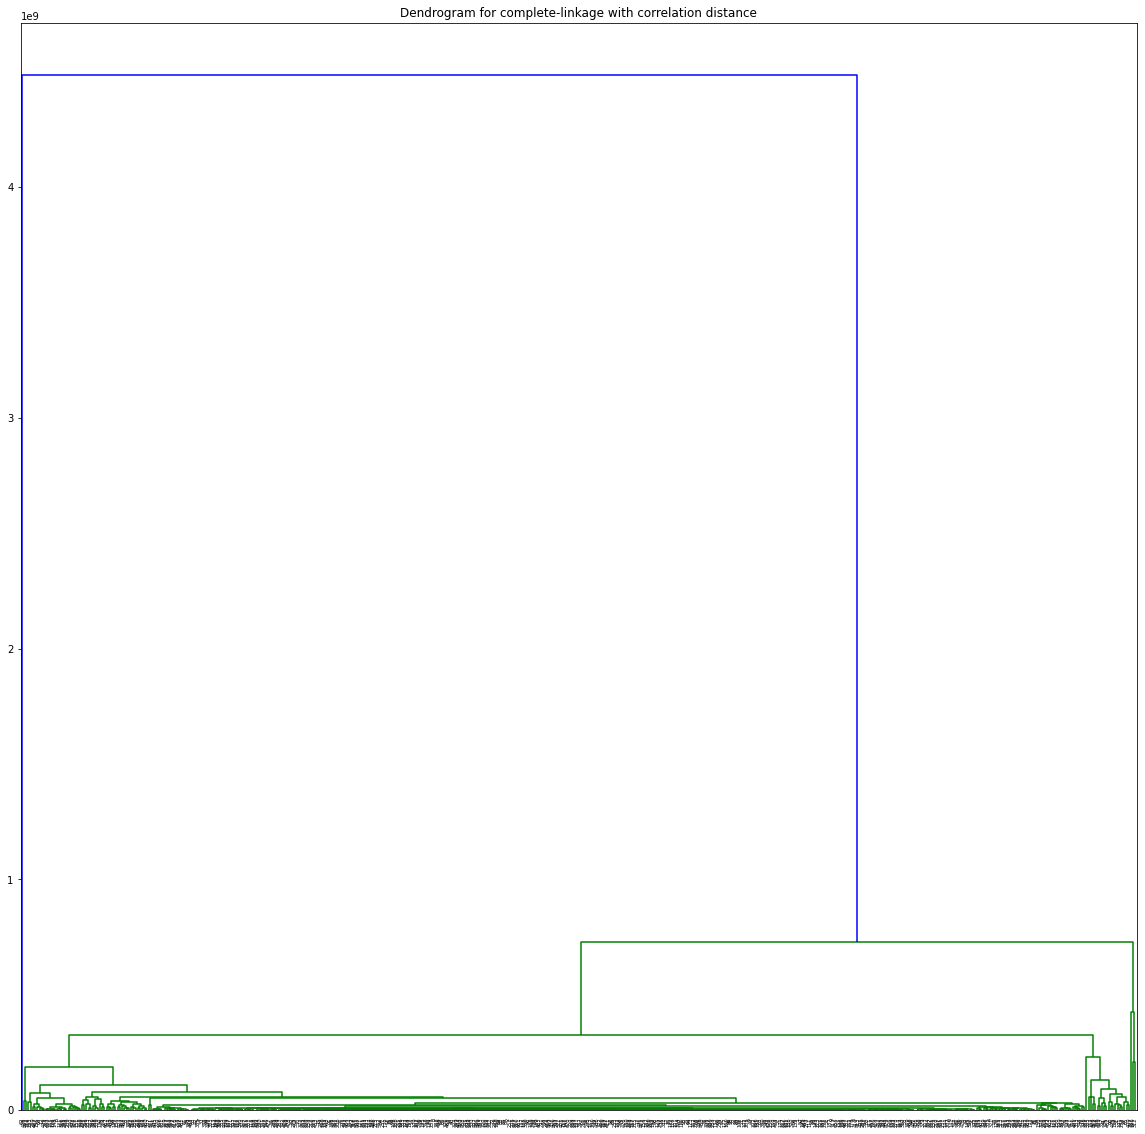

In [37]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(20, 20))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

linkage_matrix = hierarchical_clustering(distance_matrix)

In [105]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 2, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 4 unique clusters
#cluster_labels = fcluster(linkage_matrix, 10, criterion='maxclust')
#print(np.unique(cluster_labels))
#>> 10 unique clusters

[1 2]


In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster_labels) 

In [106]:
df_vis_fil['Cluster'] = cluster_labels 

In [107]:
df_vis_fil['Cluster'].unique()

array([1, 2], dtype=int32)

In [146]:
df = pd.DataFrame(data=y_pred,columns=['Cluster No.'])

In [147]:
df

Cluster No.
0              0
1              0
2              0
3              0
4              0
..           ...
495            0
496            0
497            0
498            0
499            0

[500 rows x 1 columns]

In [134]:
df_vis_fil.to_csv('./hier_clustering.csv',index=False)

In [137]:
df_vis_fil['Cluster'] = y_pred

In [138]:
df_vis_fil.to_csv('./kmeans_clustering.csv',index=False)

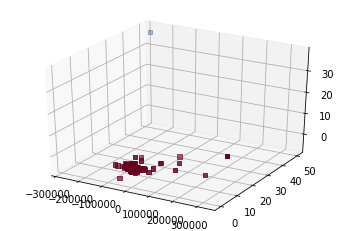

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(df_vis_fil['f_1'])
y = np.array(df_vis_fil['f_2'])
z = np.array(df_vis_fil['f_3'])

ax.scatter(x,y,z, marker="s", c=df_vis_fil["Cluster"], cmap="RdBu")

plt.show()

In [110]:
df_vis_fil[df_vis_fil['Cluster'] == 2]

ID            f_1       f_2        f_3  Cluster
62  62 -274602.571646  50.25921  37.491175        2

In [55]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [41]:
# hand-select an appropriate cut-off on the dendrogram
cluster_labels = fcluster(linkage_matrix, 600, criterion='distance')
print(np.unique(cluster_labels))
#>> 3 unique clusters
cluster_labels = fcluster(linkage_matrix, 800, criterion='distance')
print(np.unique(cluster_labels))
#>> 2 unique clusters

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24